In [1]:
%load_ext autoreload
%autoreload 2

import numpy  as np
import pandas as pd

from matplotlib import pyplot as plt

from common import hallmark as hm

In [2]:
def getdist(path, dist):
    df = pd.read_csv(path, sep='\t')
    return df[dist].values

pf = hm.ParaFrame('cache/Illinois_thermal_w{win:d}/{mag}a{aspin:g}_i{inc:d}/summ_Rh{Rhigh:d}_{freq}.tsv')

for k in set(pf.keys()) - {'path'}:
    globals()[k] = np.unique(pf[k])
    print(k, globals()[k][:16])

win [3 4 5]
mag ['M' 'S']
freq ['230GHz' '2um' '86GHz']
inc [ 10  30  50  70  90 110 130 150 170]
aspin [-0.94 -0.5   0.    0.5   0.94]
Rhigh [  1  10  40 160]


Index(['time', 'time_hr', 'Mdot', 'Ladv', 'nuLnu', 'Ftot', 'Fmin', 'Fmax',
       'Fsum', 'alpha0', 'beta0', 'major_FWHM', 'minor_FWHM', 'PA'],
      dtype='object')


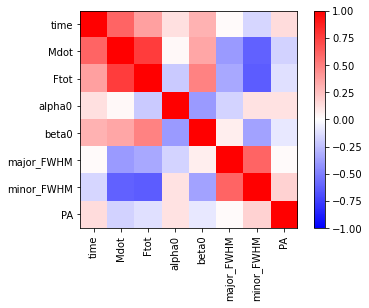

In [9]:
df3 = pd.read_csv(
    pf(freq='230GHz')(mag='M')(aspin=-0.5)(inc=50)(Rhigh=10)(win=3).path.iloc[0],
    sep='\t'
)
df4 = pd.read_csv(
    pf(freq='230GHz')(mag='M')(aspin=-0.5)(inc=50)(Rhigh=10)(win=4).path.iloc[0],
    sep='\t'
)
df5 = pd.read_csv(
    pf(freq='230GHz')(mag='M')(aspin=-0.5)(inc=50)(Rhigh=10)(win=5).path.iloc[0],
    sep='\t'
)

print(df3.columns)

cols = ['time', 'Mdot', 'Ftot', 'alpha0', 'beta0', 'major_FWHM', 'minor_FWHM', 'PA']
corr = df3[cols].corr()
plt.imshow(corr, vmin=-1, vmax=1, cmap='bwr')
plt.xticks(range(len(cols)), cols, rotation='vertical')
plt.yticks(range(len(cols)), cols)
plt.colorbar()

Text(0, 0.5, 'Ftot')

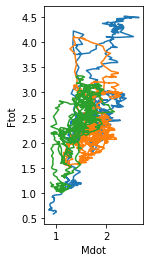

In [10]:
plt.axes().set_aspect('equal')
plt.plot(df3.Mdot, df3.Ftot)
plt.plot(df4.Mdot, df4.Ftot)
plt.plot(df5.Mdot, df5.Ftot)
plt.xlabel('Mdot')
plt.ylabel('Ftot')

Text(0, 0.5, 'major')

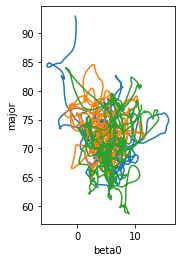

In [12]:
plt.axes().set_aspect('equal')
plt.plot(df3.beta0, df3.minor_FWHM)
plt.plot(df4.beta0, df4.minor_FWHM)
plt.plot(df5.beta0, df5.minor_FWHM)
plt.xlabel('beta0')
plt.ylabel('major')

3 10 86GHz
3 10 230GHz
3 10 2um
3 30 86GHz
3 30 230GHz
3 30 2um
3 50 86GHz
3 50 230GHz
3 50 2um
3 70 86GHz
3 70 230GHz
3 70 2um
3 90 86GHz
3 90 230GHz
3 90 2um
3 110 86GHz
3 110 230GHz
3 110 2um
3 130 86GHz
3 130 230GHz
3 130 2um


/var/folders/_r/n2nr49210r7grg51tz86fqs000019j/T/ipykernel_4713/113266704.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(8, 5, figsize=(15,24), sharex=True, sharey=True)


3 150 86GHz
3 150 230GHz
3 150 2um
3 170 86GHz
3 170 230GHz
3 170 2um
4 10 86GHz
4 10 230GHz
4 10 2um
4 30 86GHz
4 30 230GHz
4 30 2um
4 50 86GHz
4 50 230GHz
4 50 2um
4 70 86GHz
4 70 230GHz
4 70 2um
4 90 86GHz
4 90 230GHz
4 90 2um
4 110 86GHz
4 110 230GHz
4 110 2um
4 130 86GHz
4 130 230GHz
4 130 2um
4 150 86GHz
4 150 230GHz
4 150 2um
4 170 86GHz
4 170 230GHz
4 170 2um
5 10 86GHz
5 10 230GHz
5 10 2um
5 30 86GHz
5 30 230GHz
5 30 2um
5 50 86GHz
5 50 230GHz
5 50 2um
5 70 86GHz
5 70 230GHz
5 70 2um
5 90 86GHz
5 90 230GHz
5 90 2um
5 110 86GHz
5 110 230GHz
5 110 2um
5 130 86GHz
5 130 230GHz
5 130 2um
5 150 86GHz
5 150 230GHz
5 150 2um
5 170 86GHz
5 170 230GHz
5 170 2um


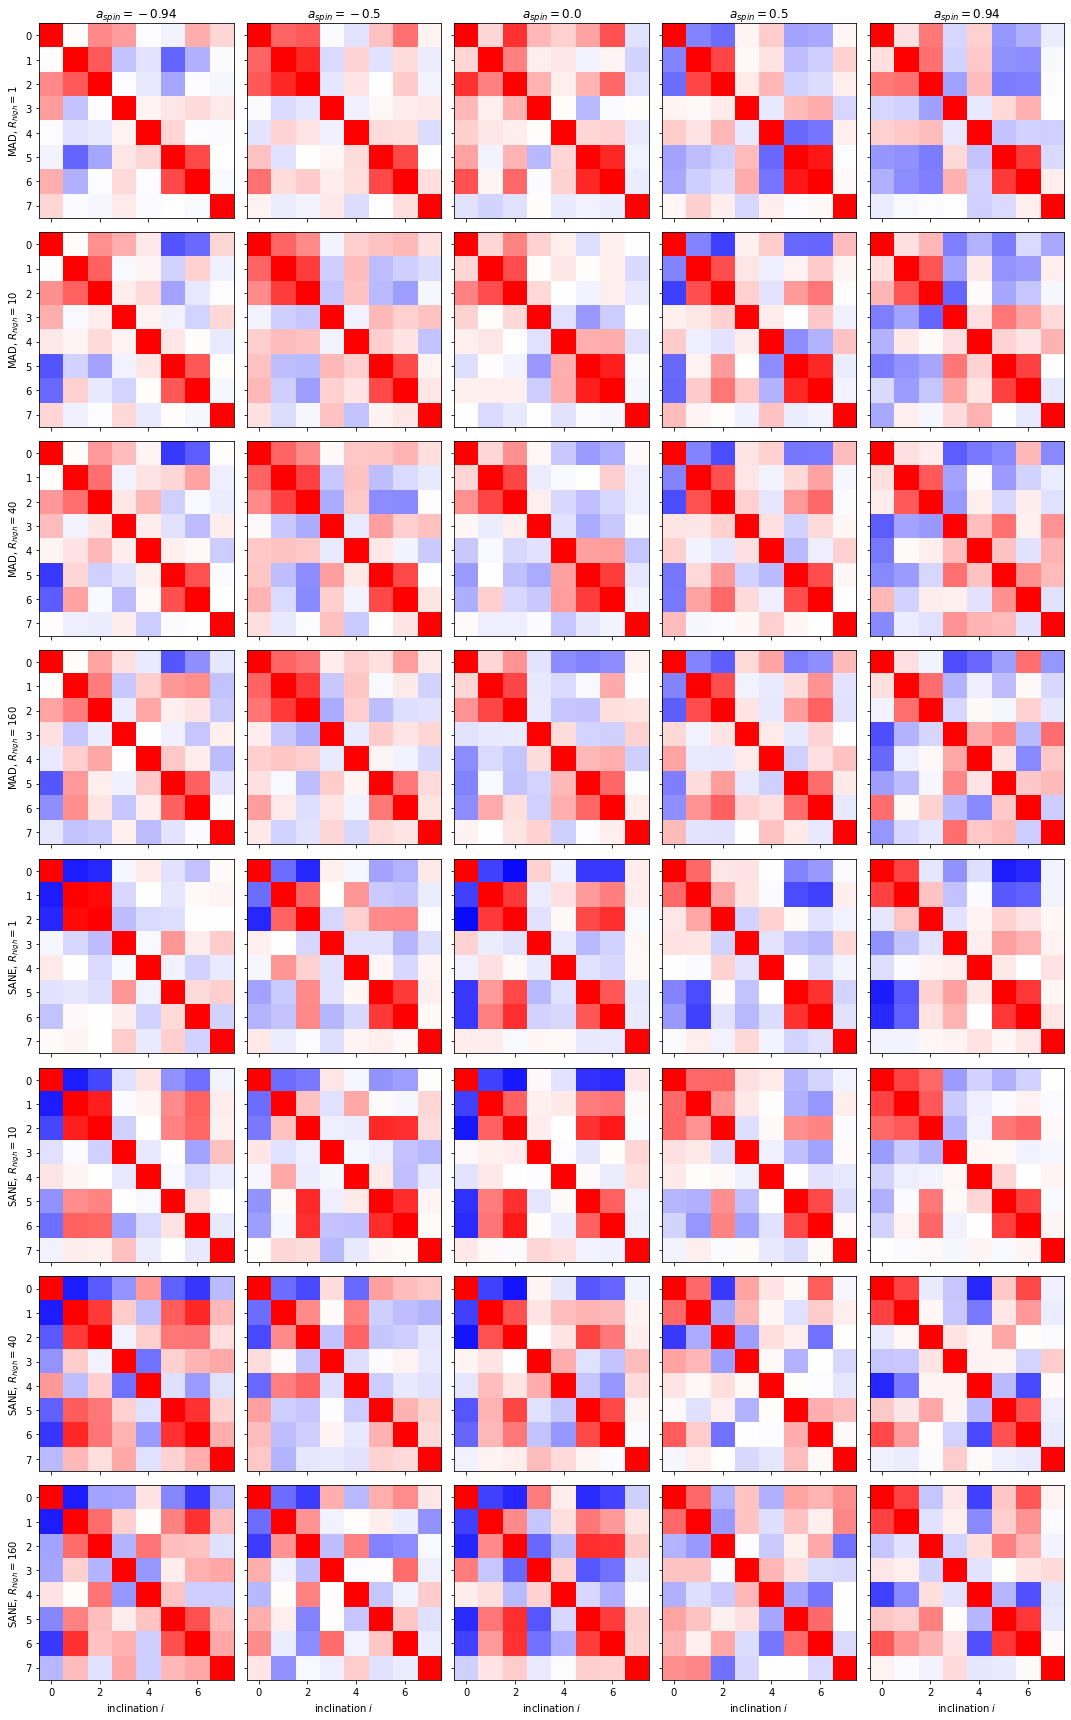

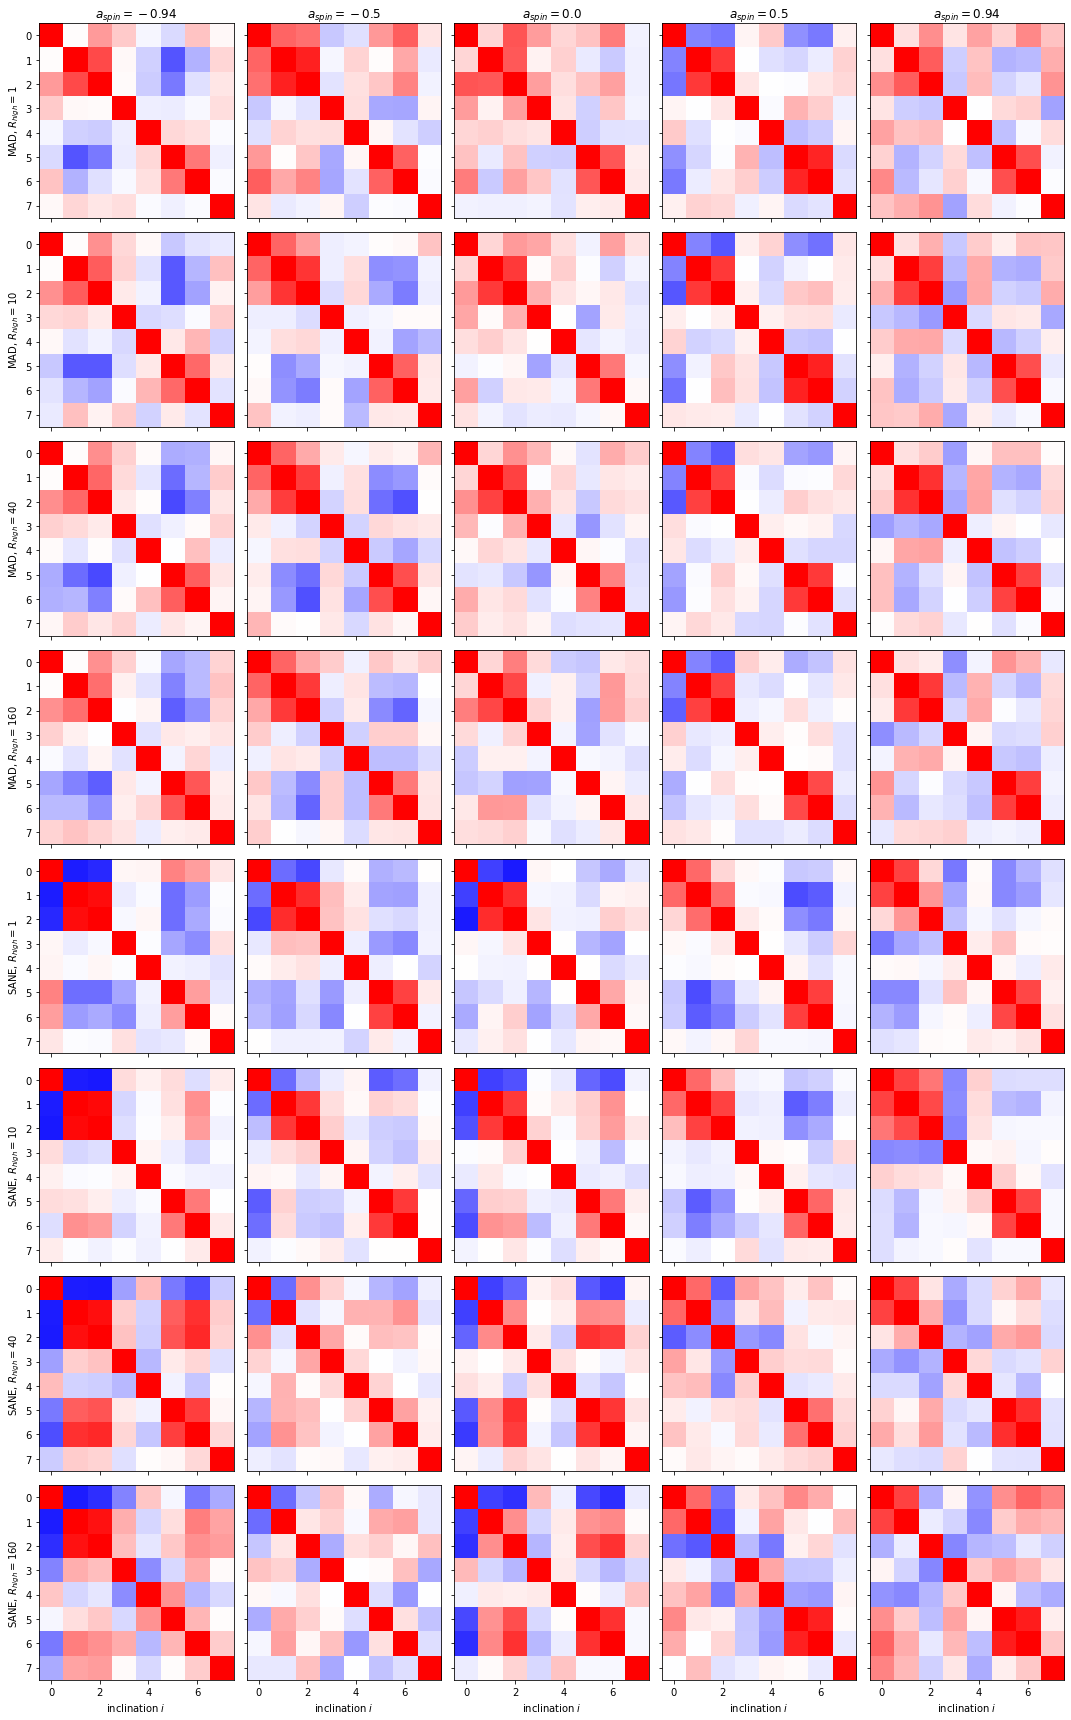

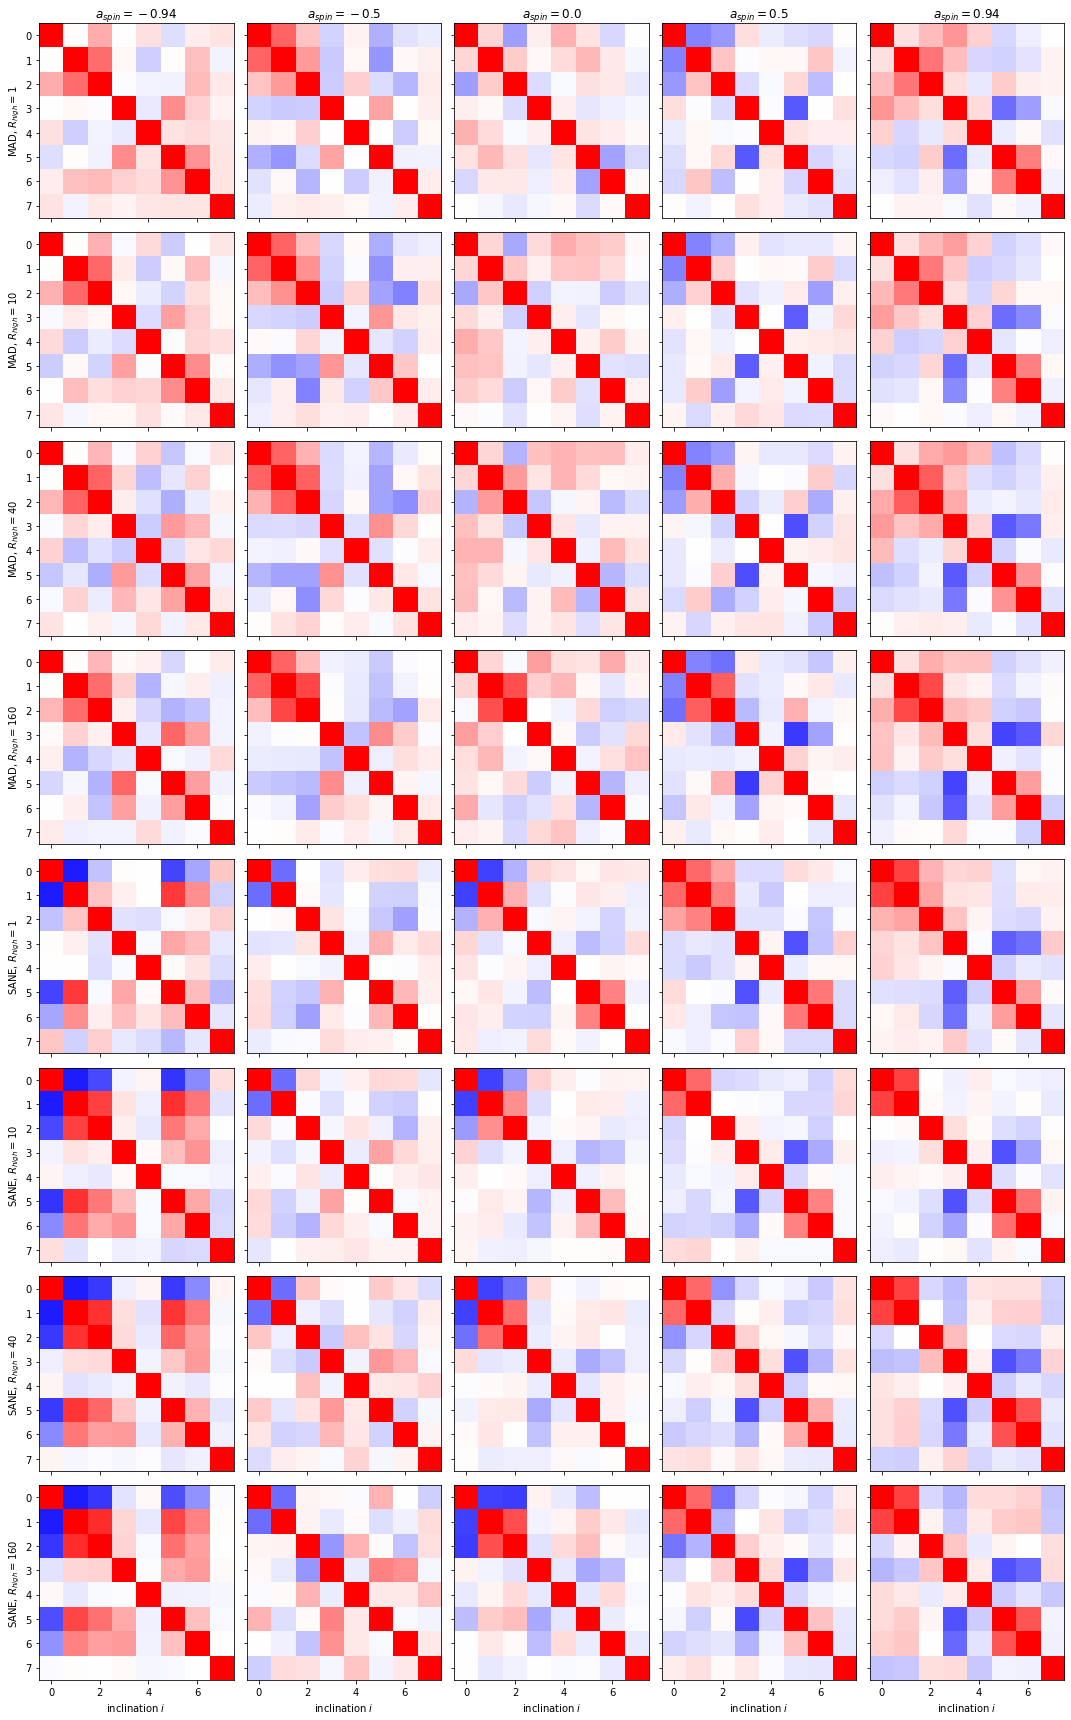

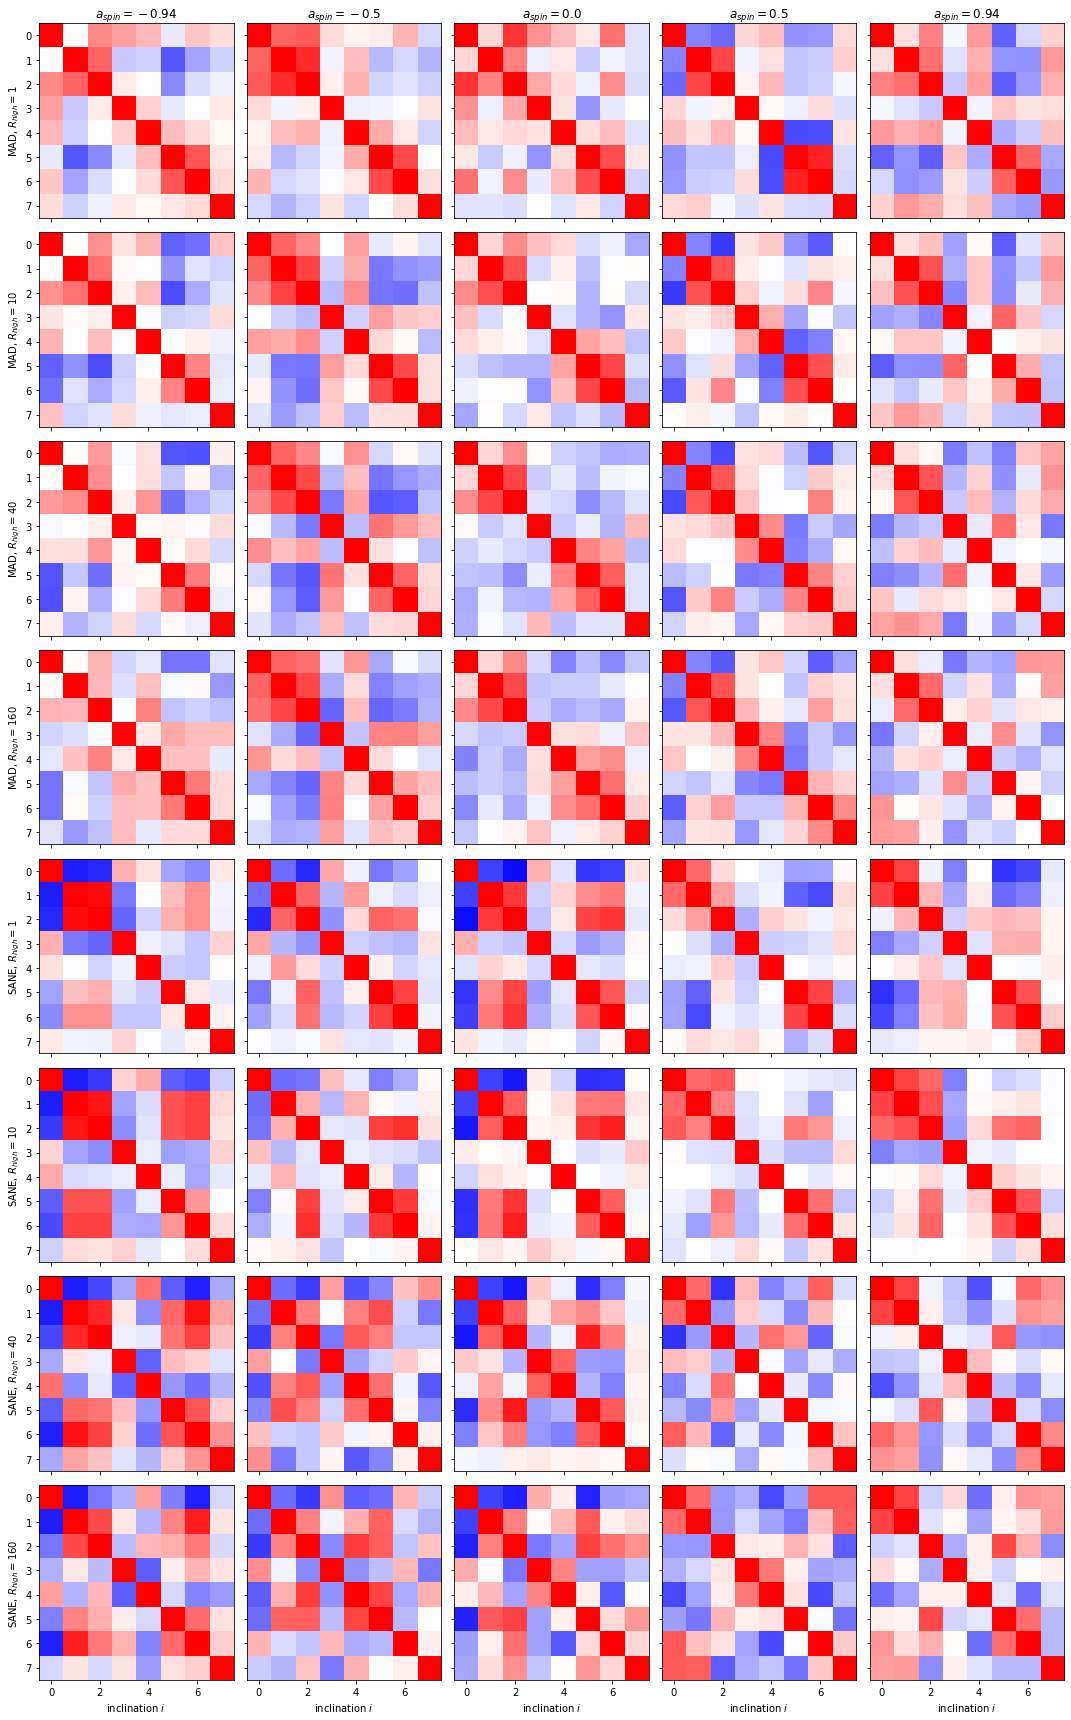

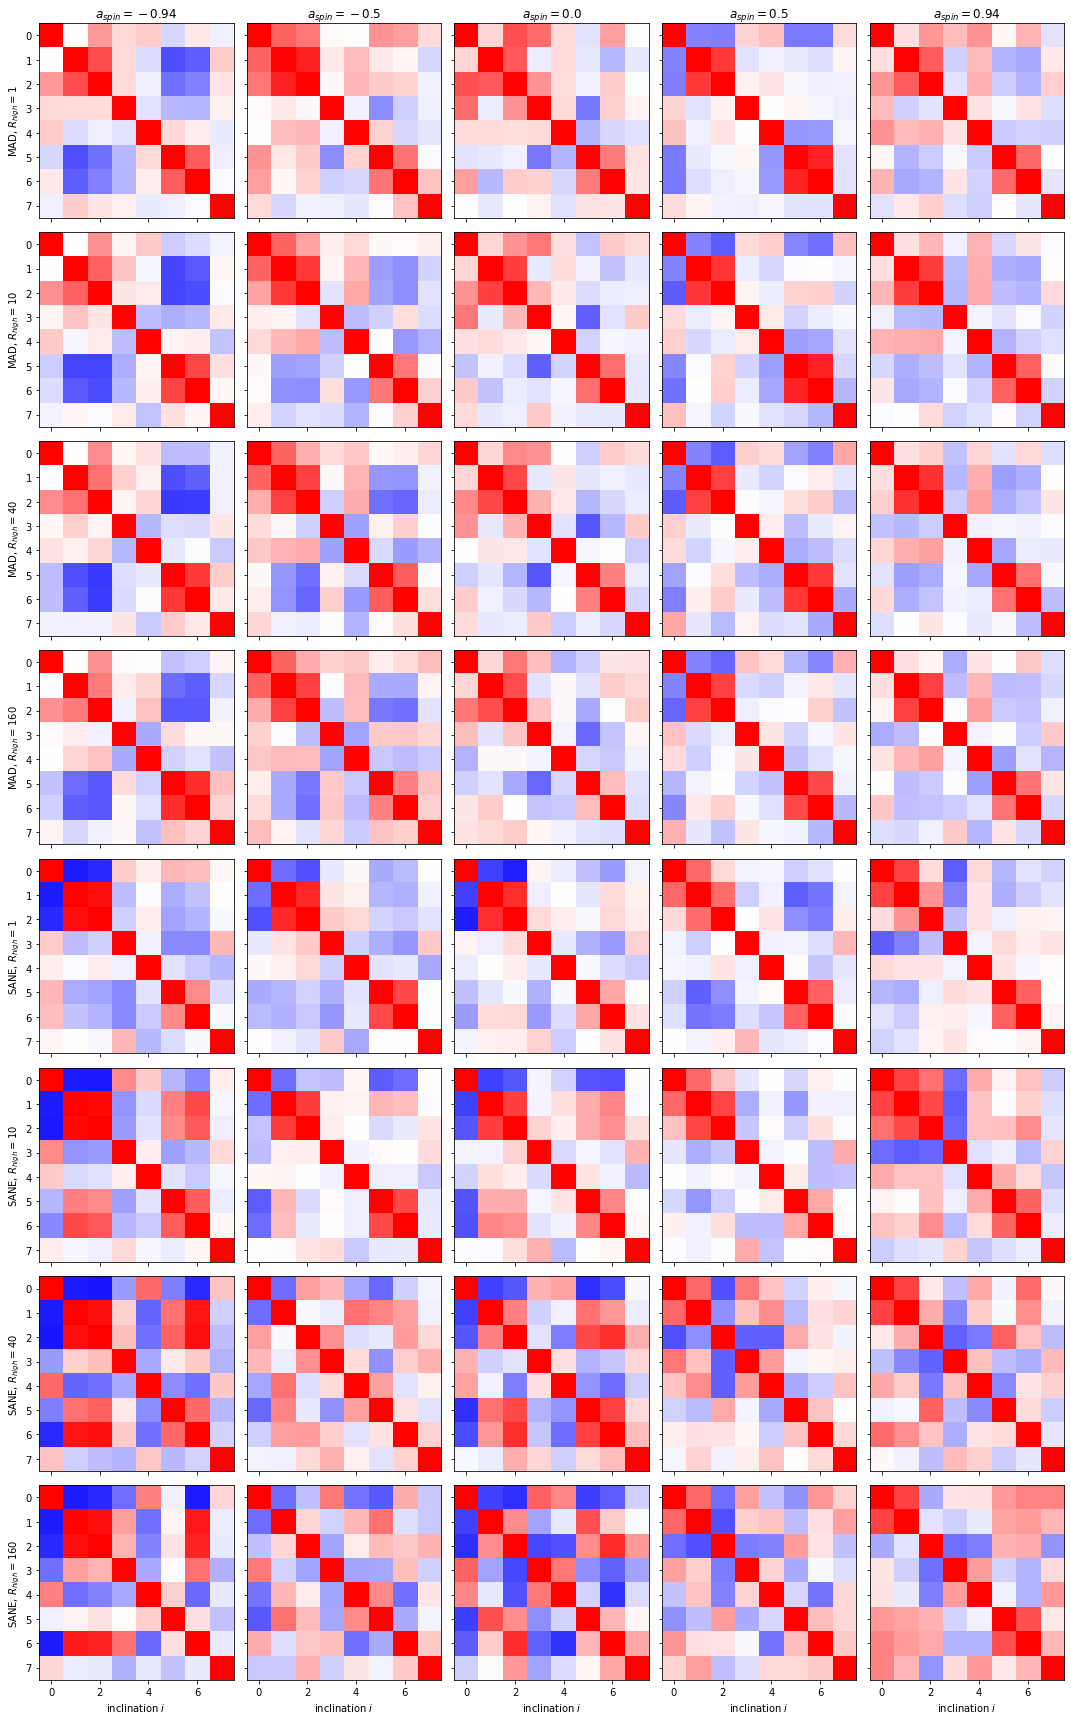

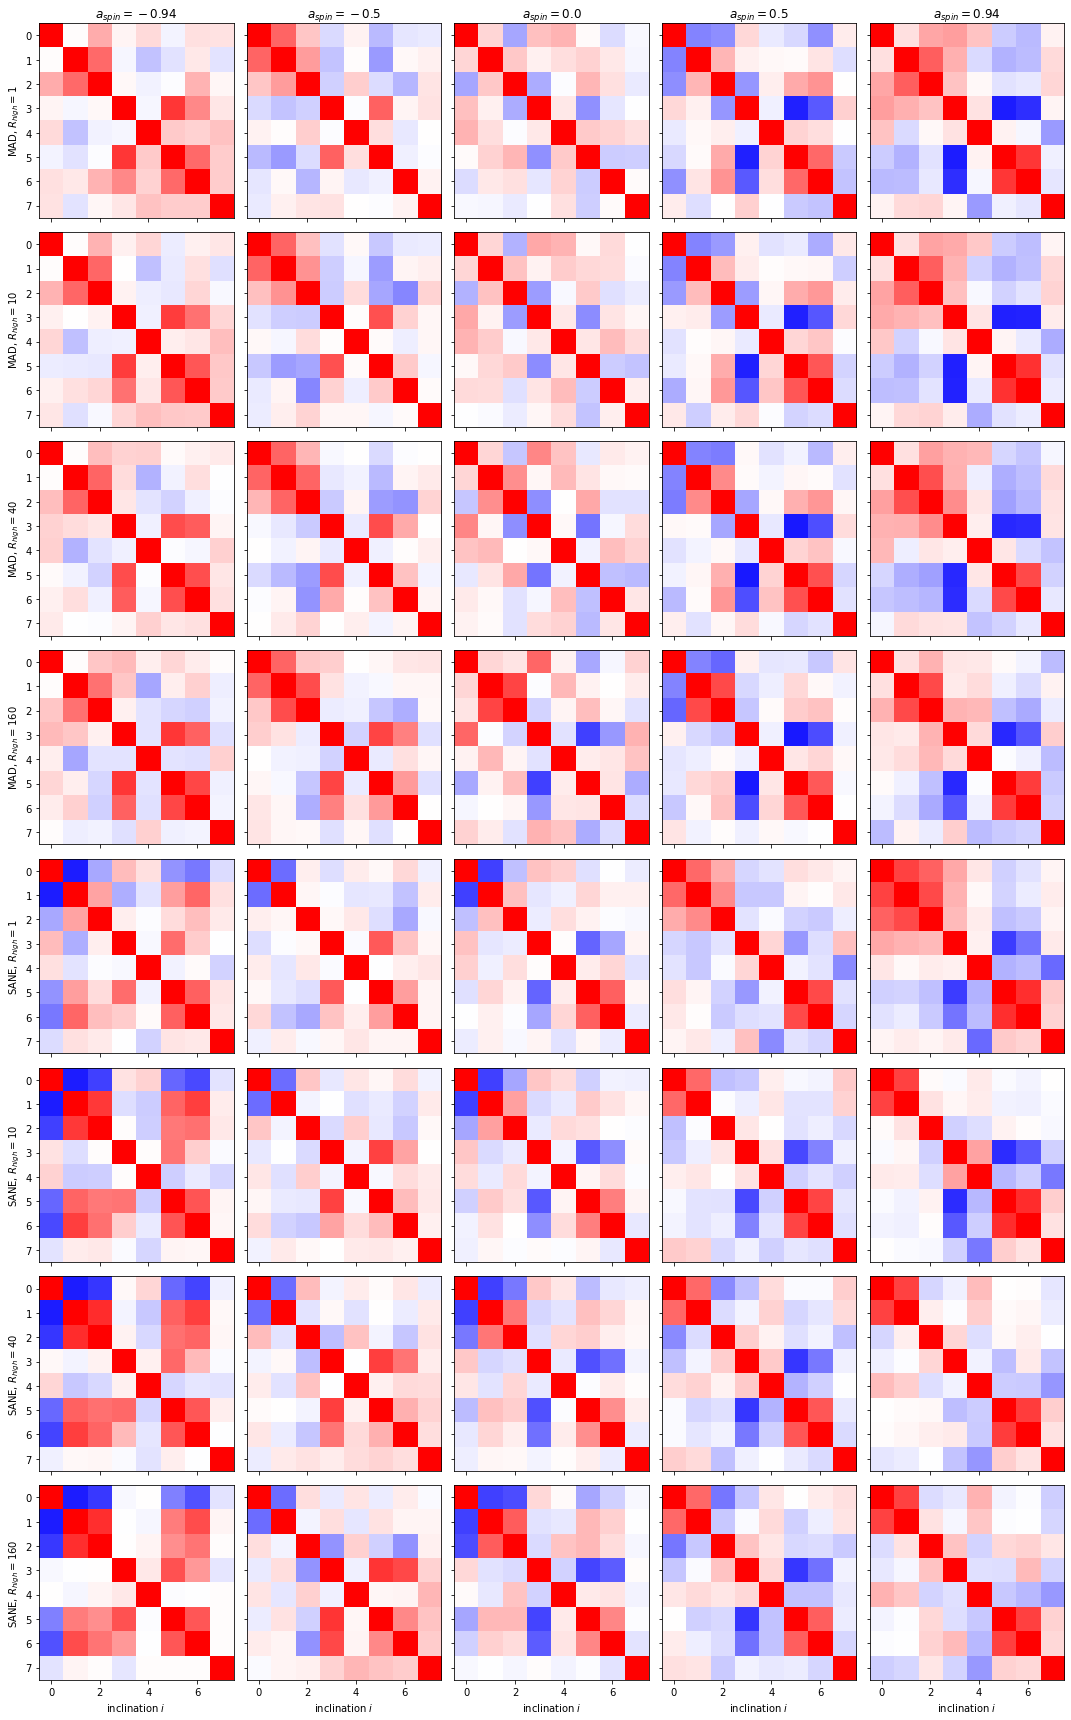

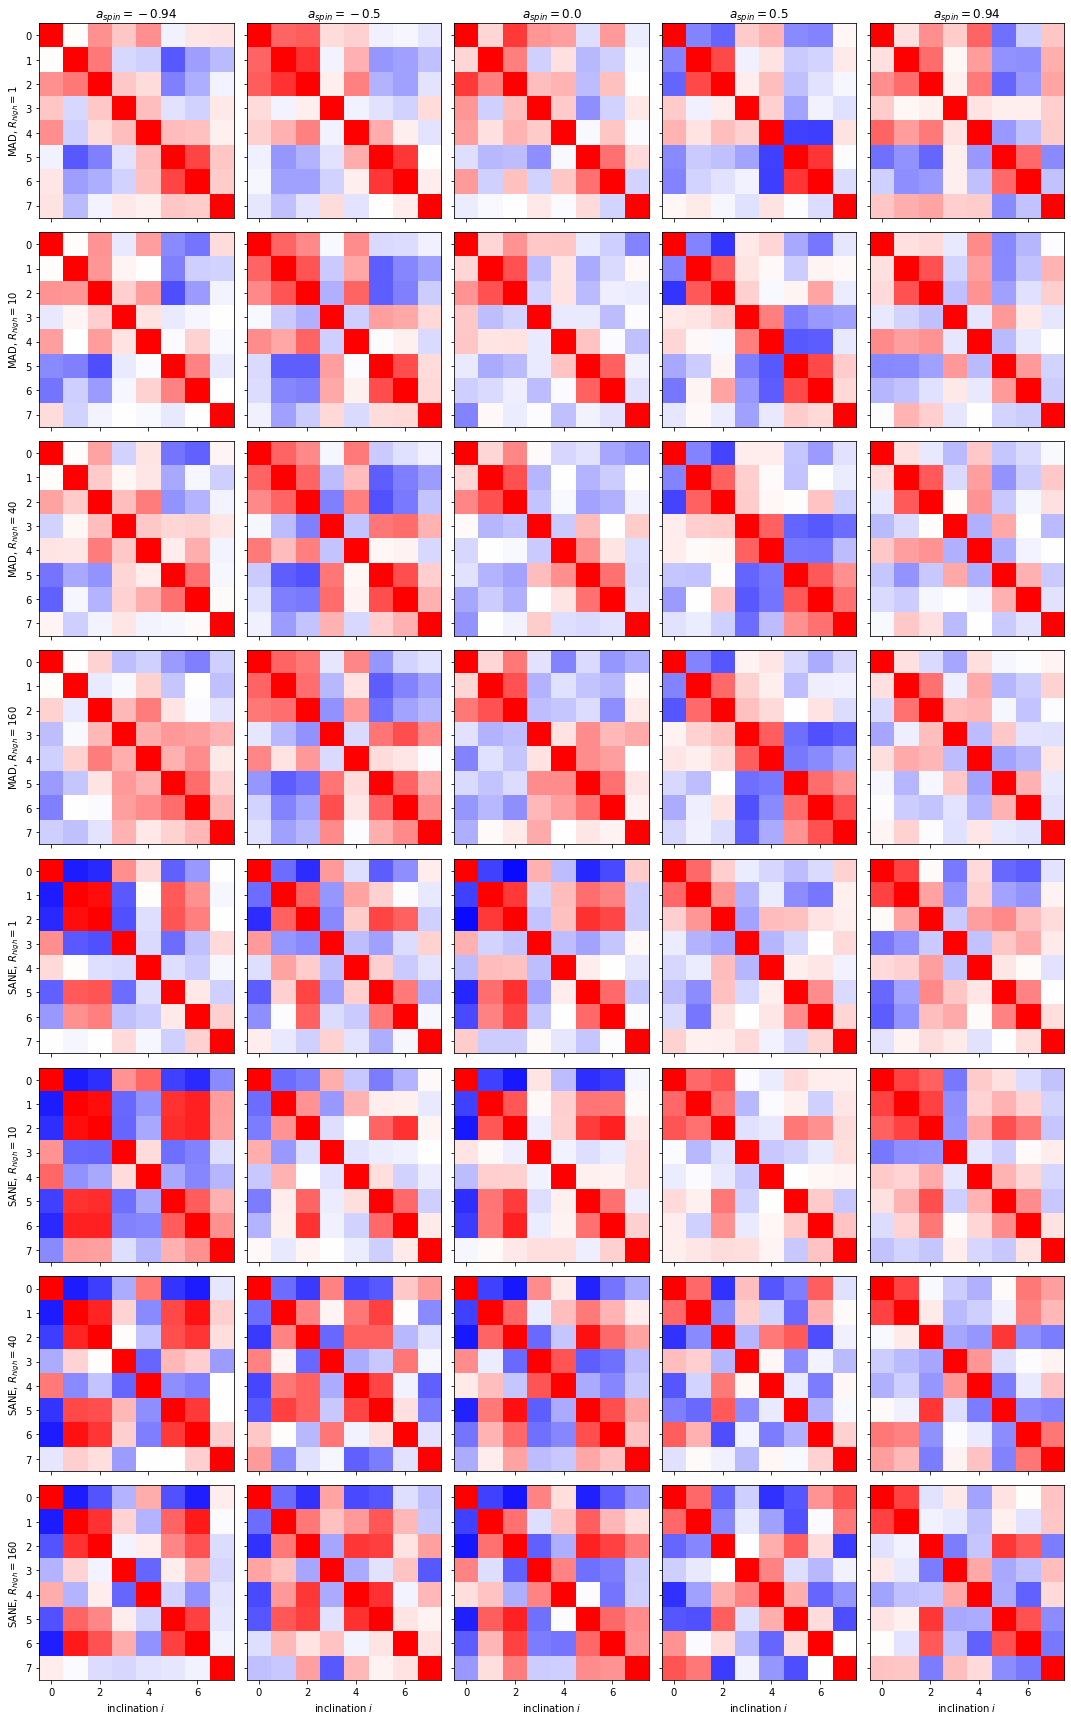

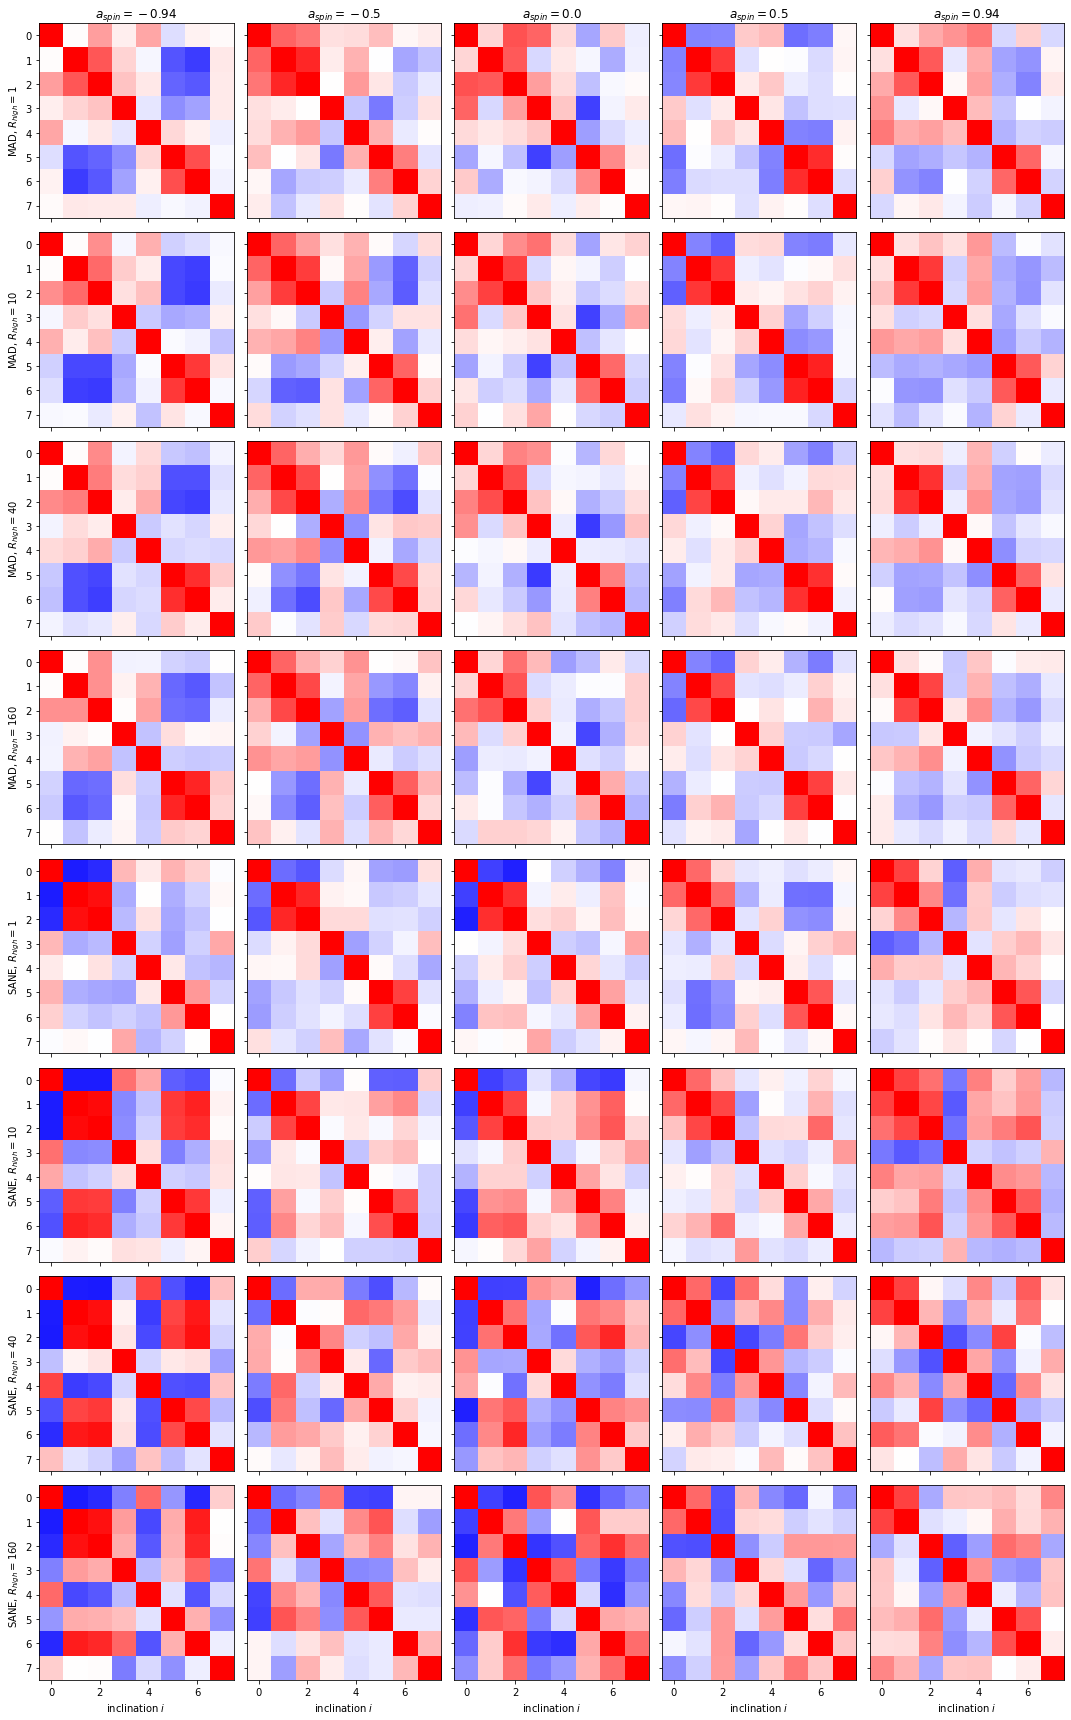

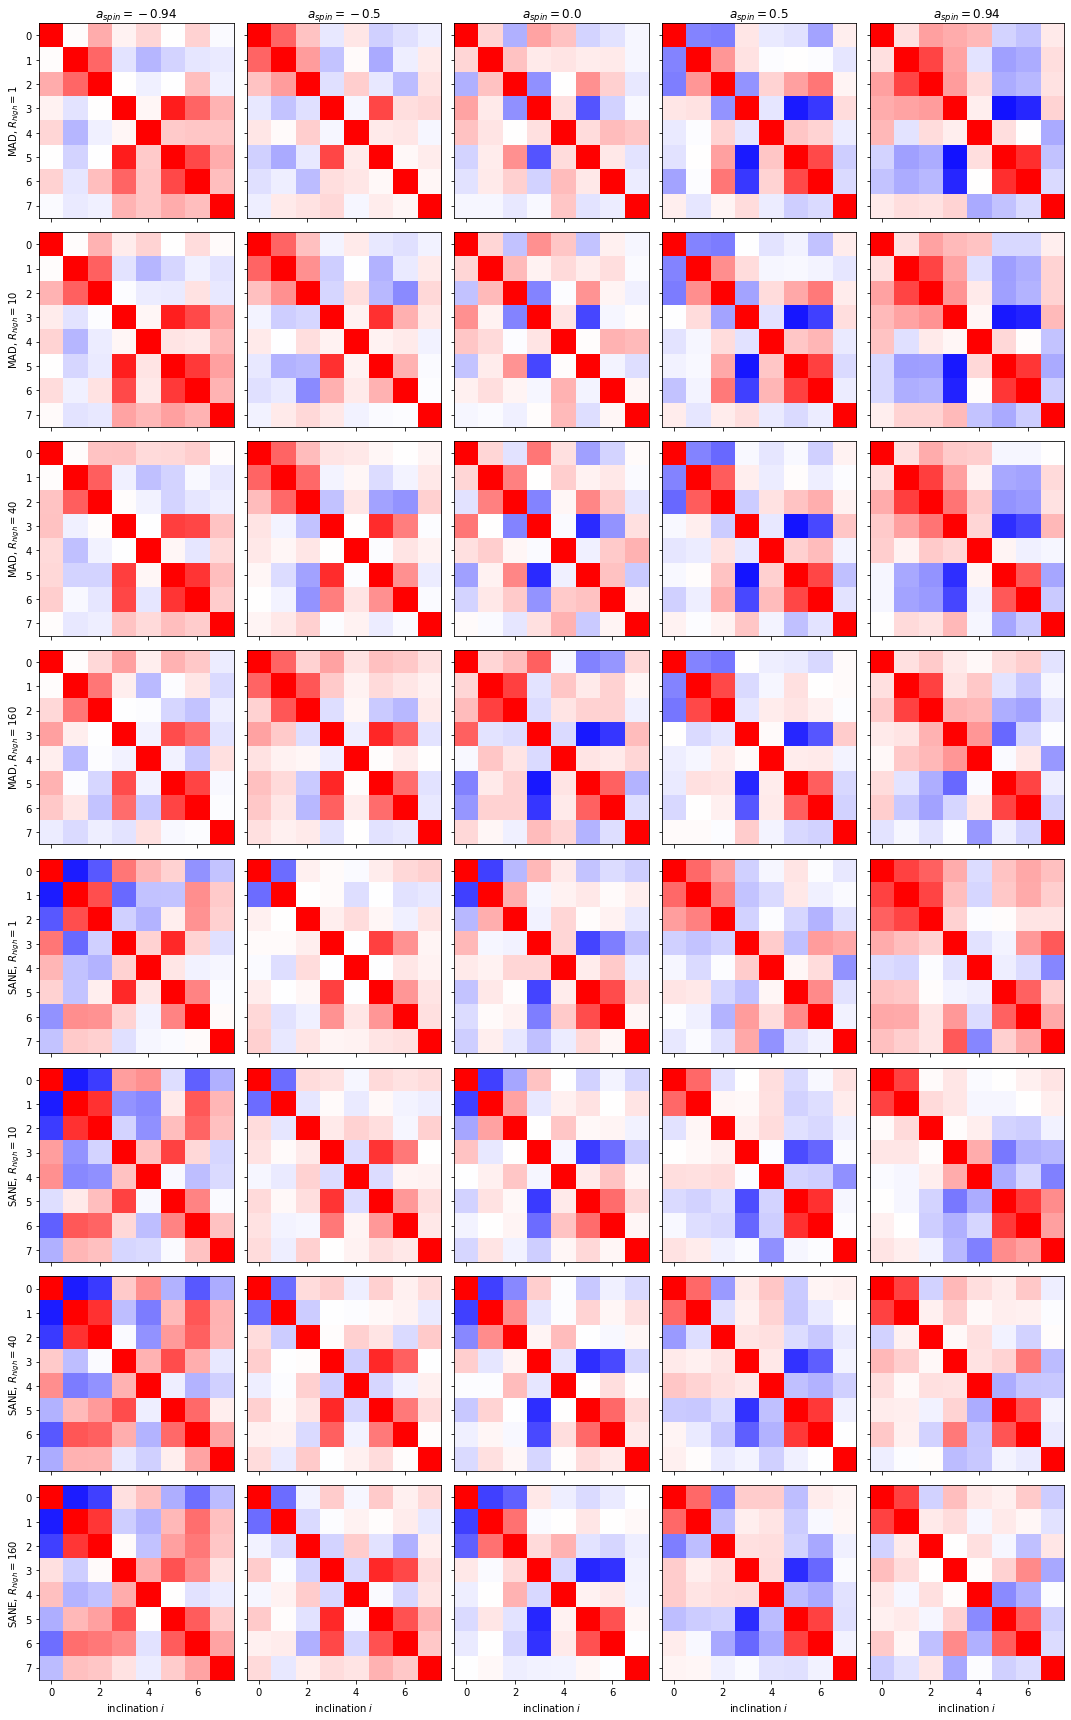

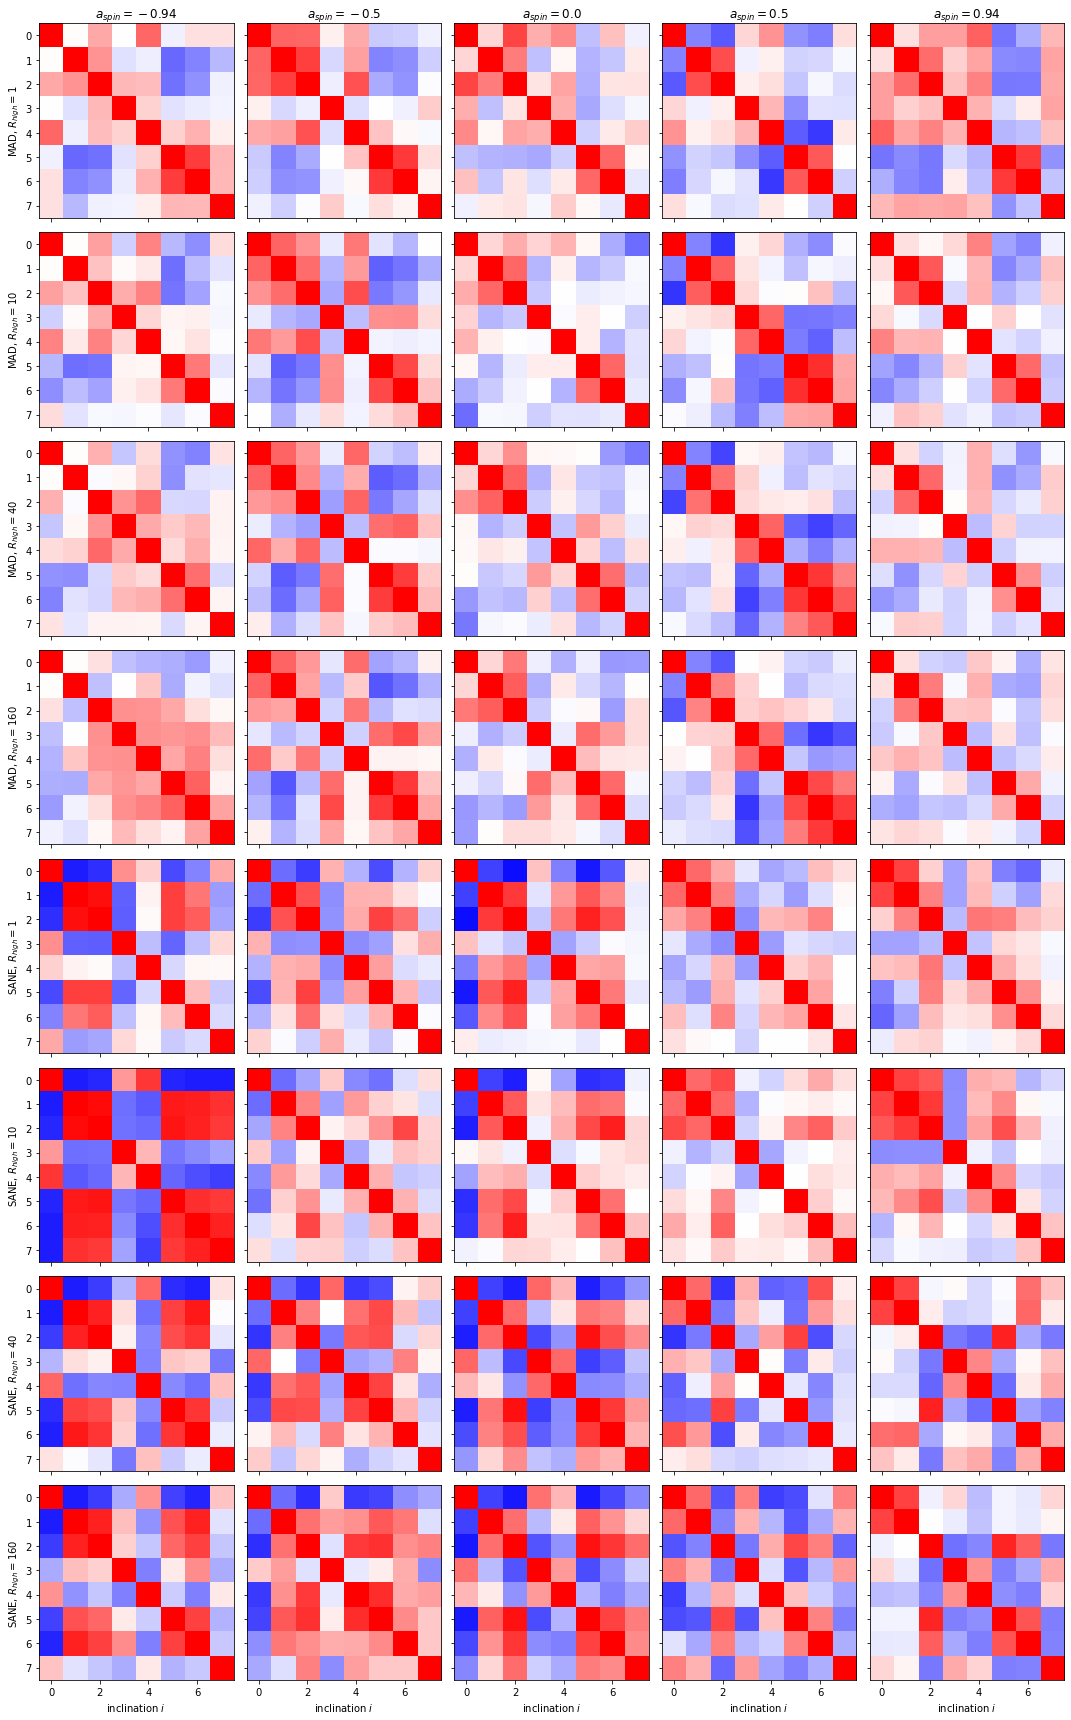

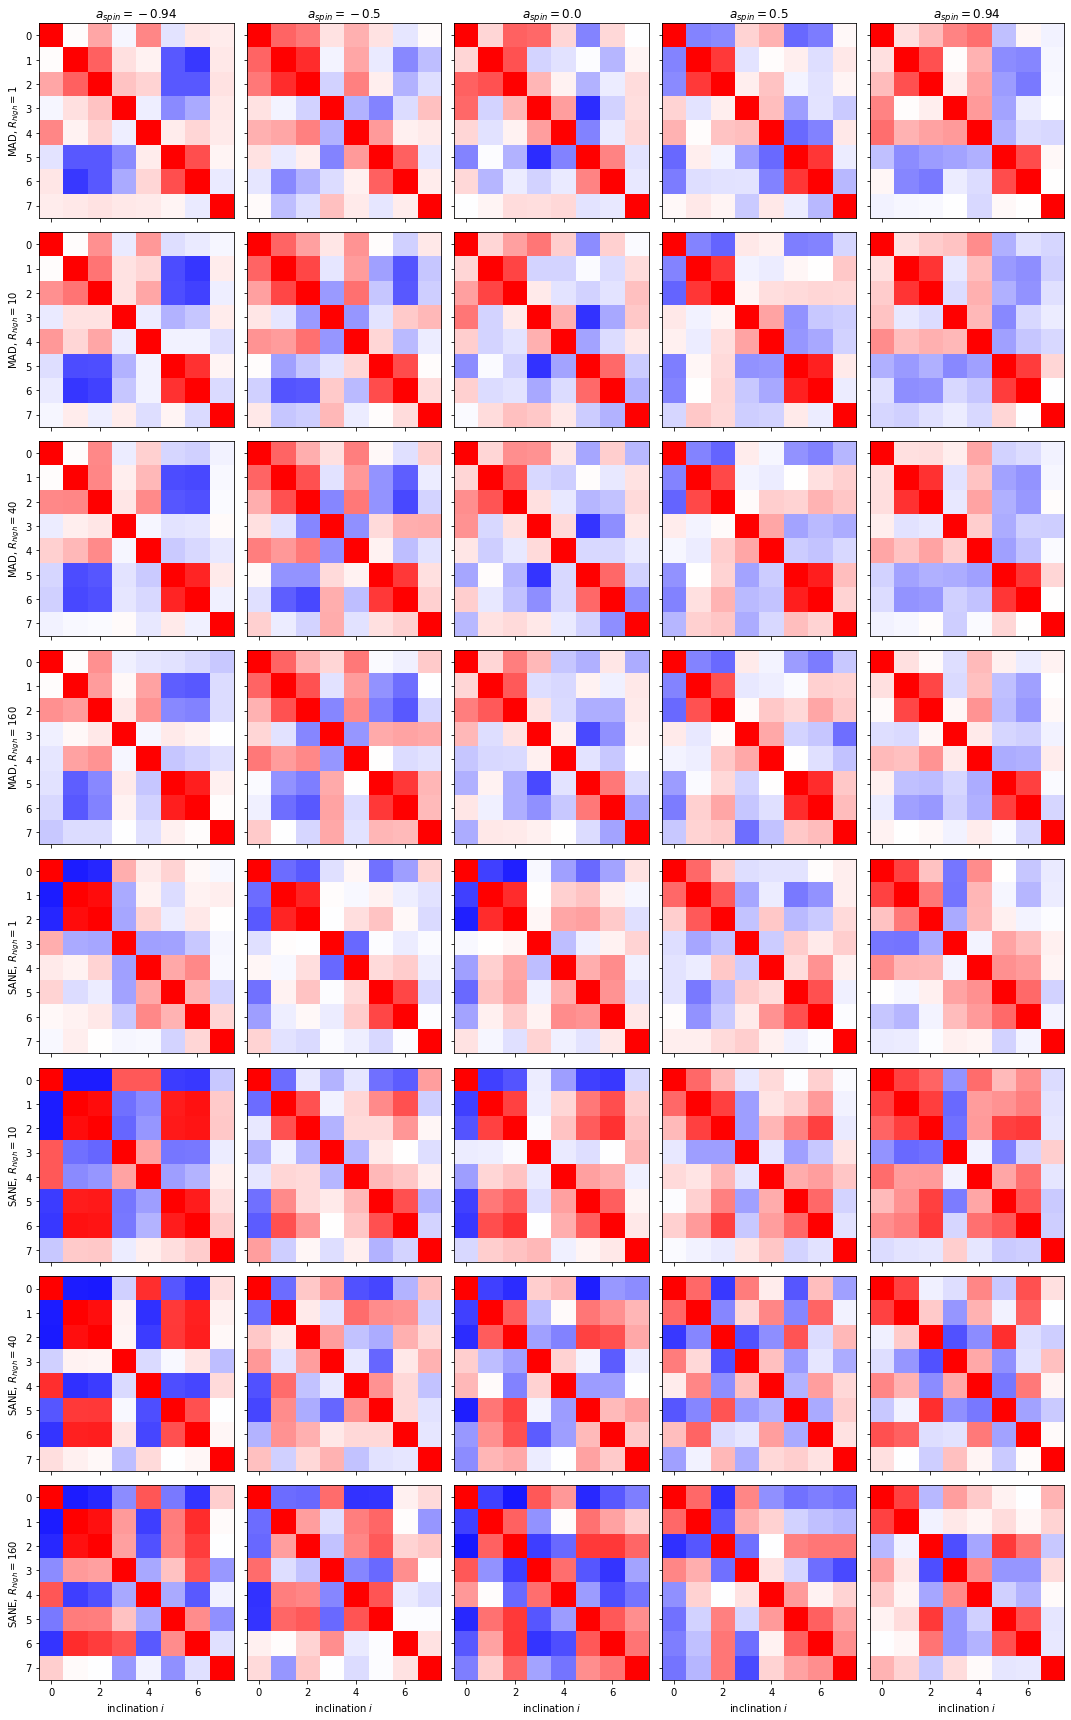

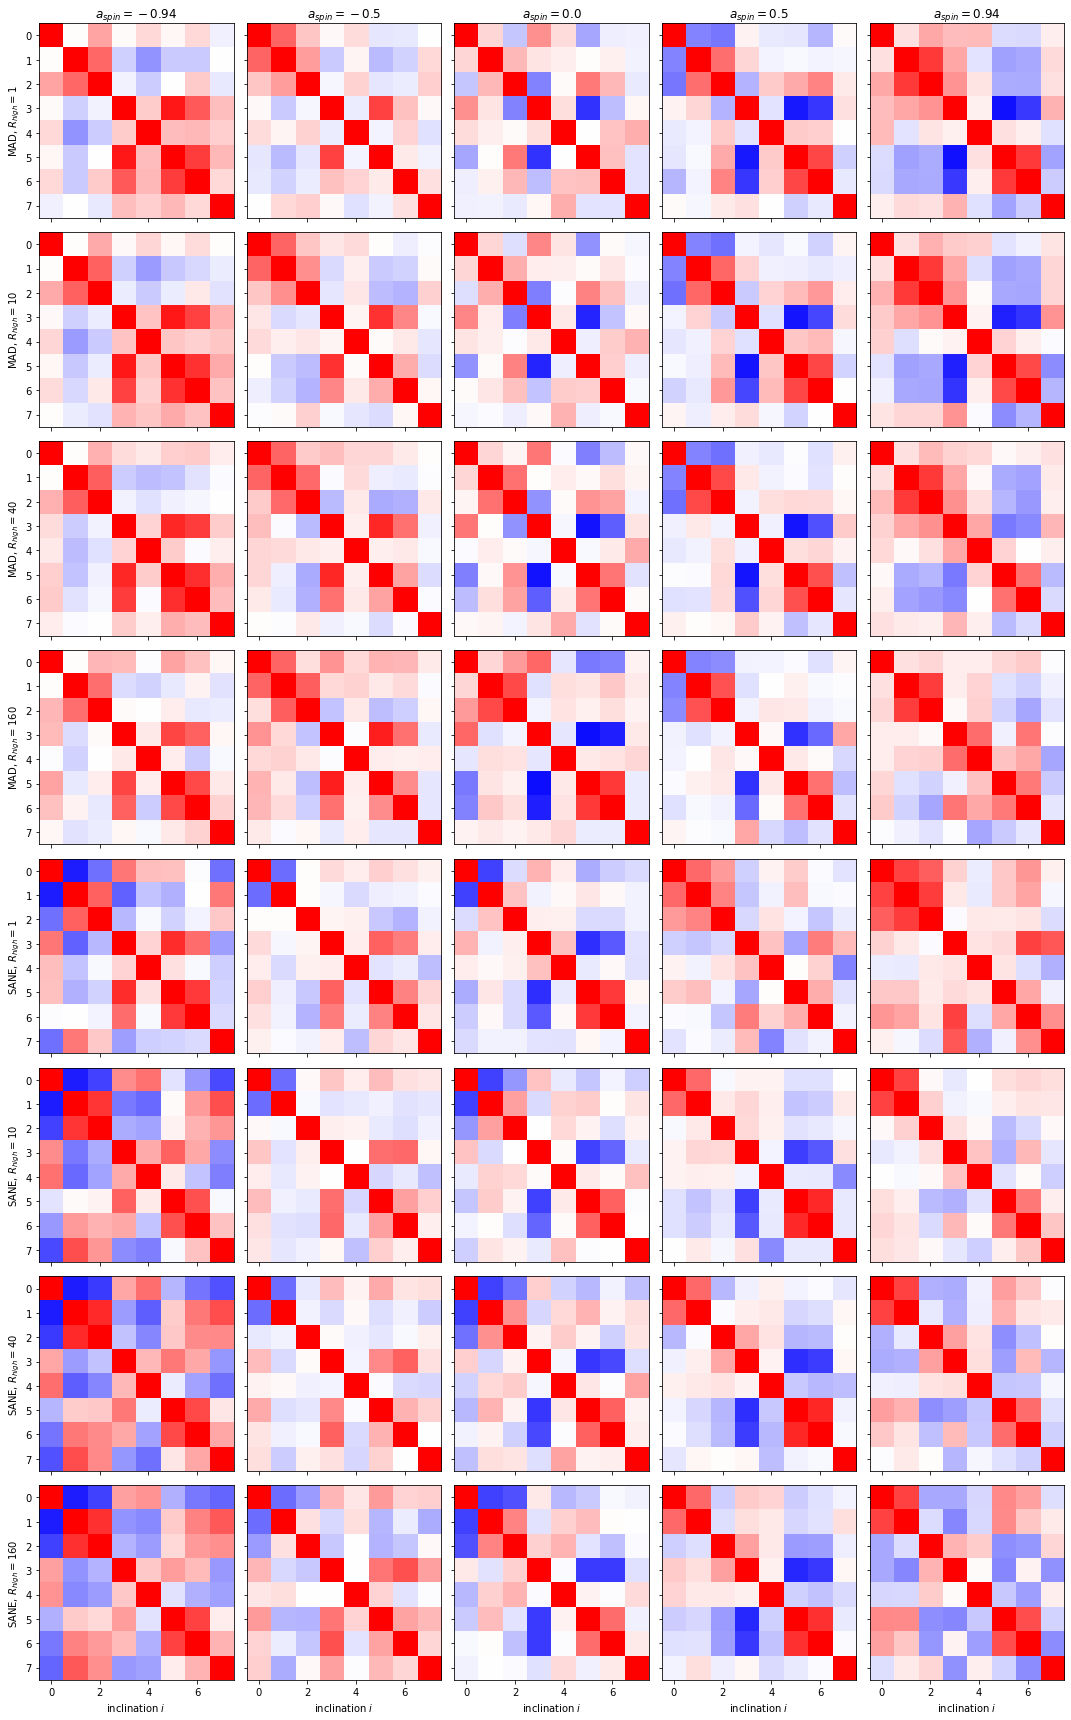

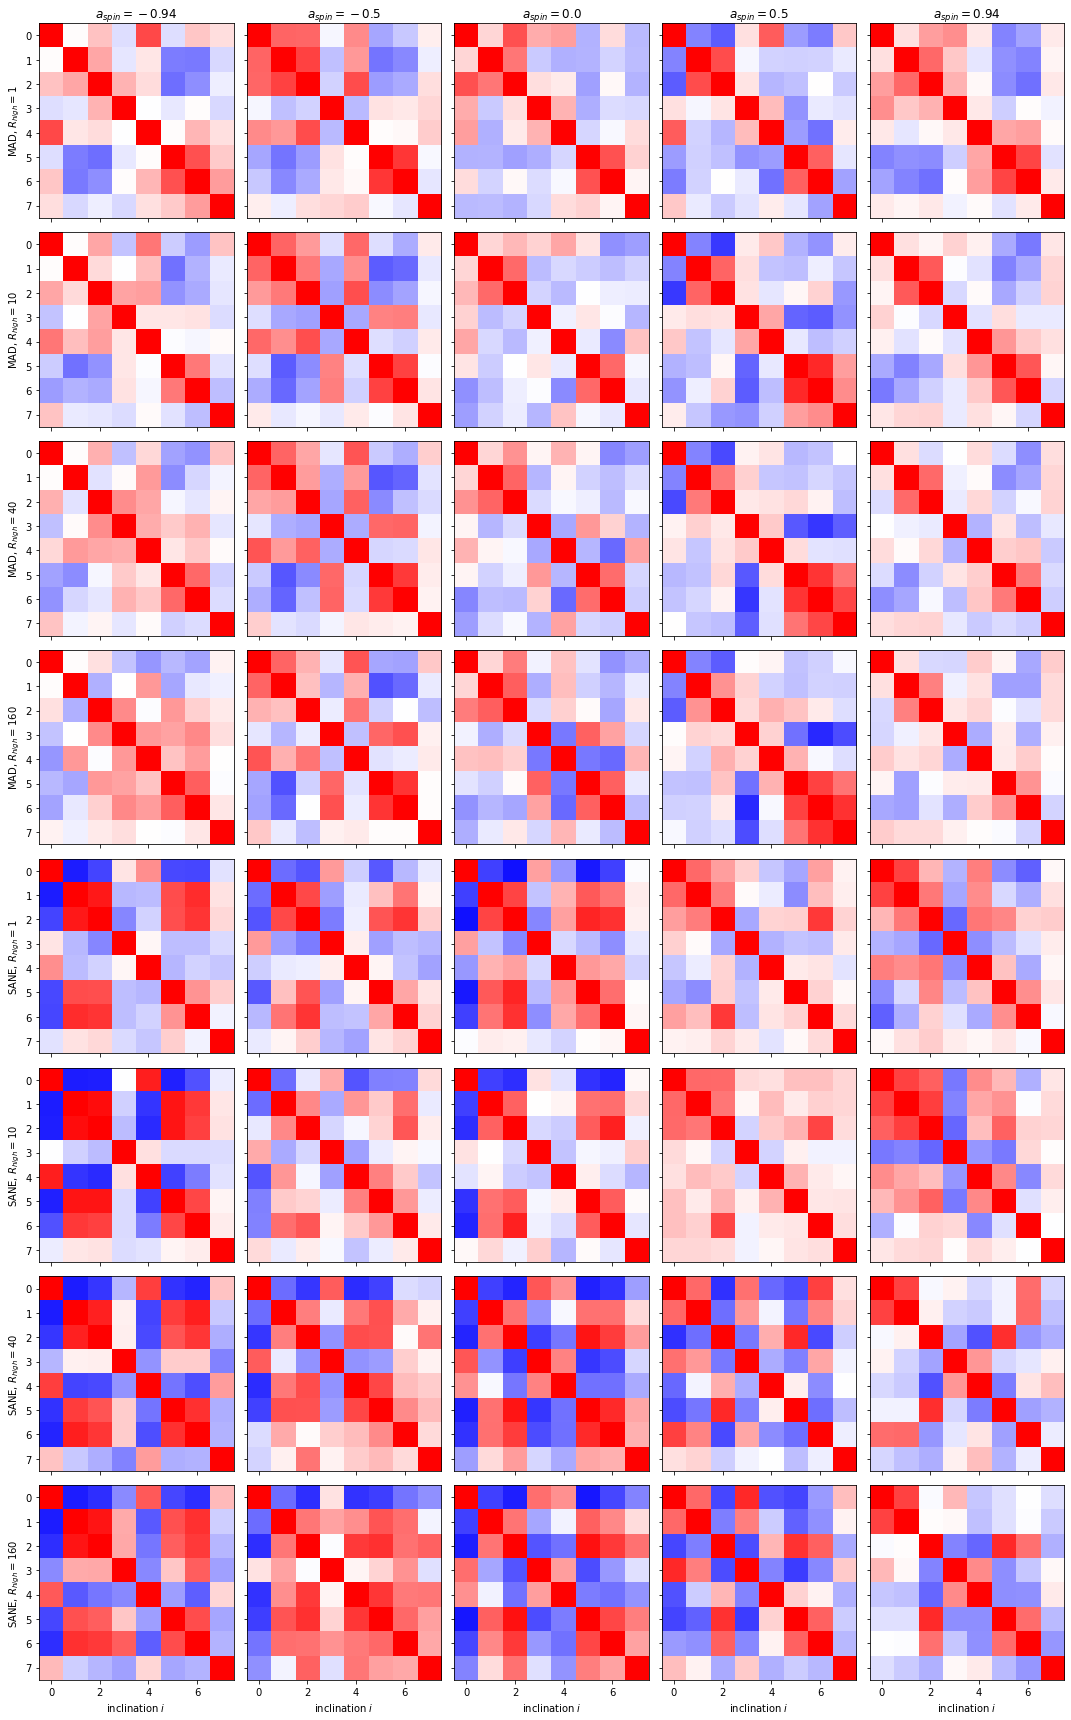

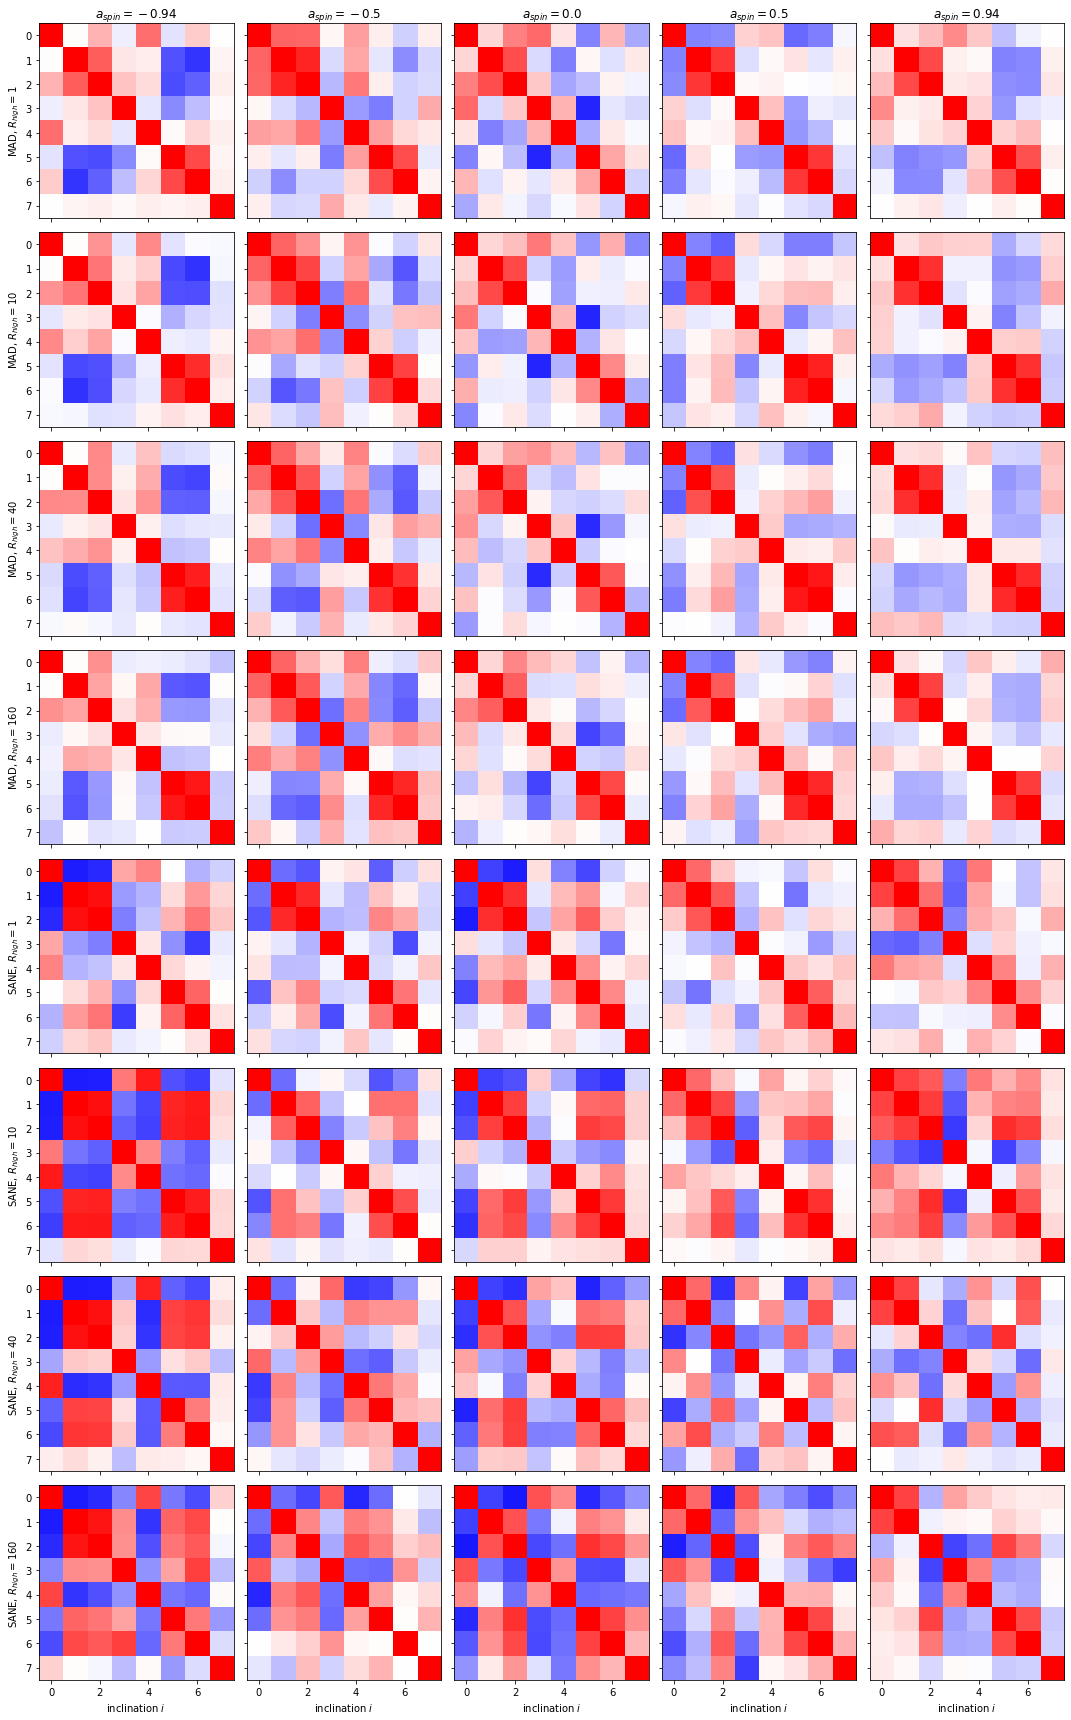

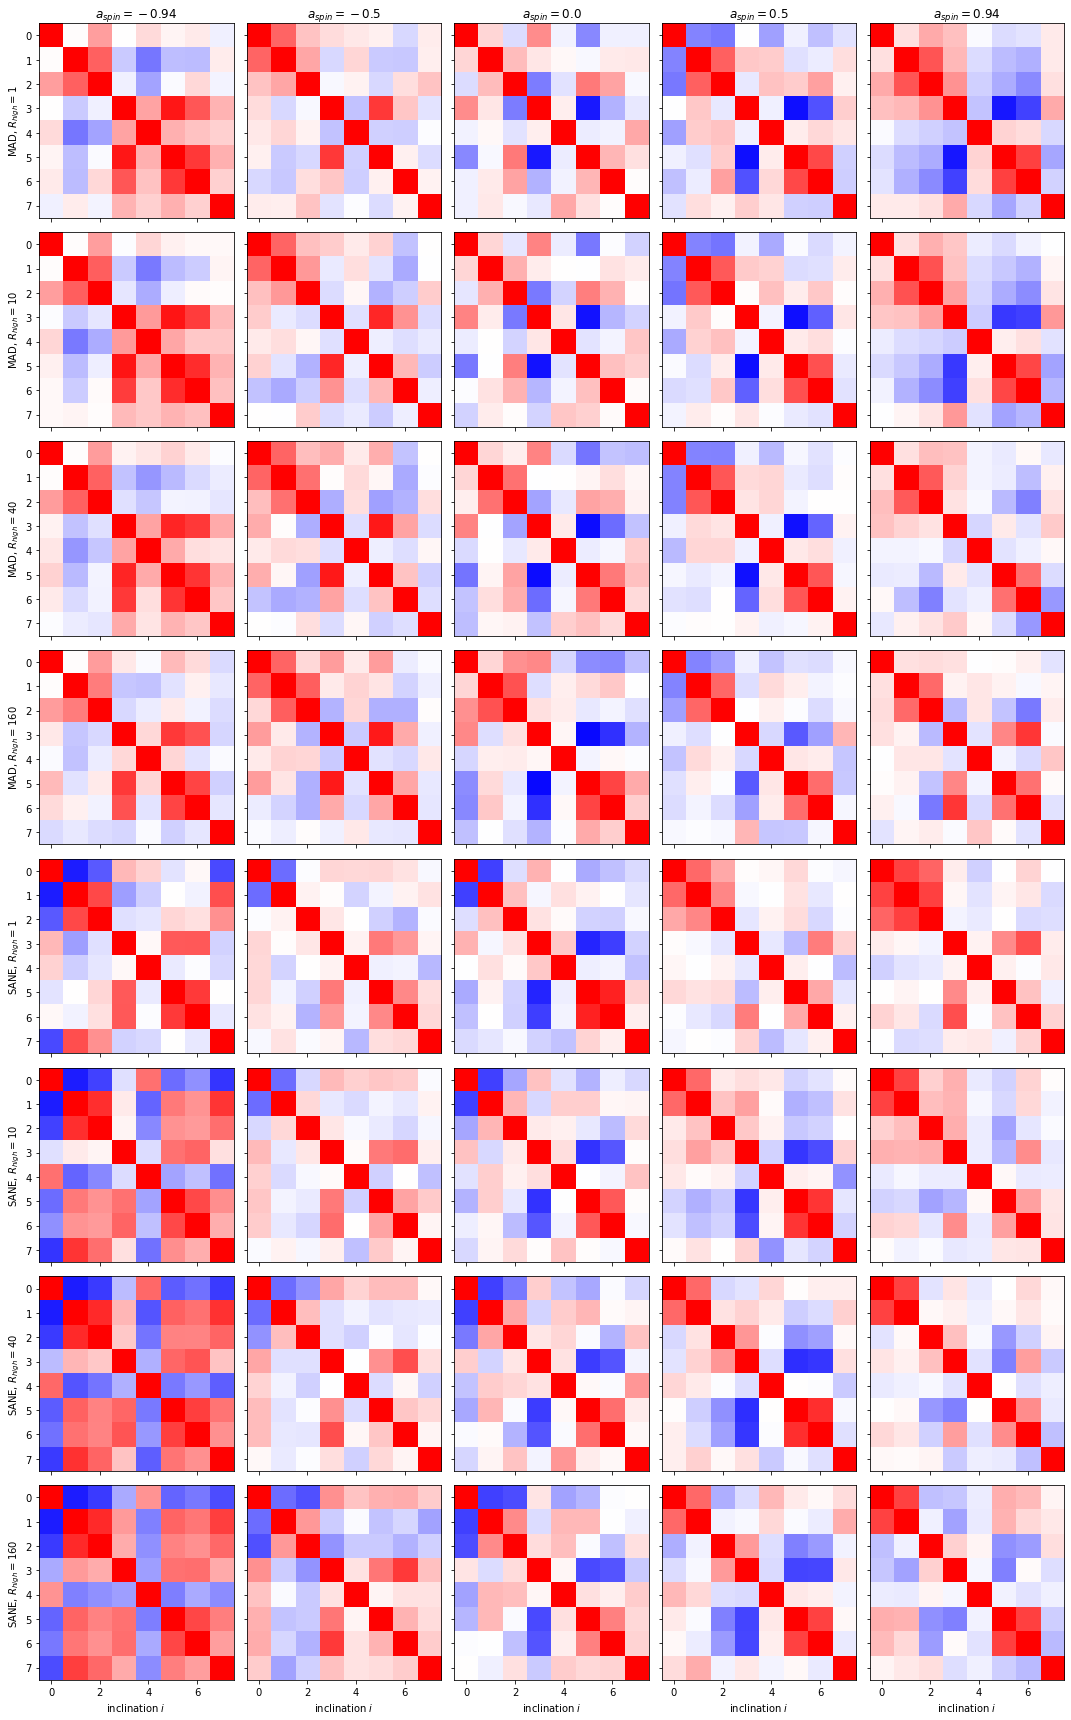

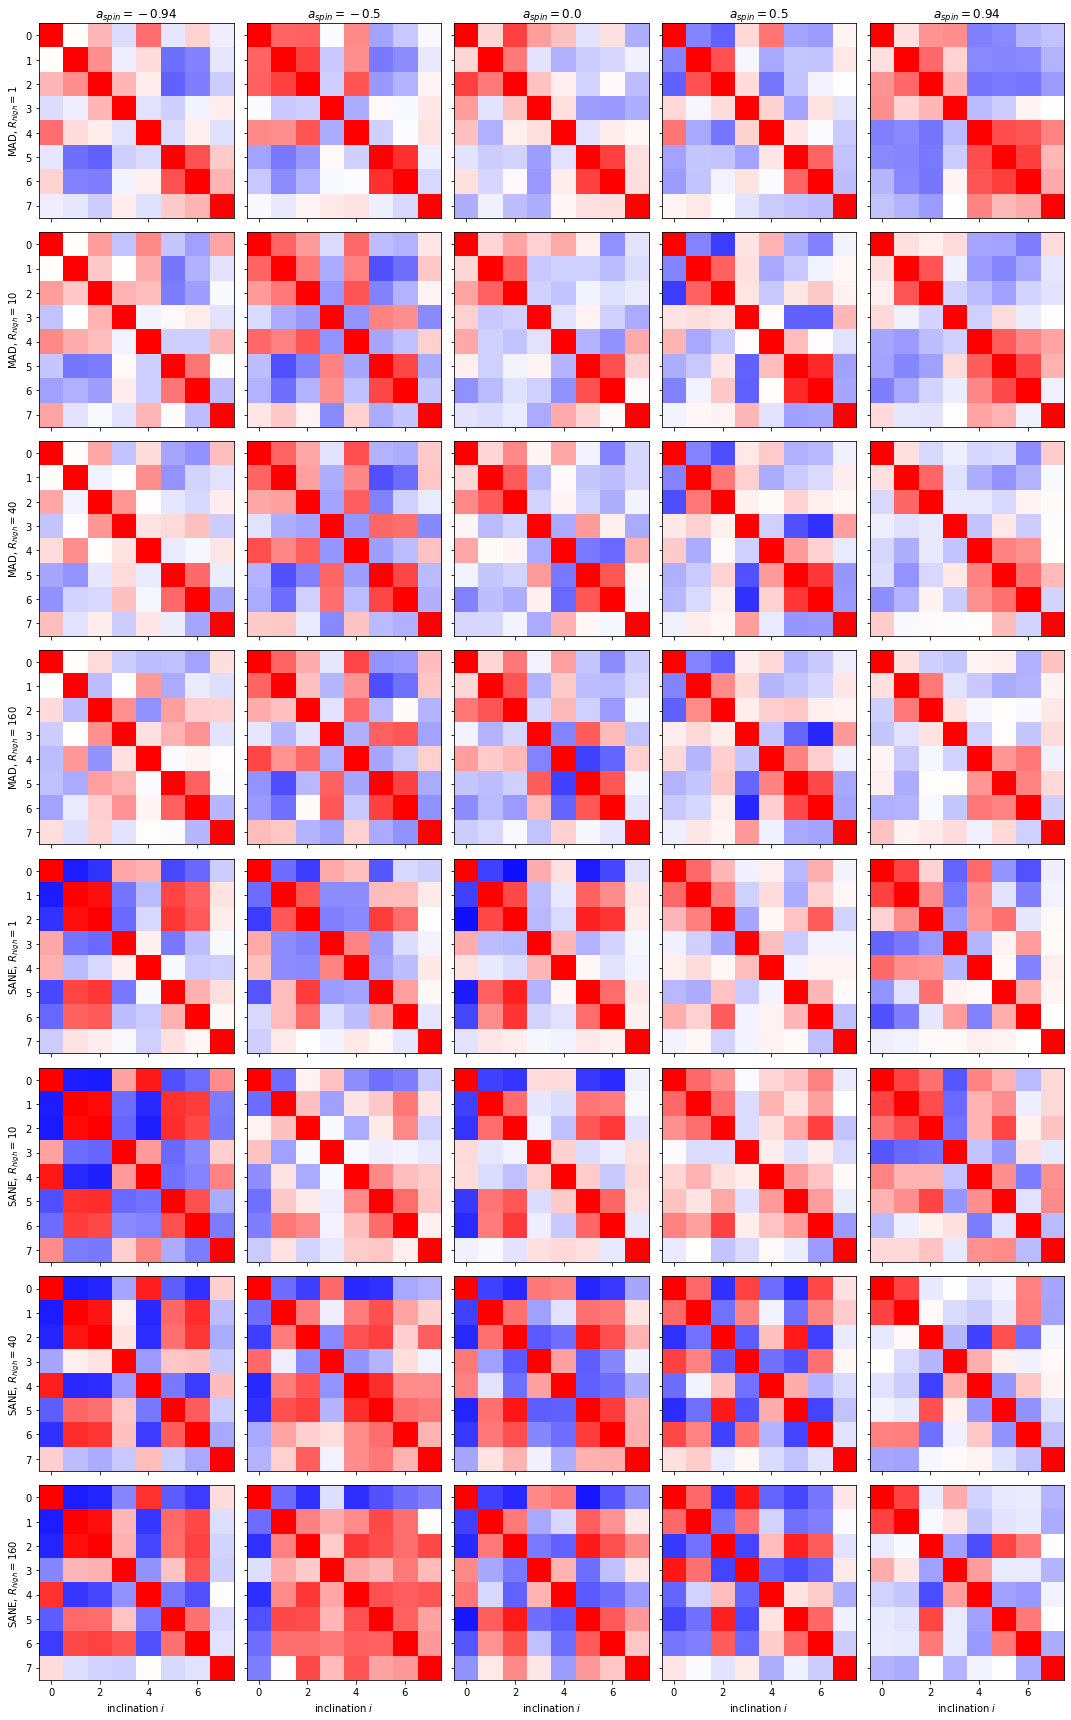

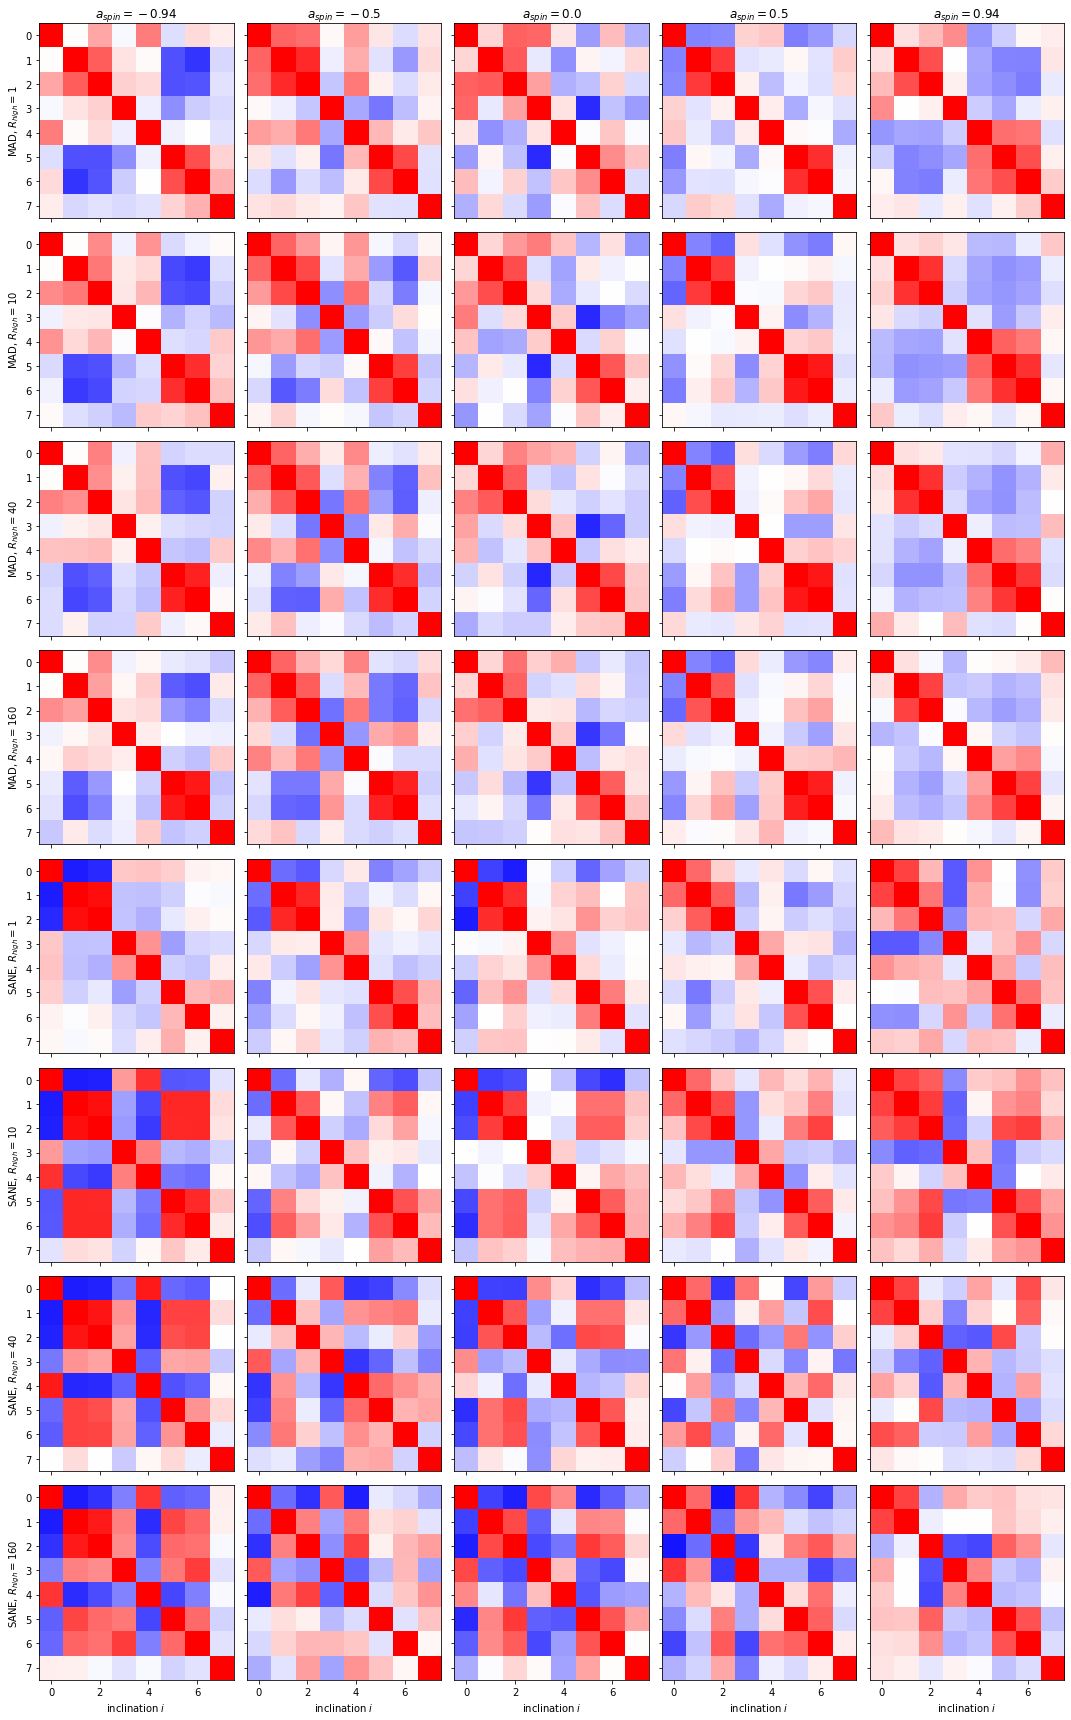

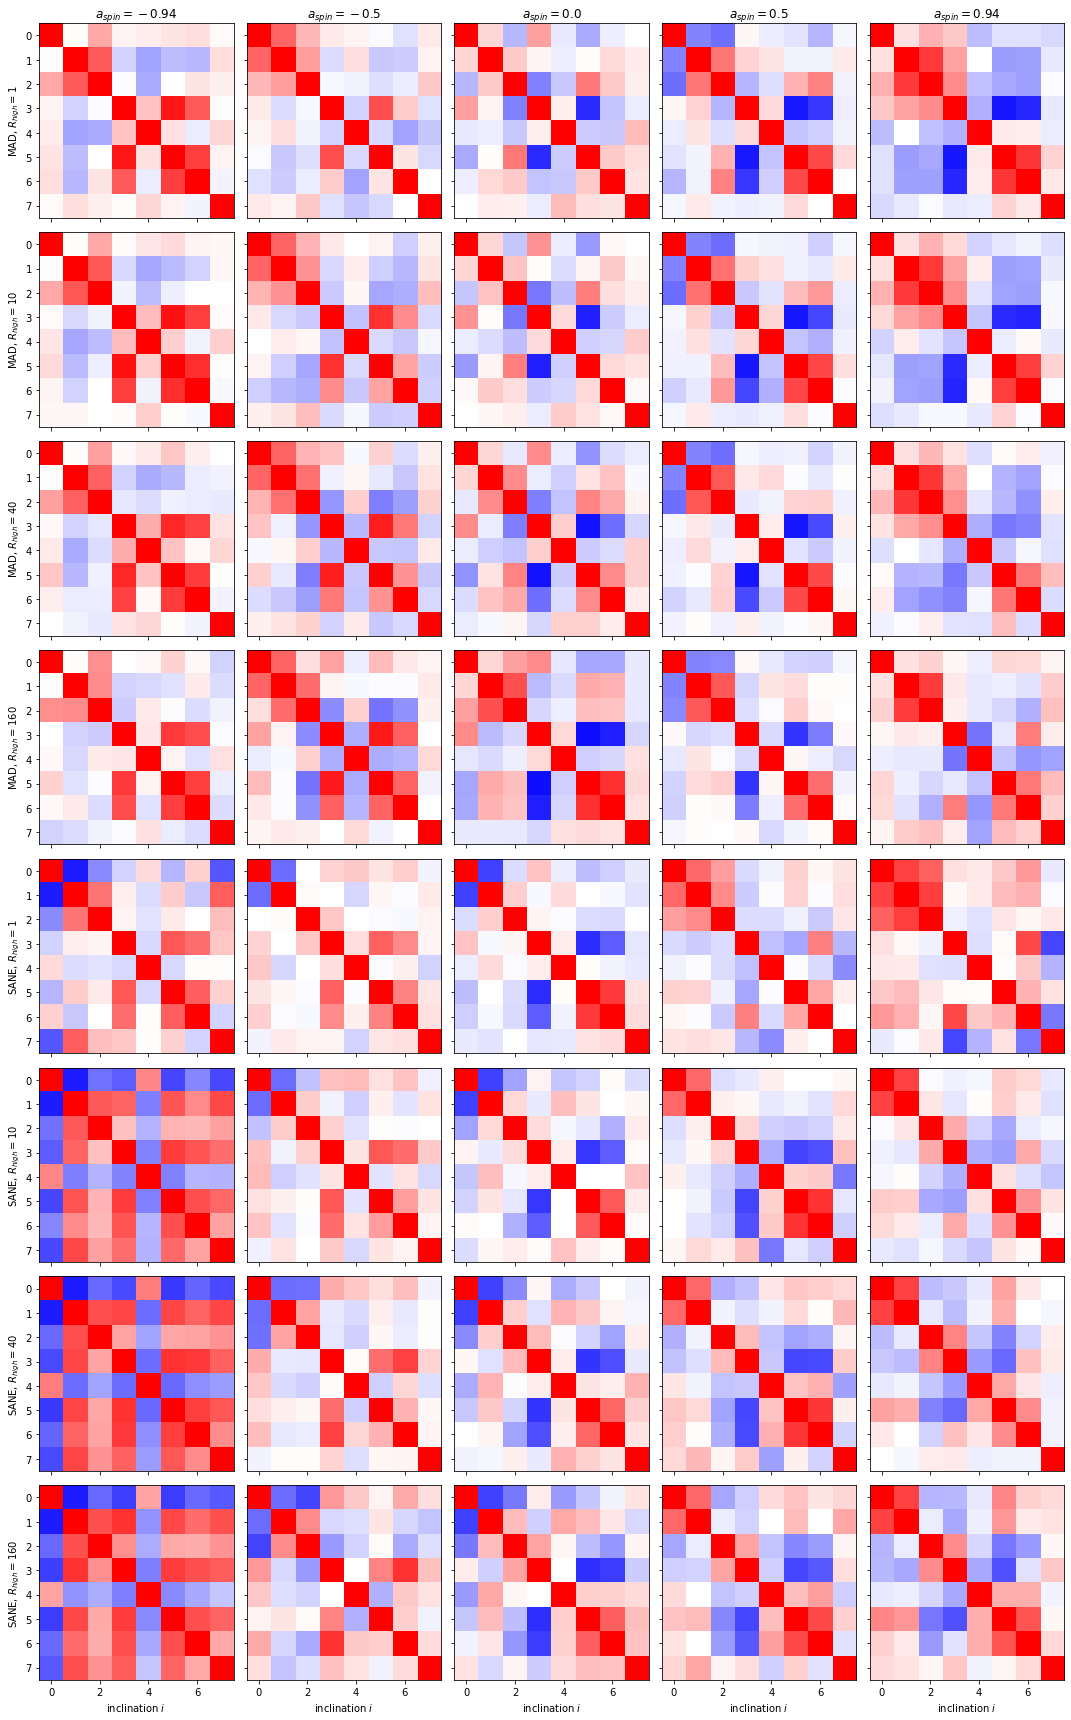

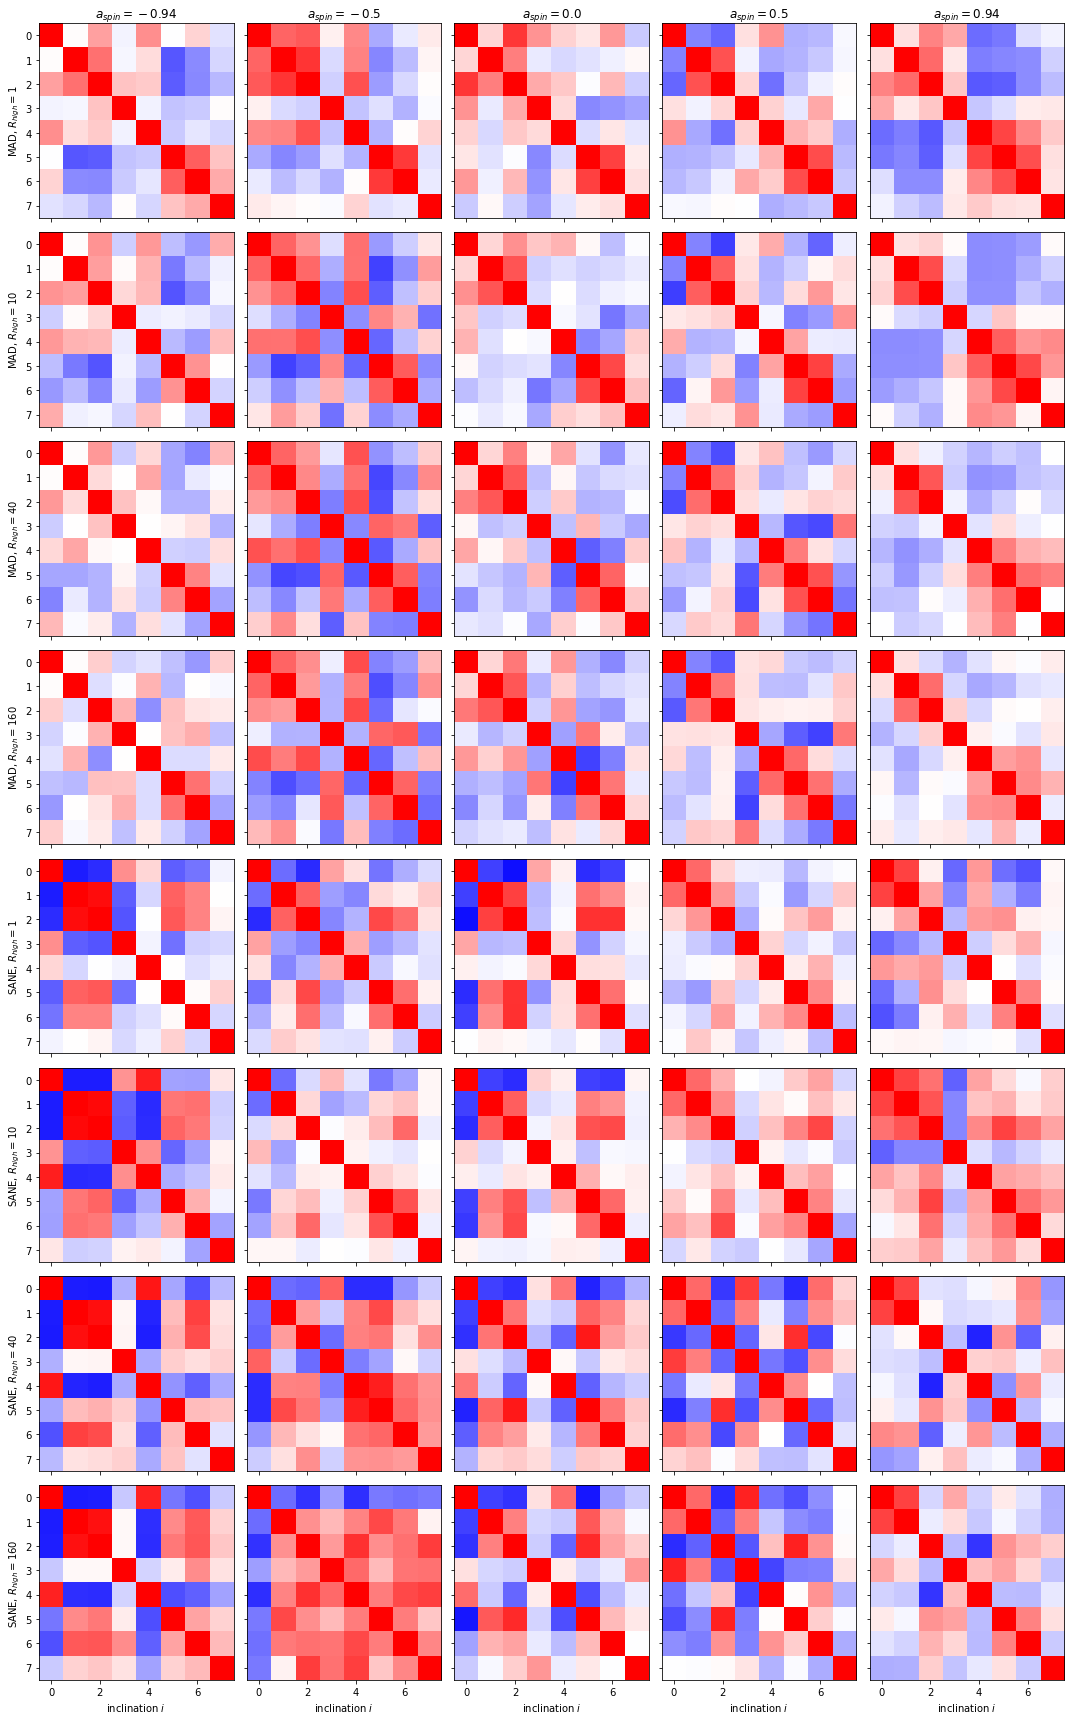

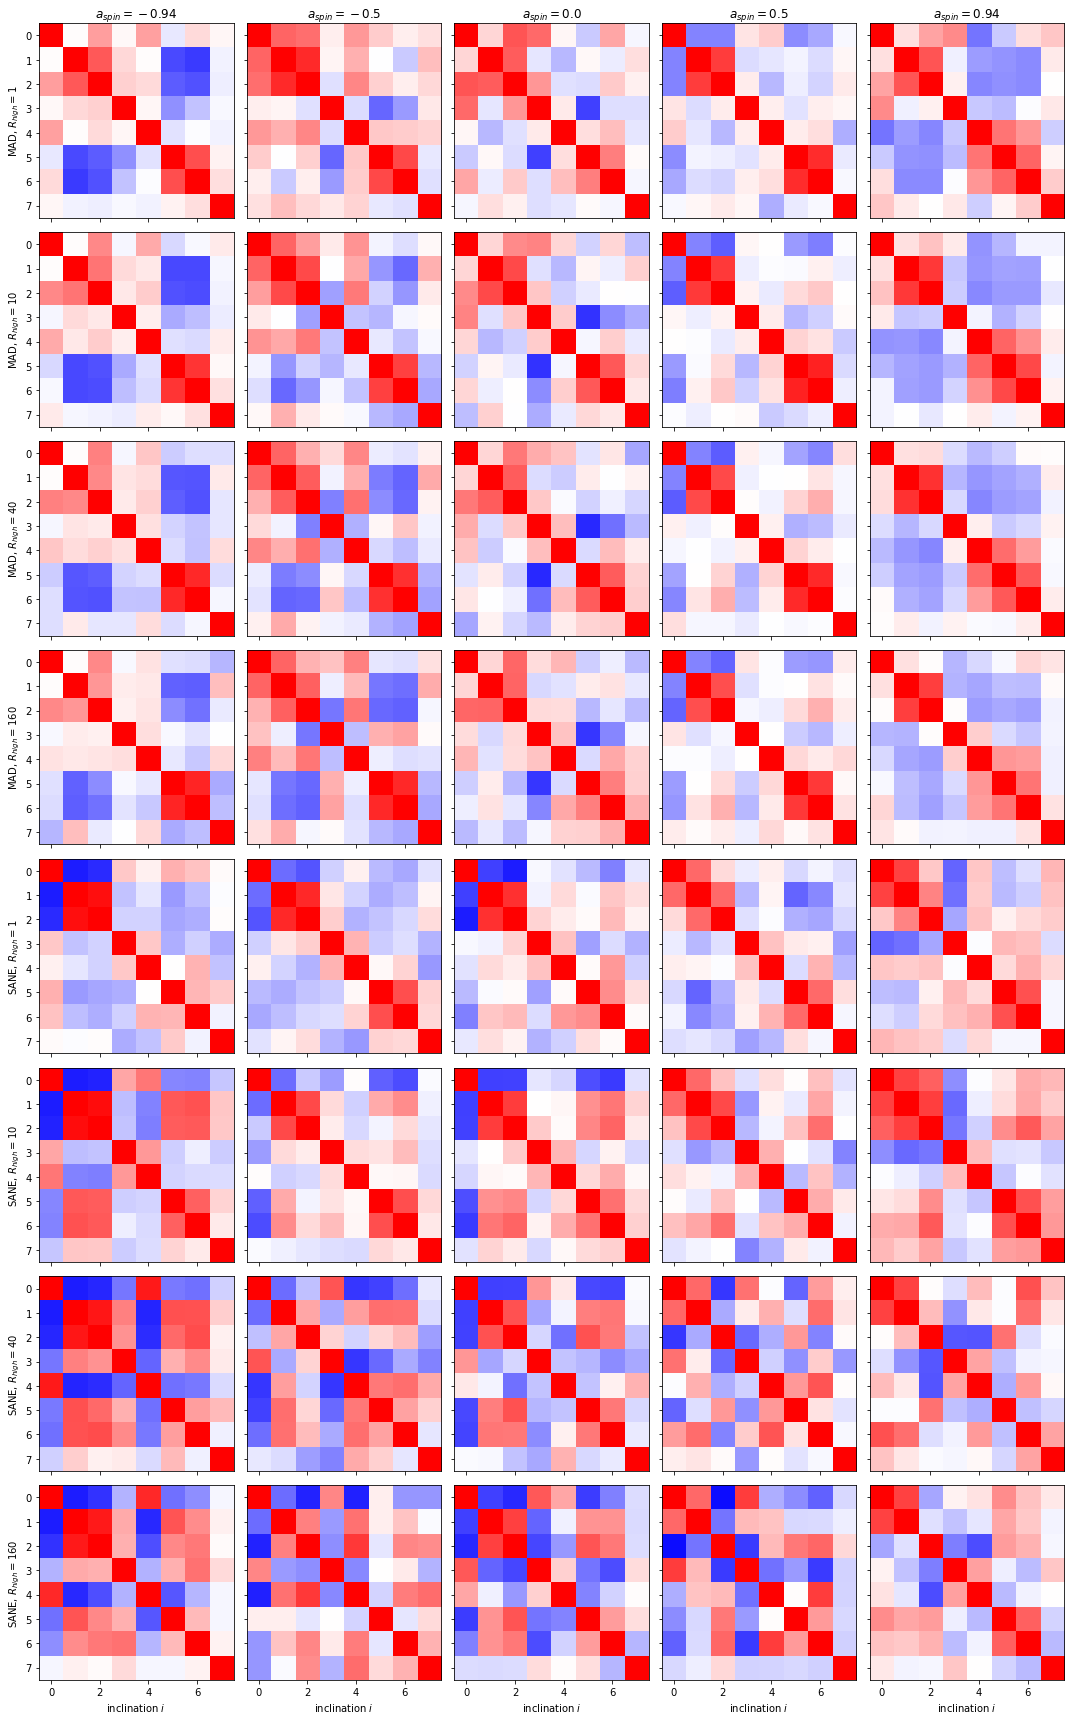

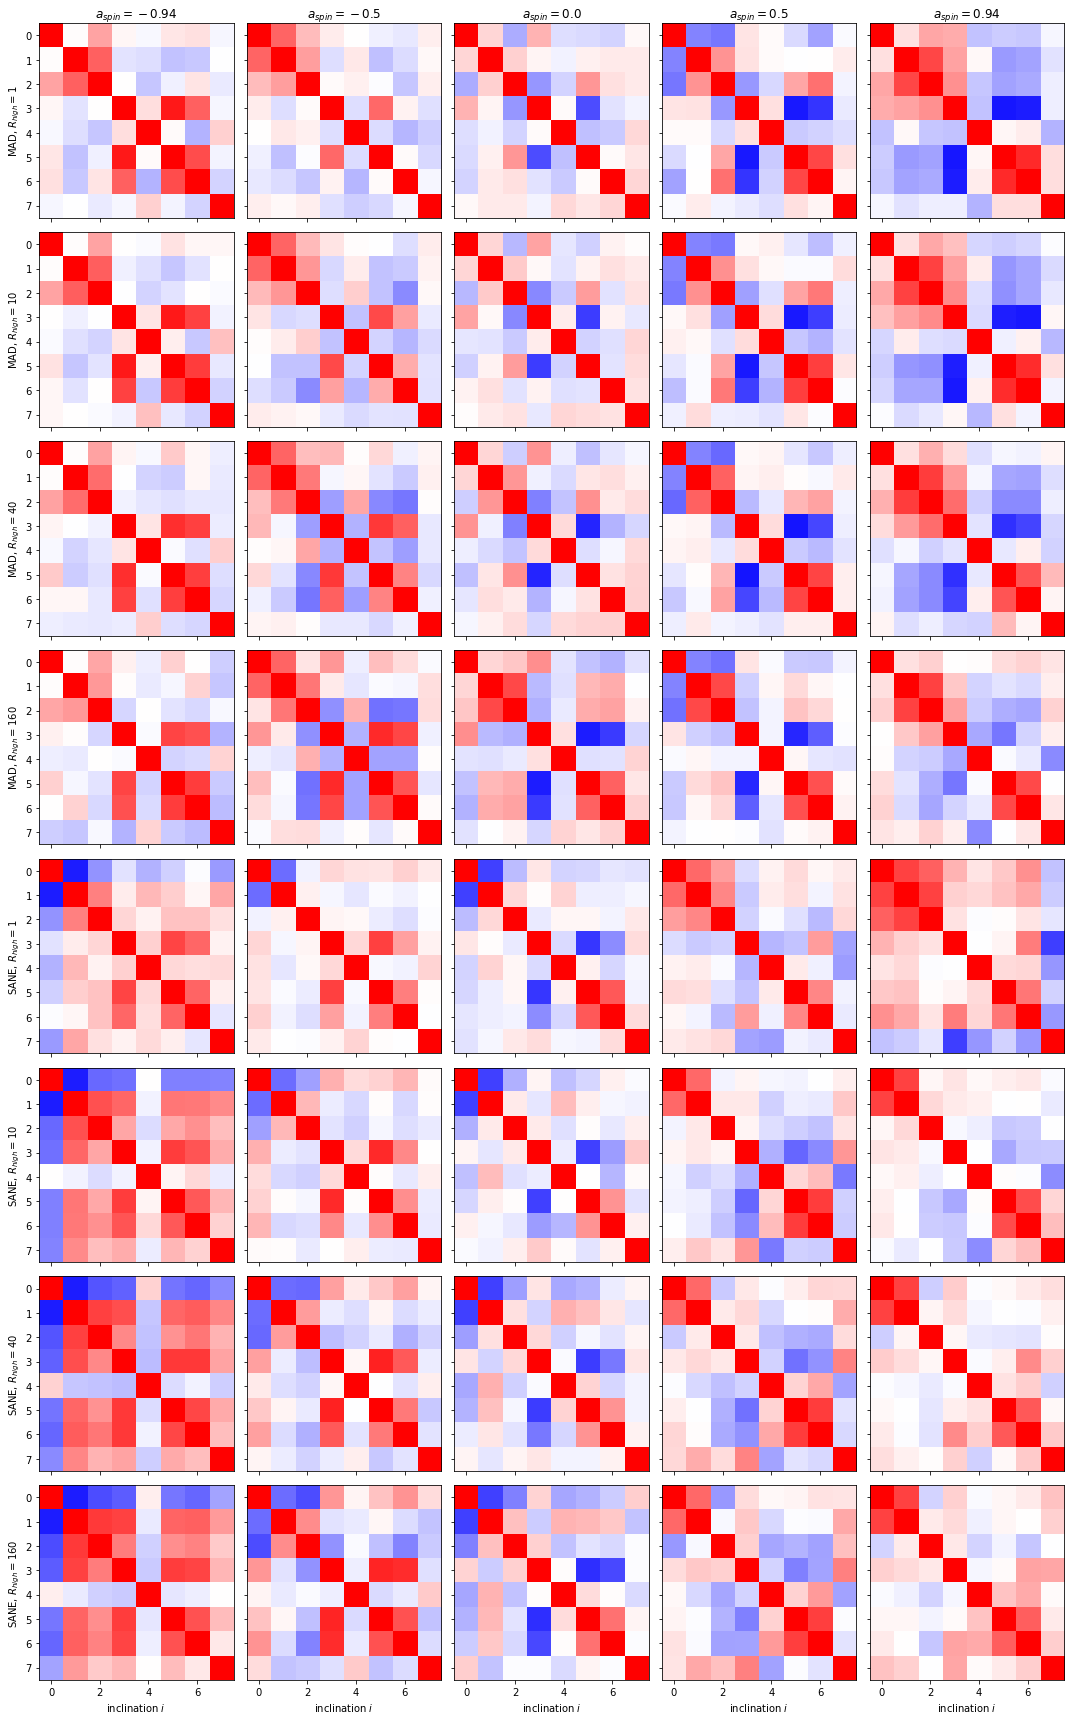

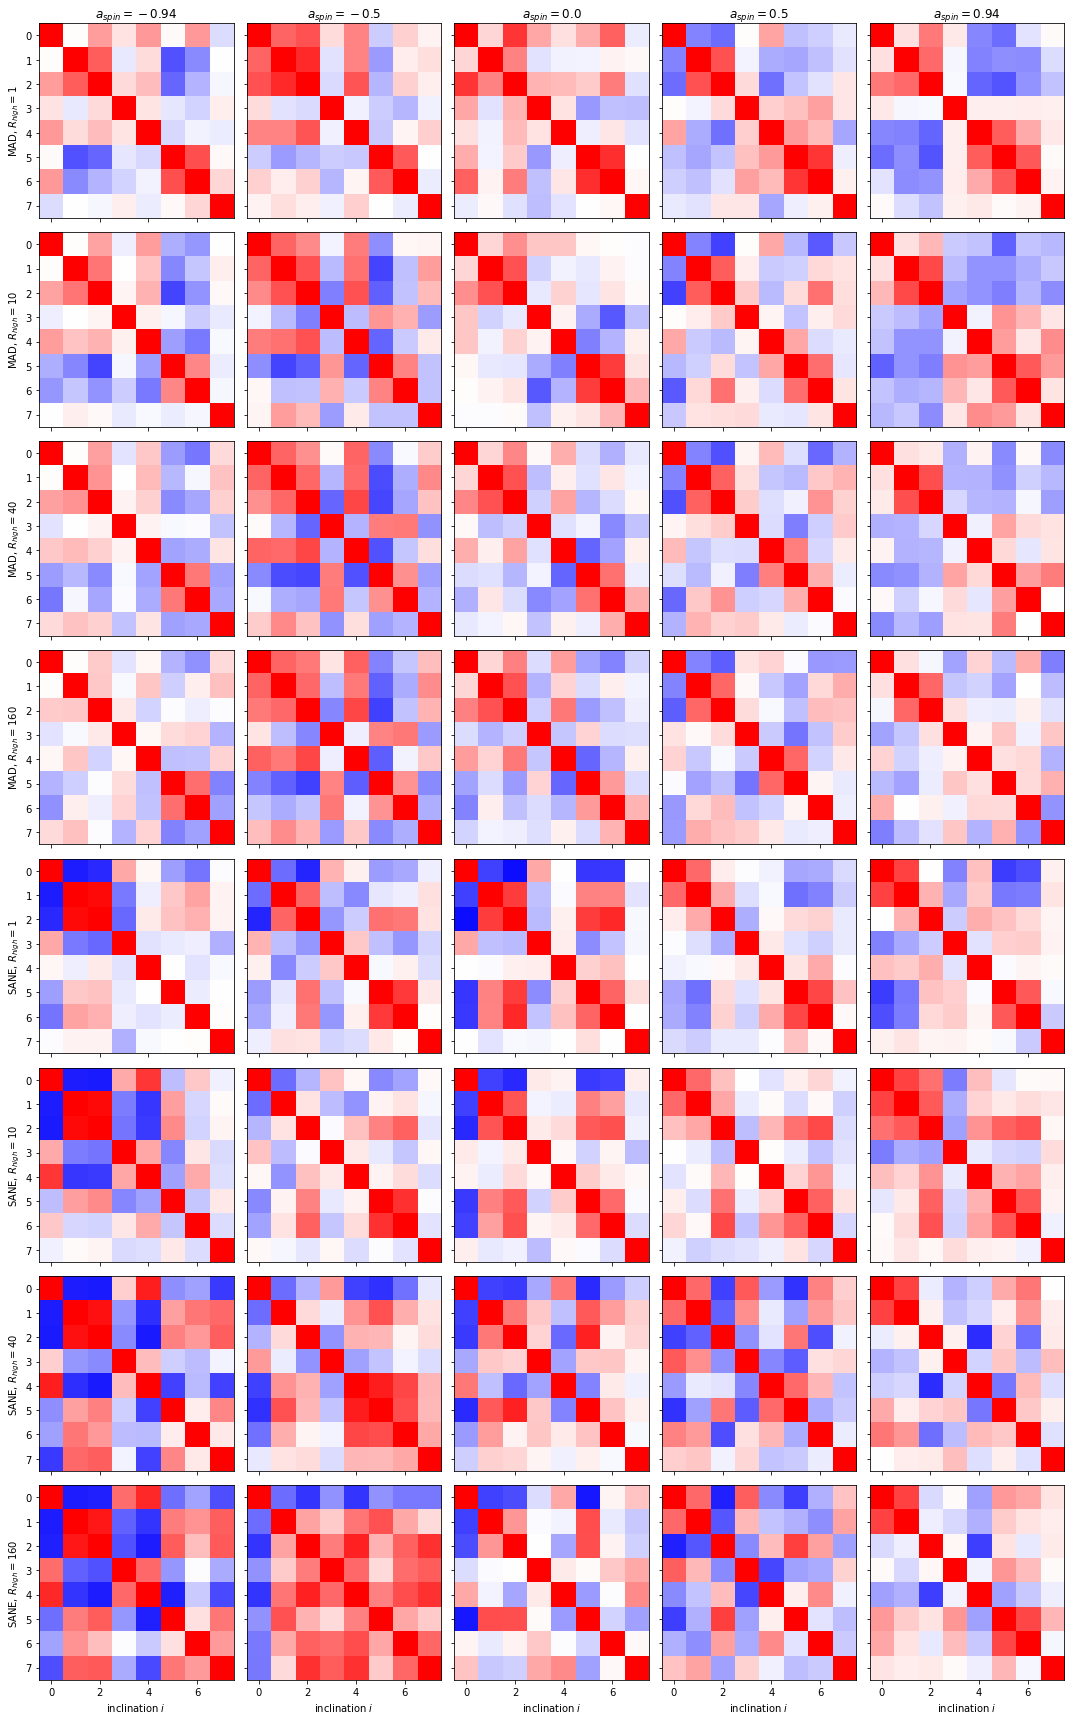

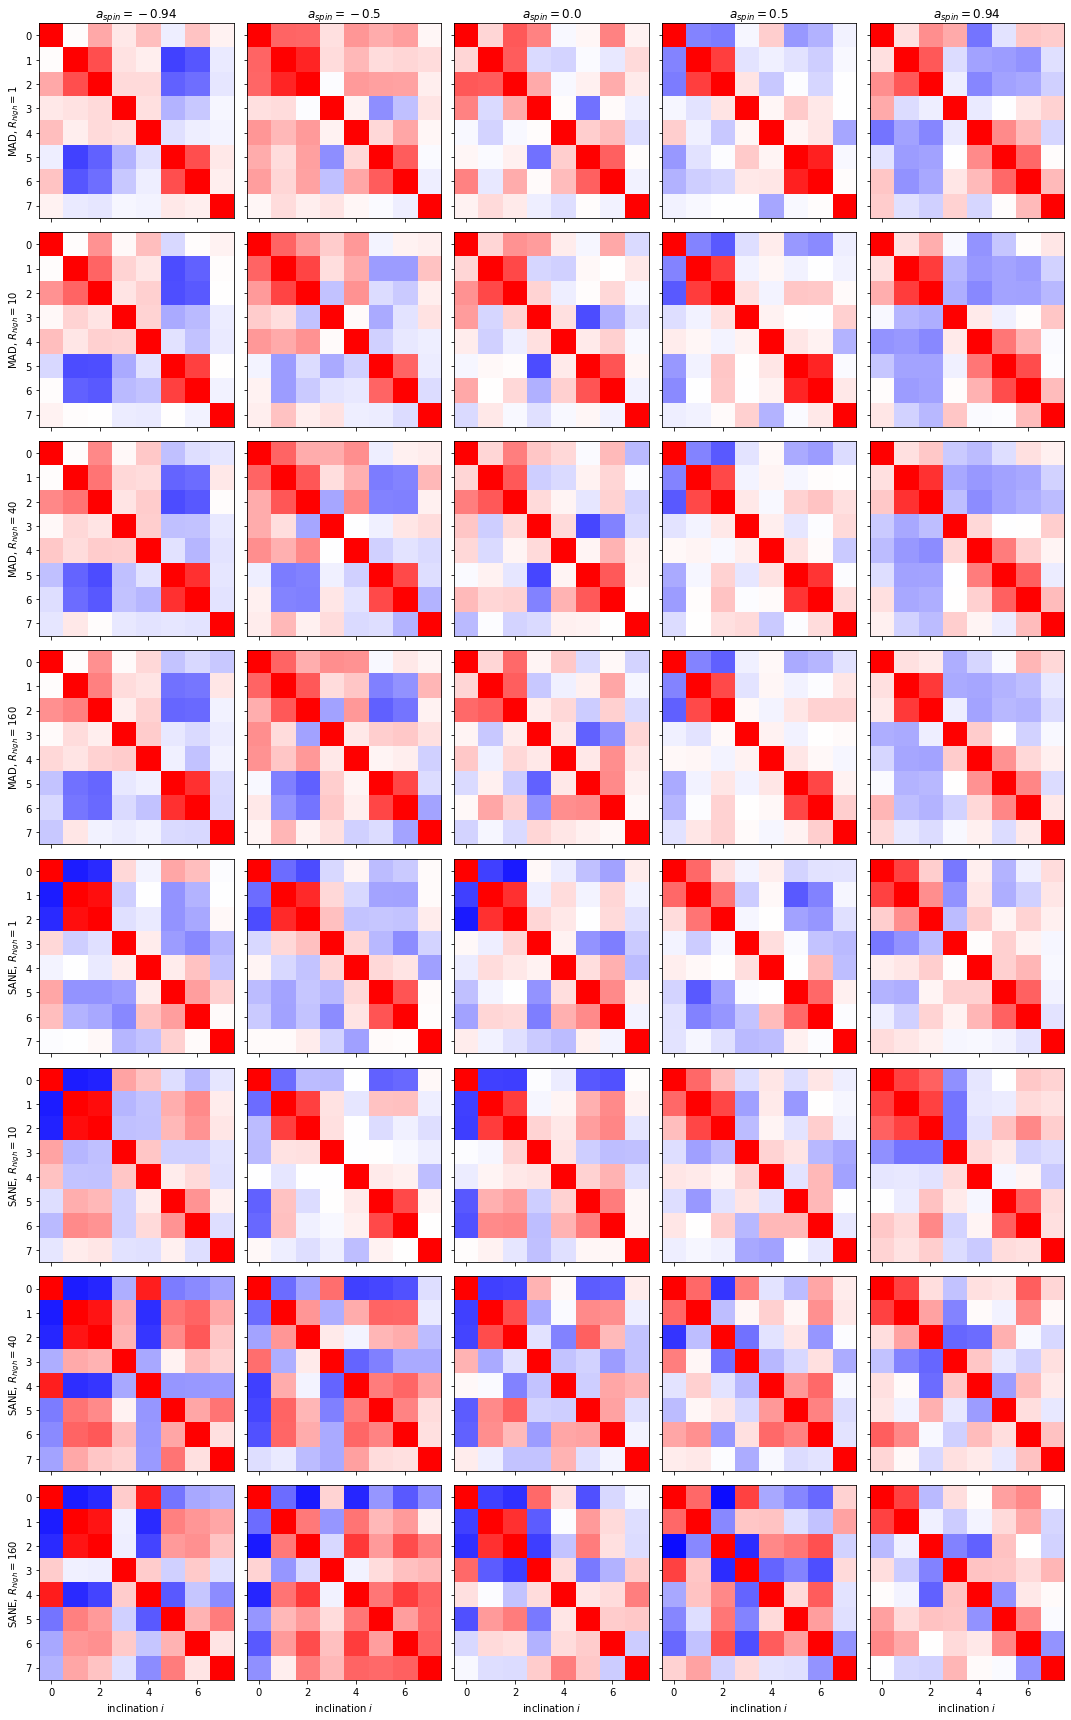

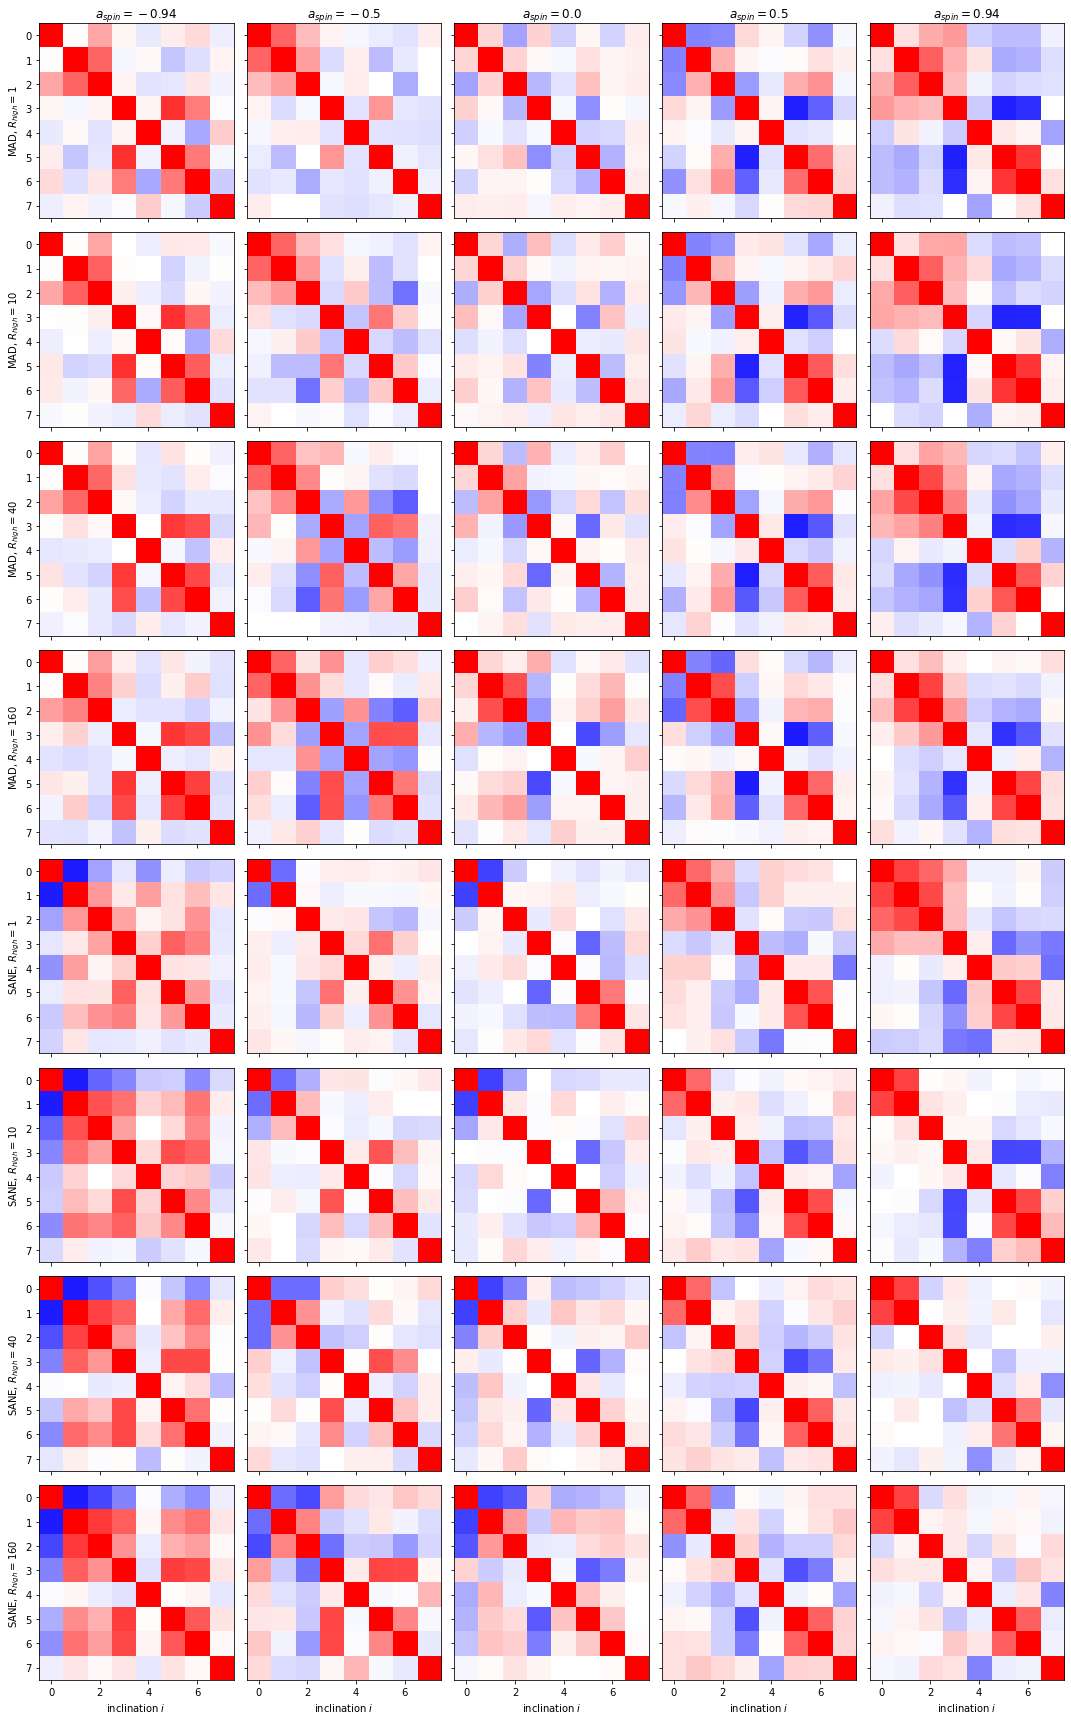

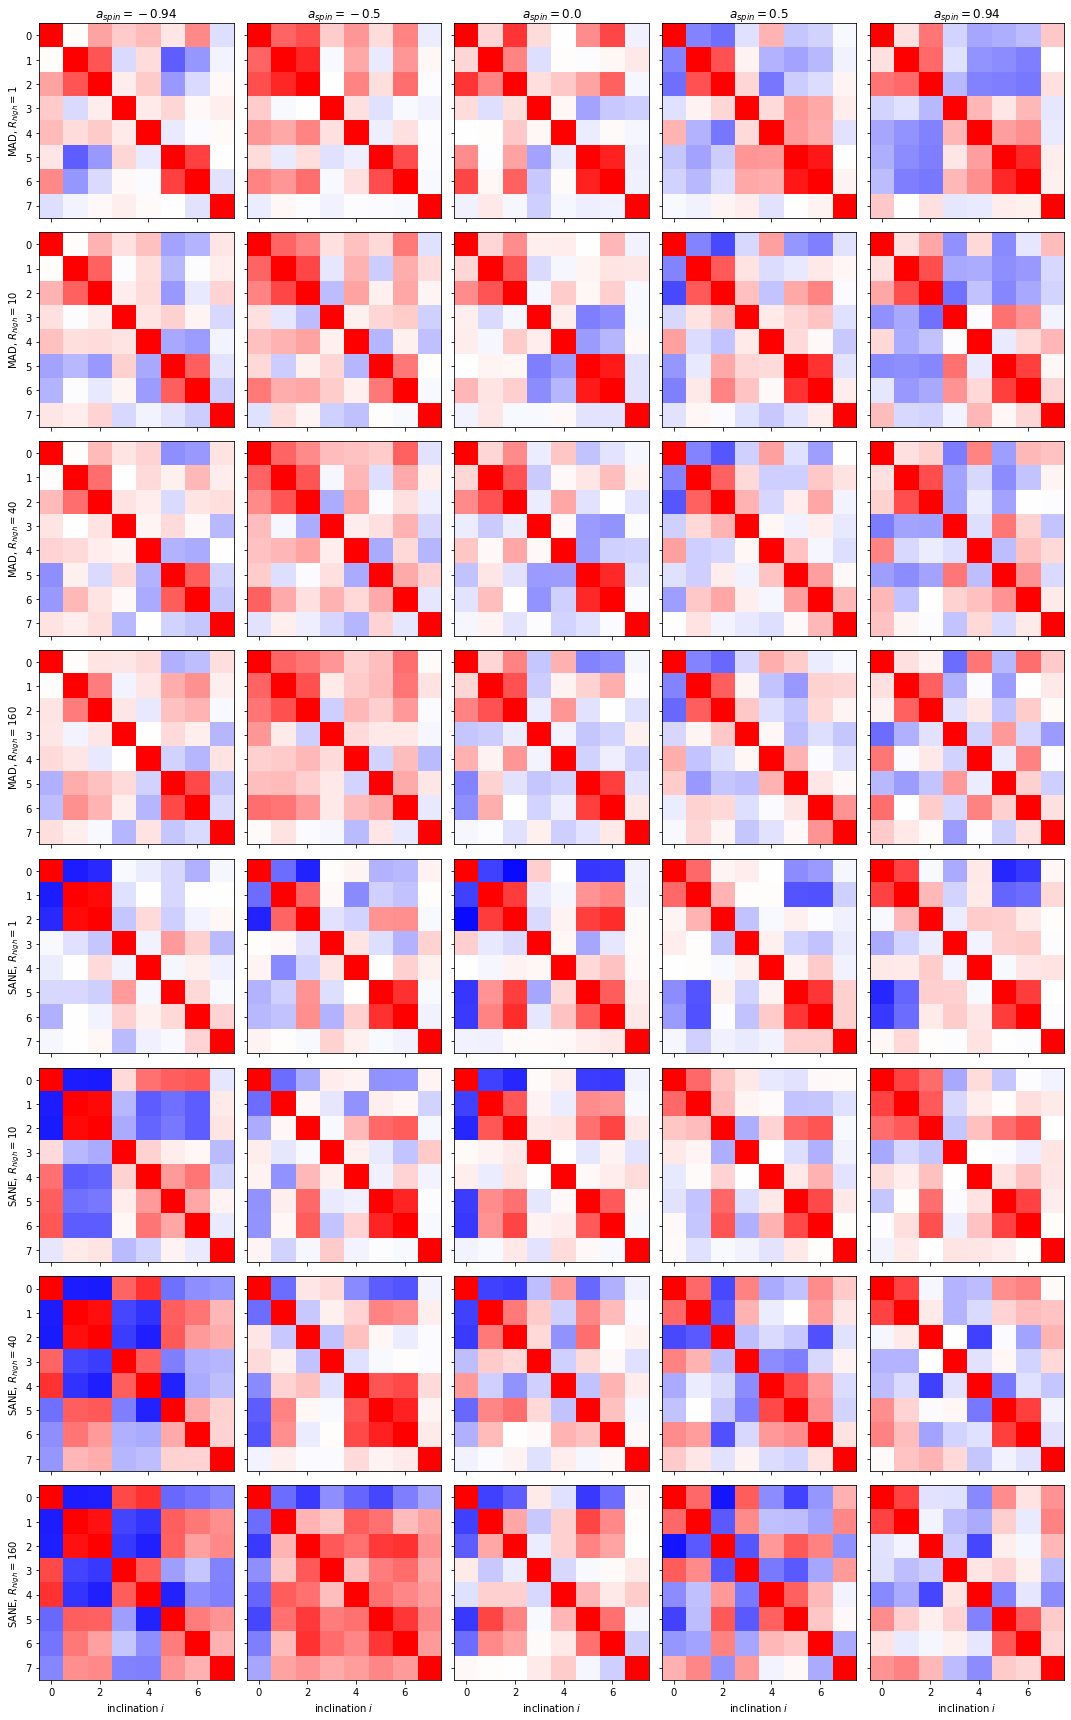

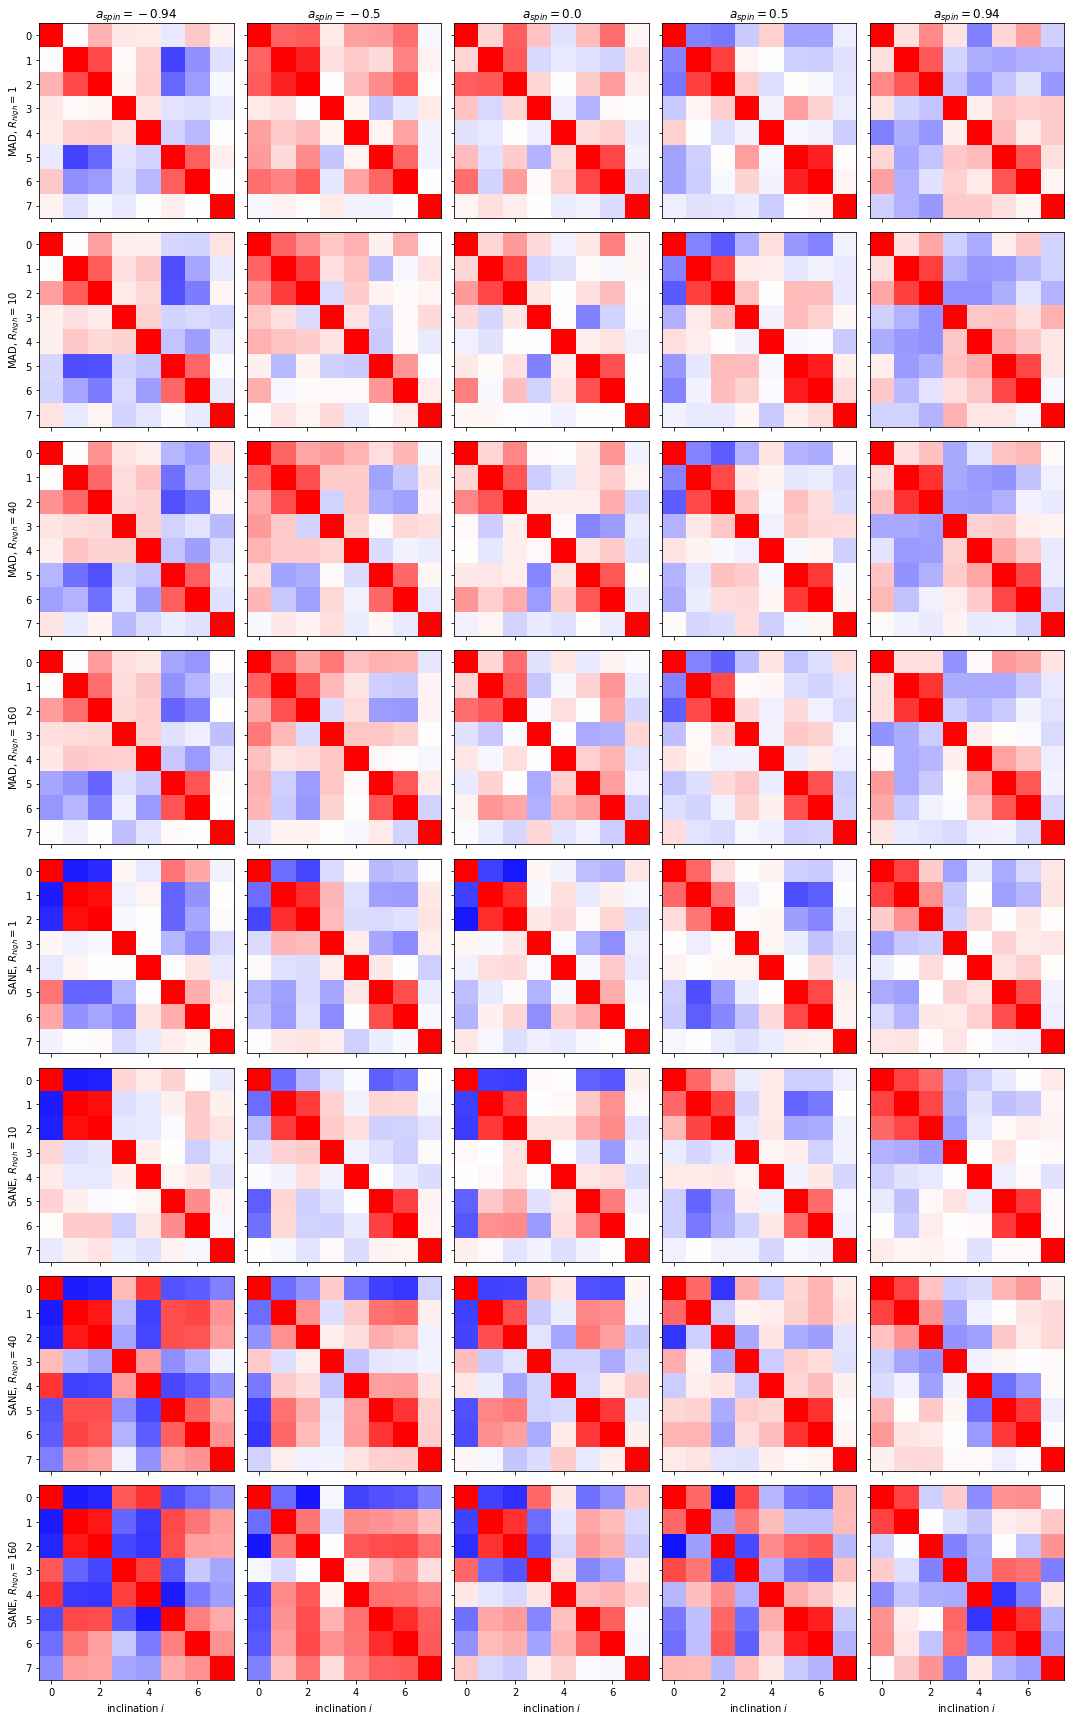

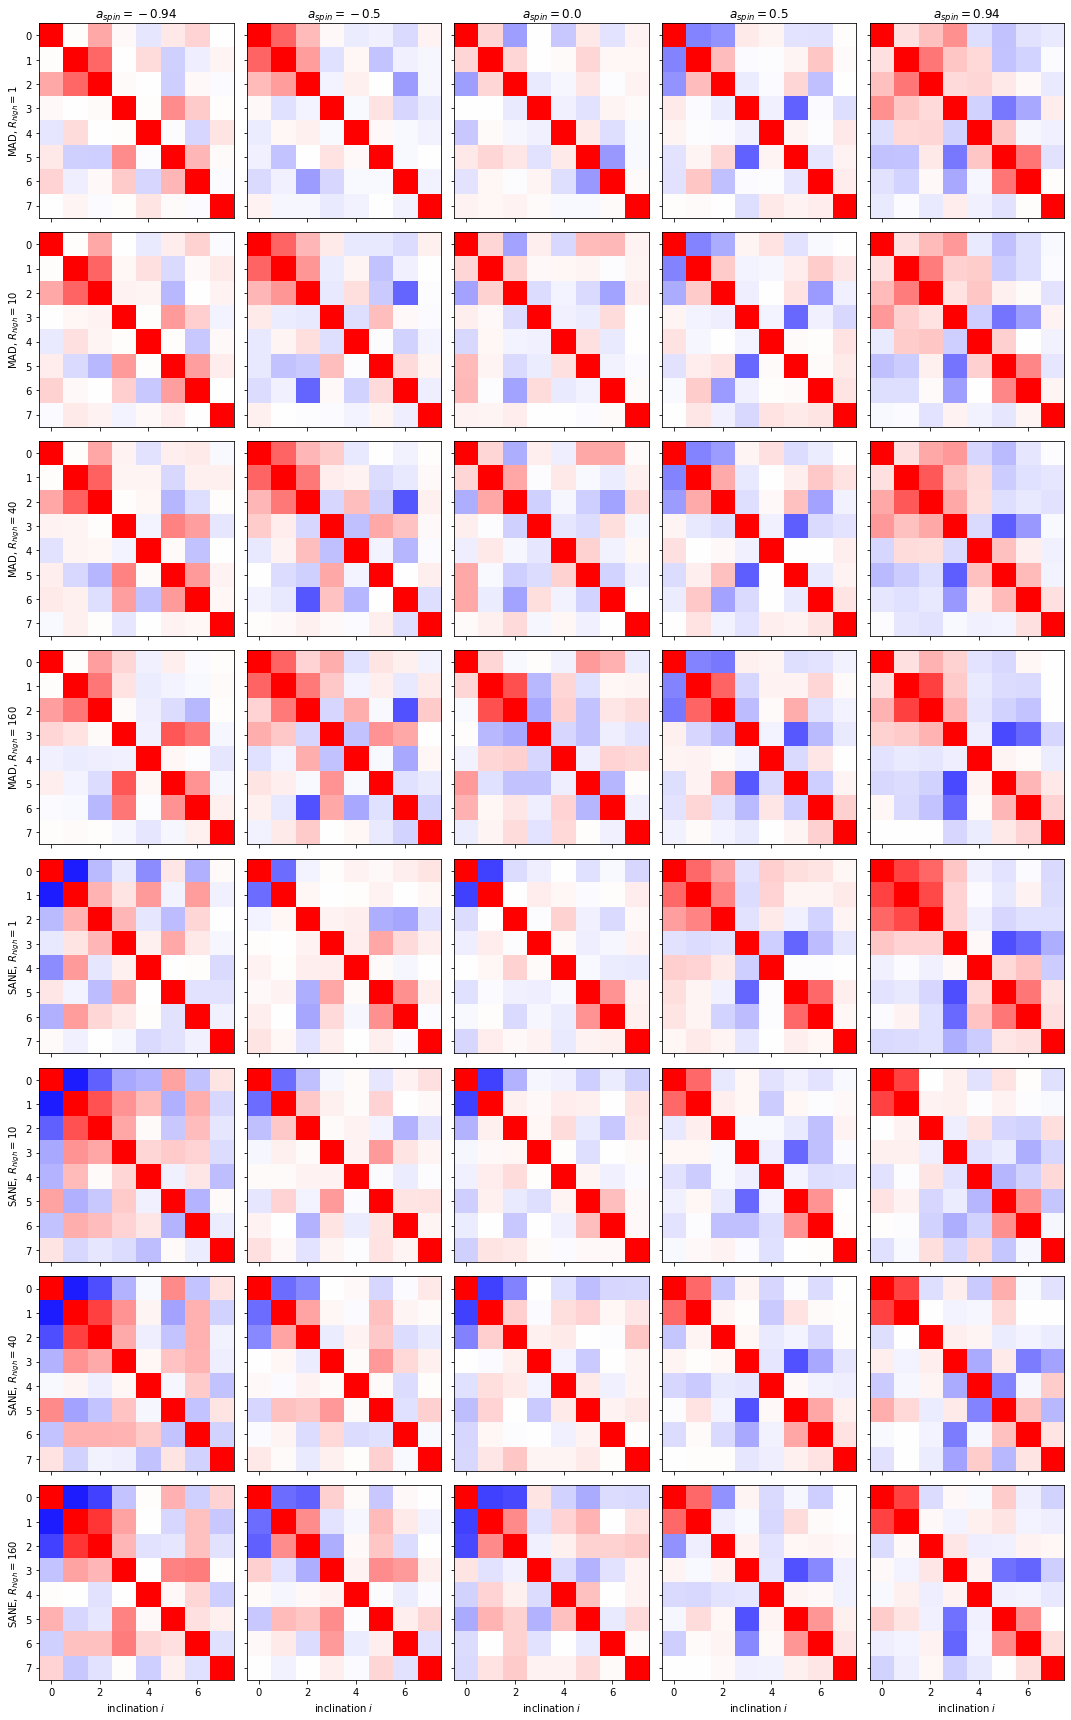

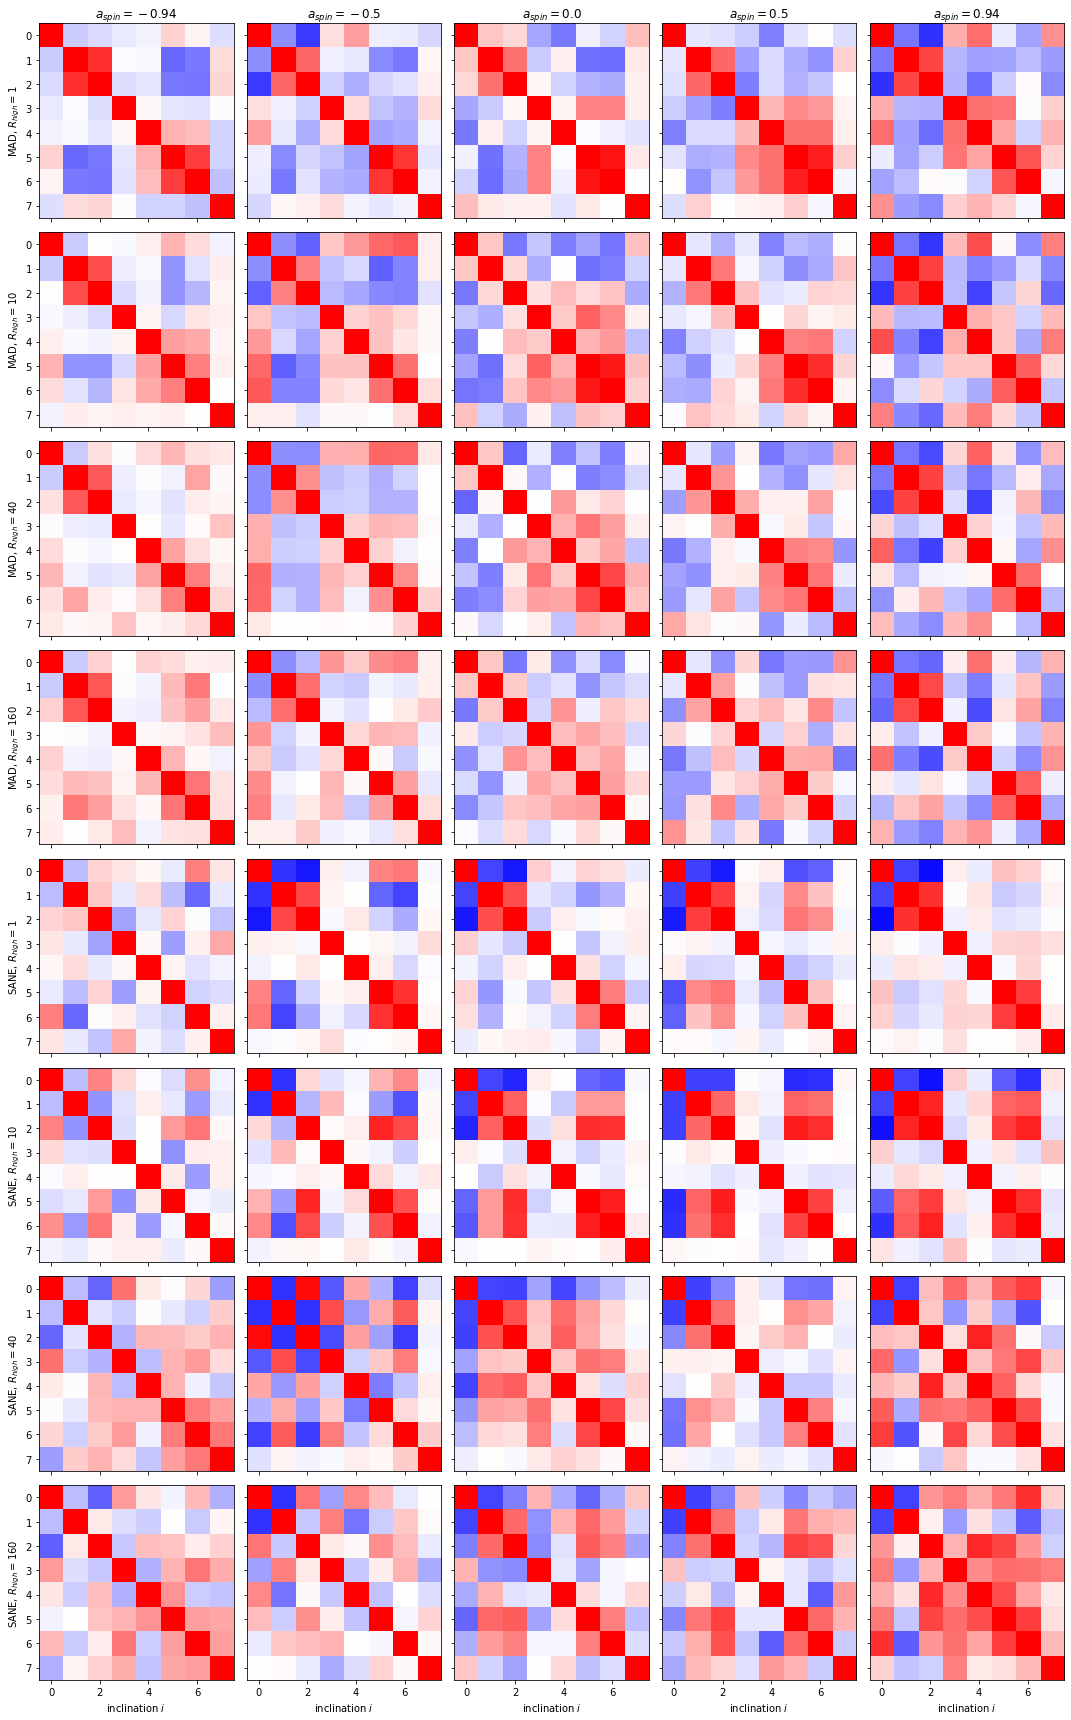

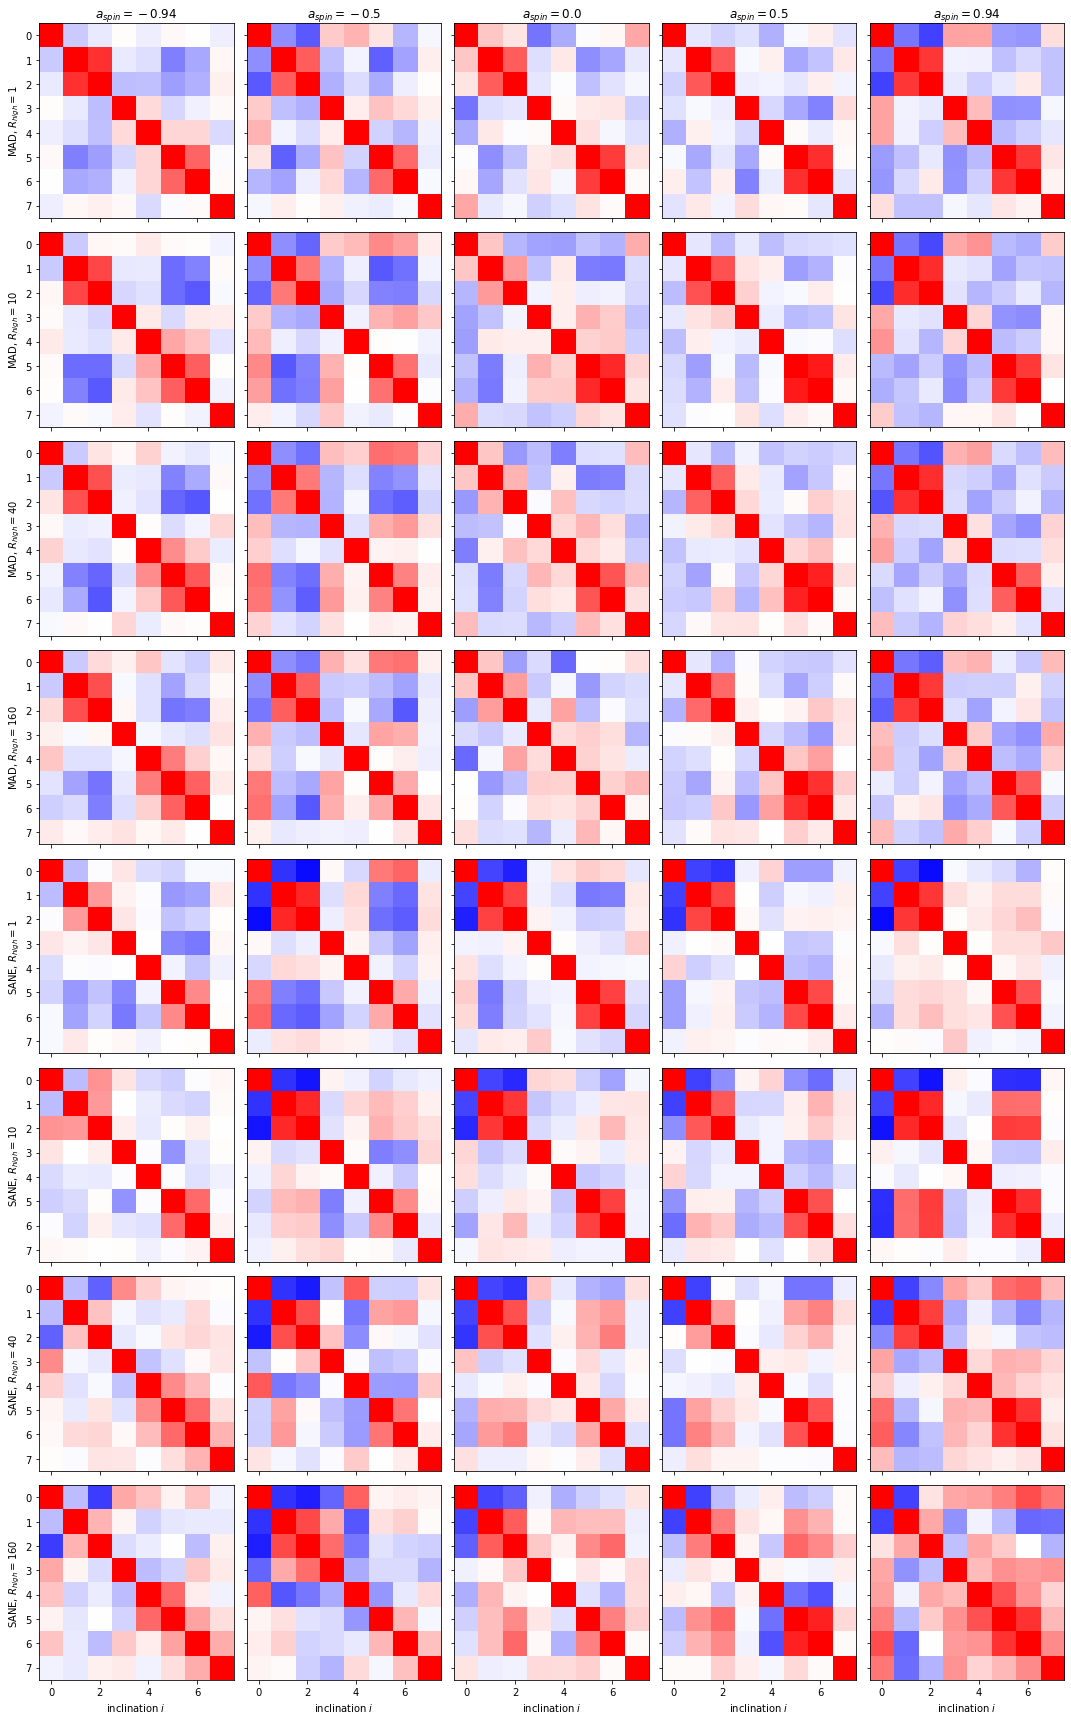

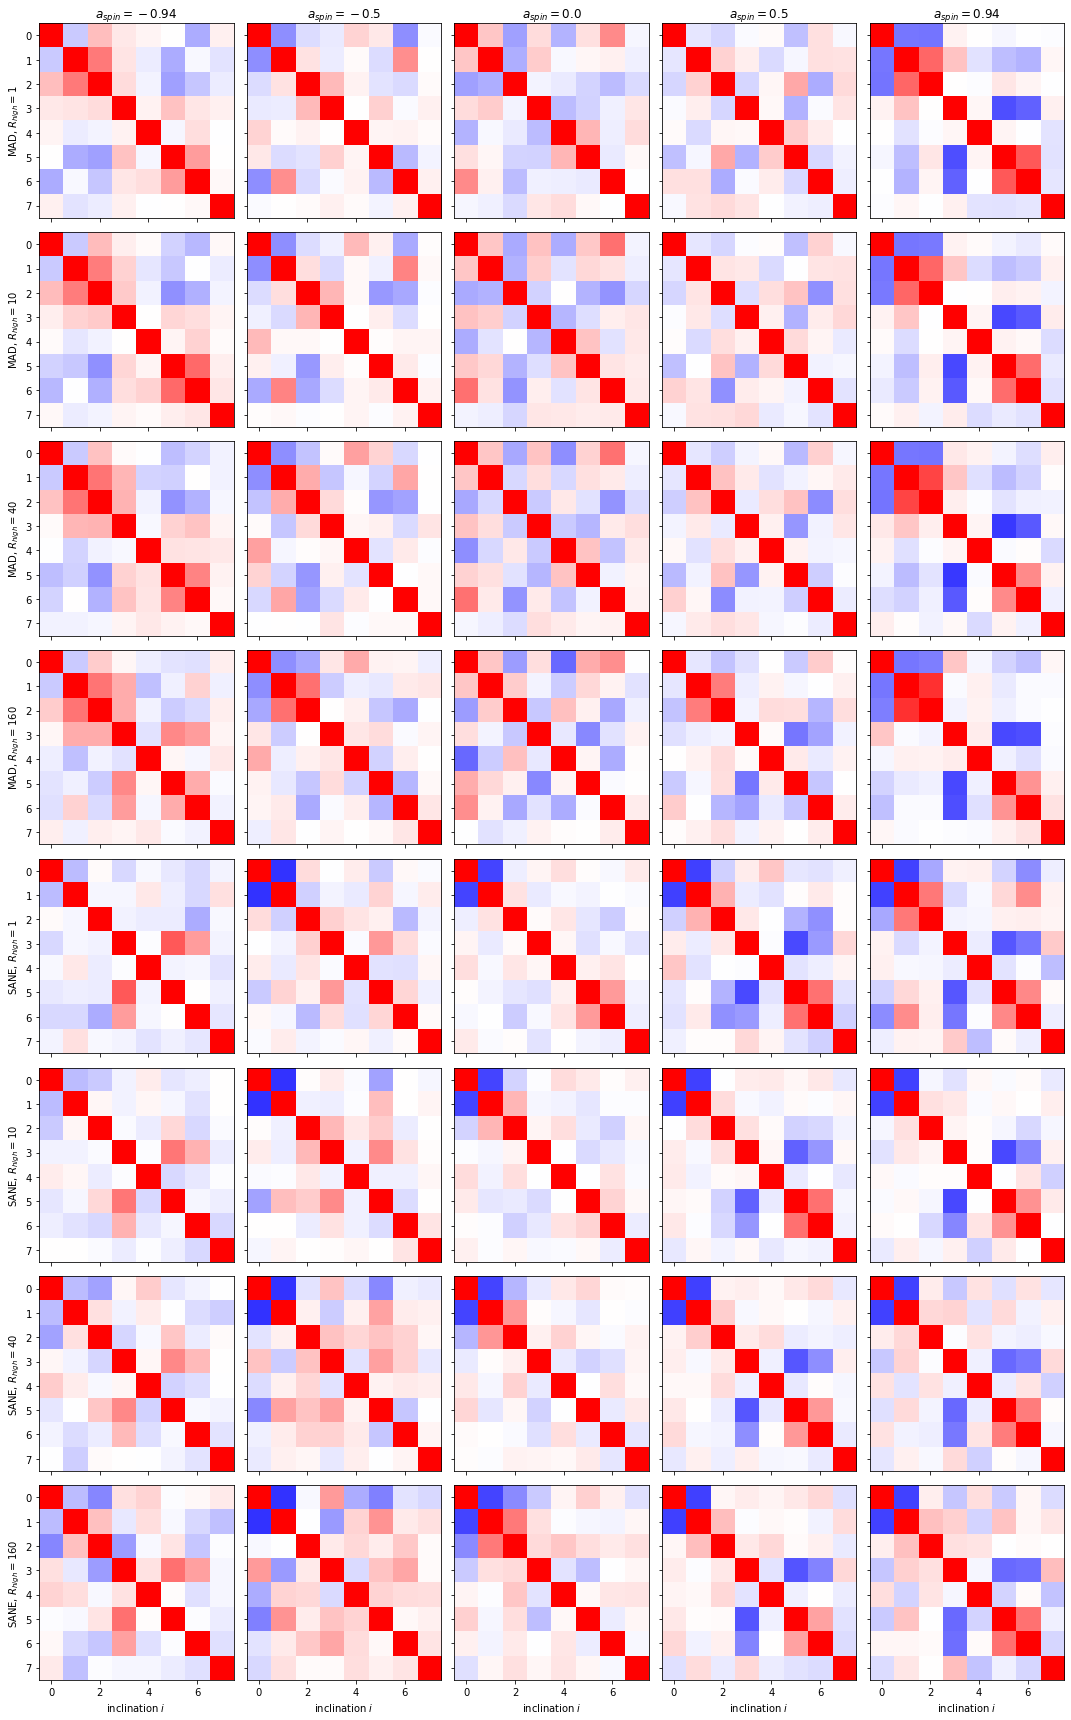

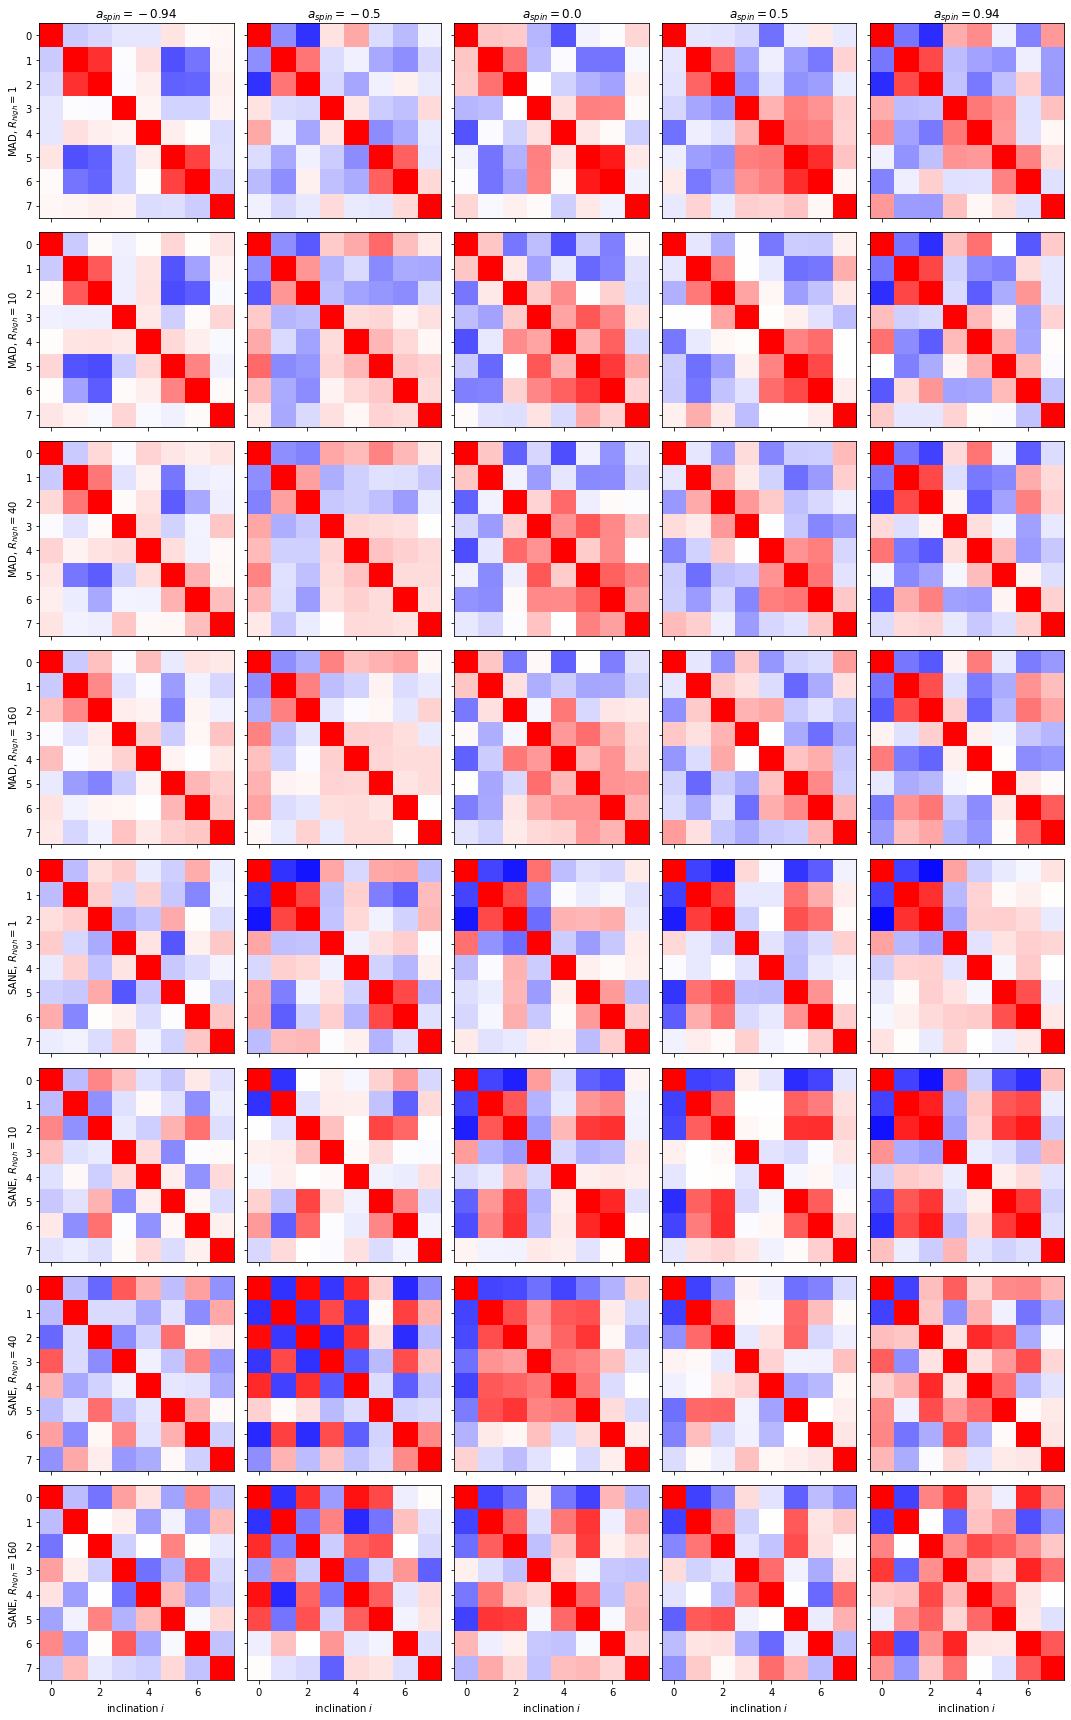

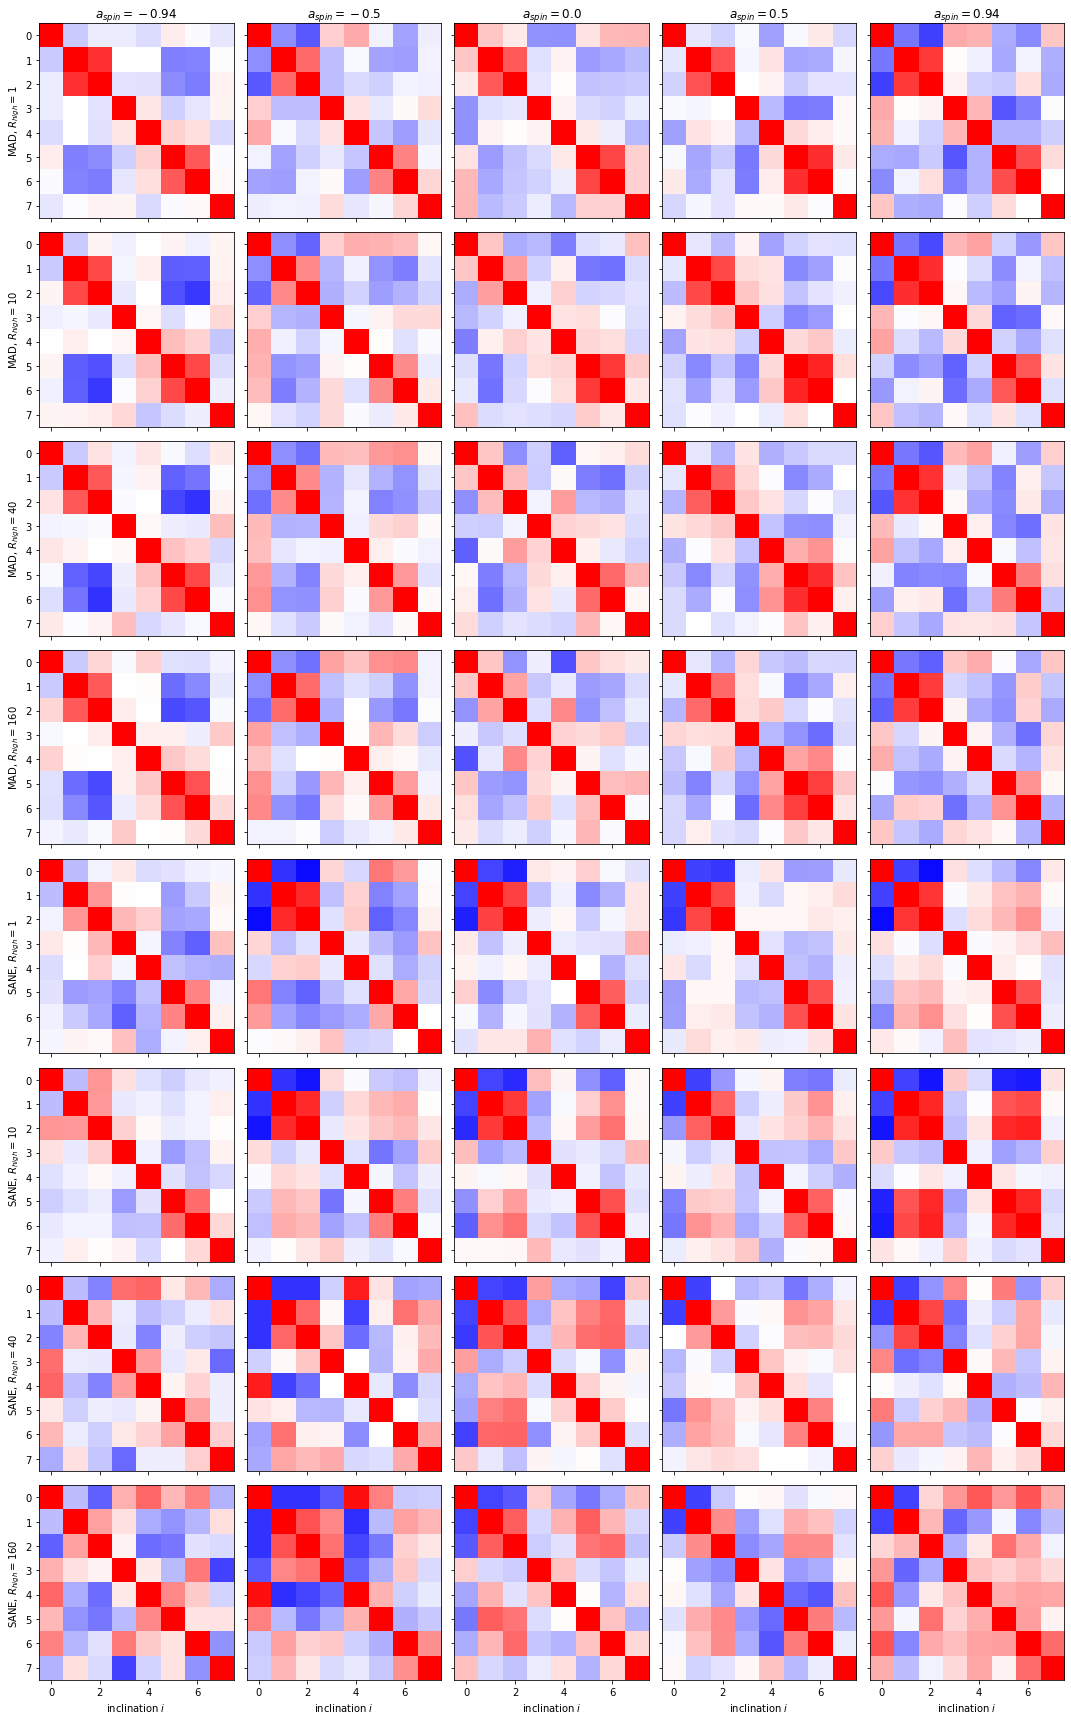

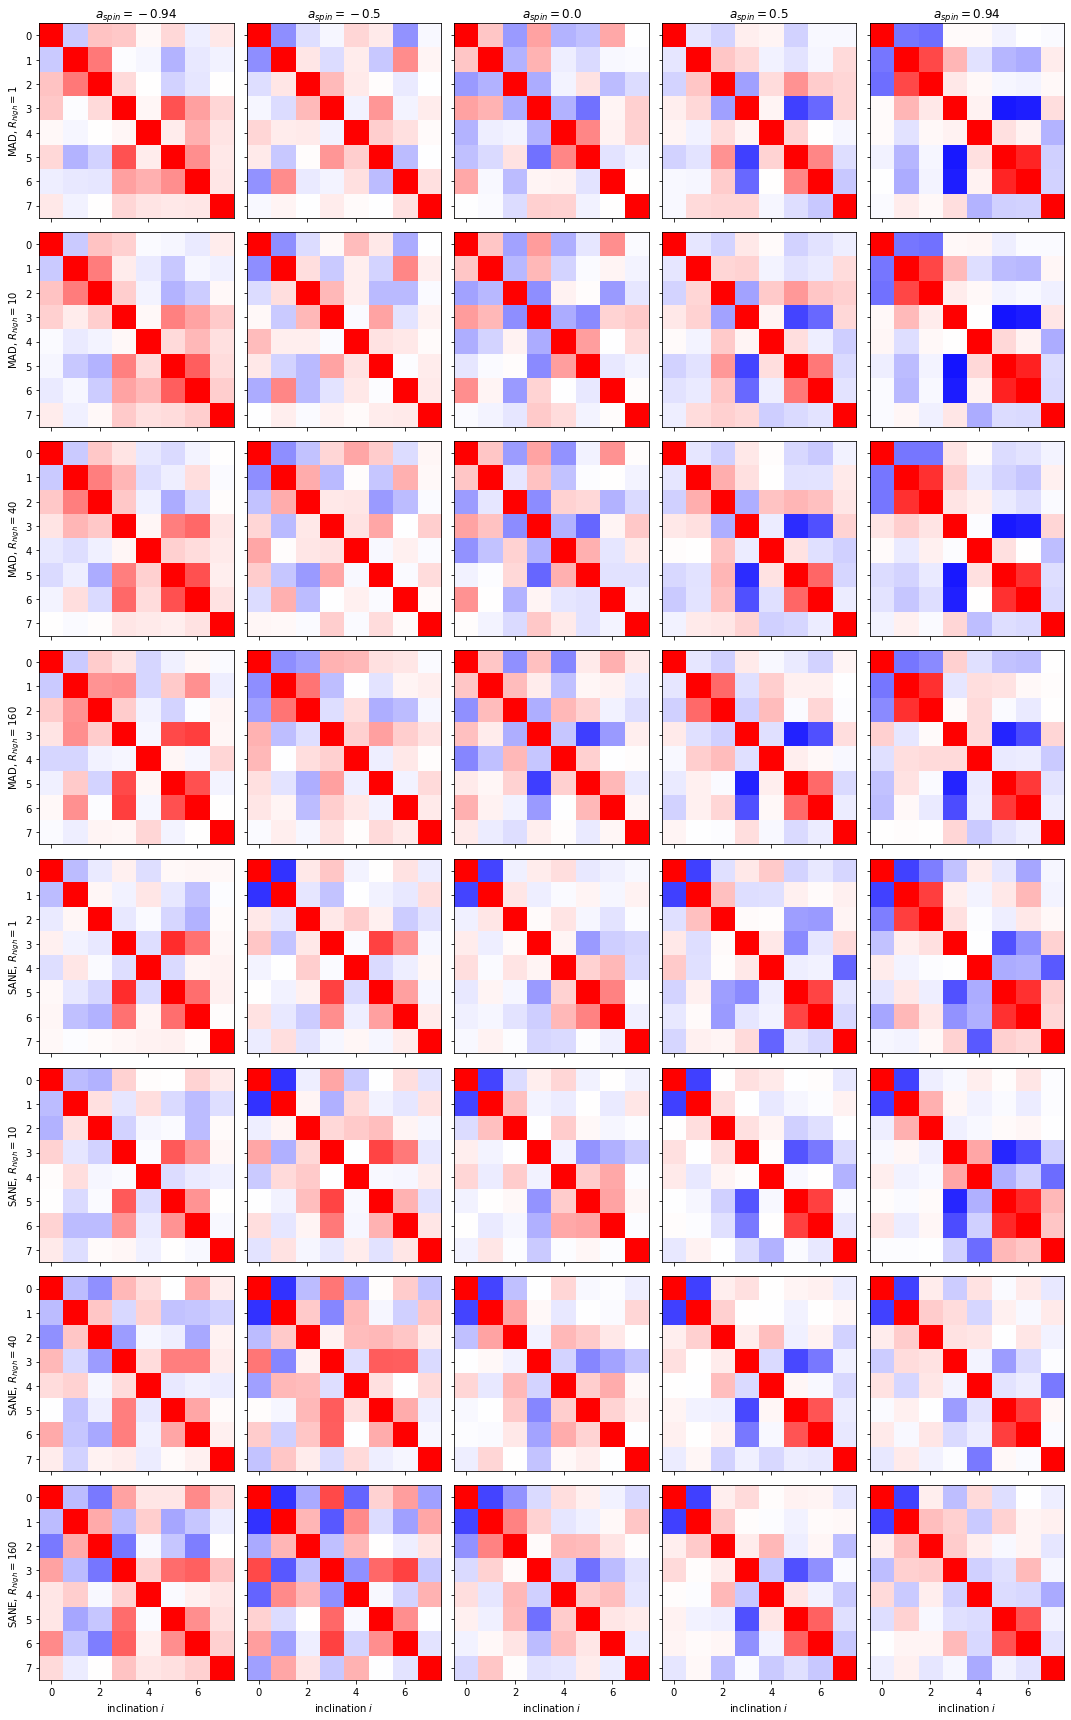

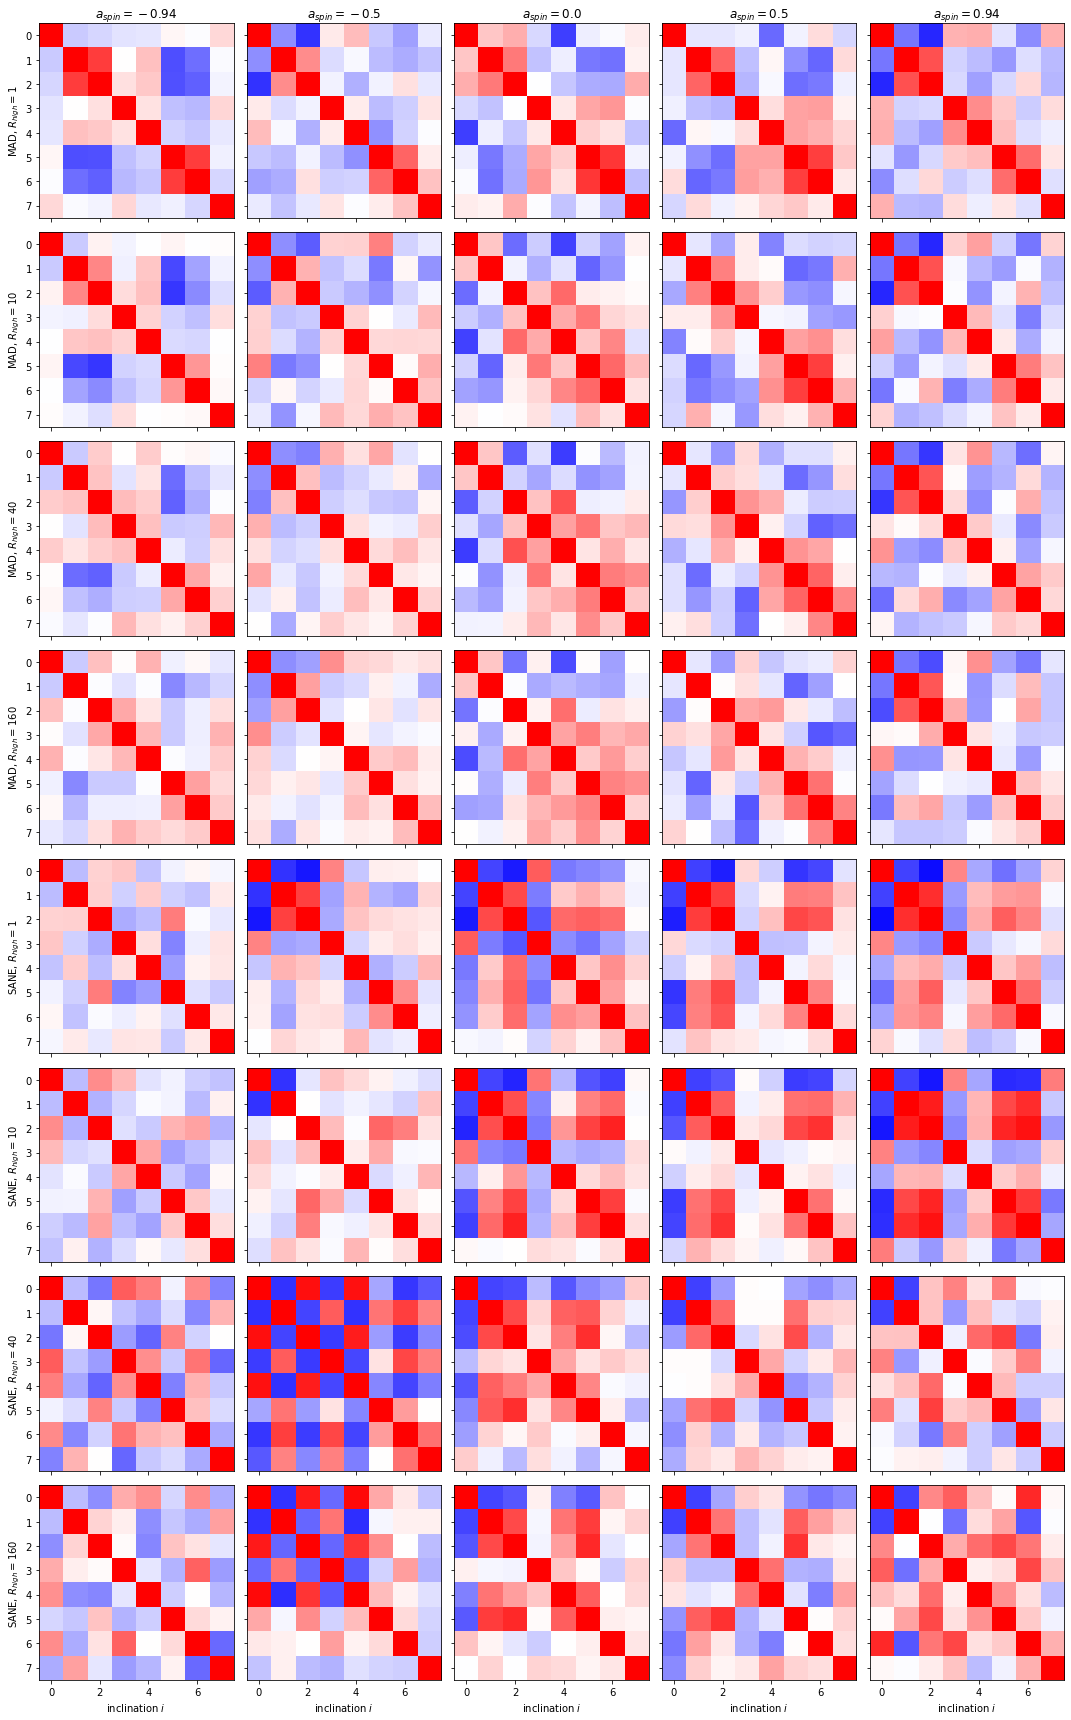

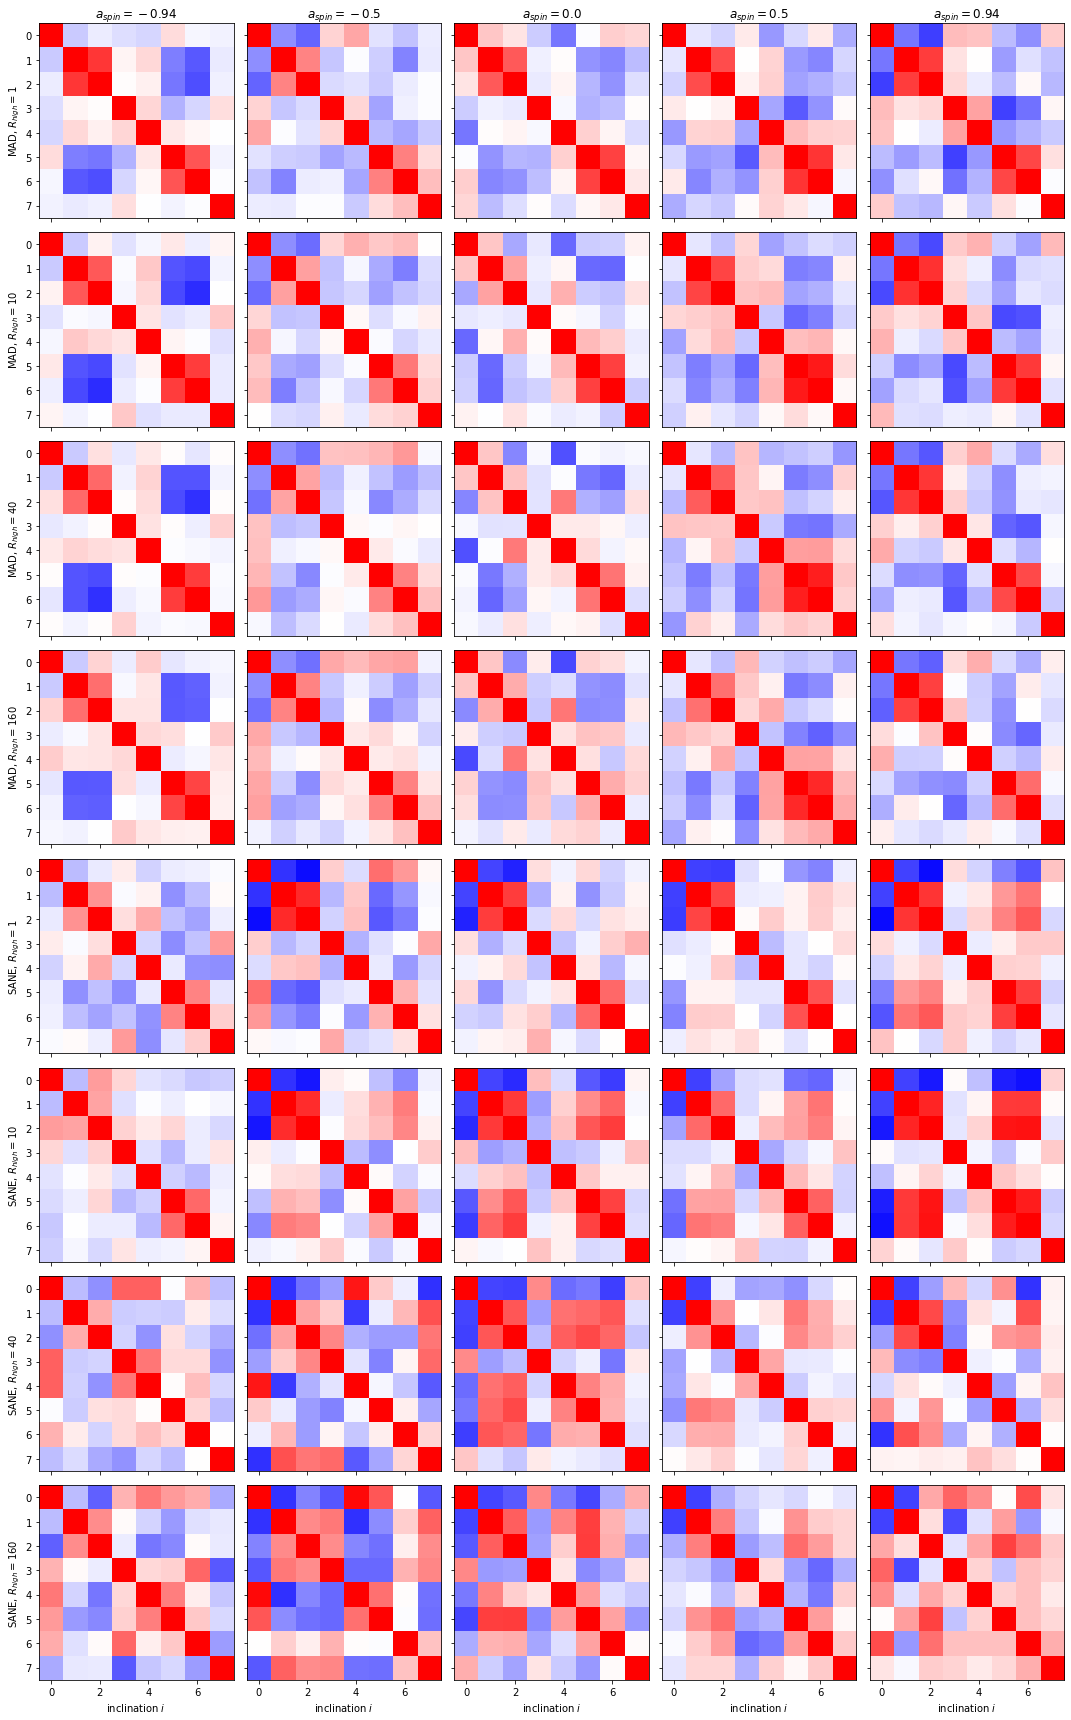

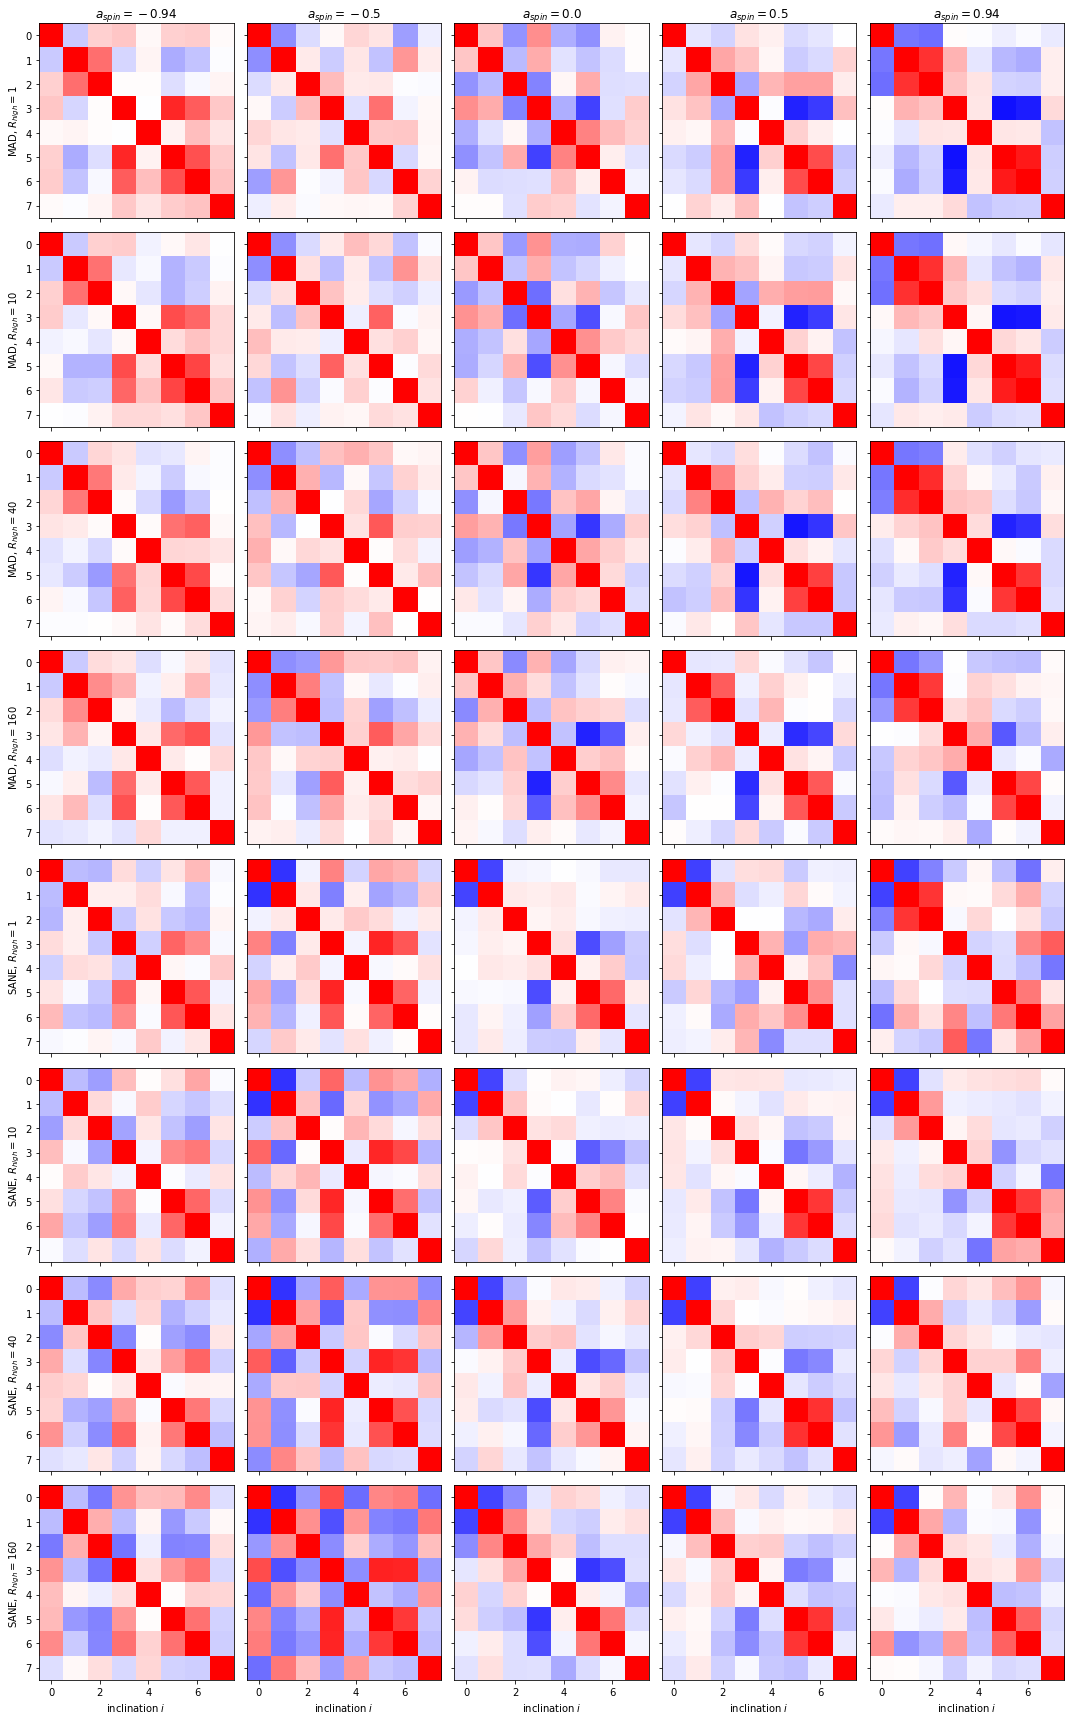

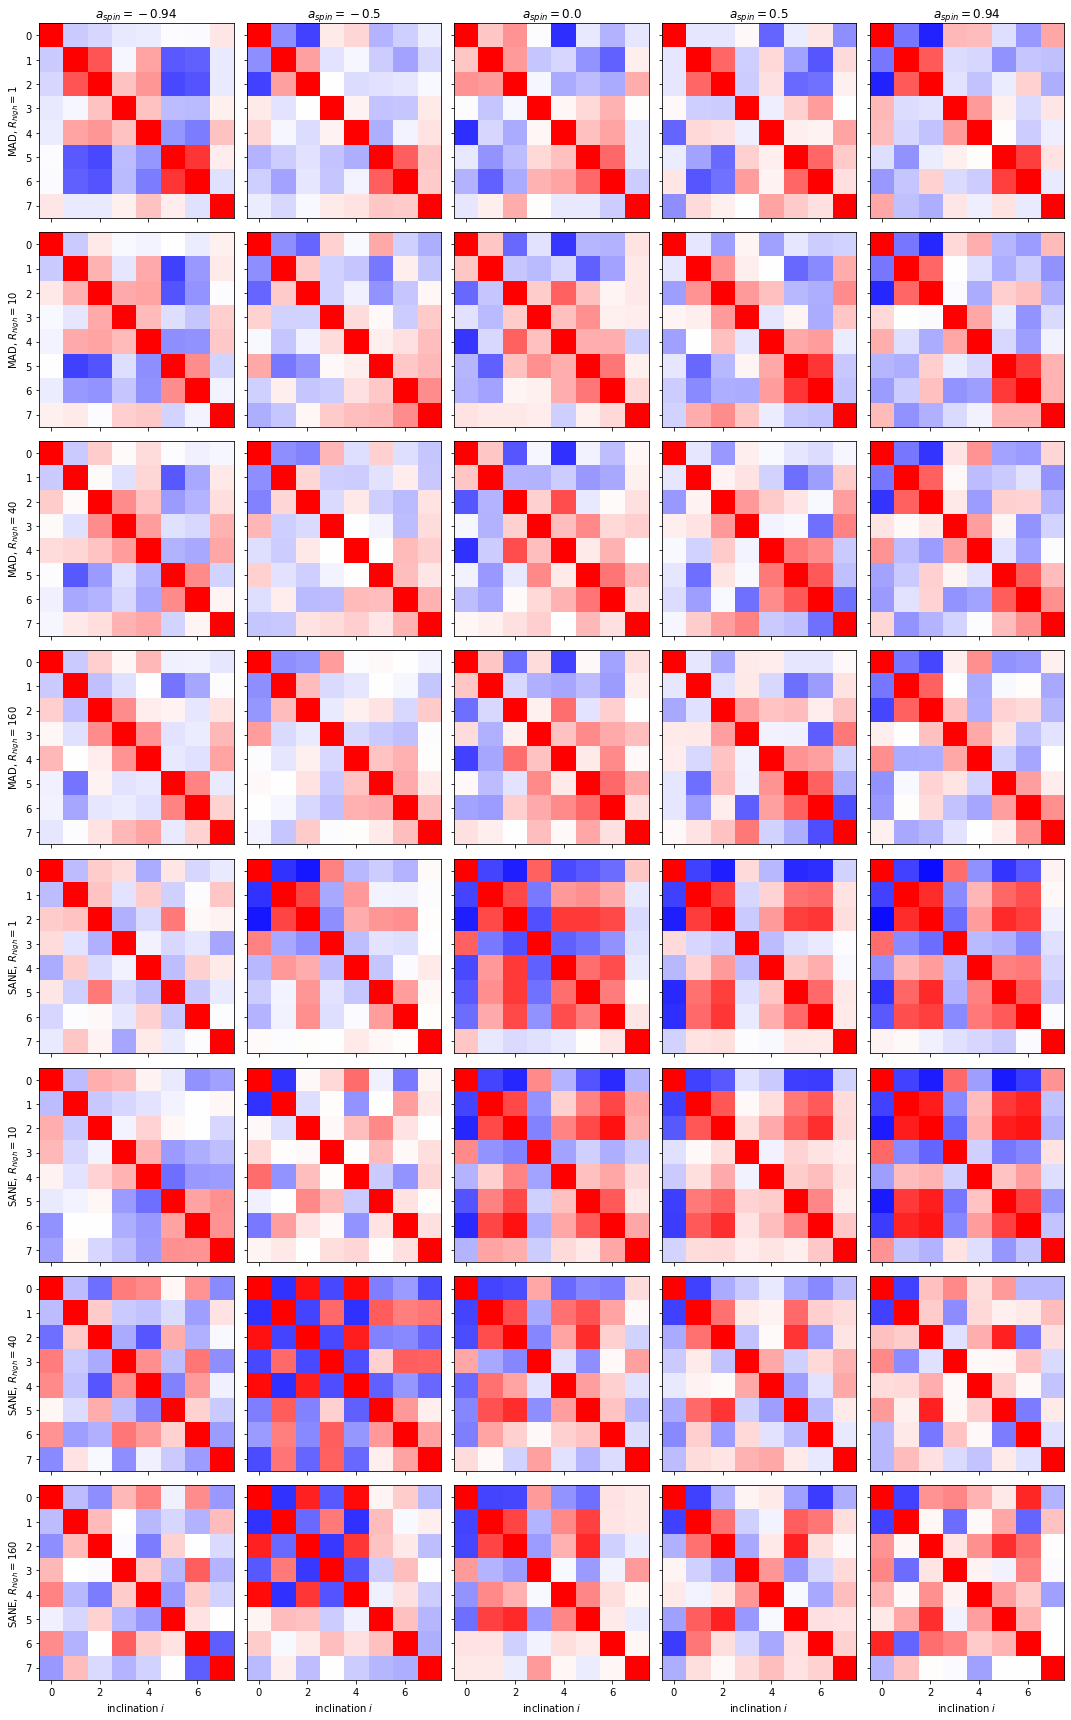

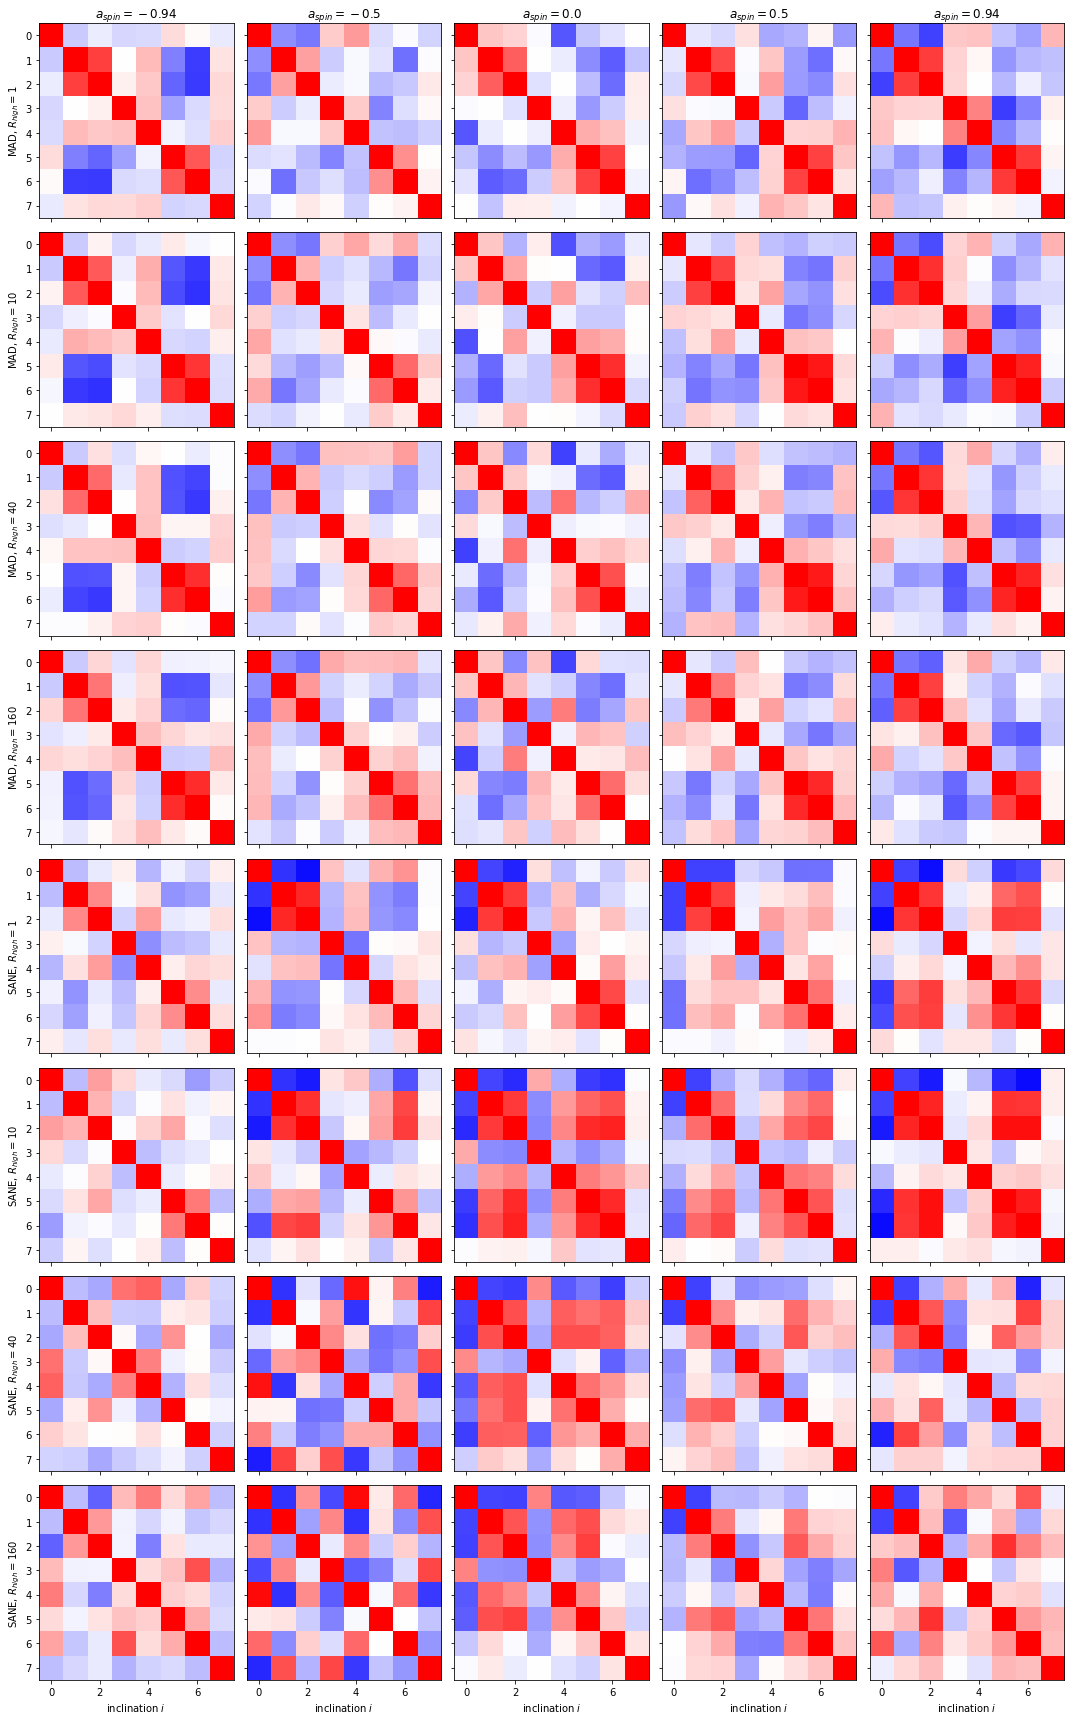

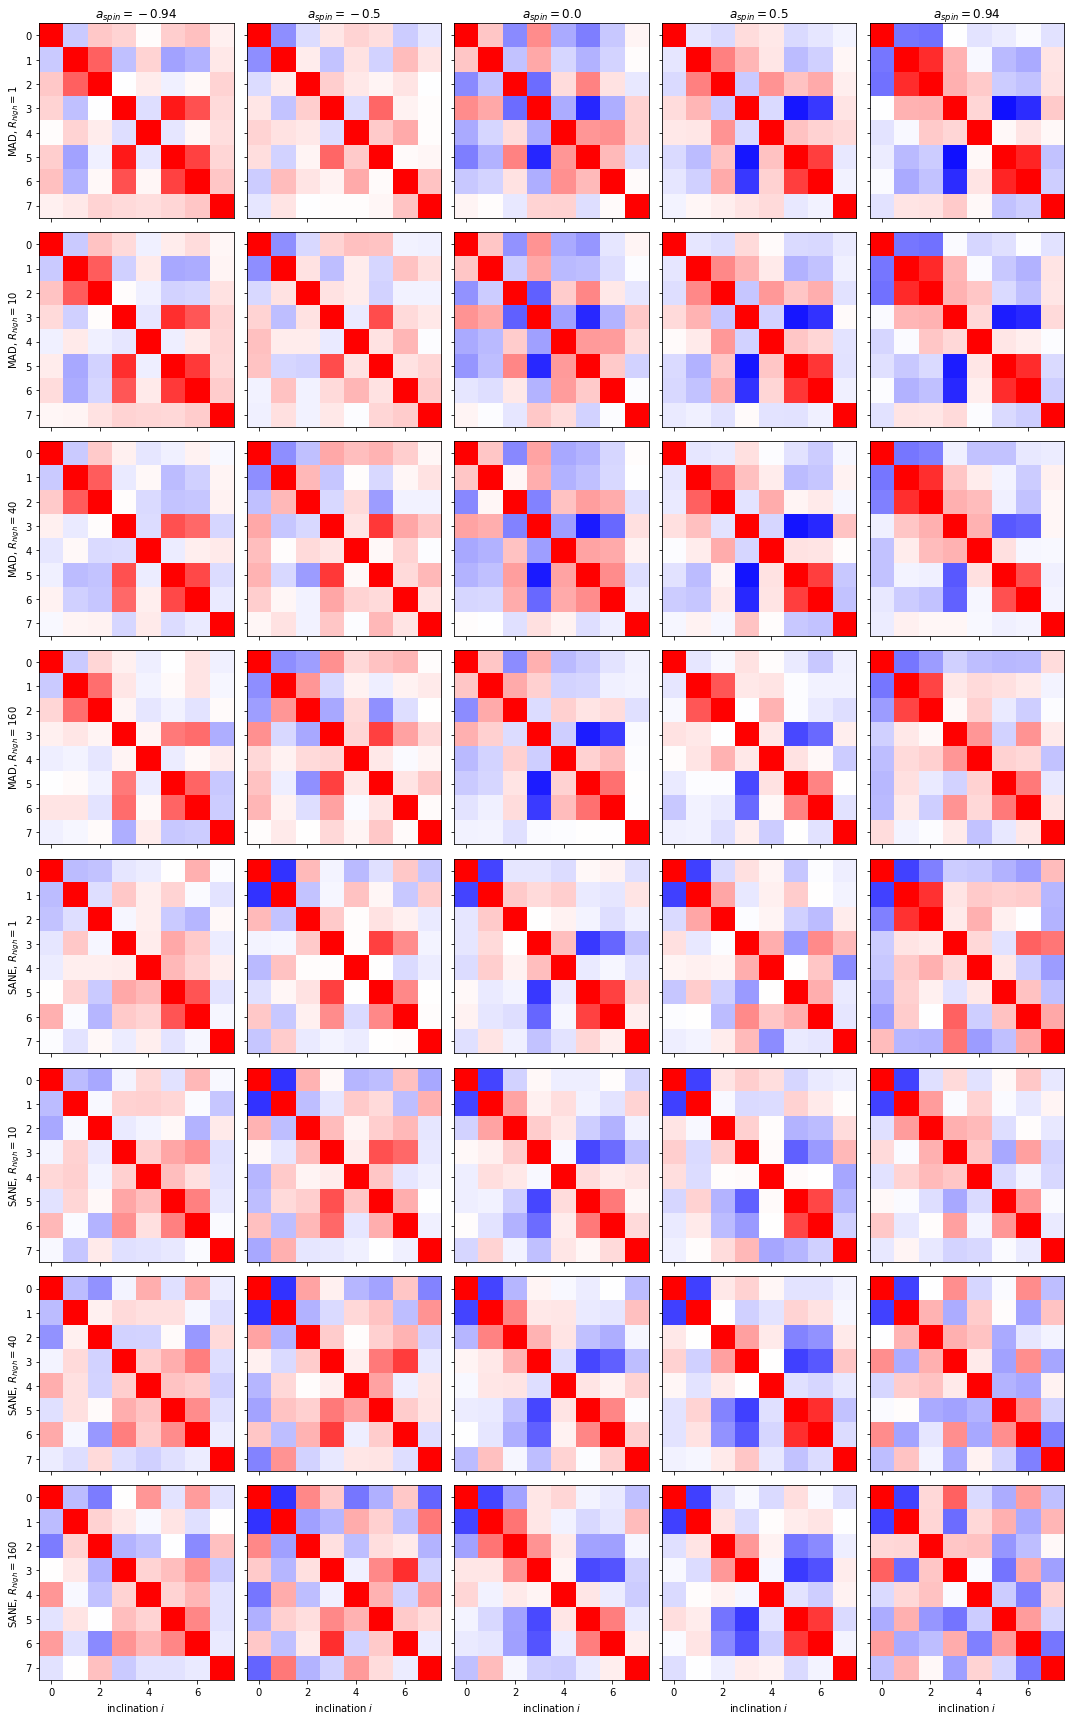

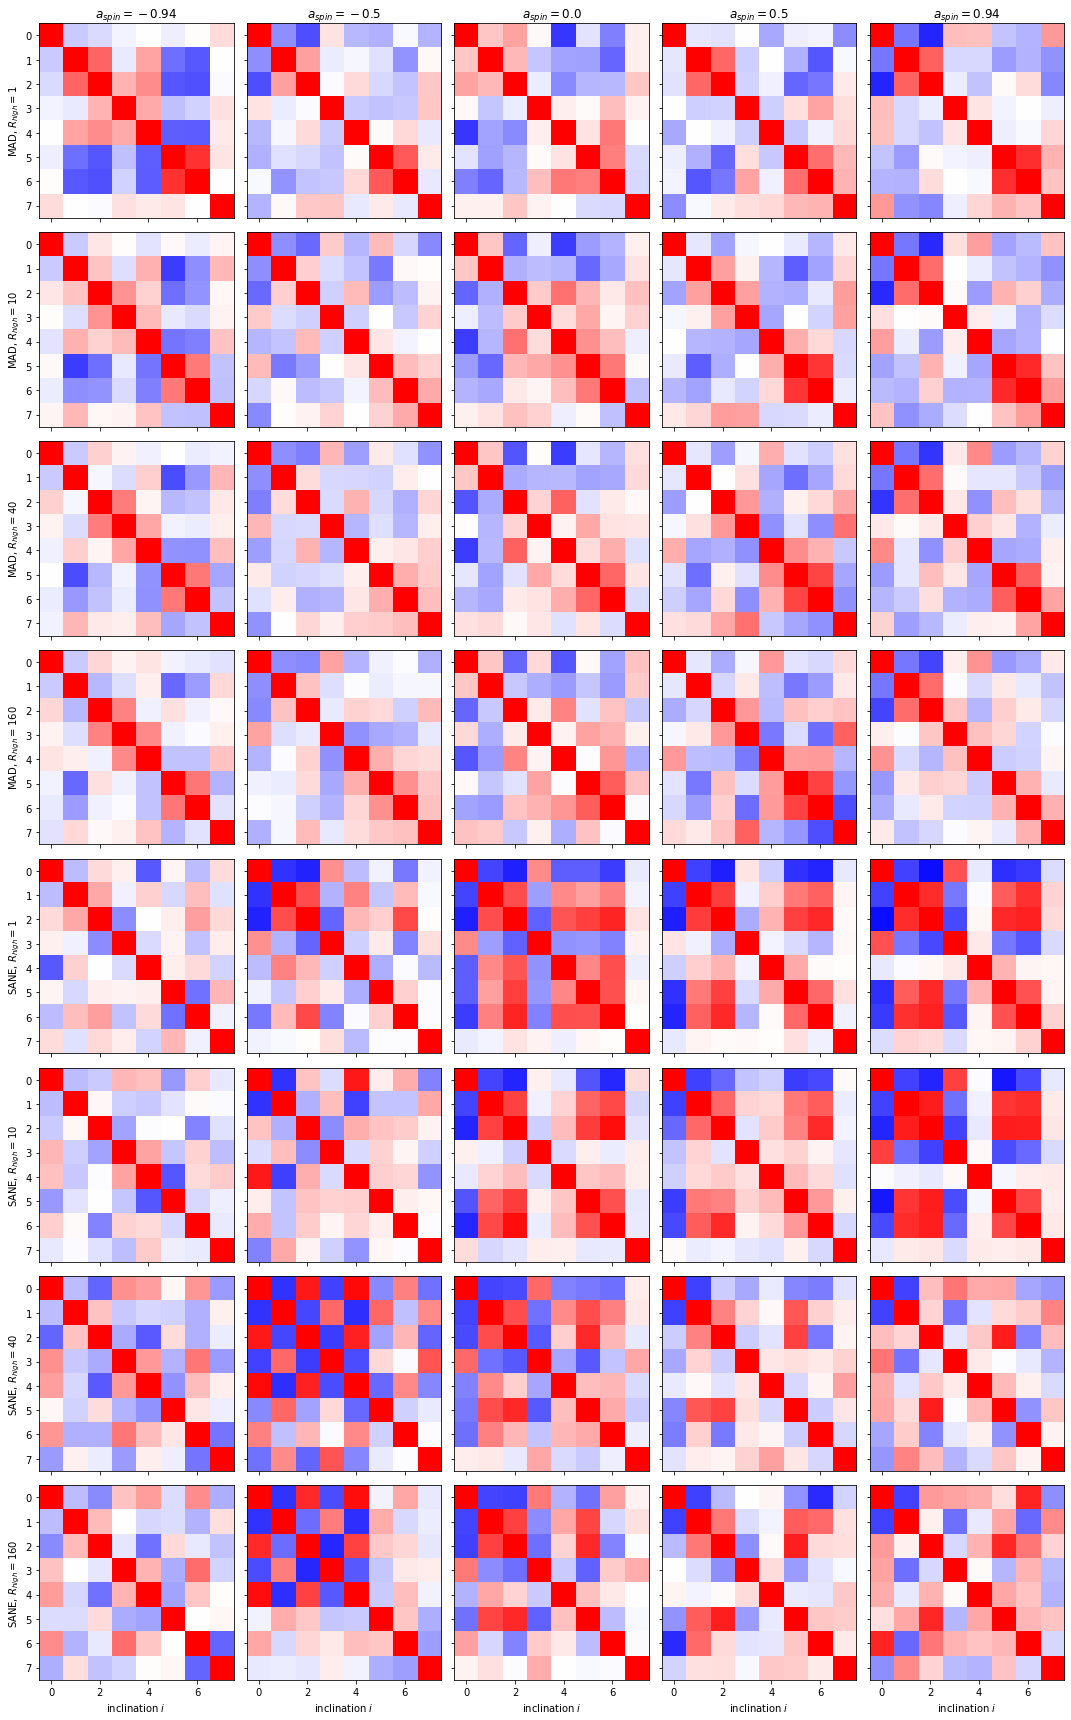

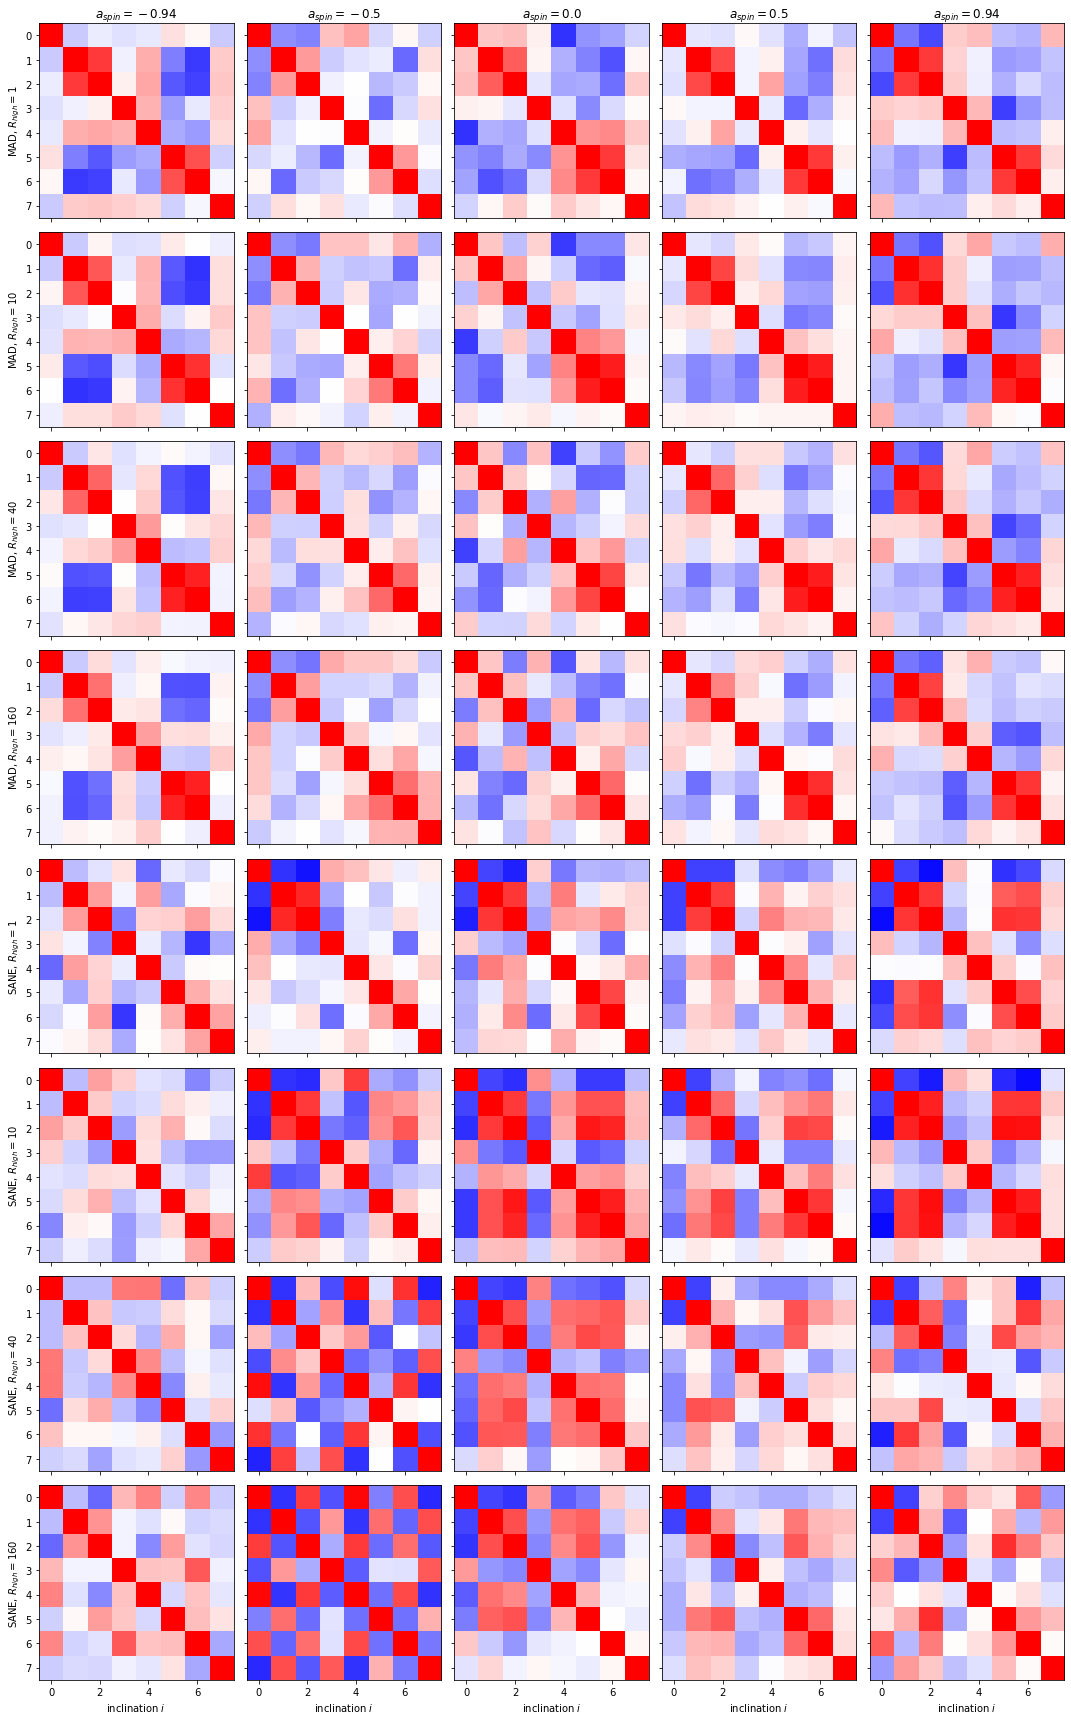

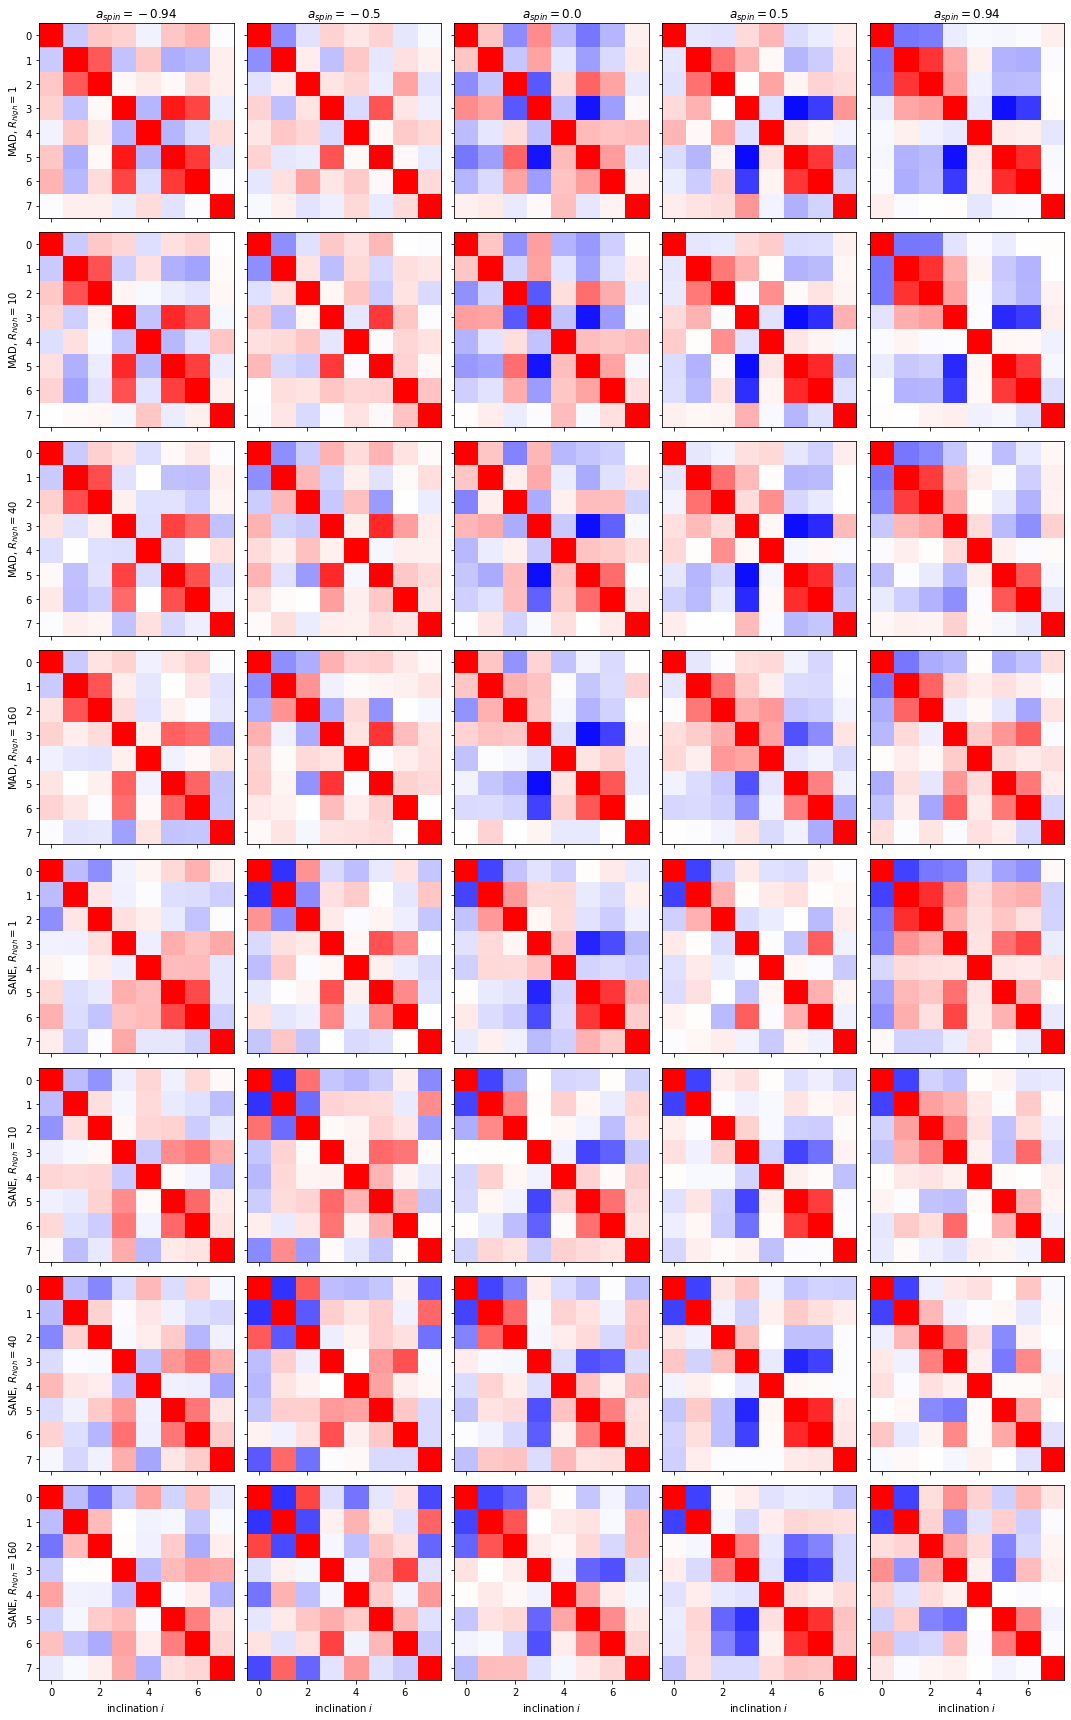

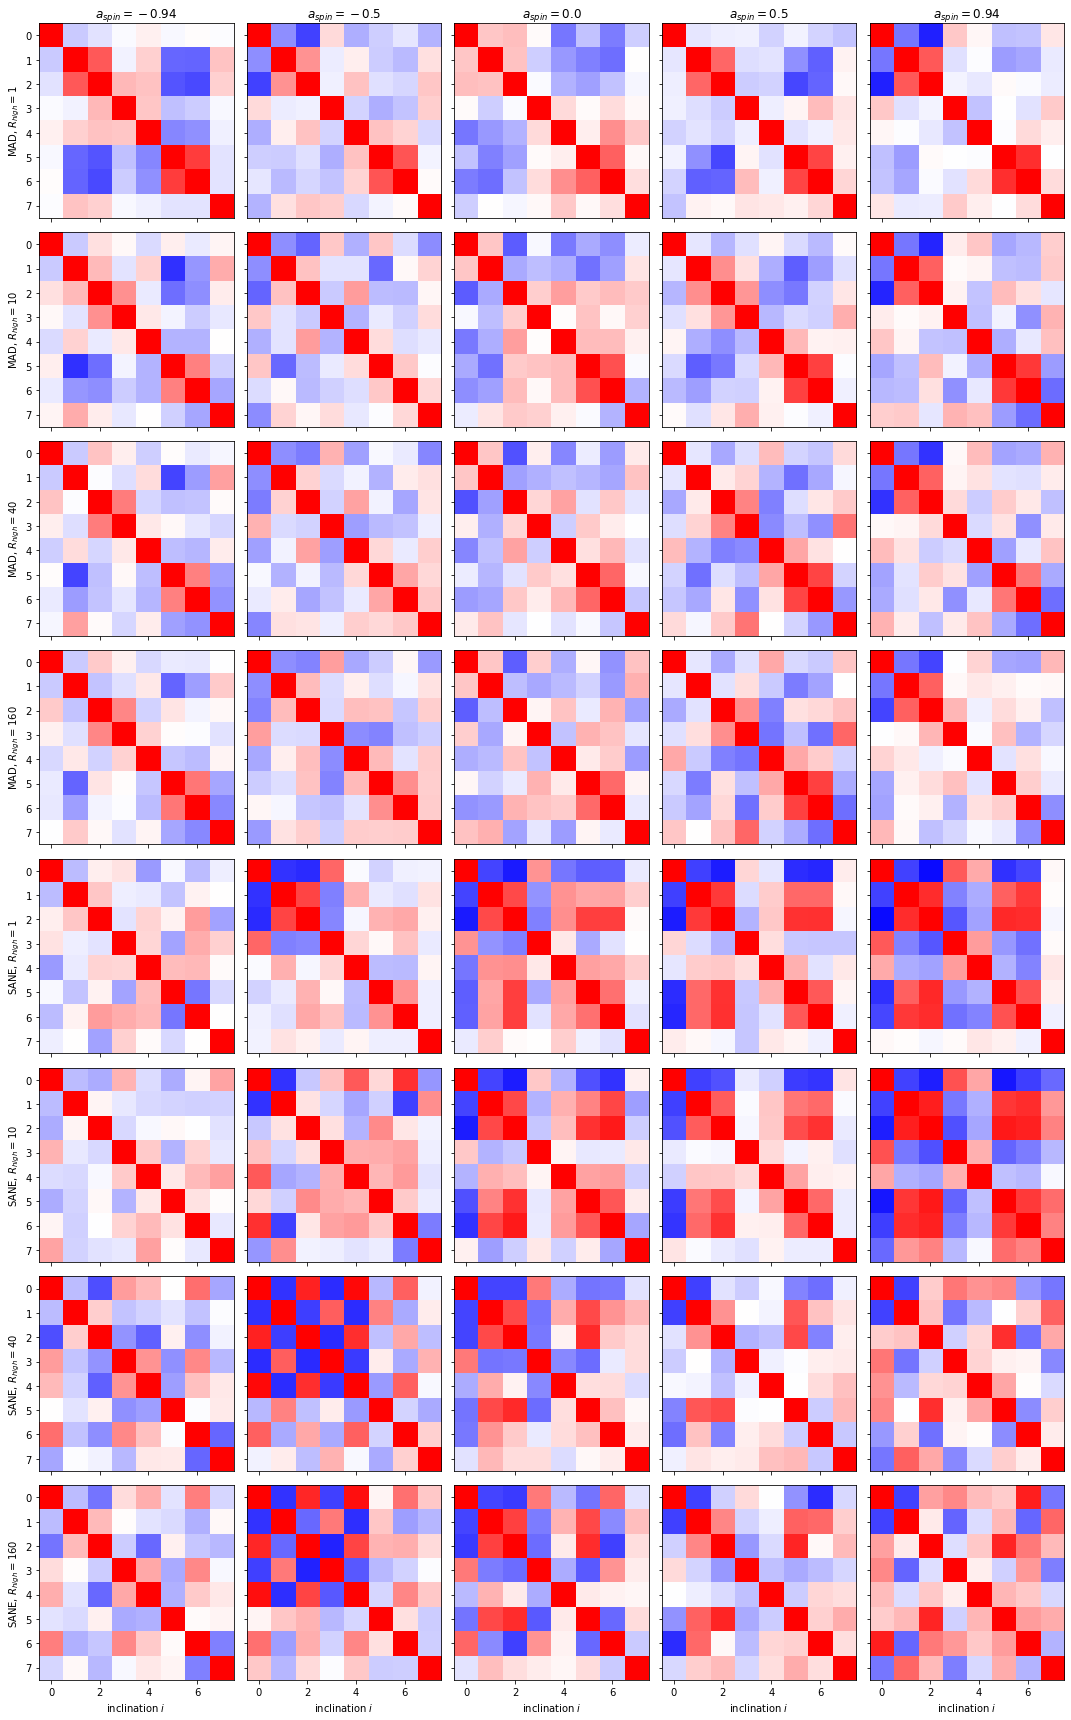

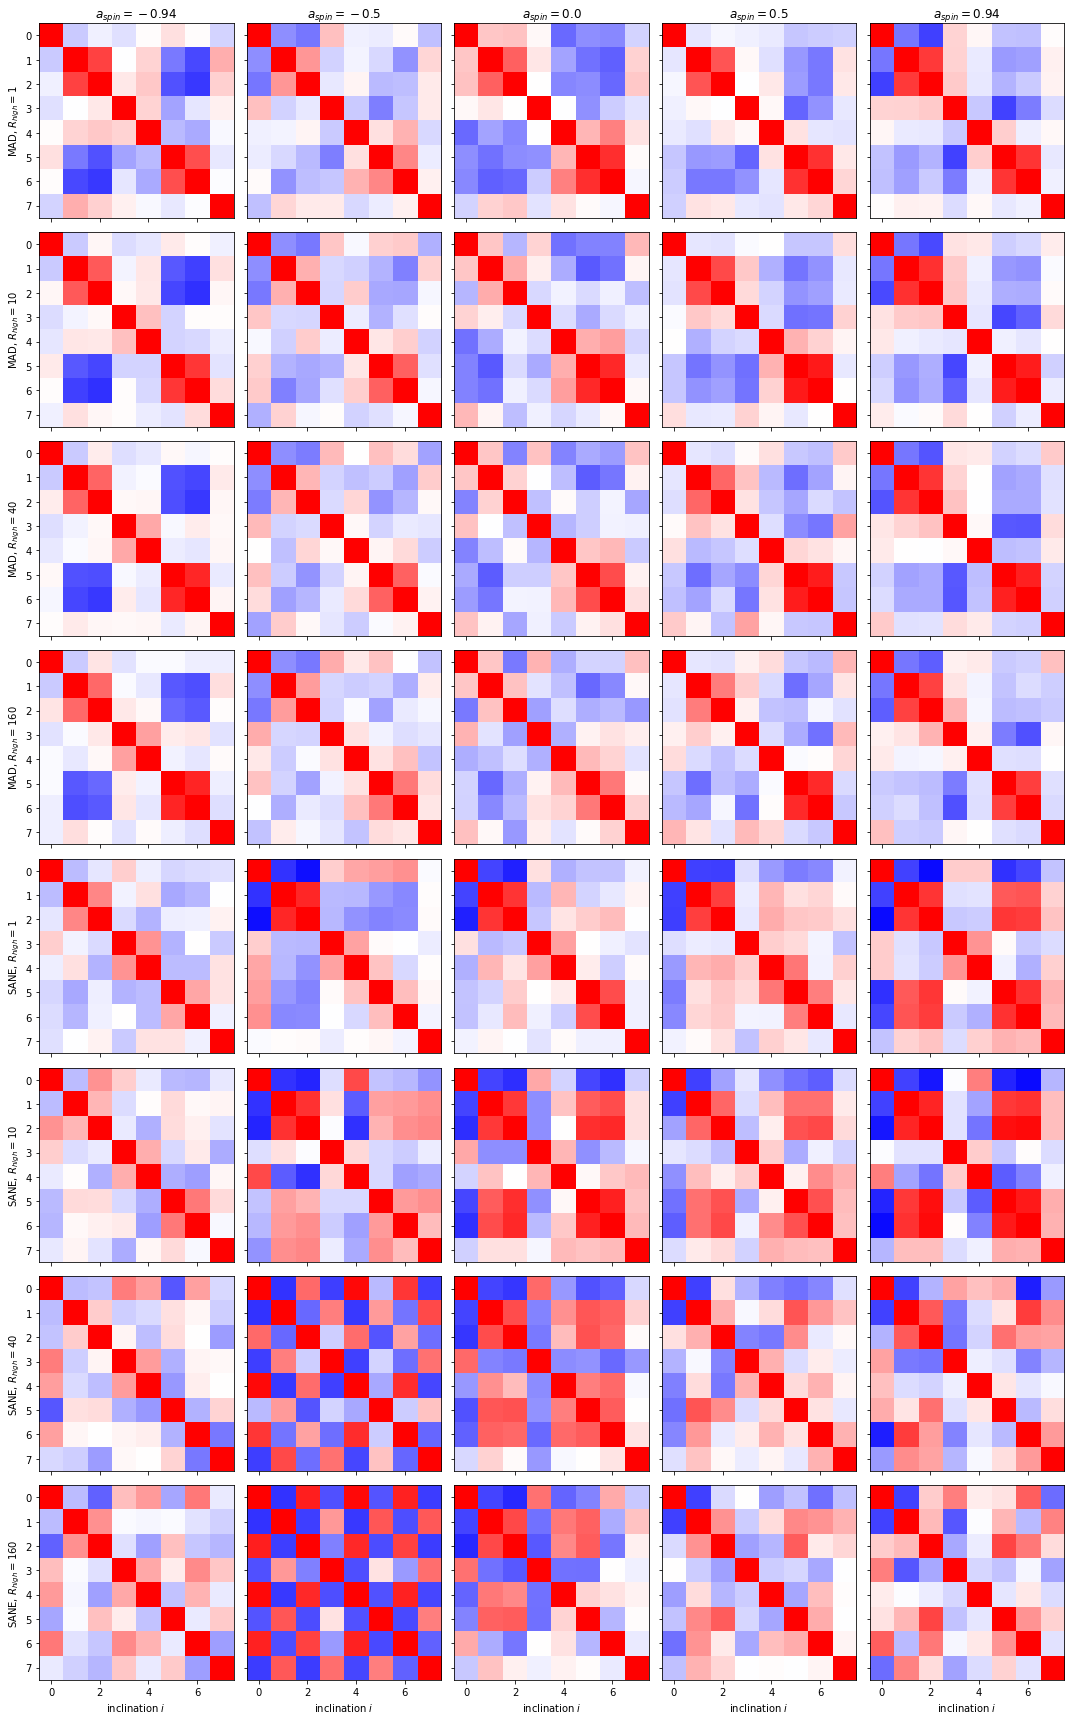

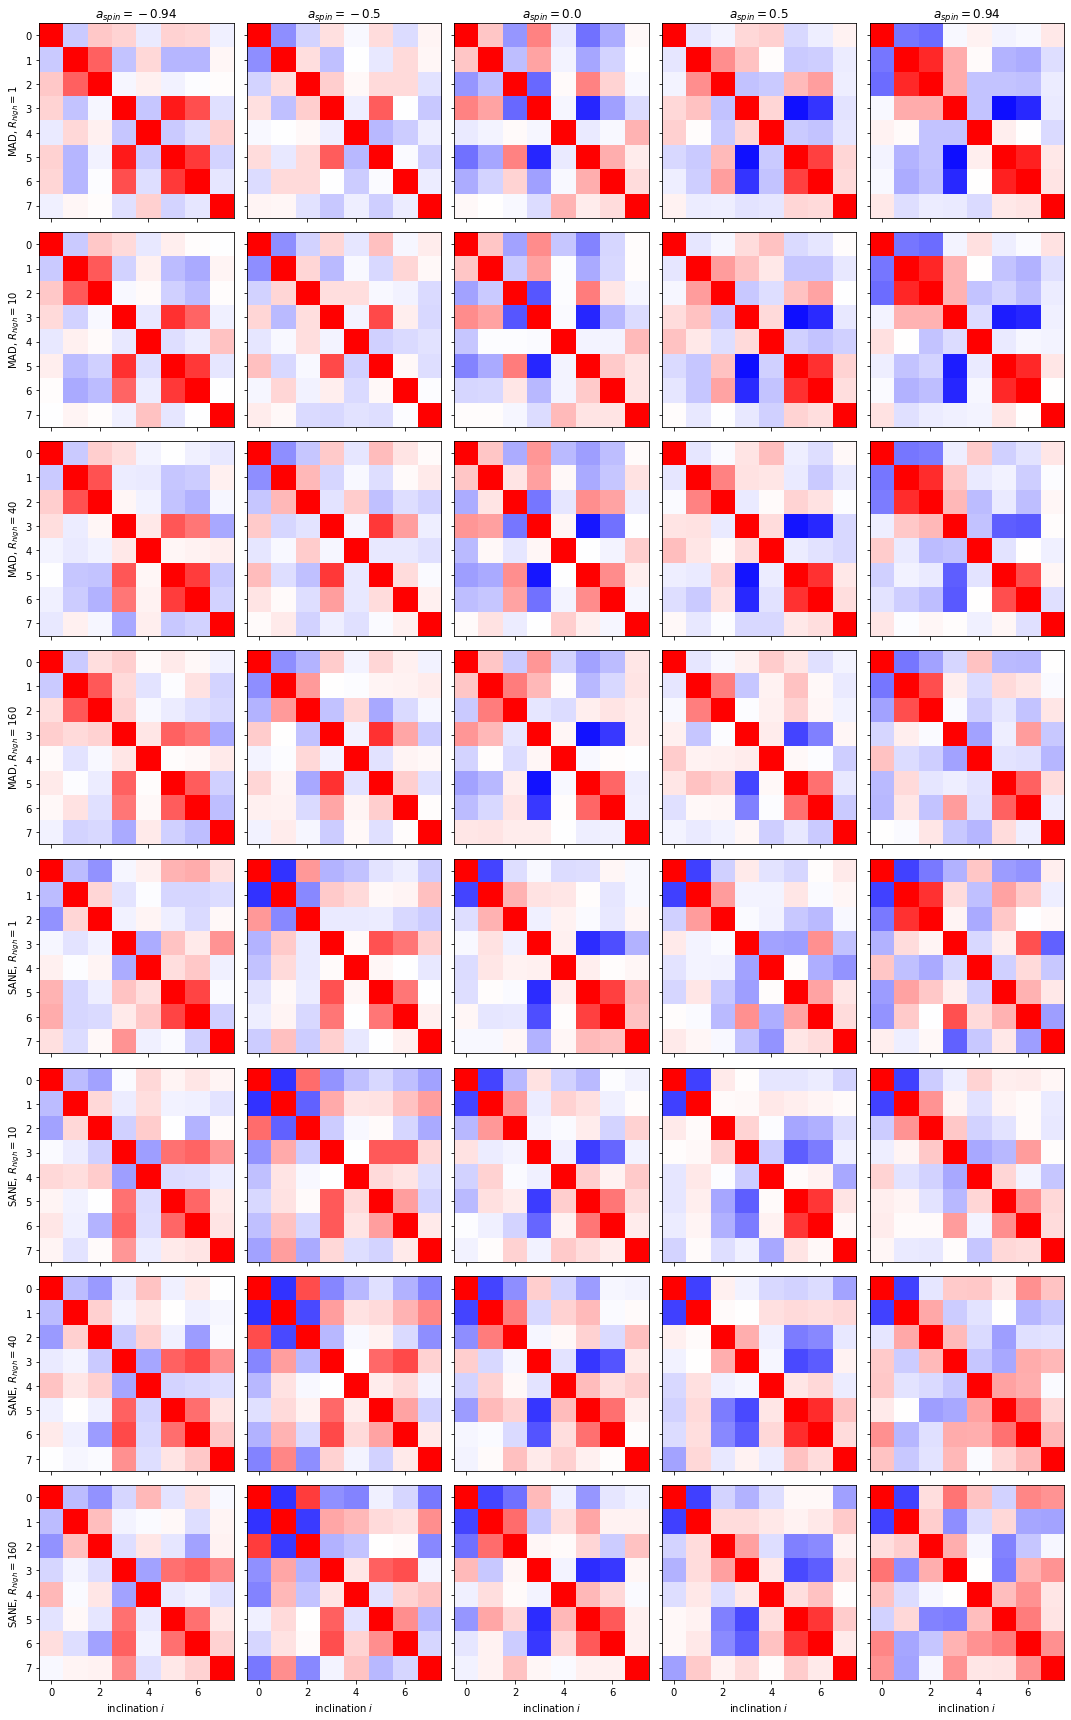

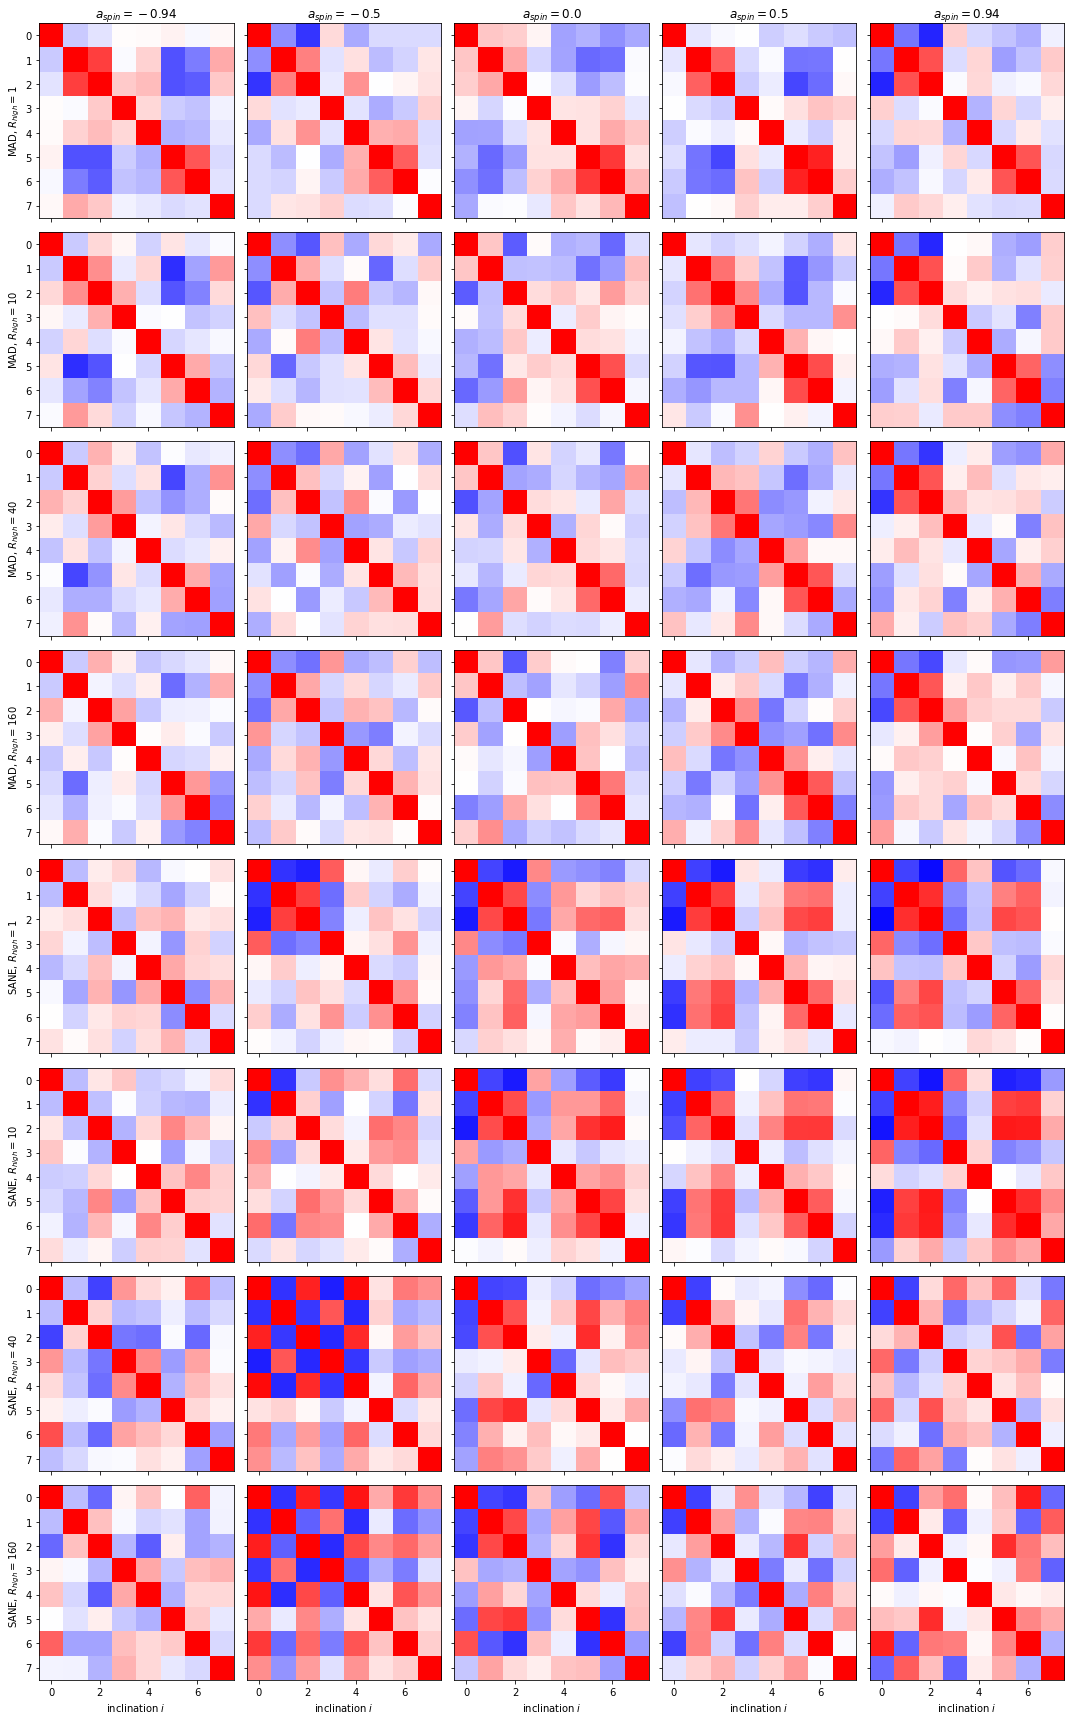

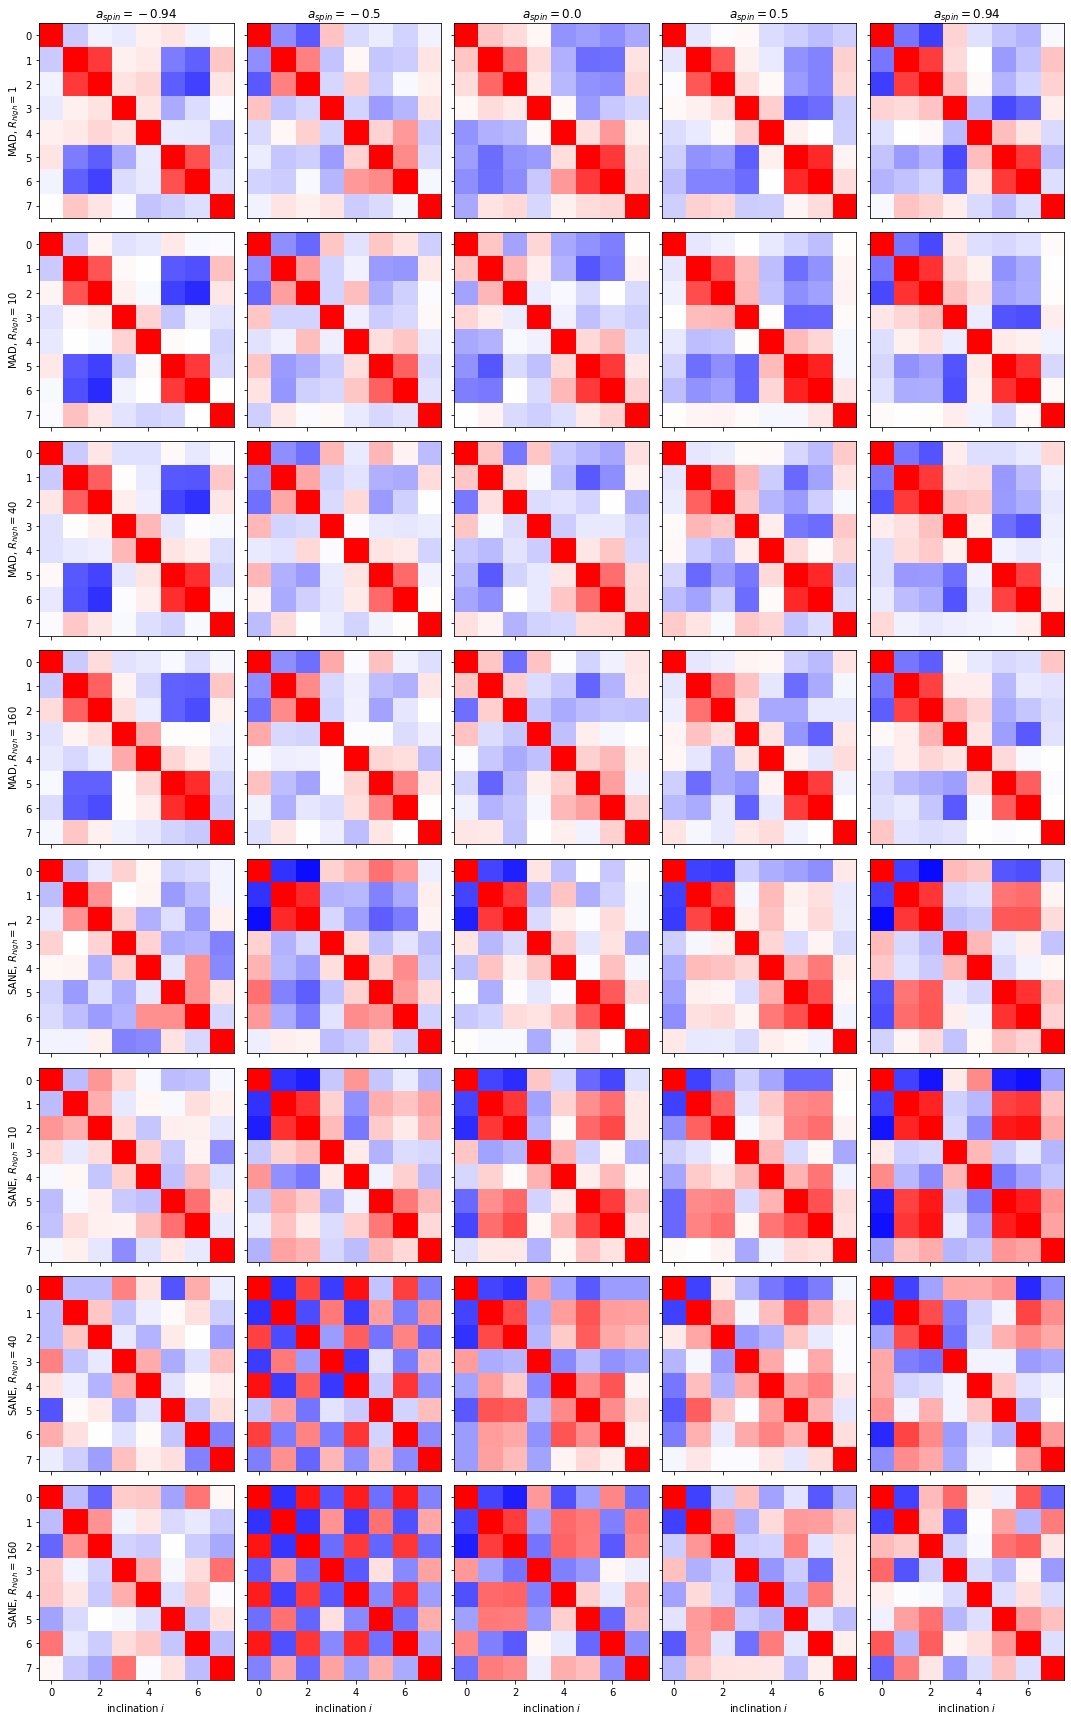

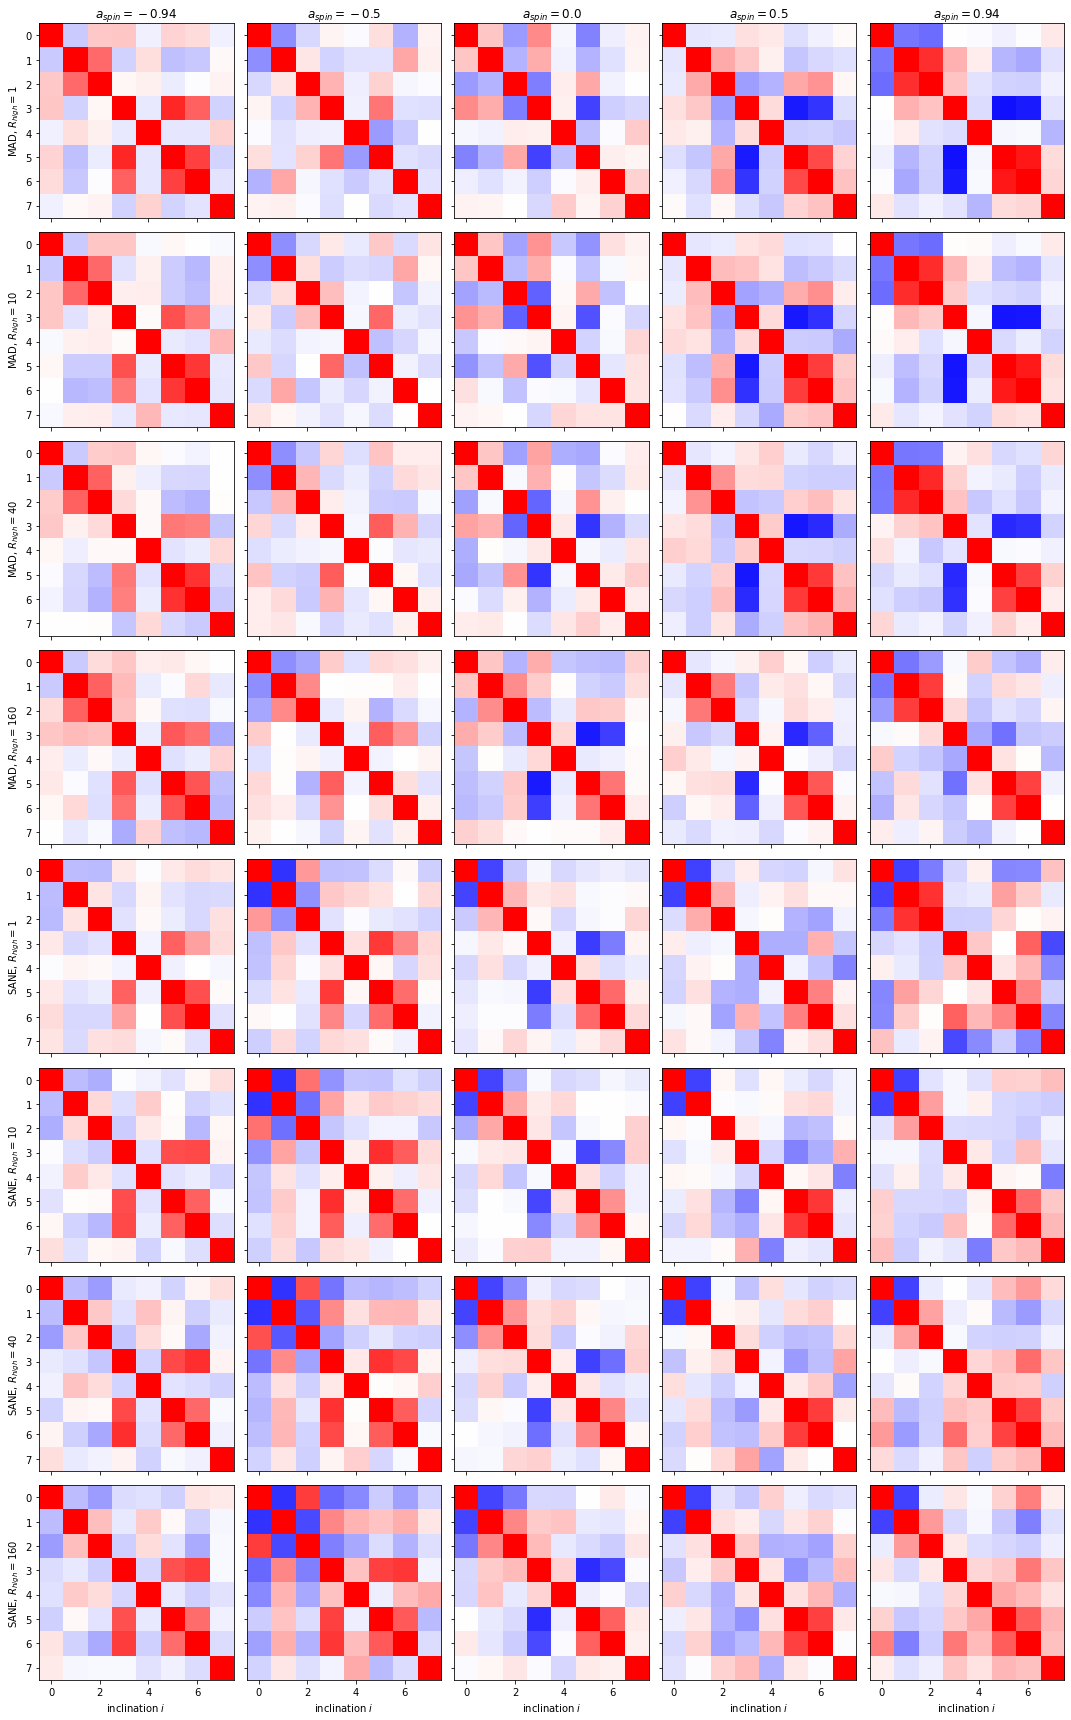

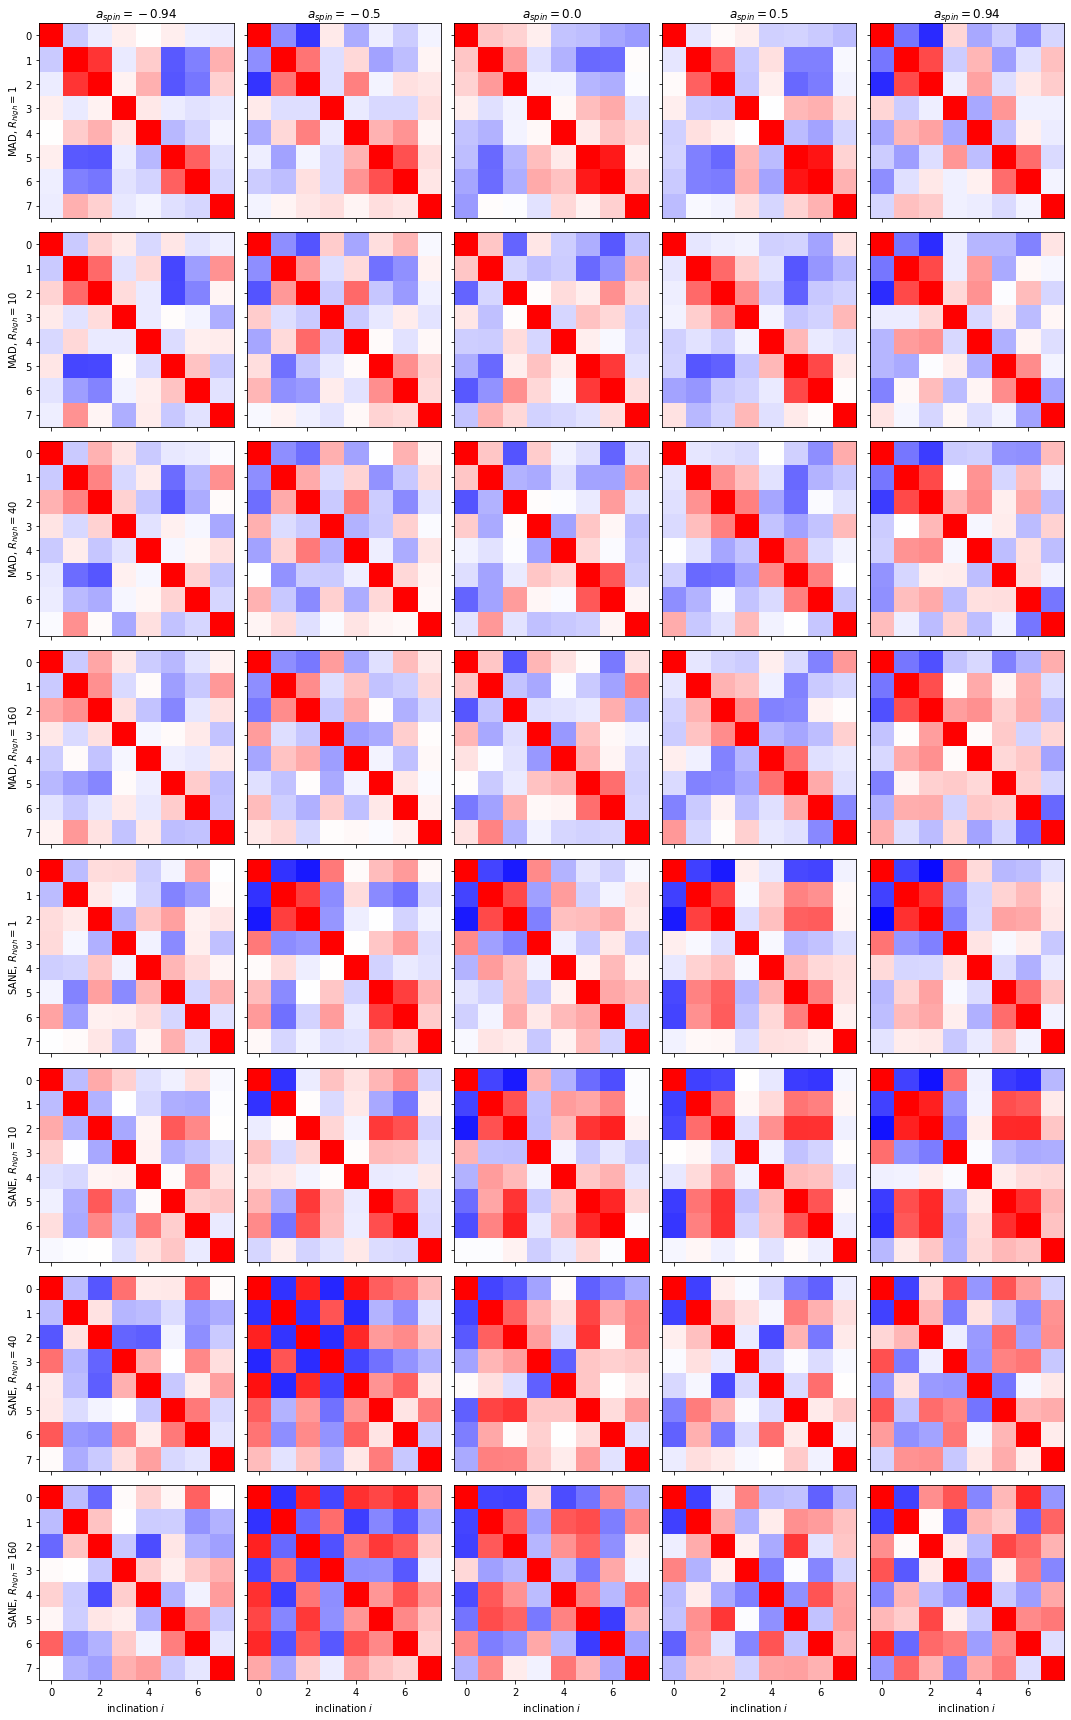

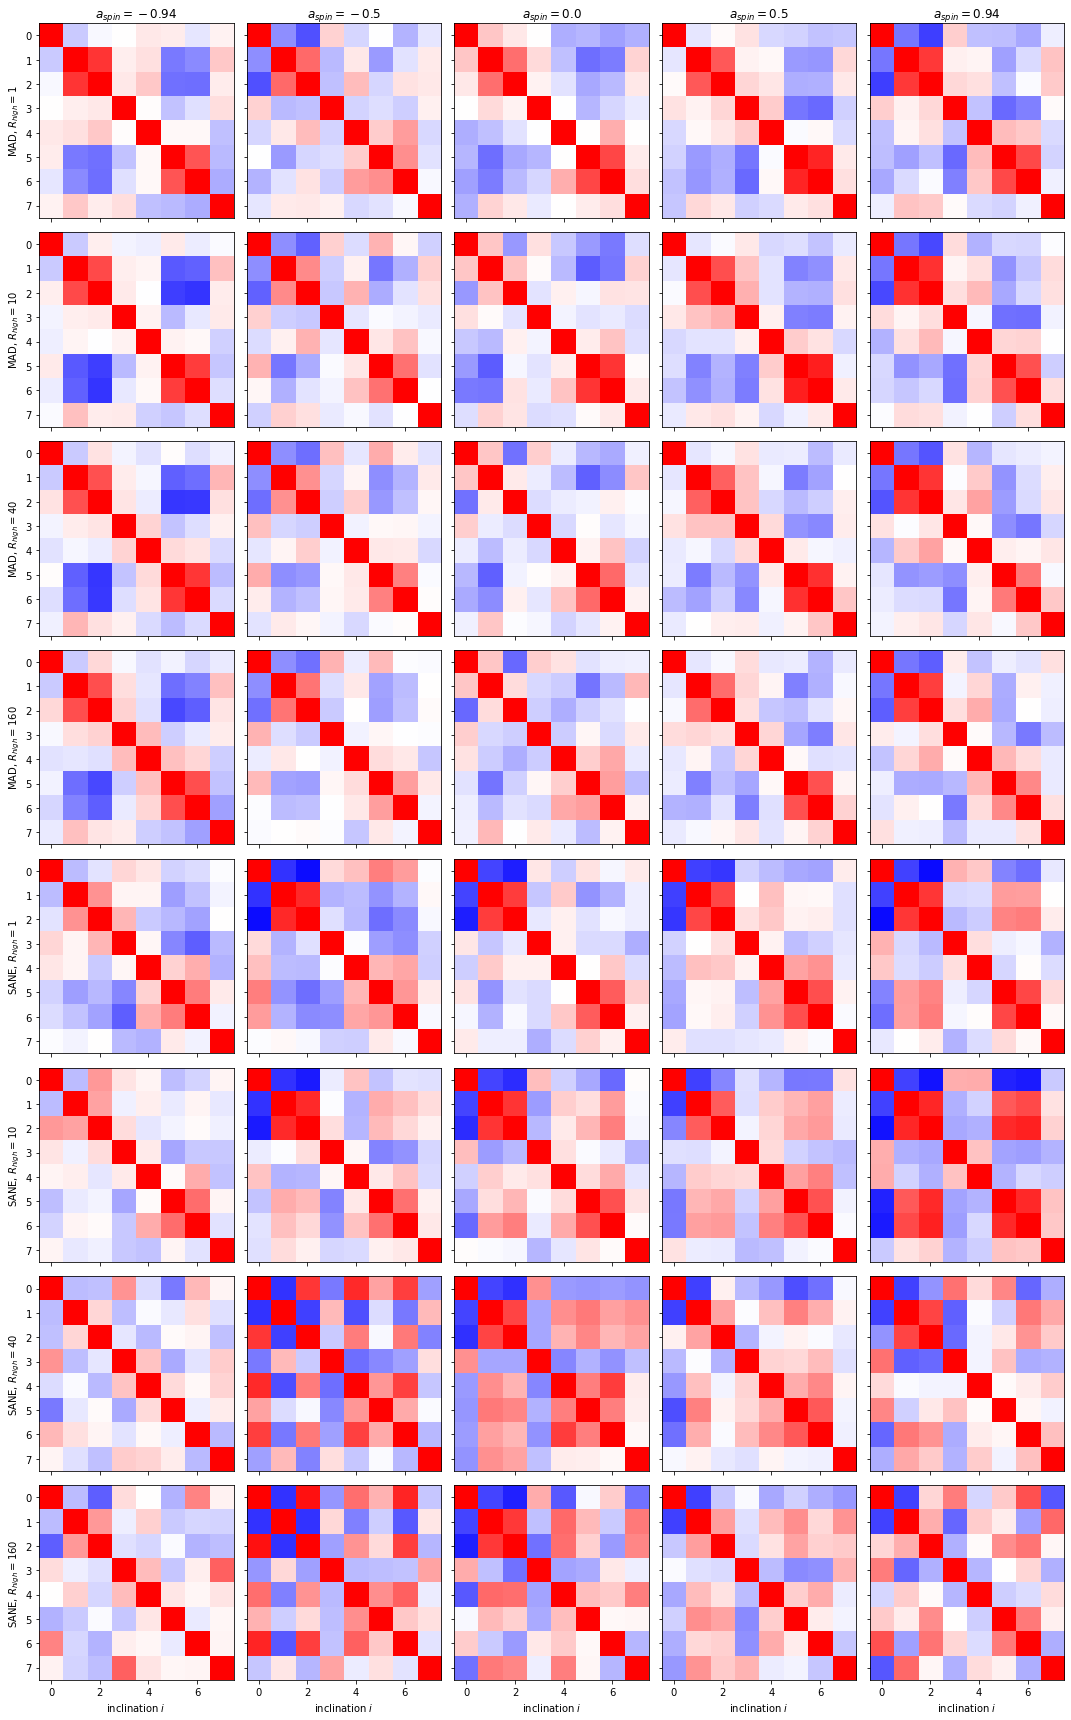

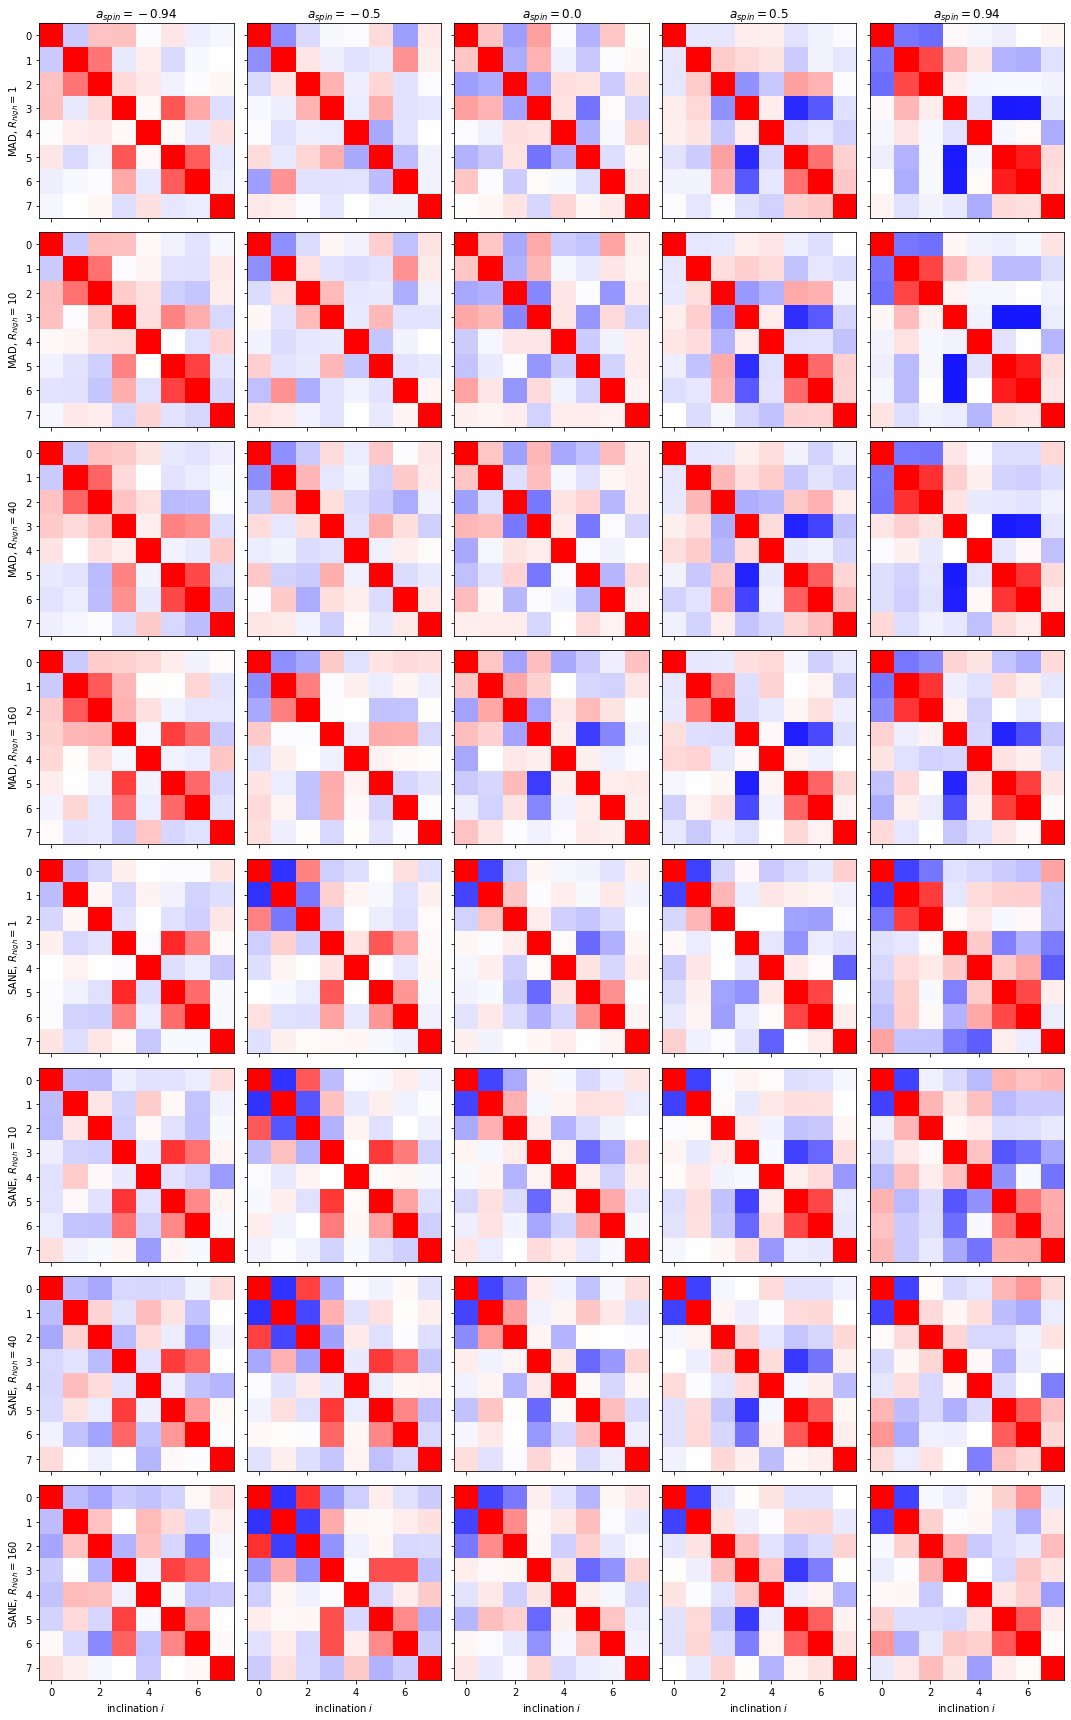

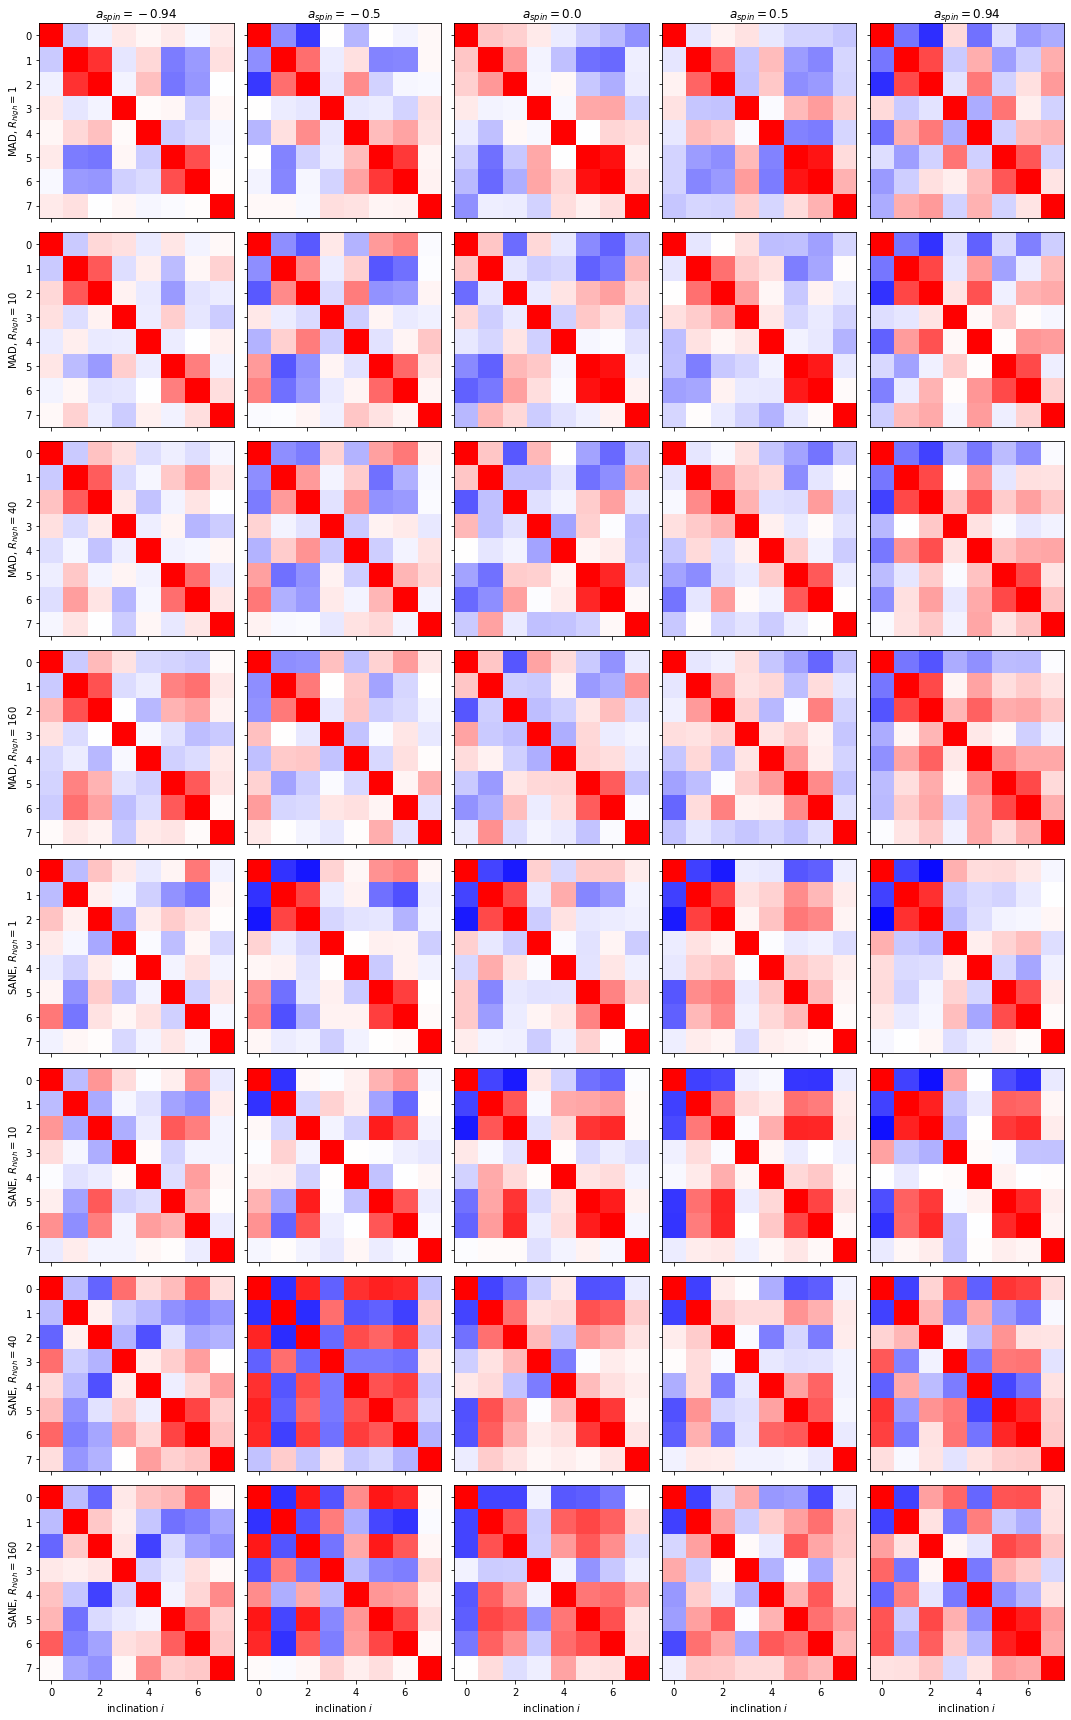

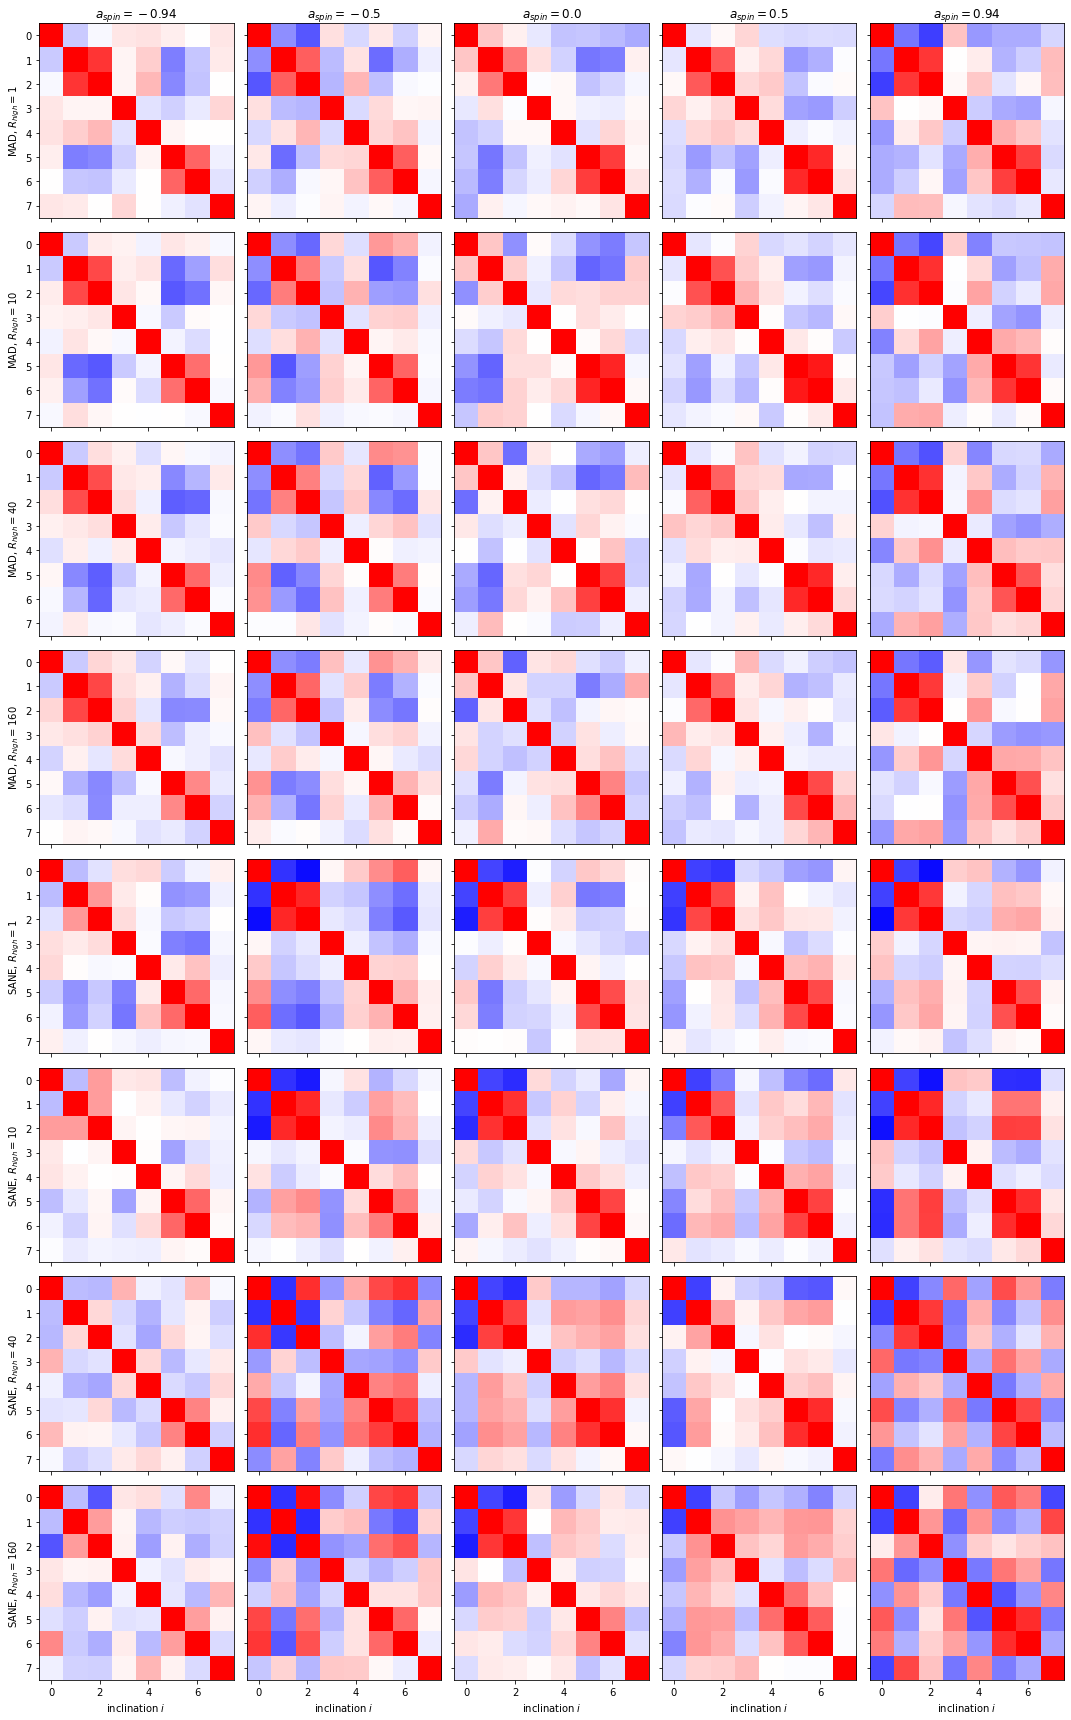

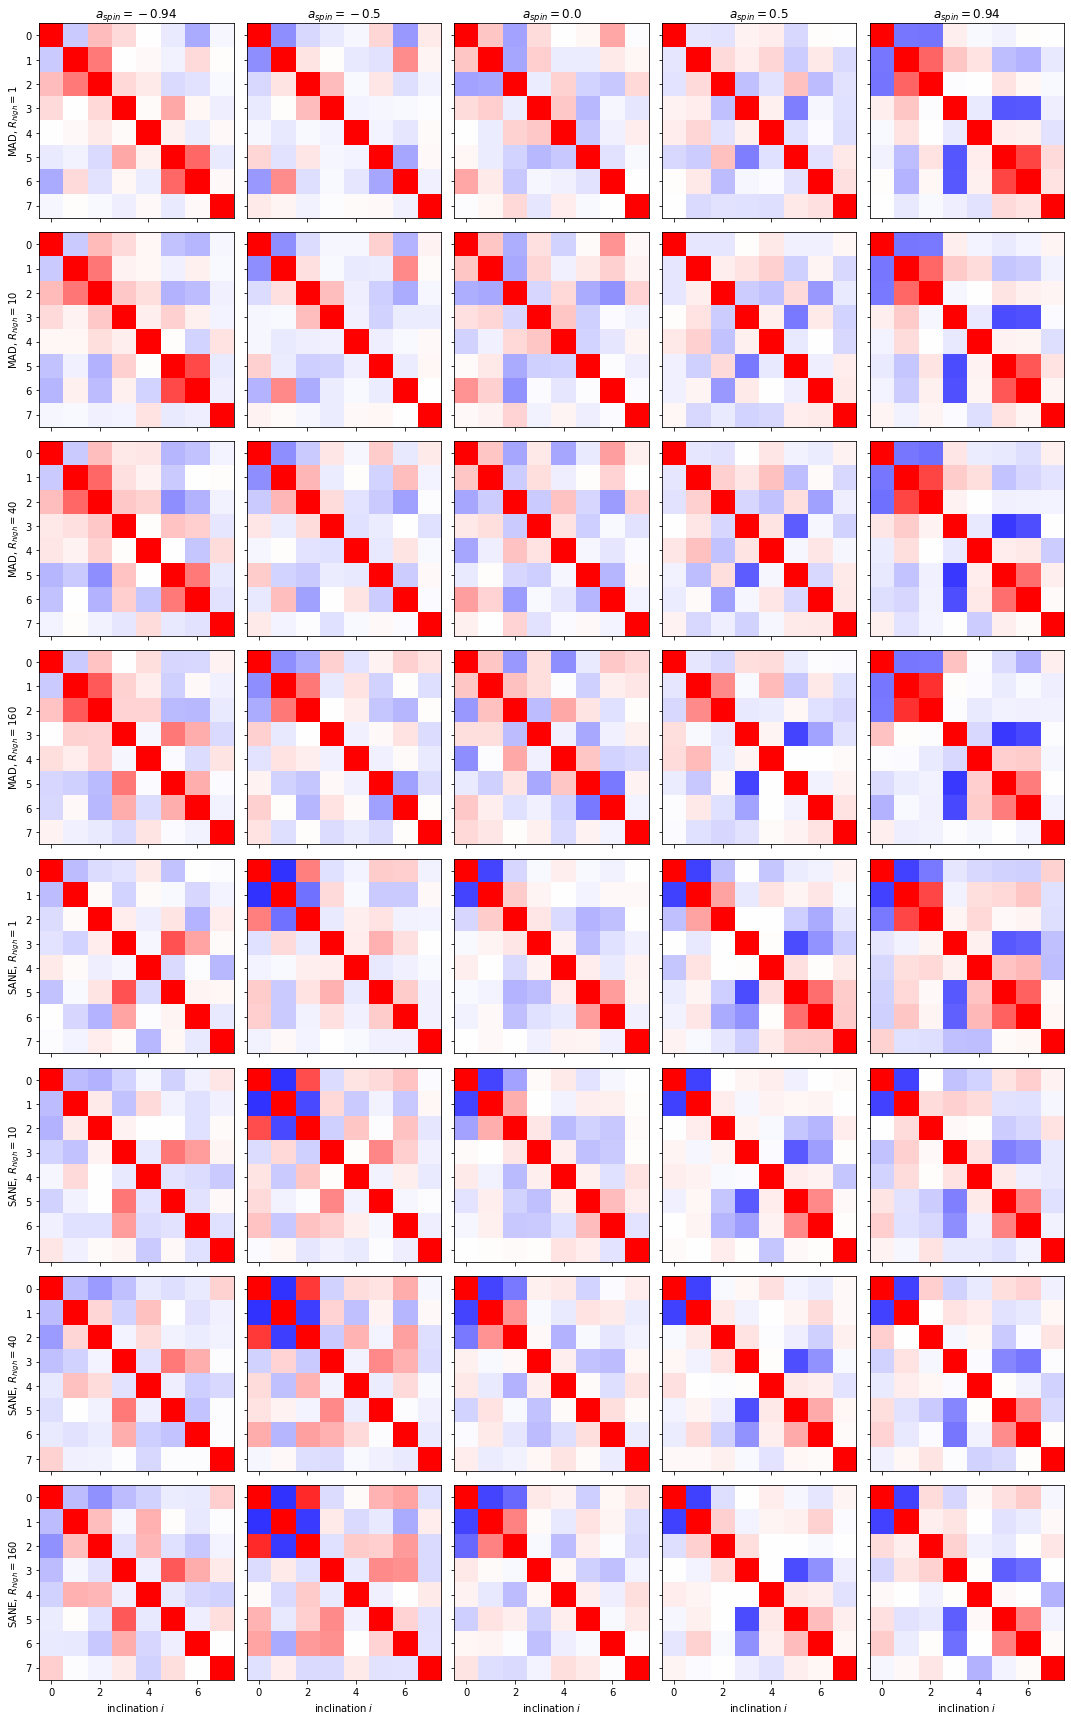

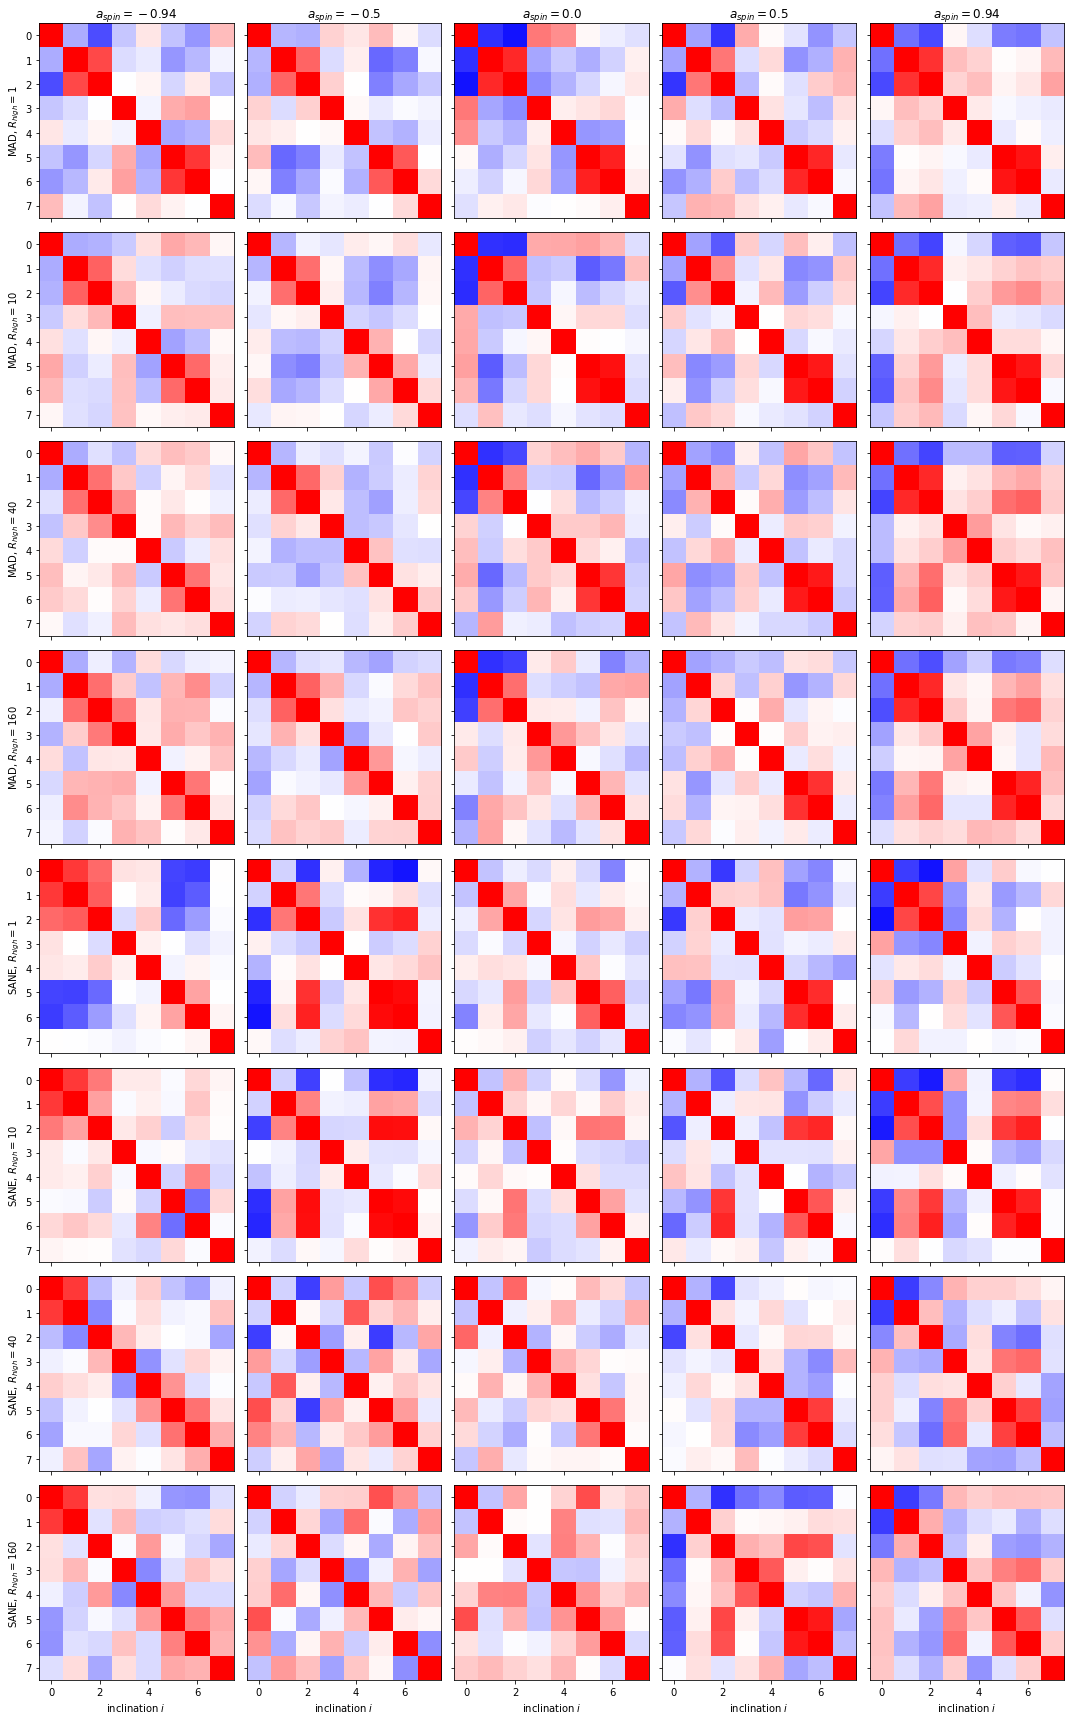

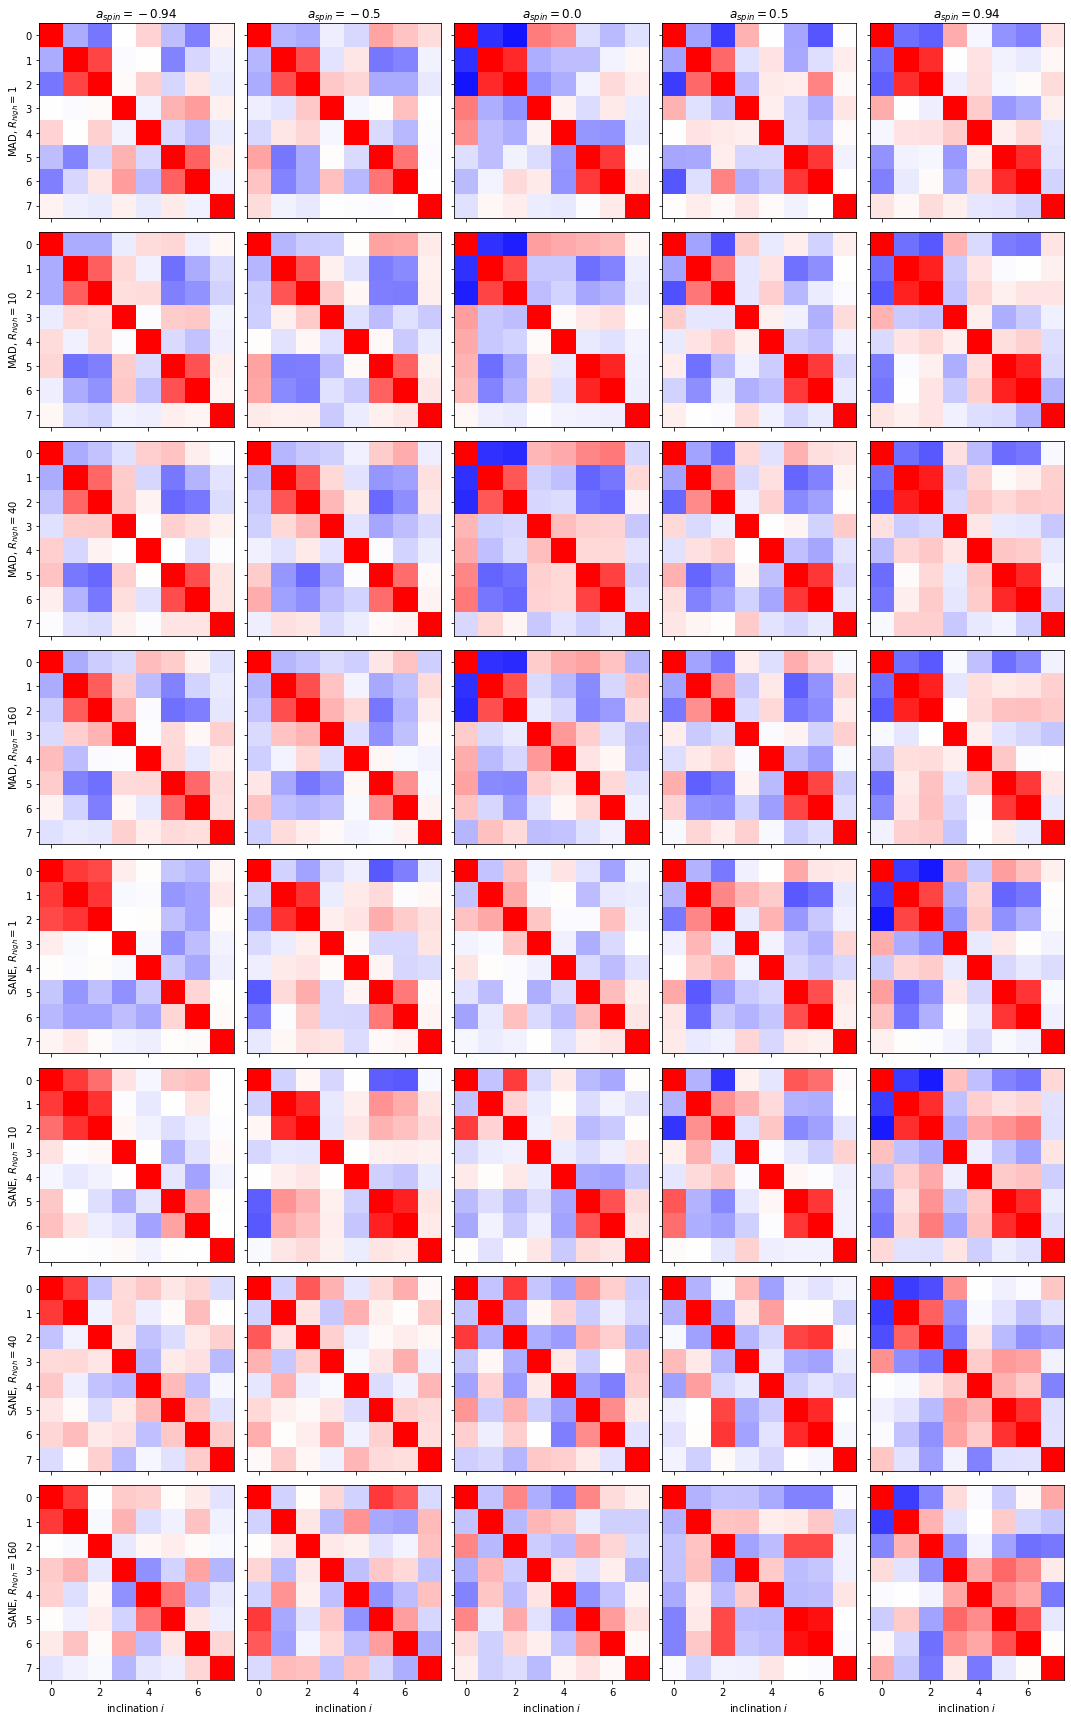

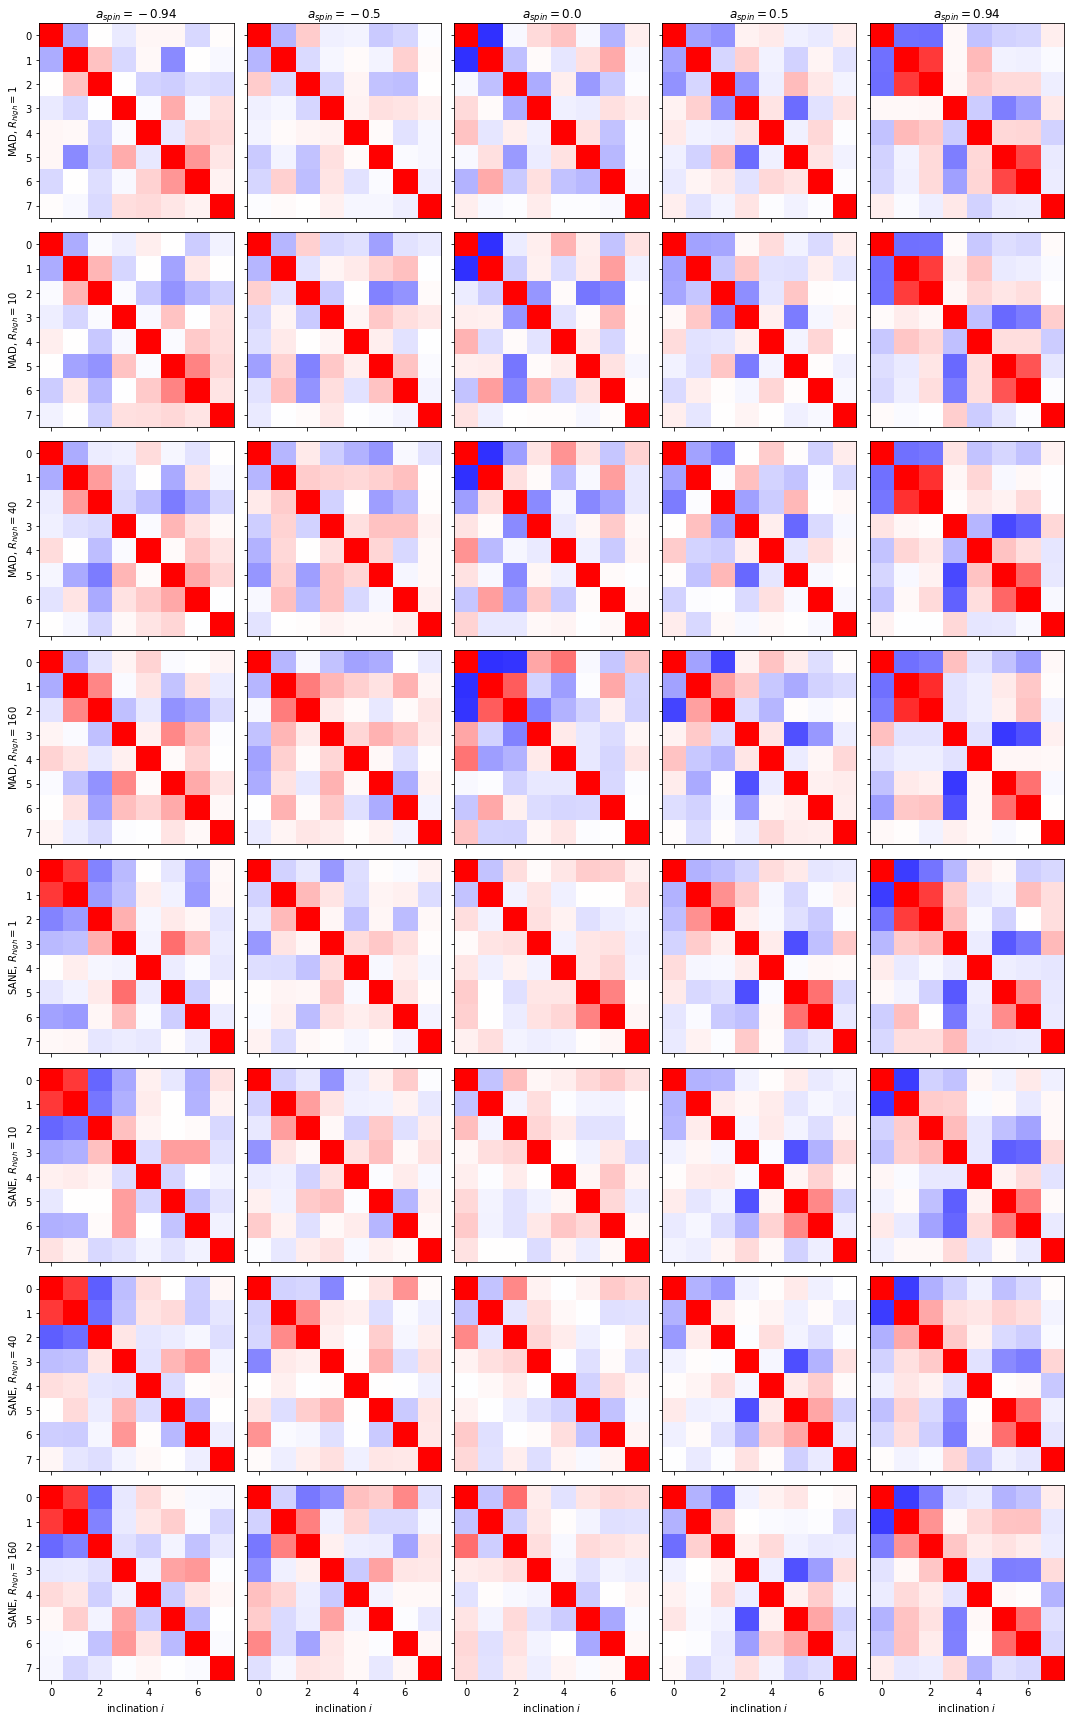

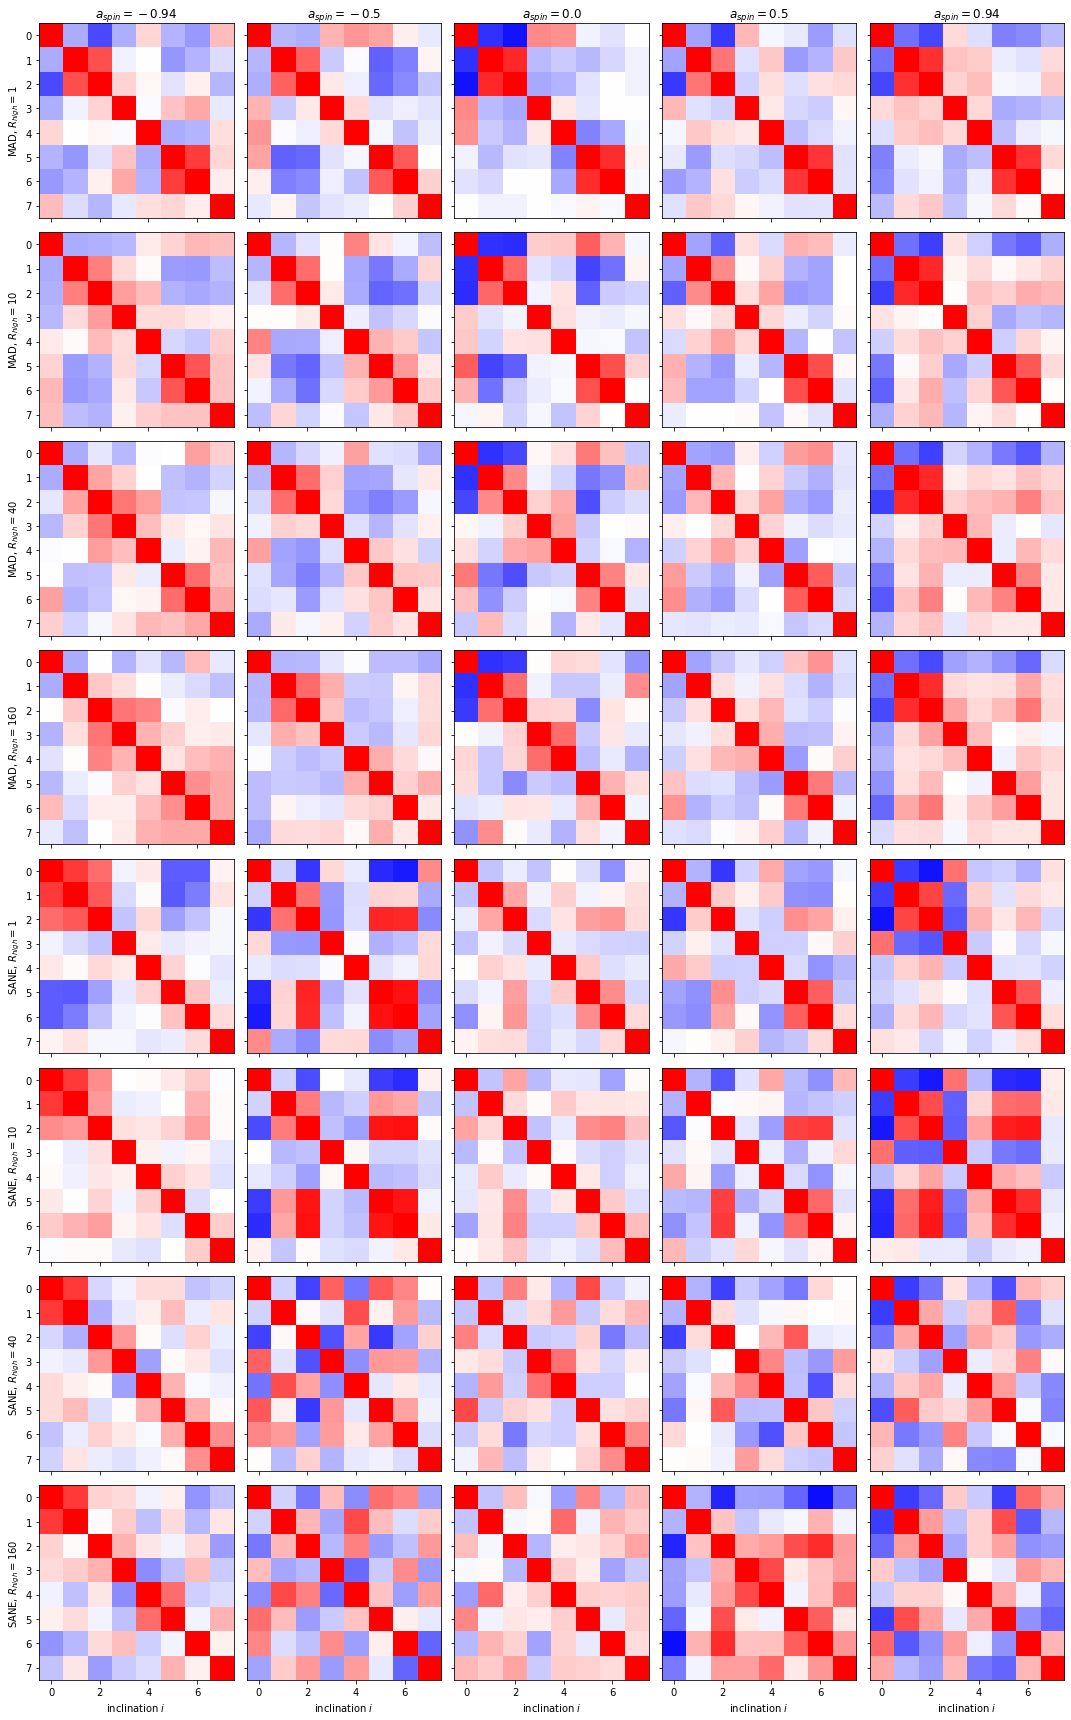

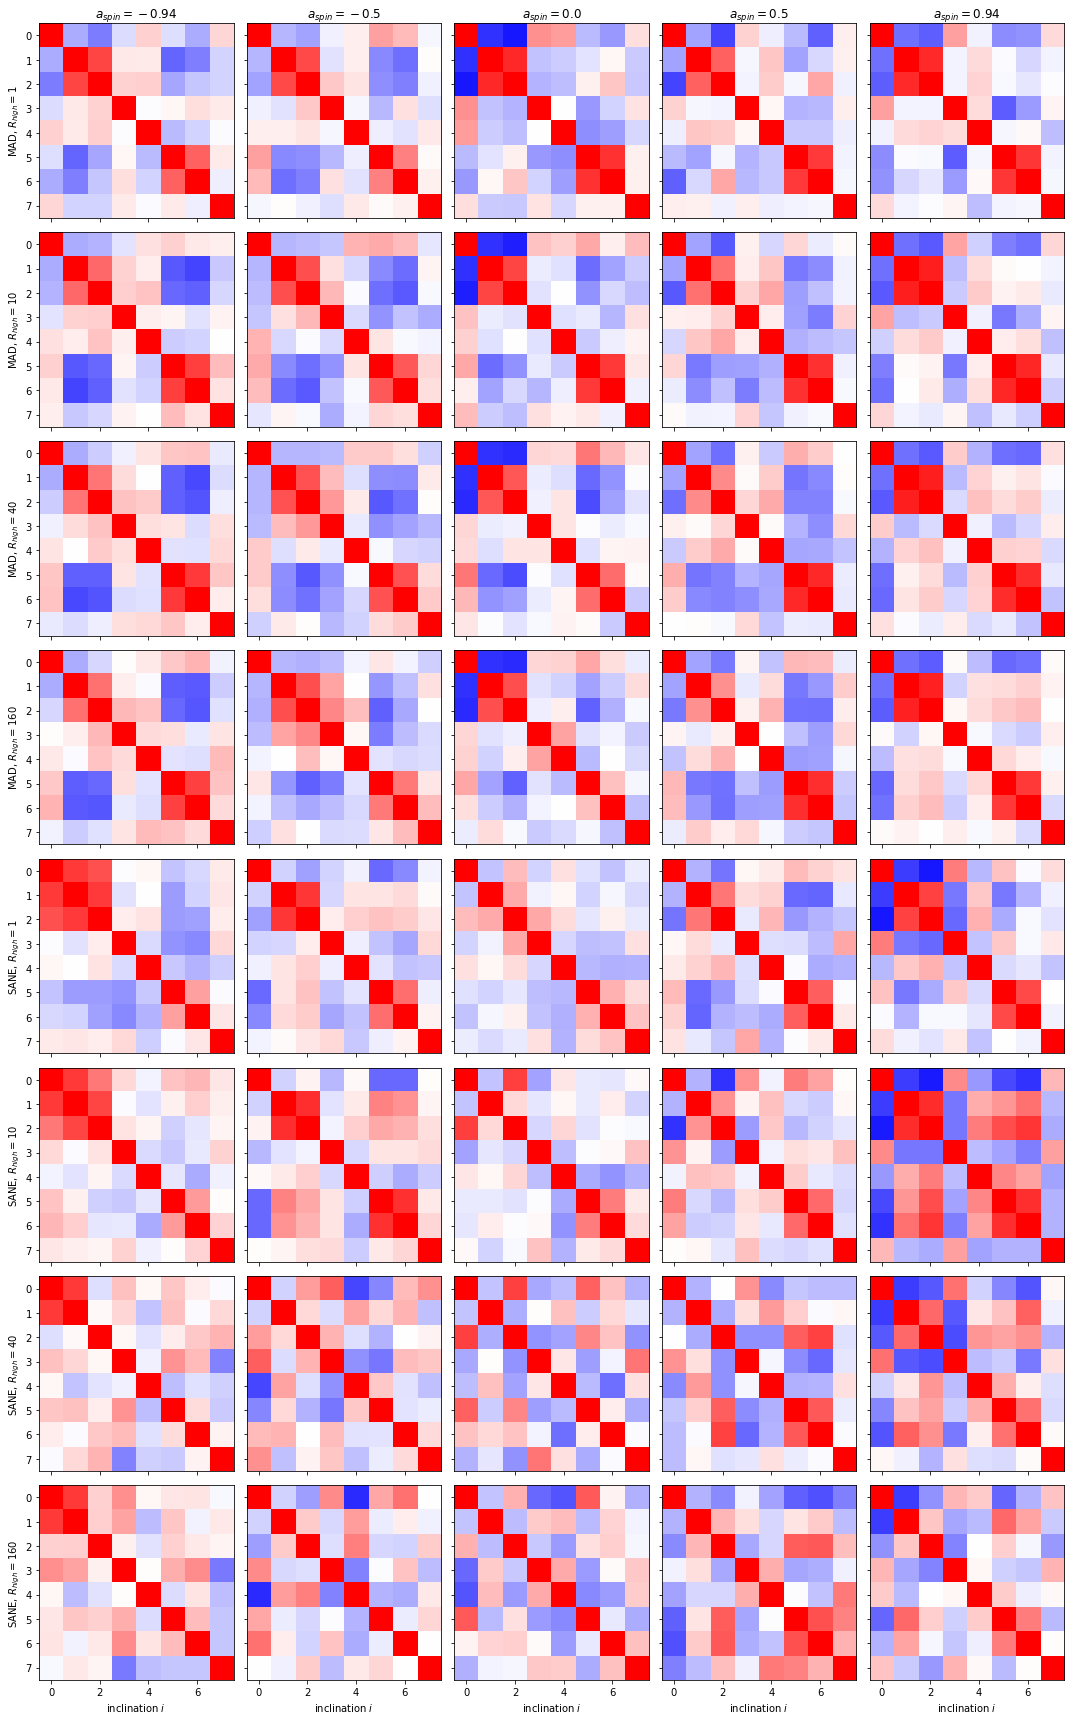

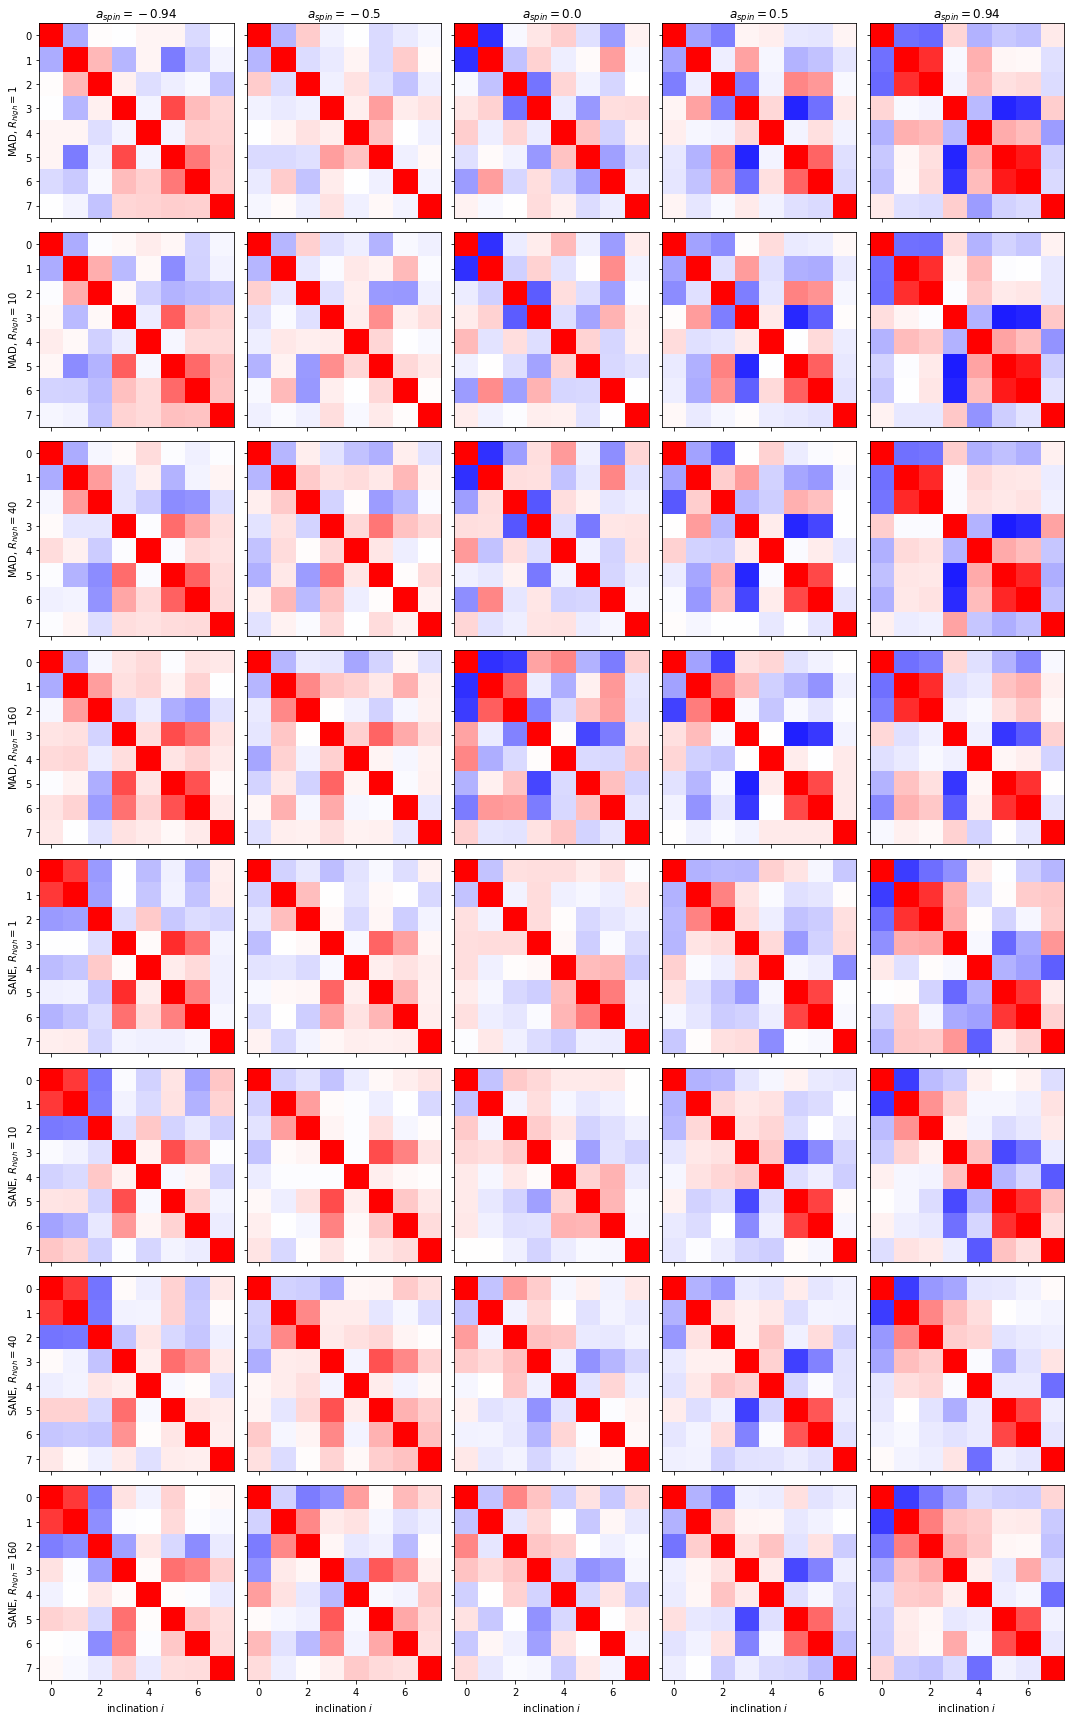

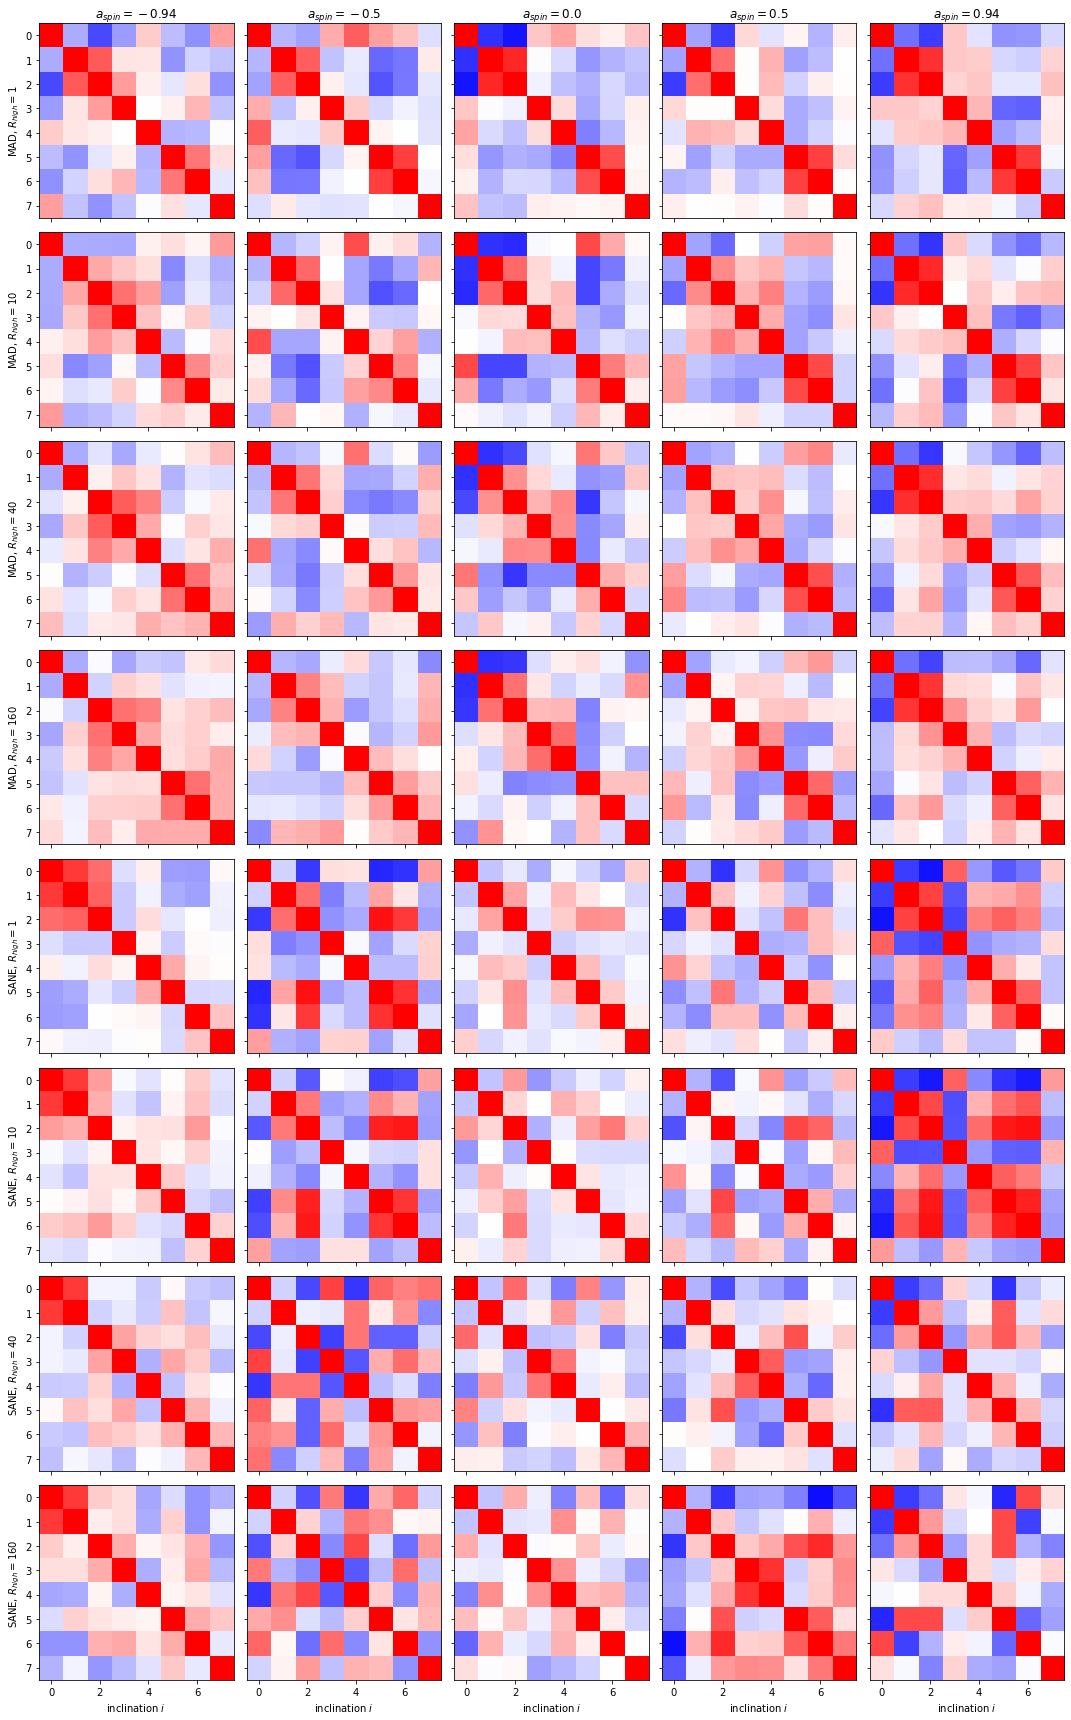

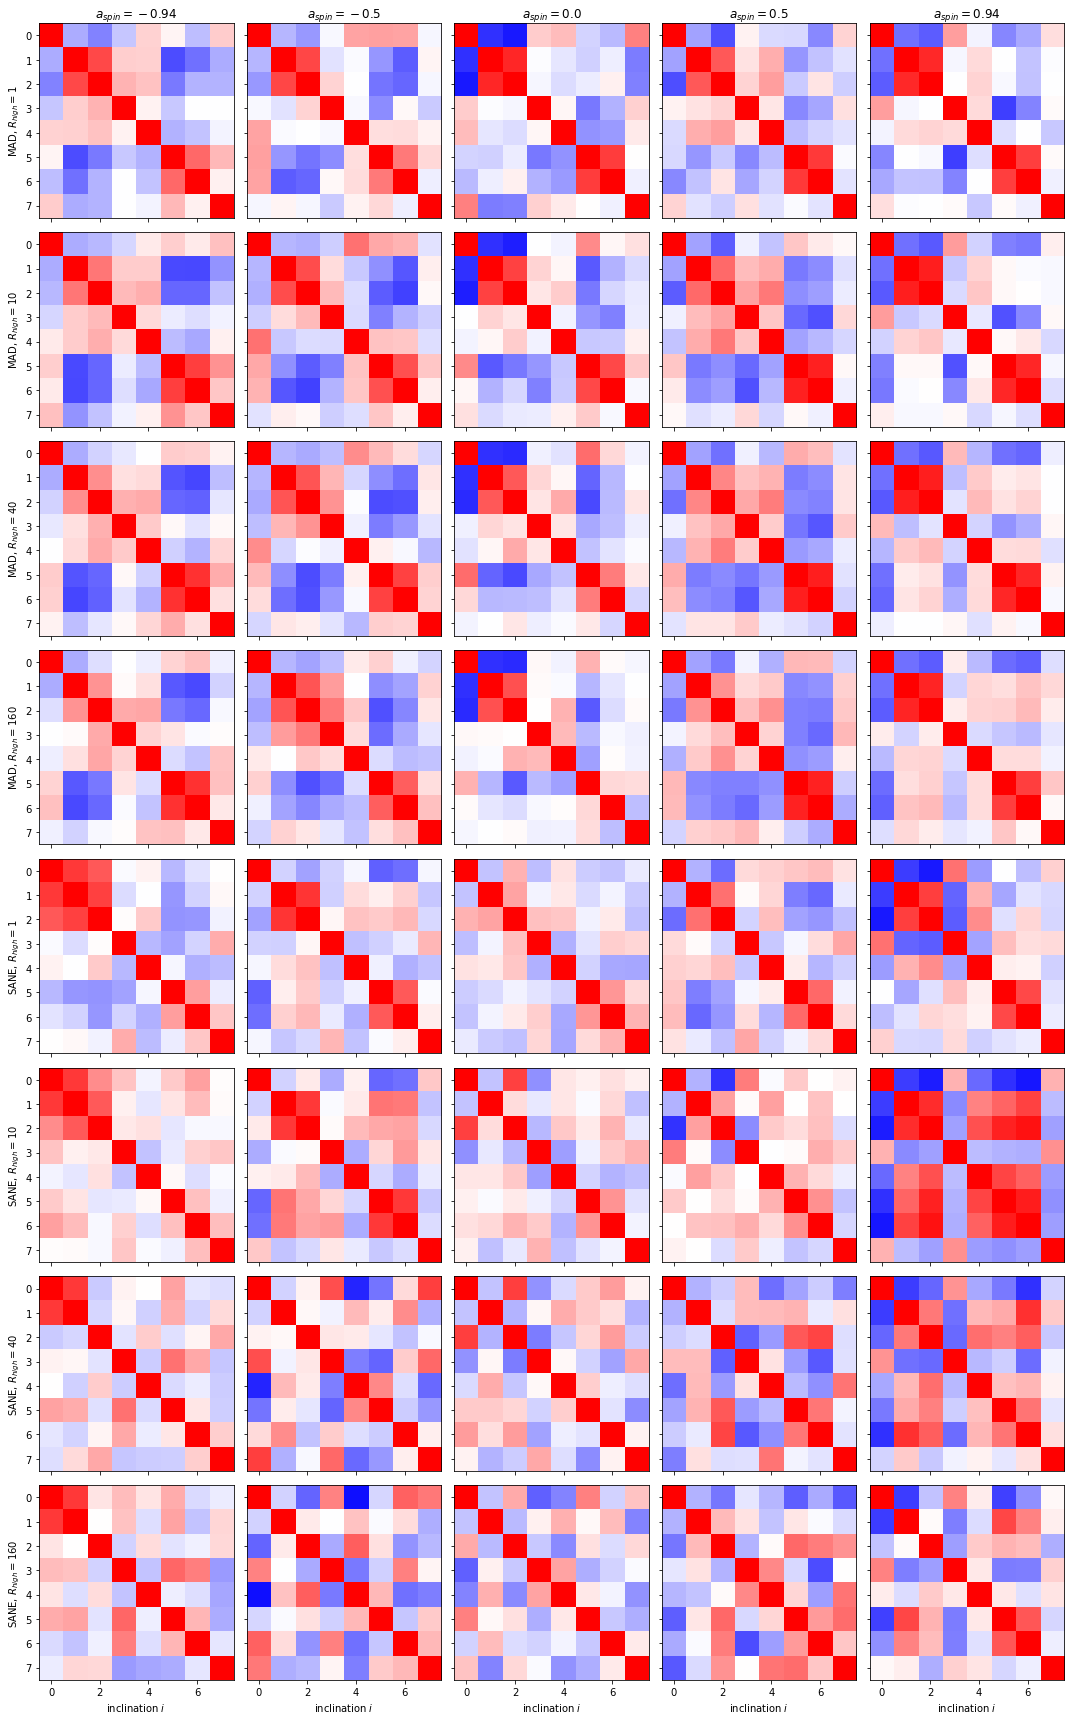

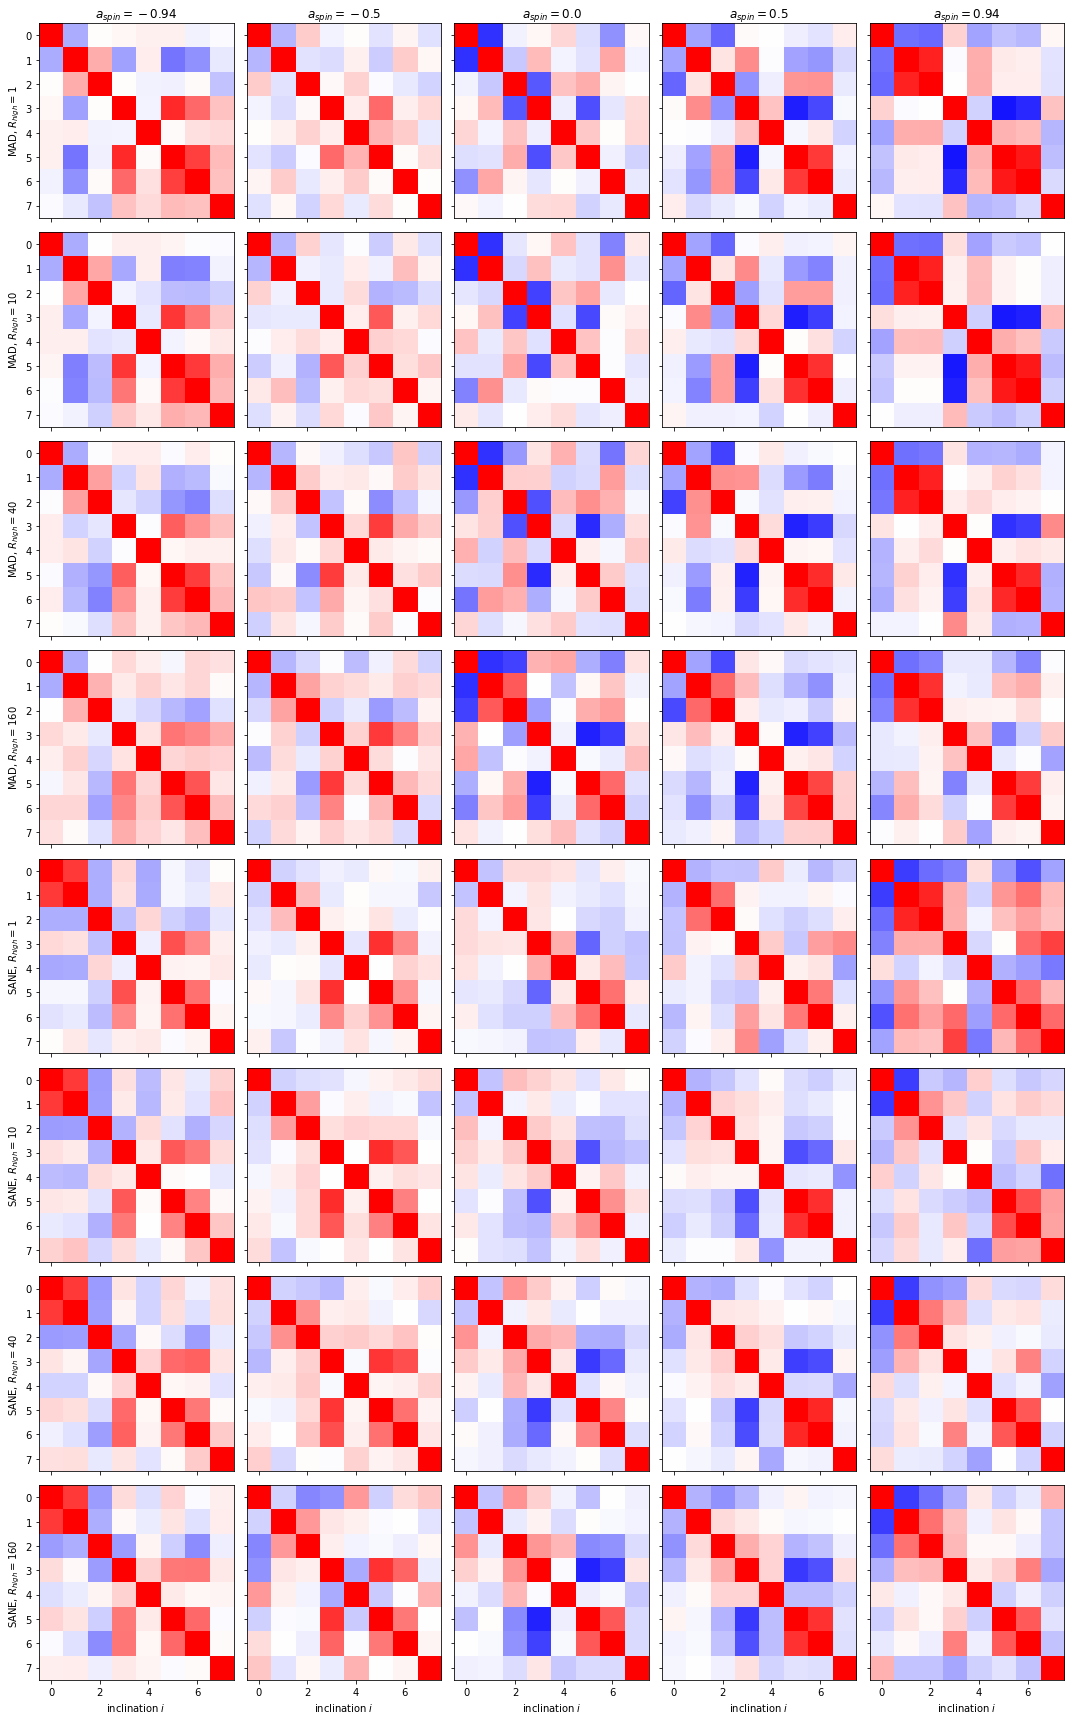

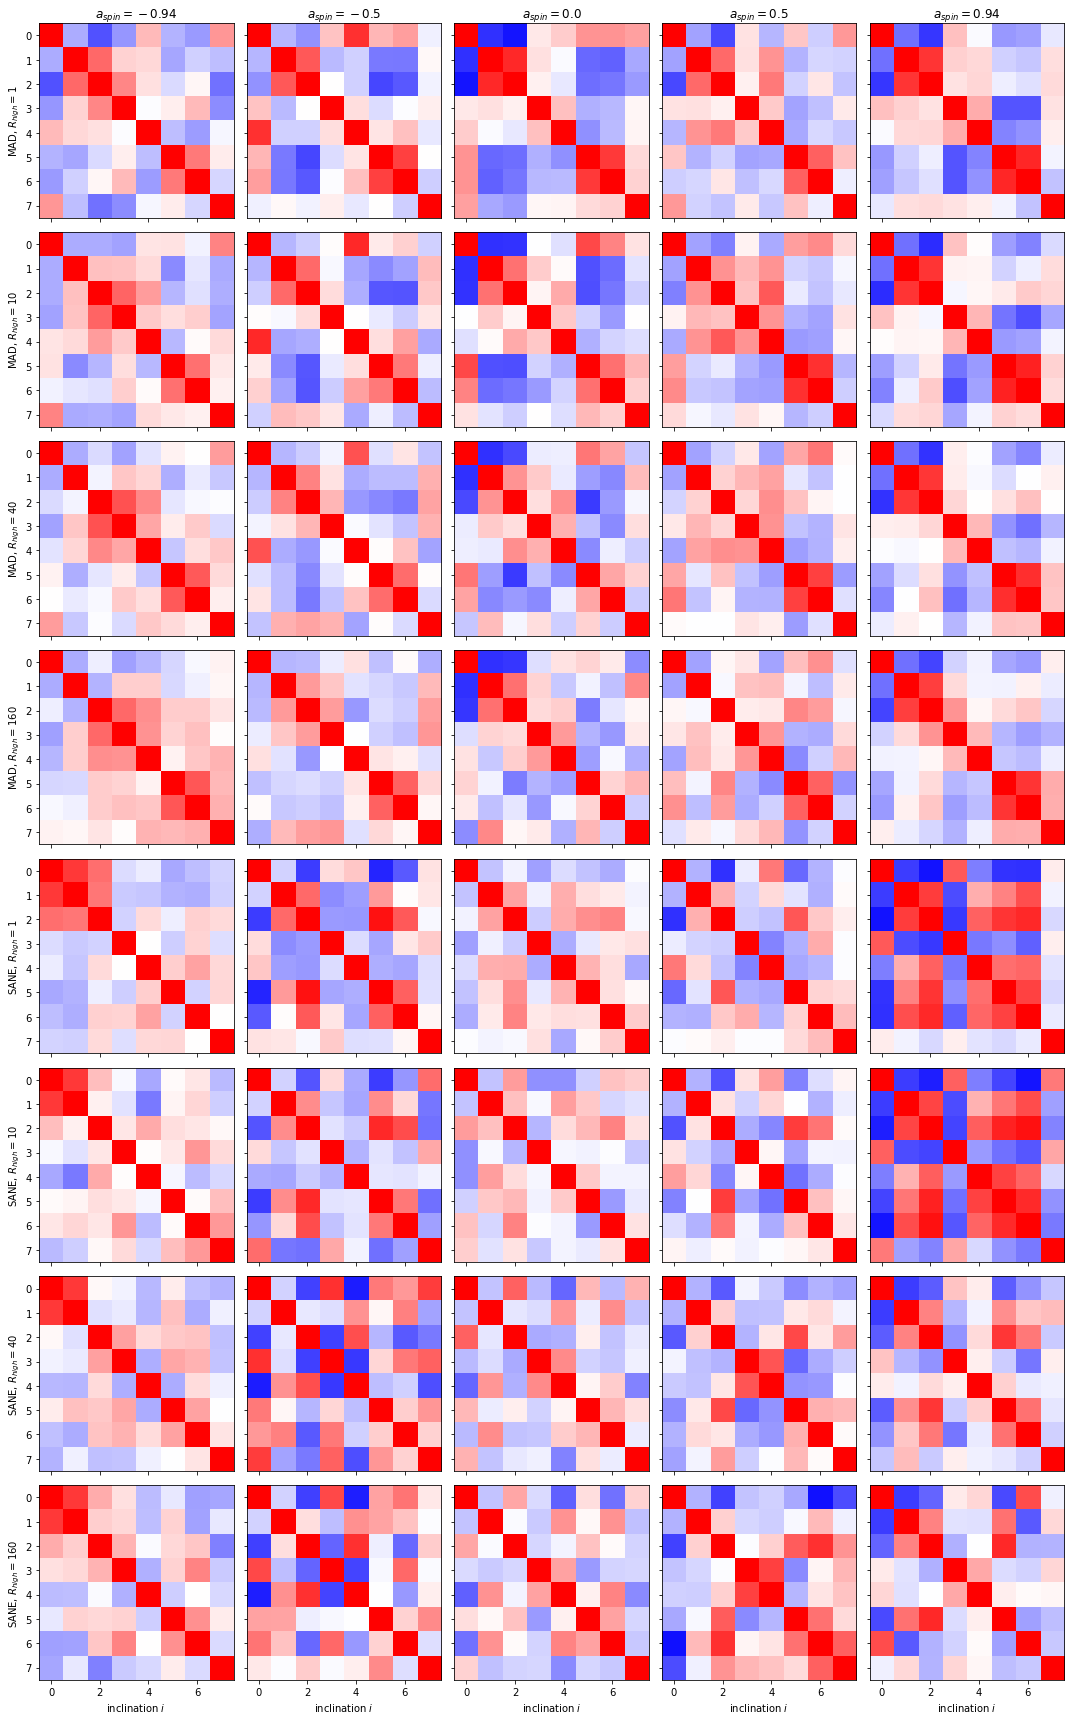

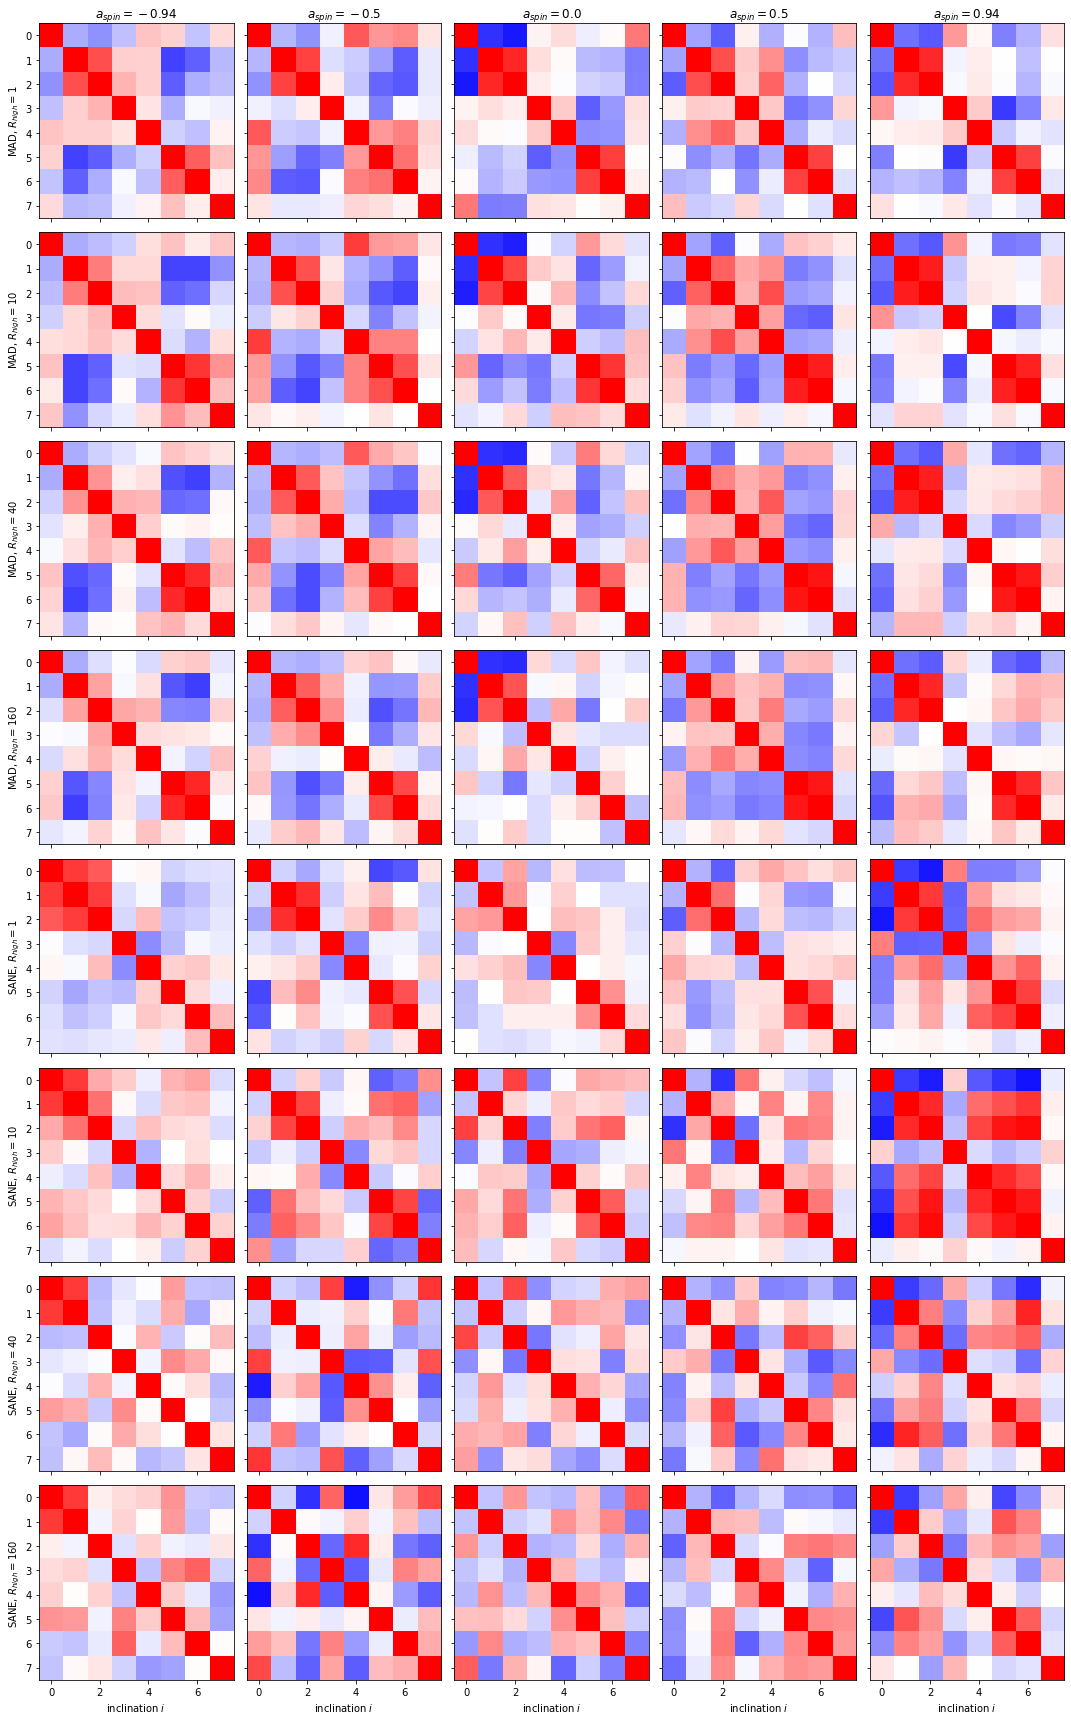

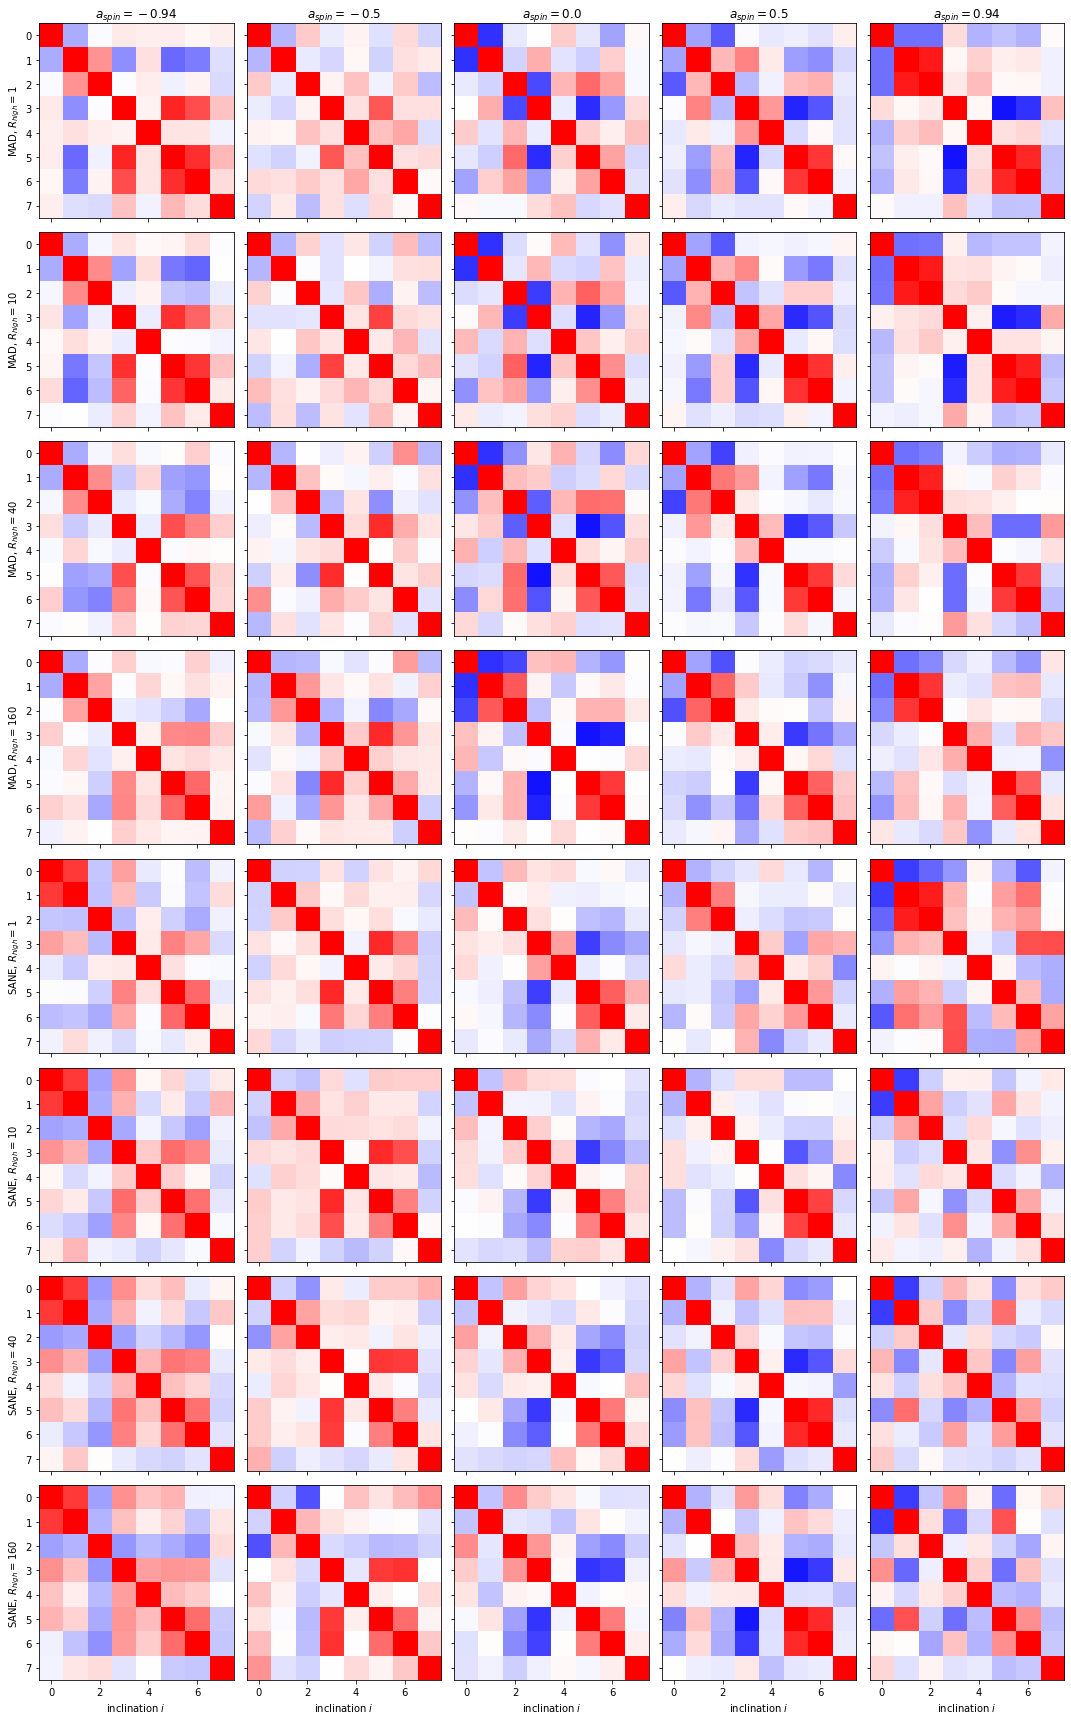

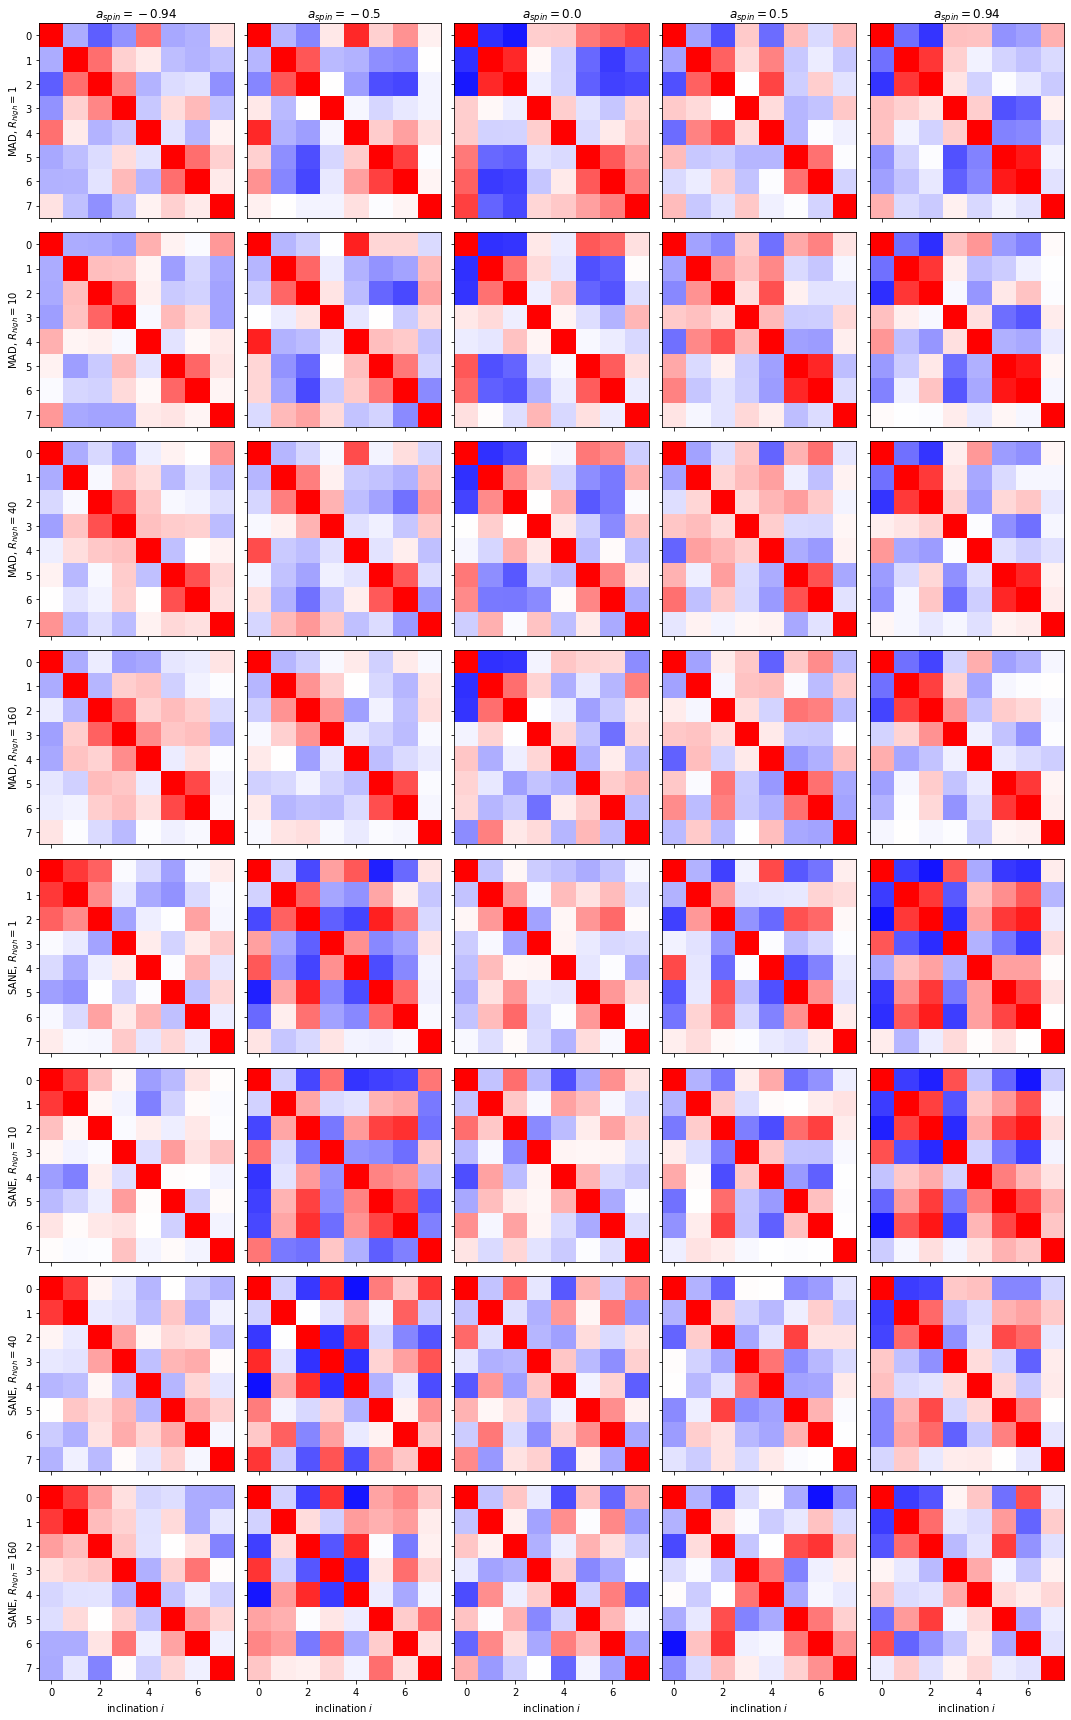

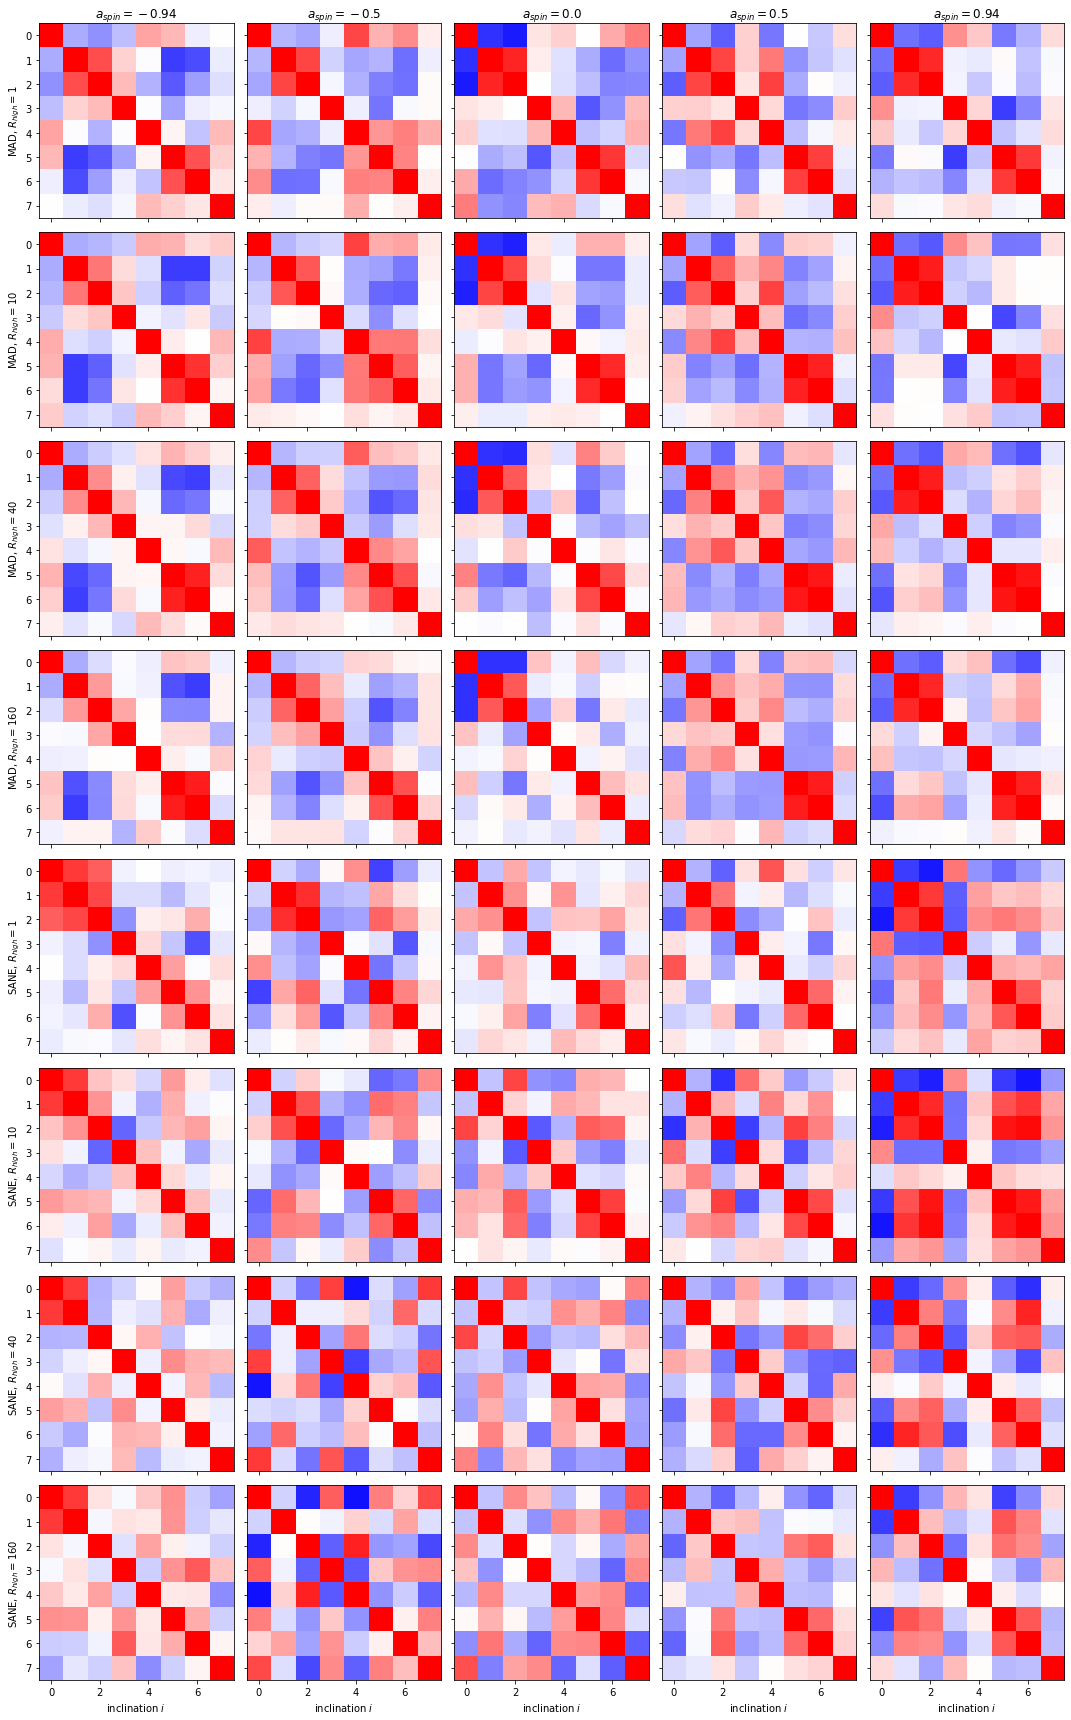

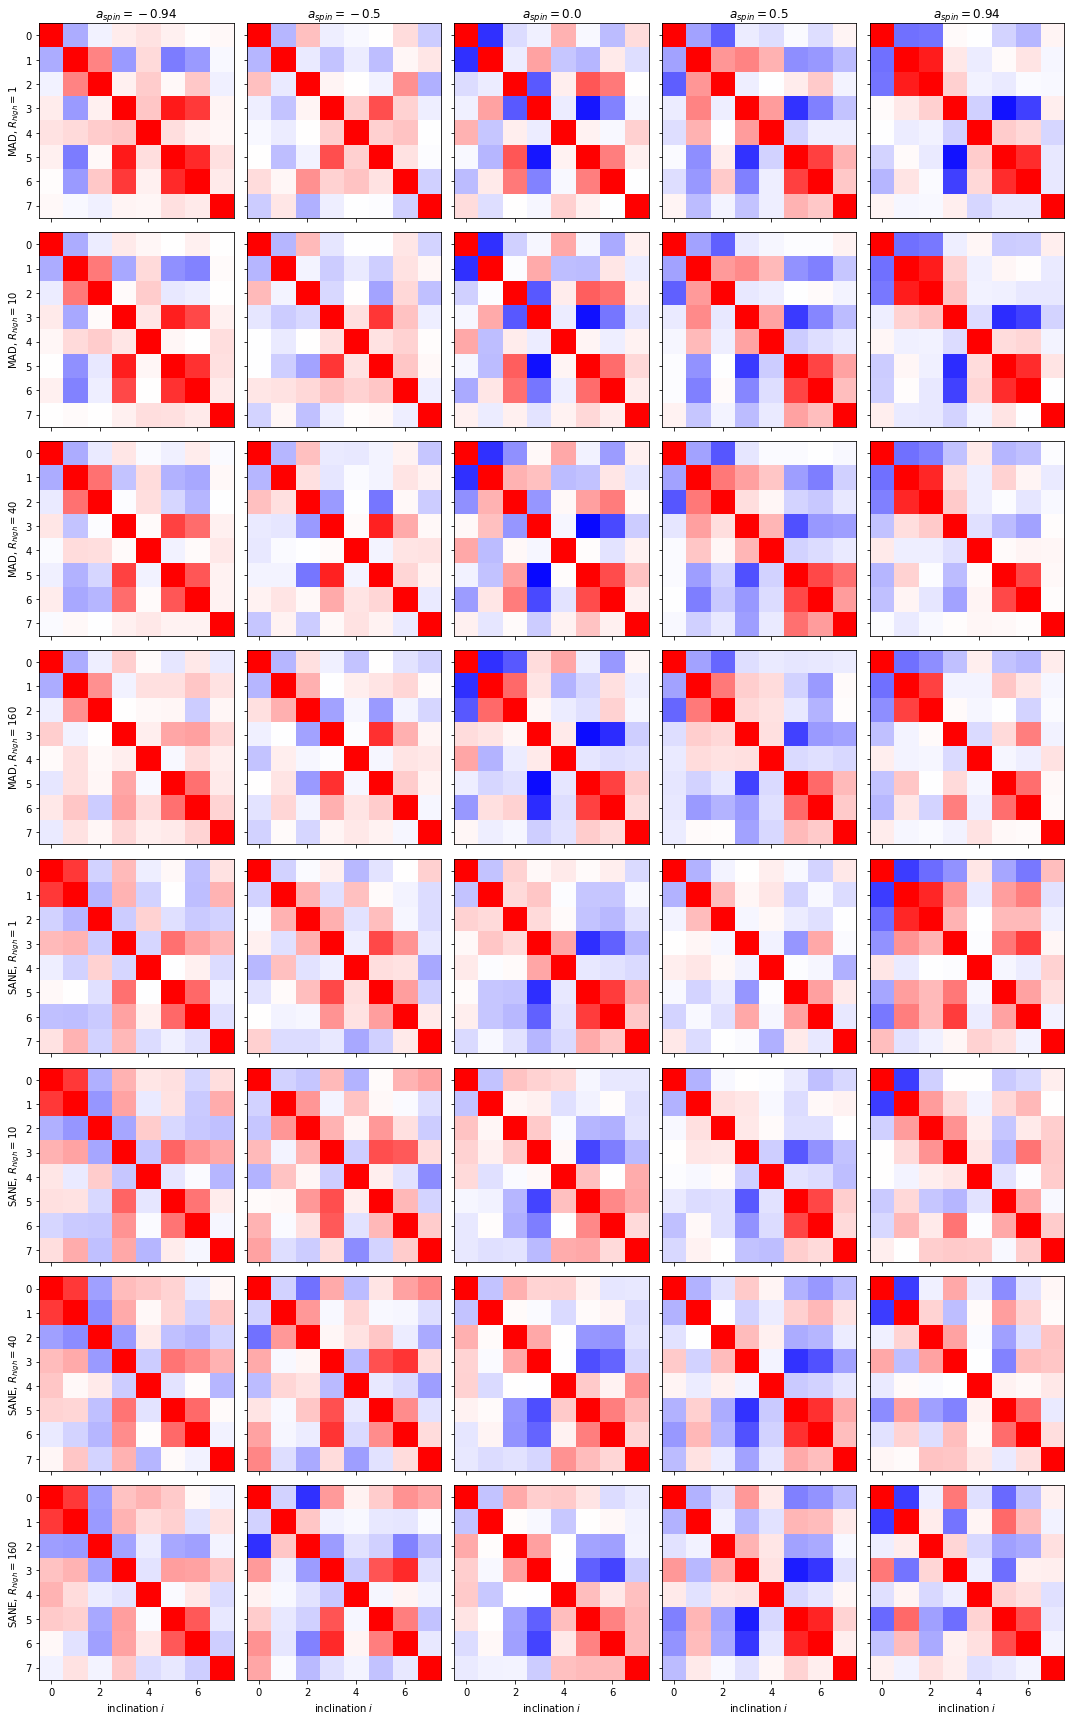

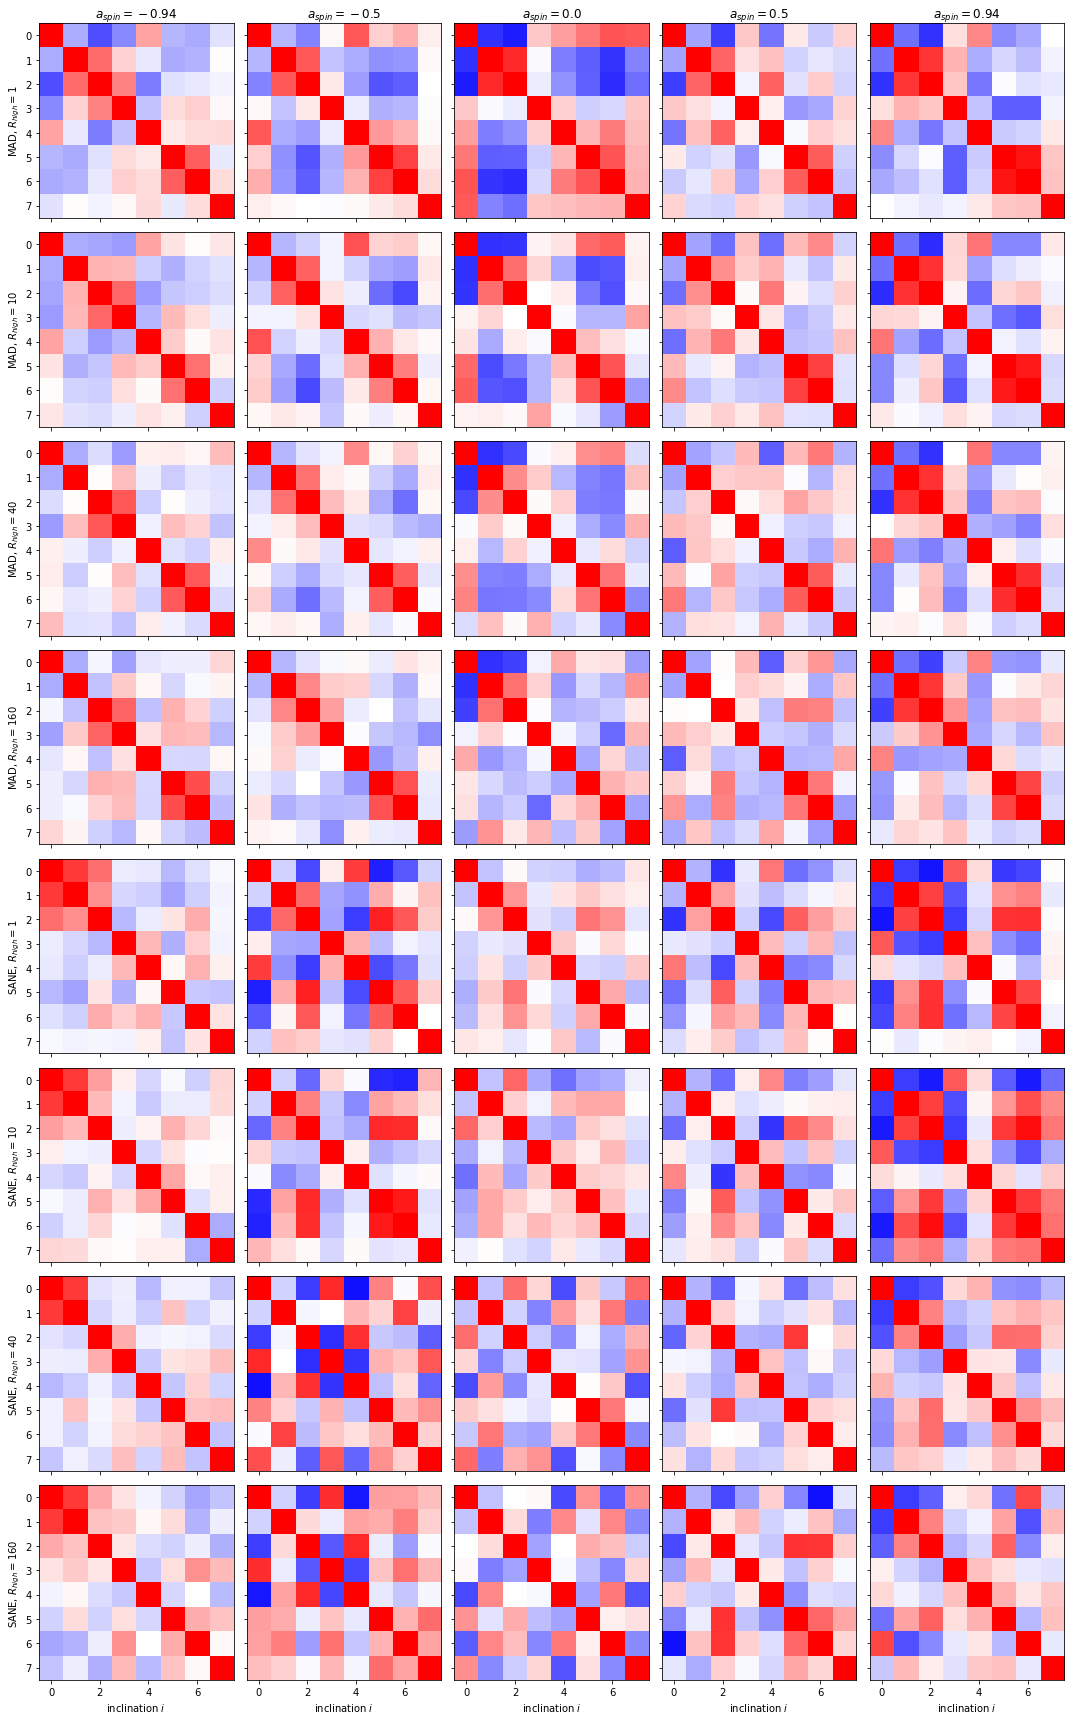

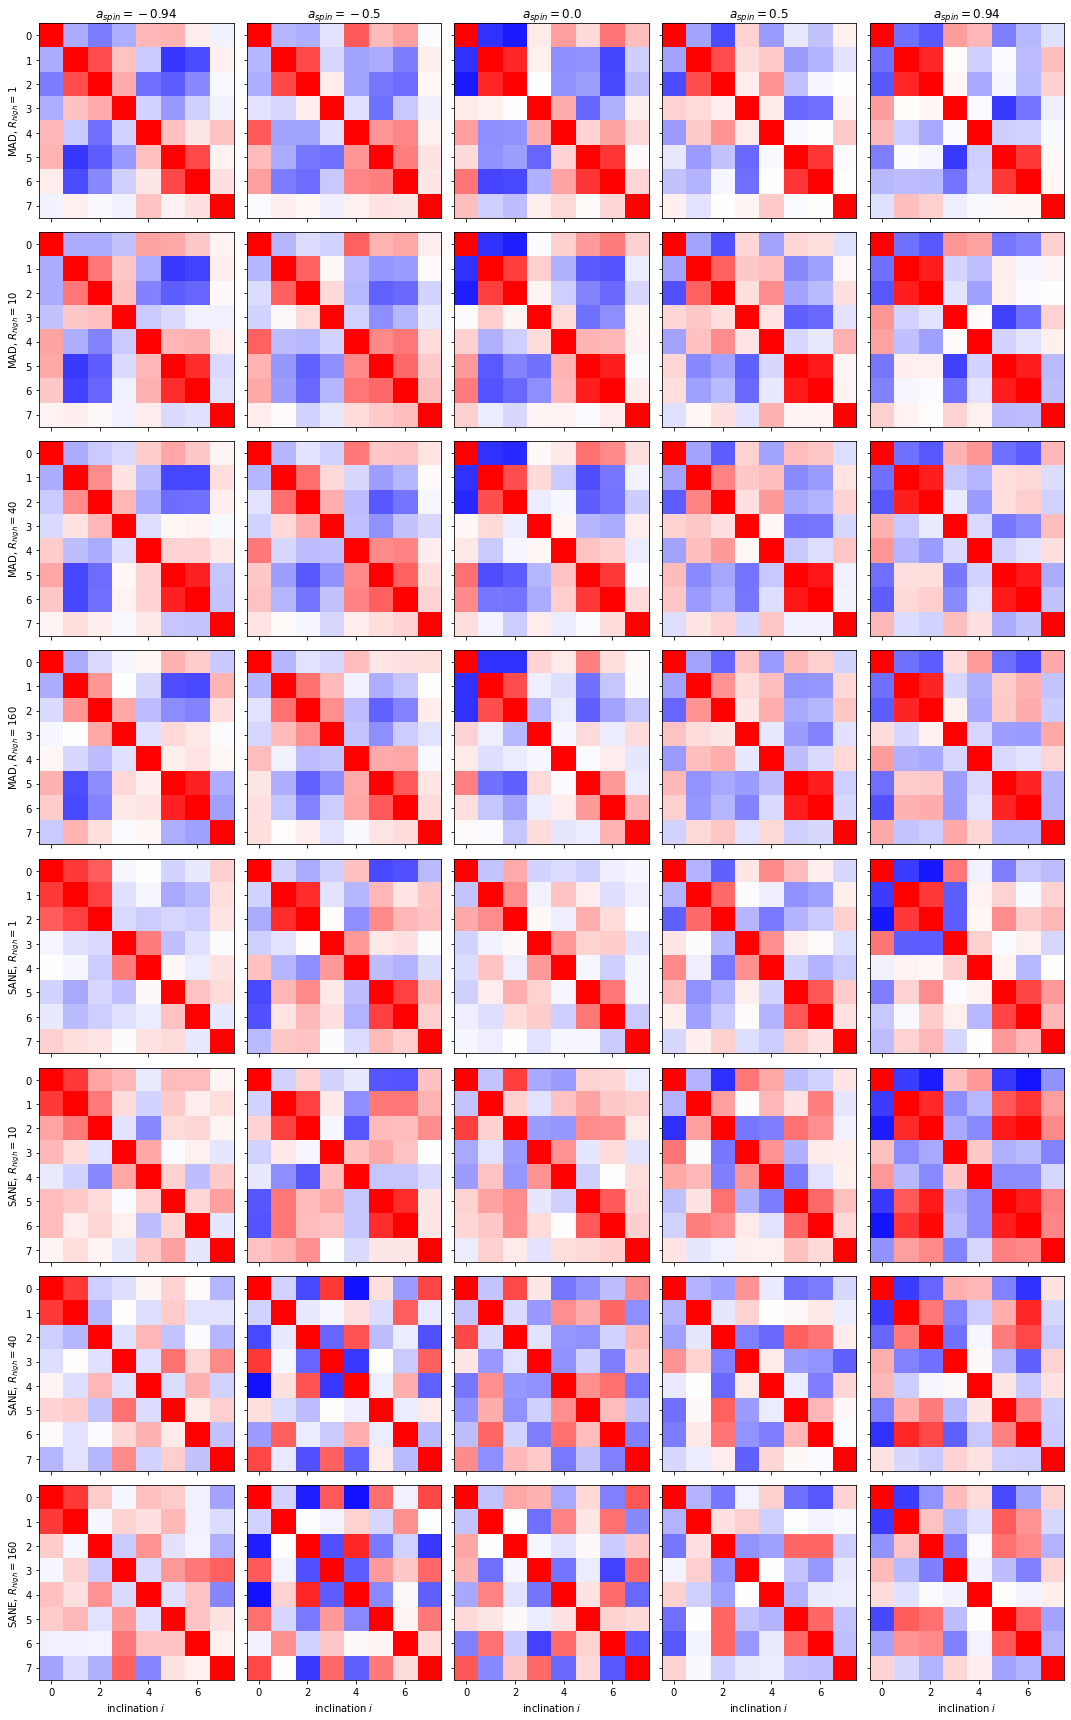

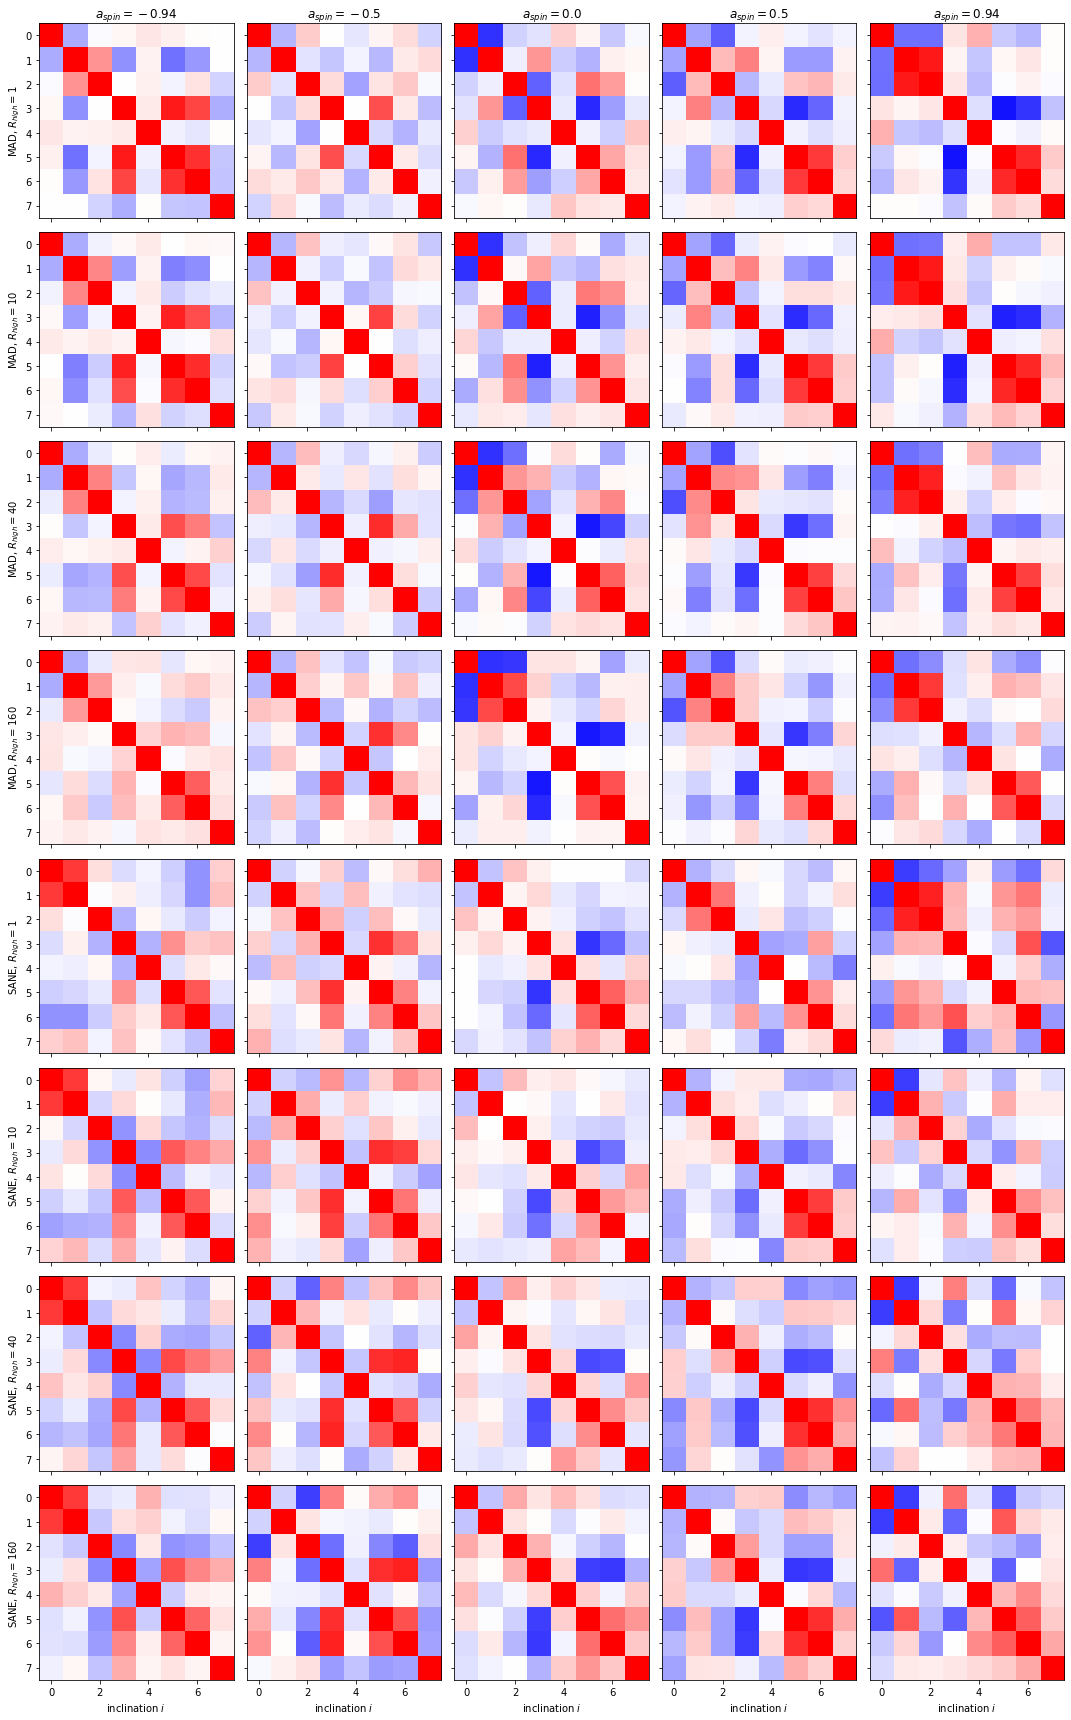

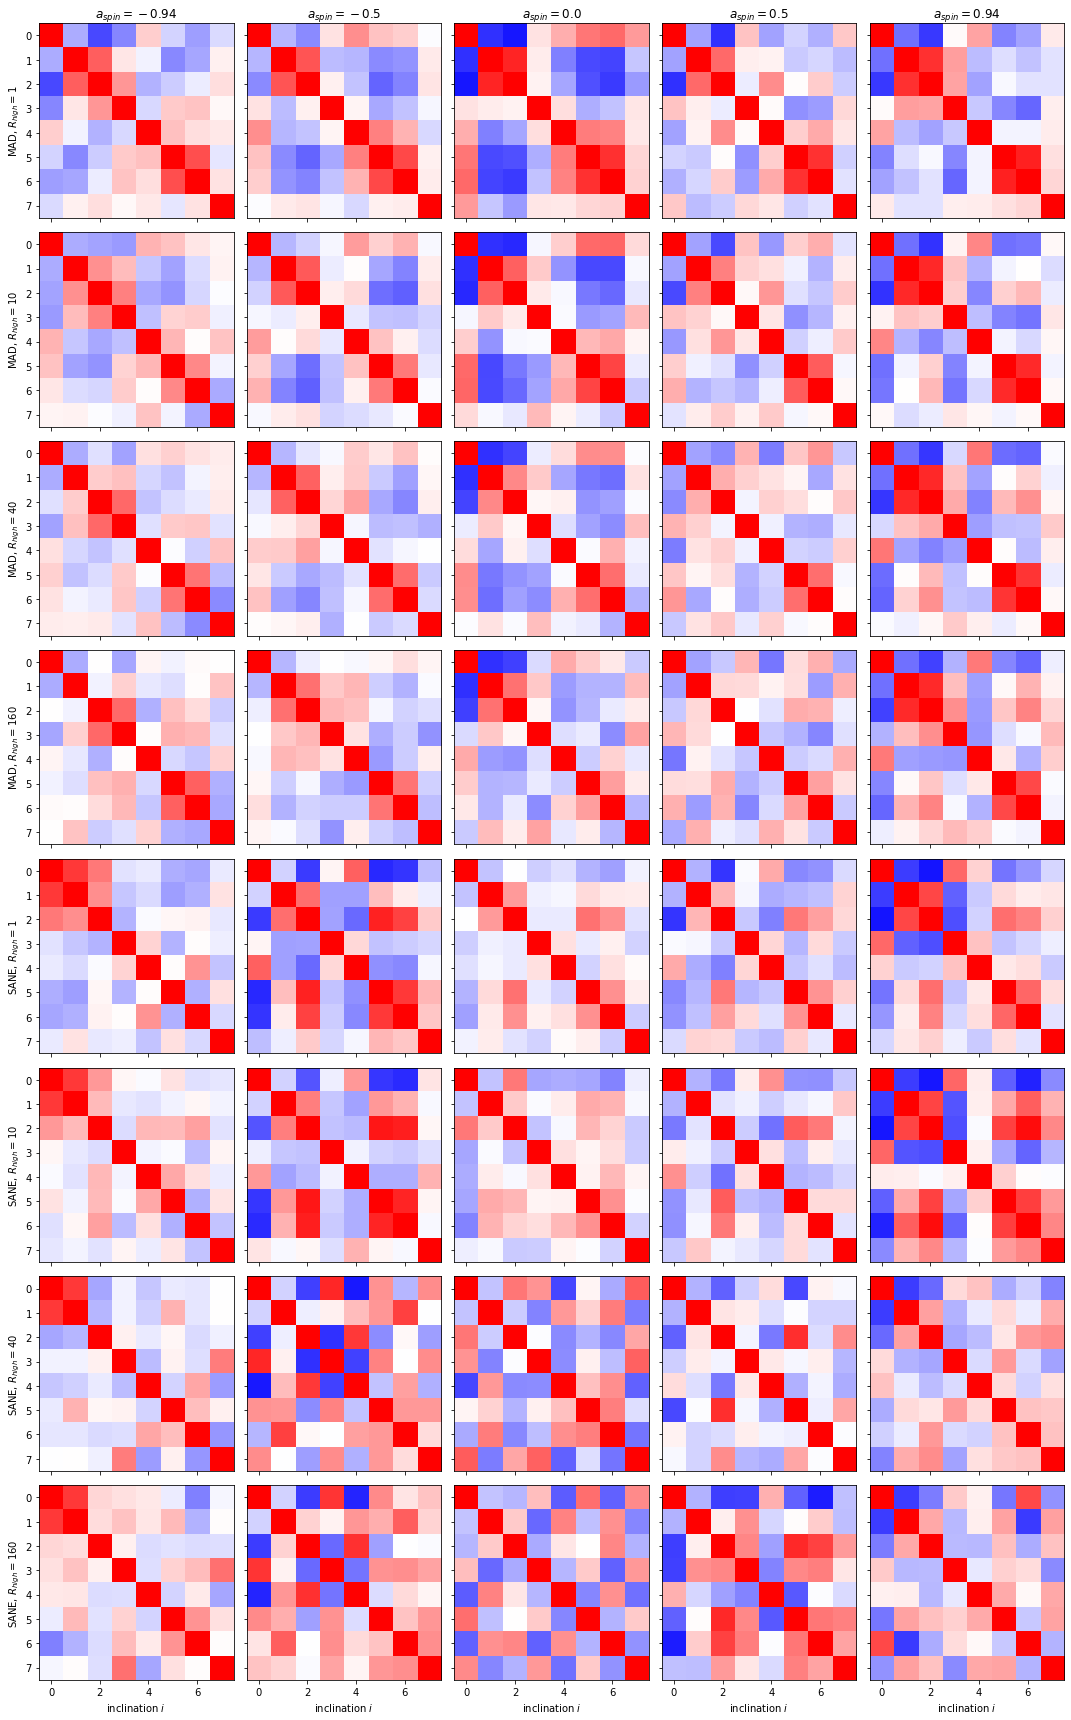

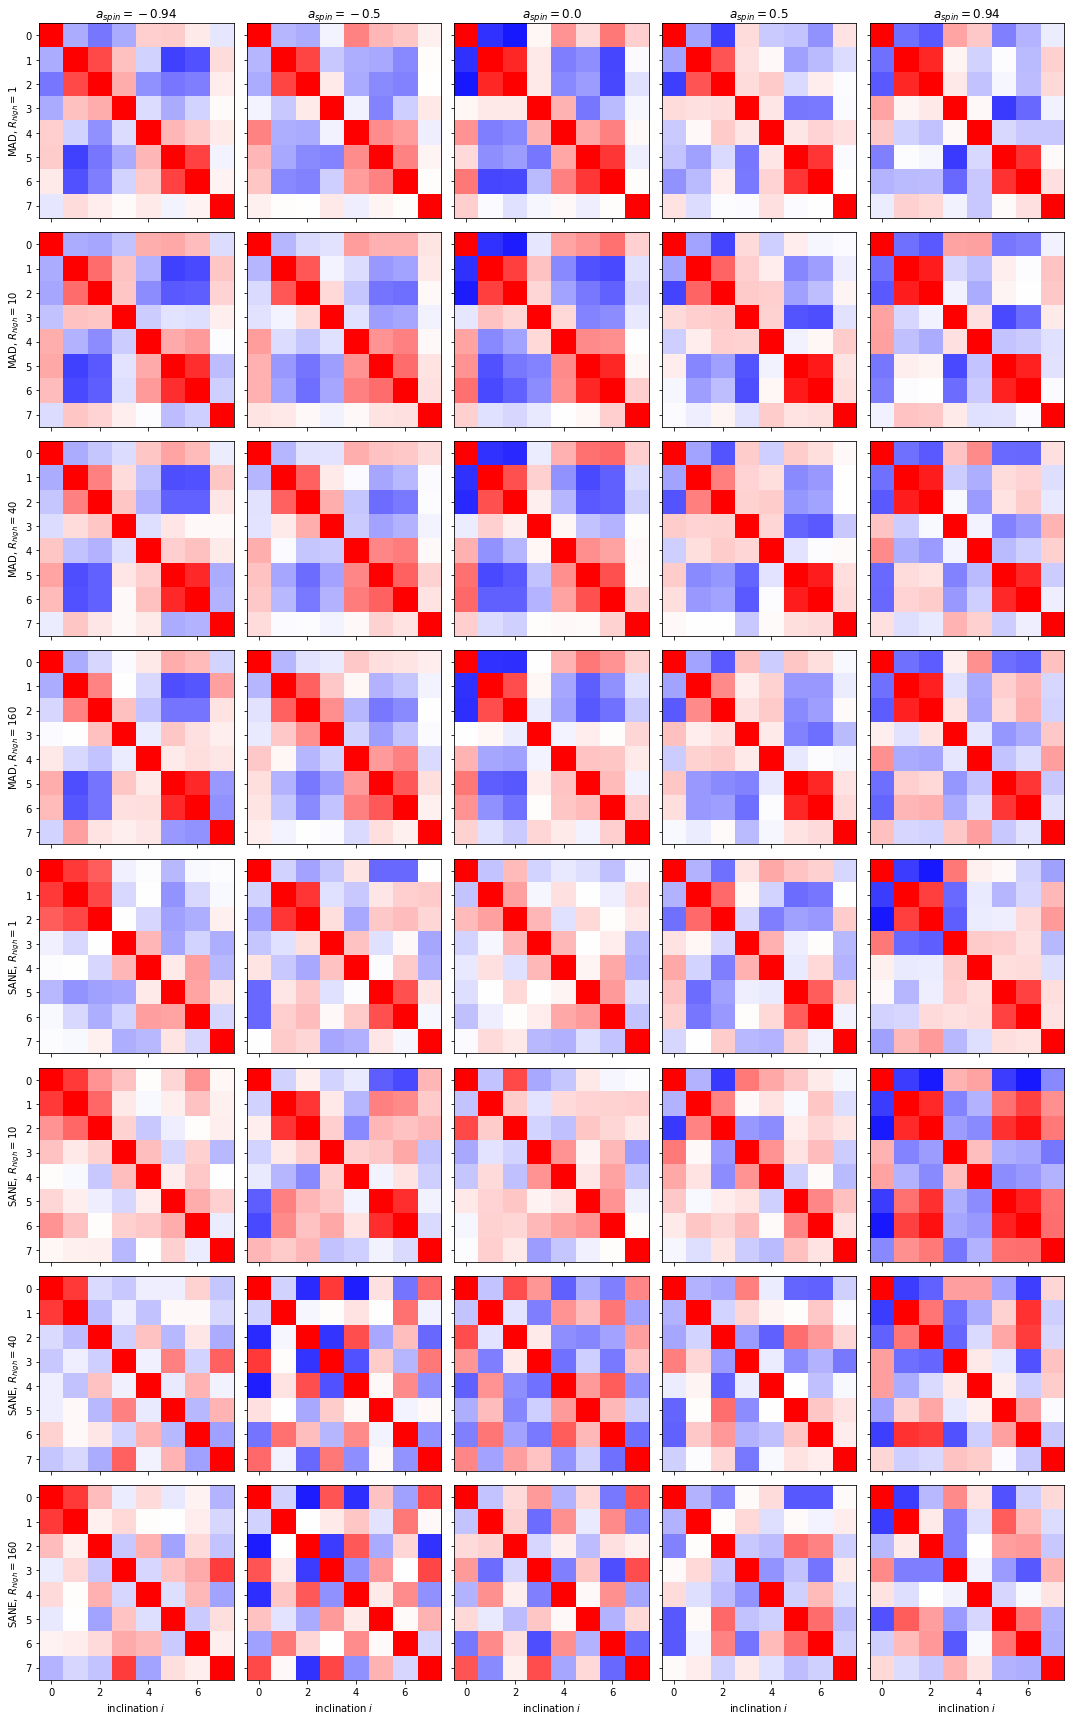

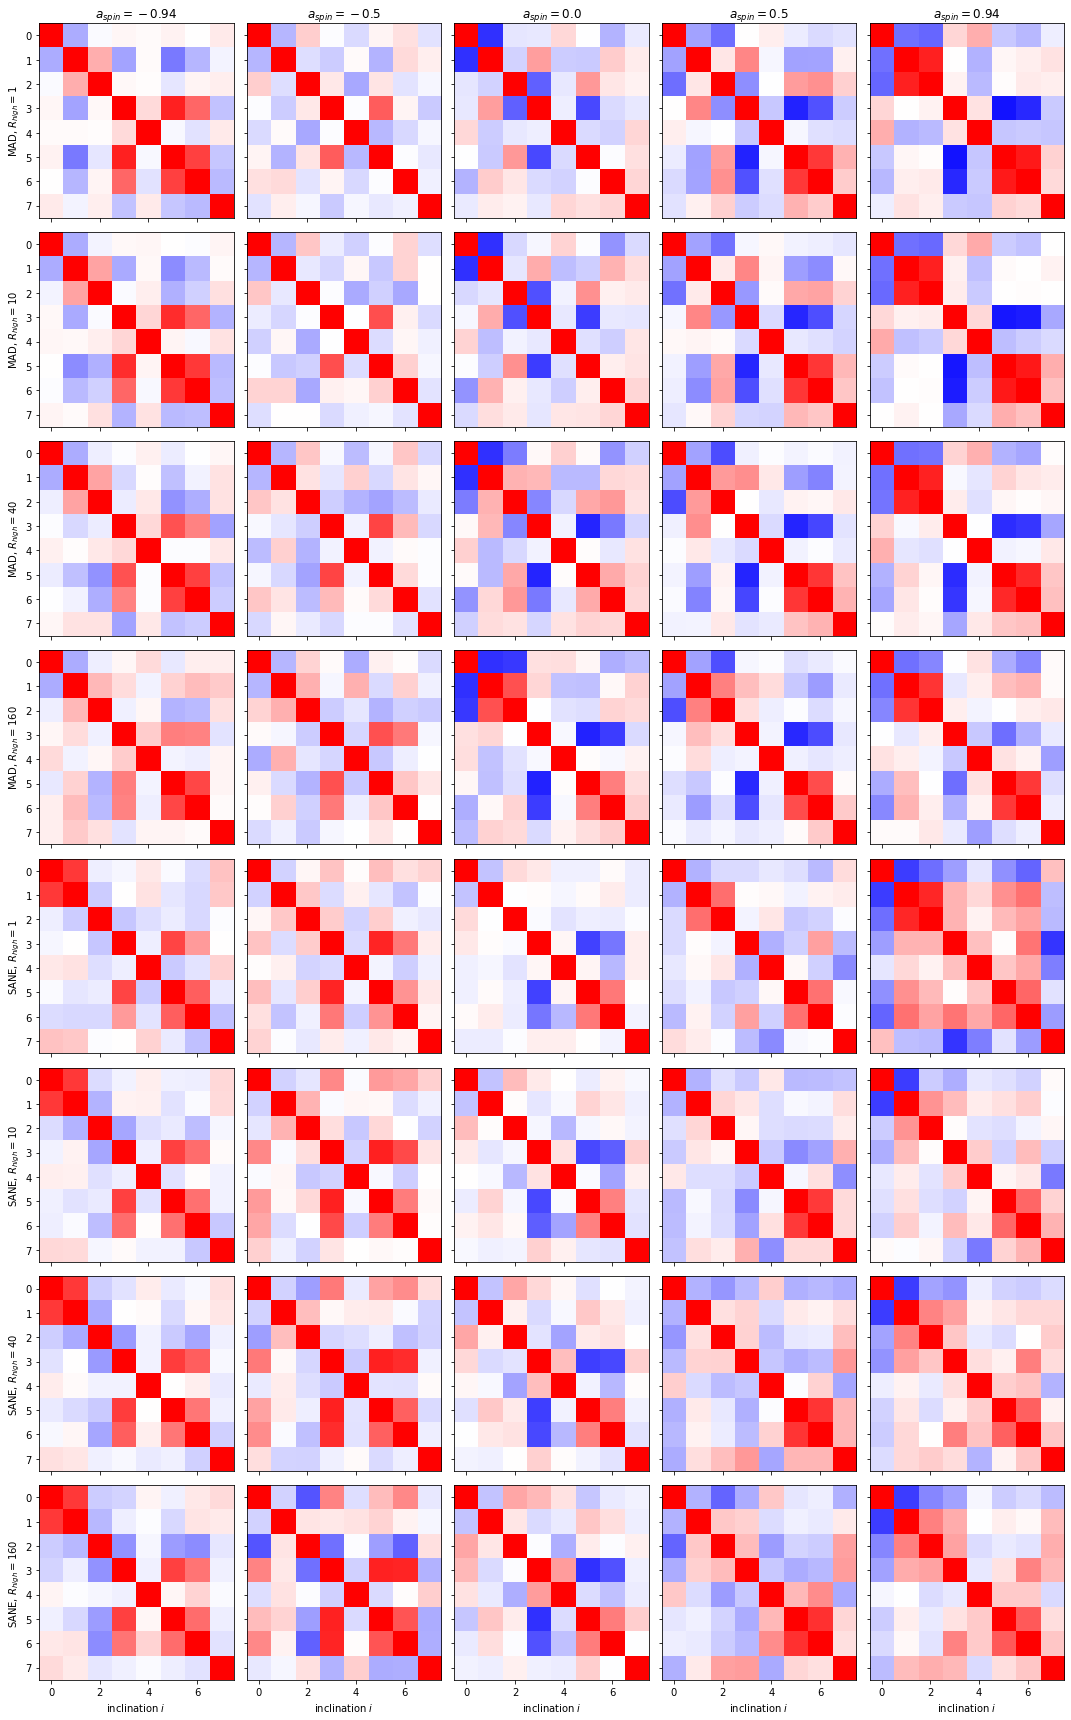

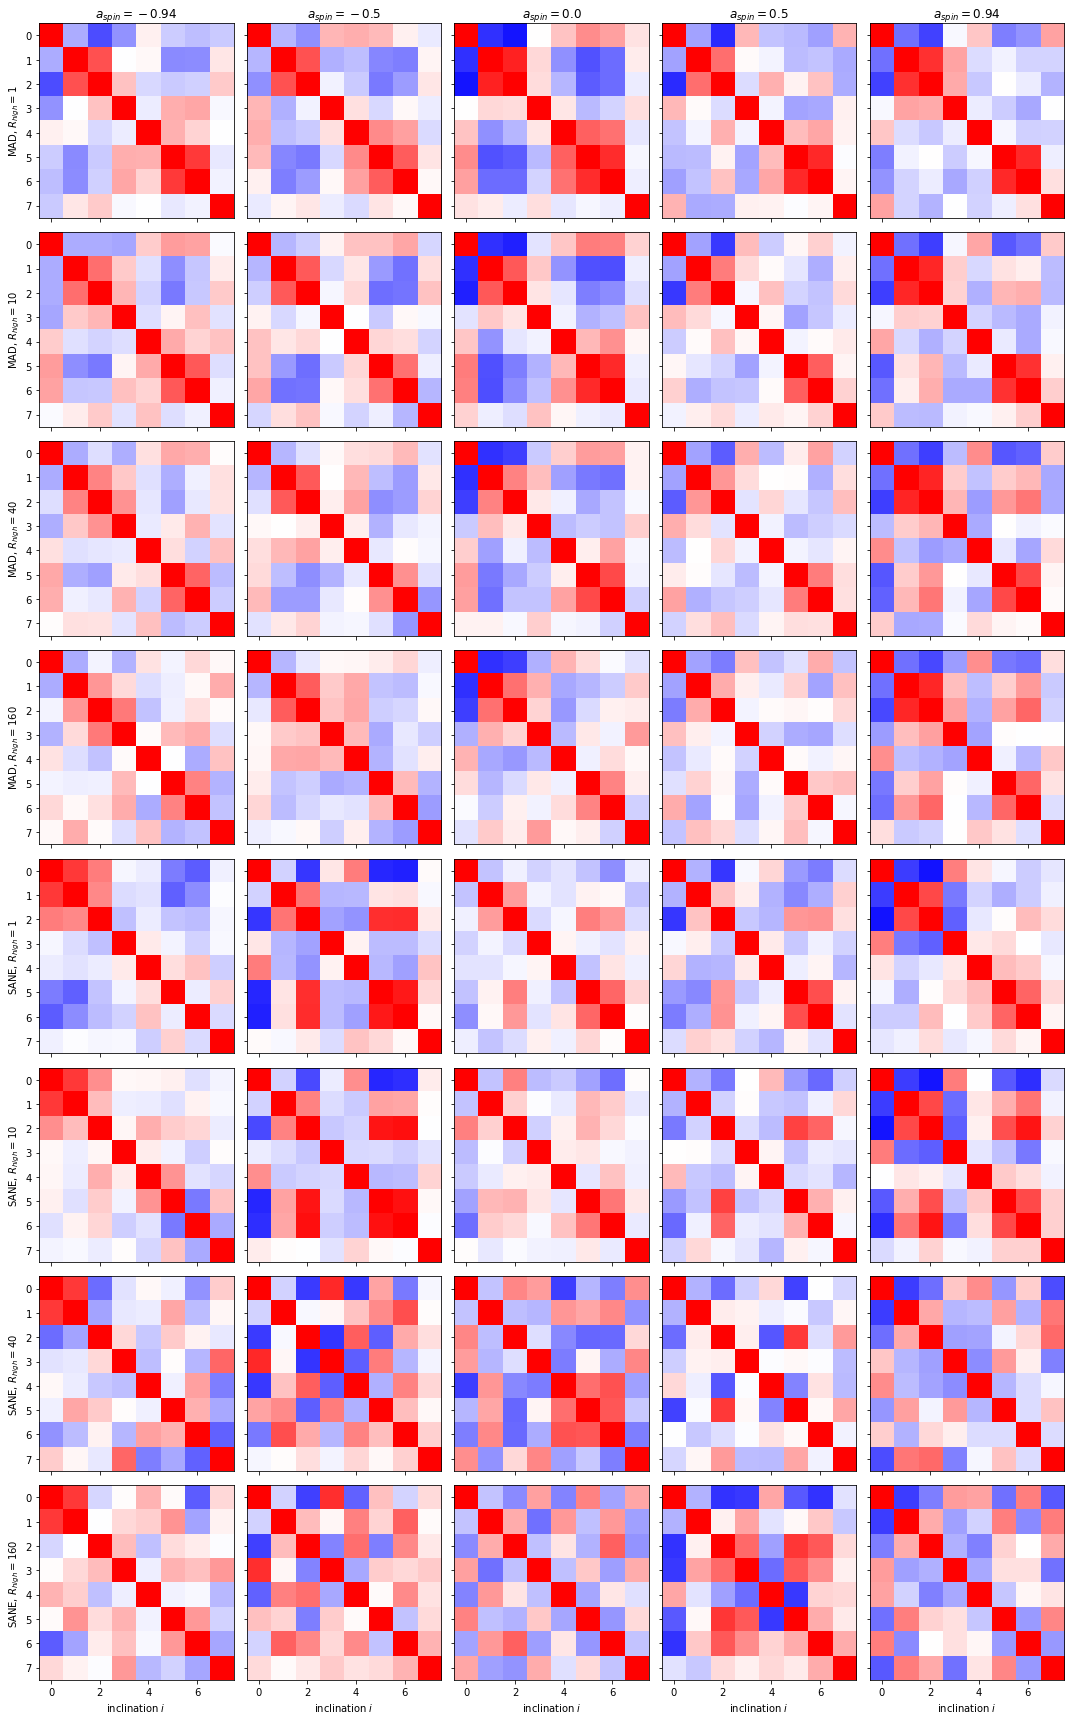

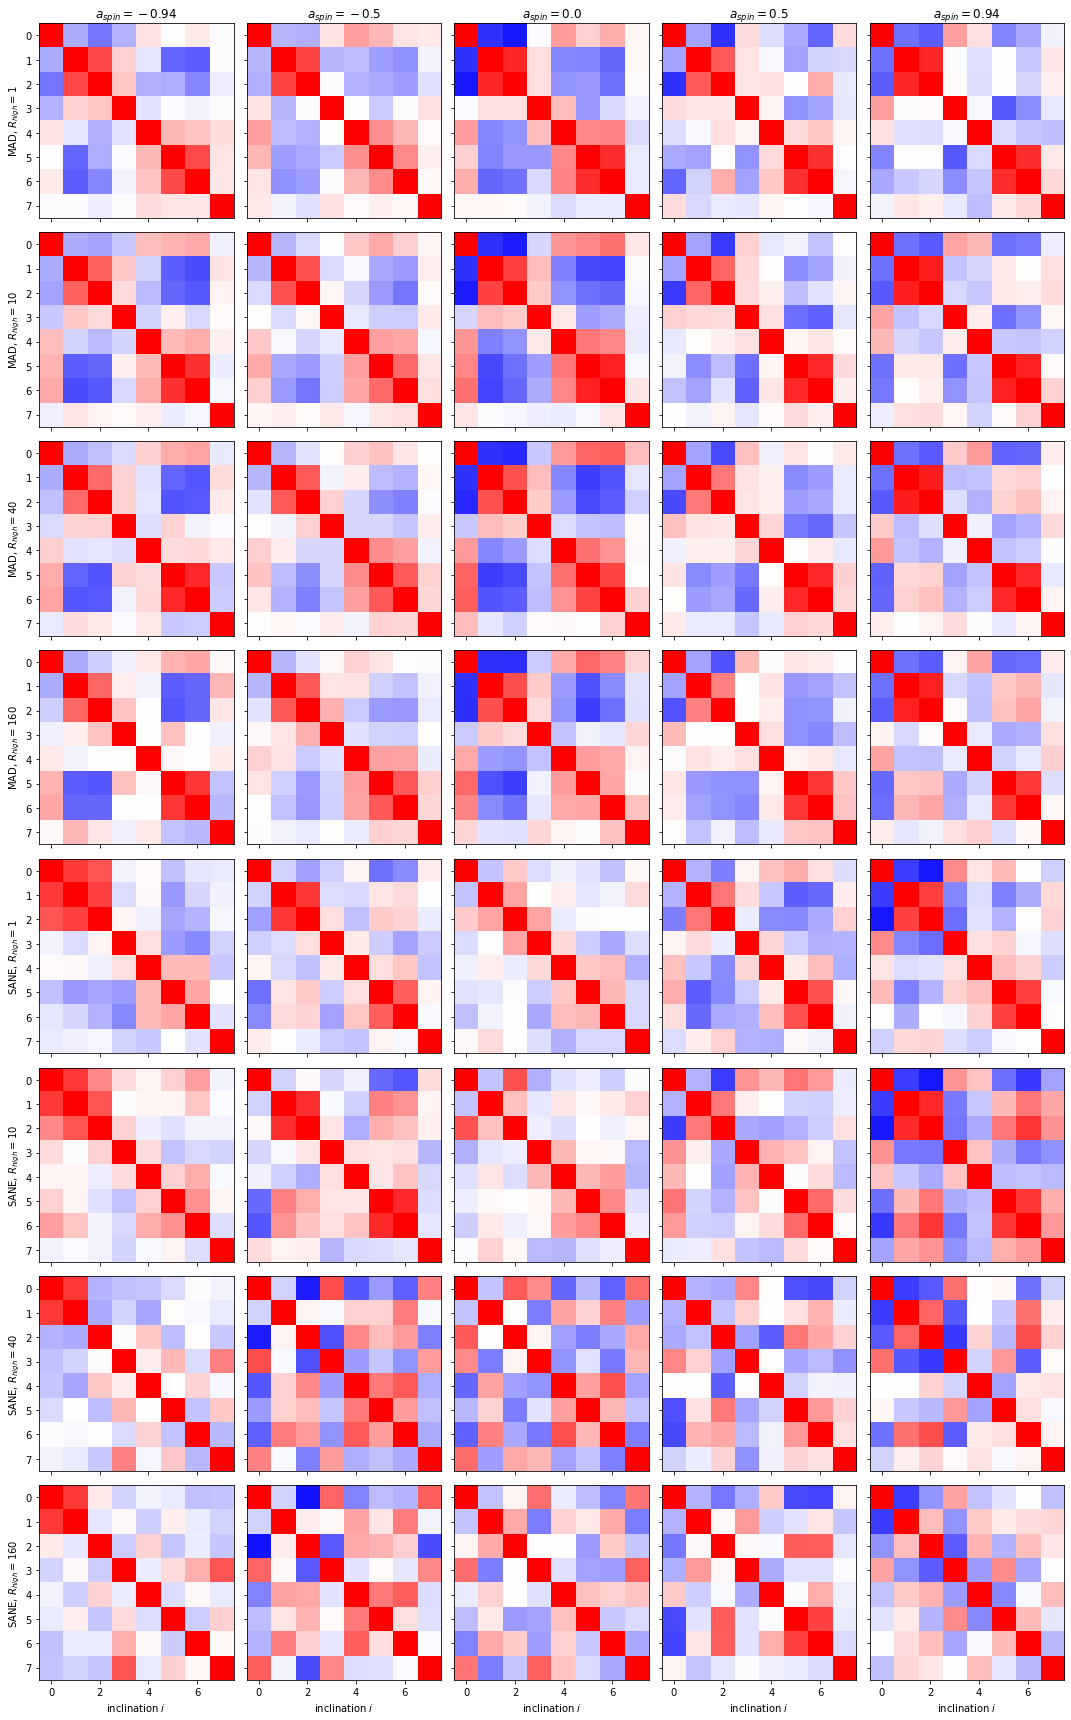

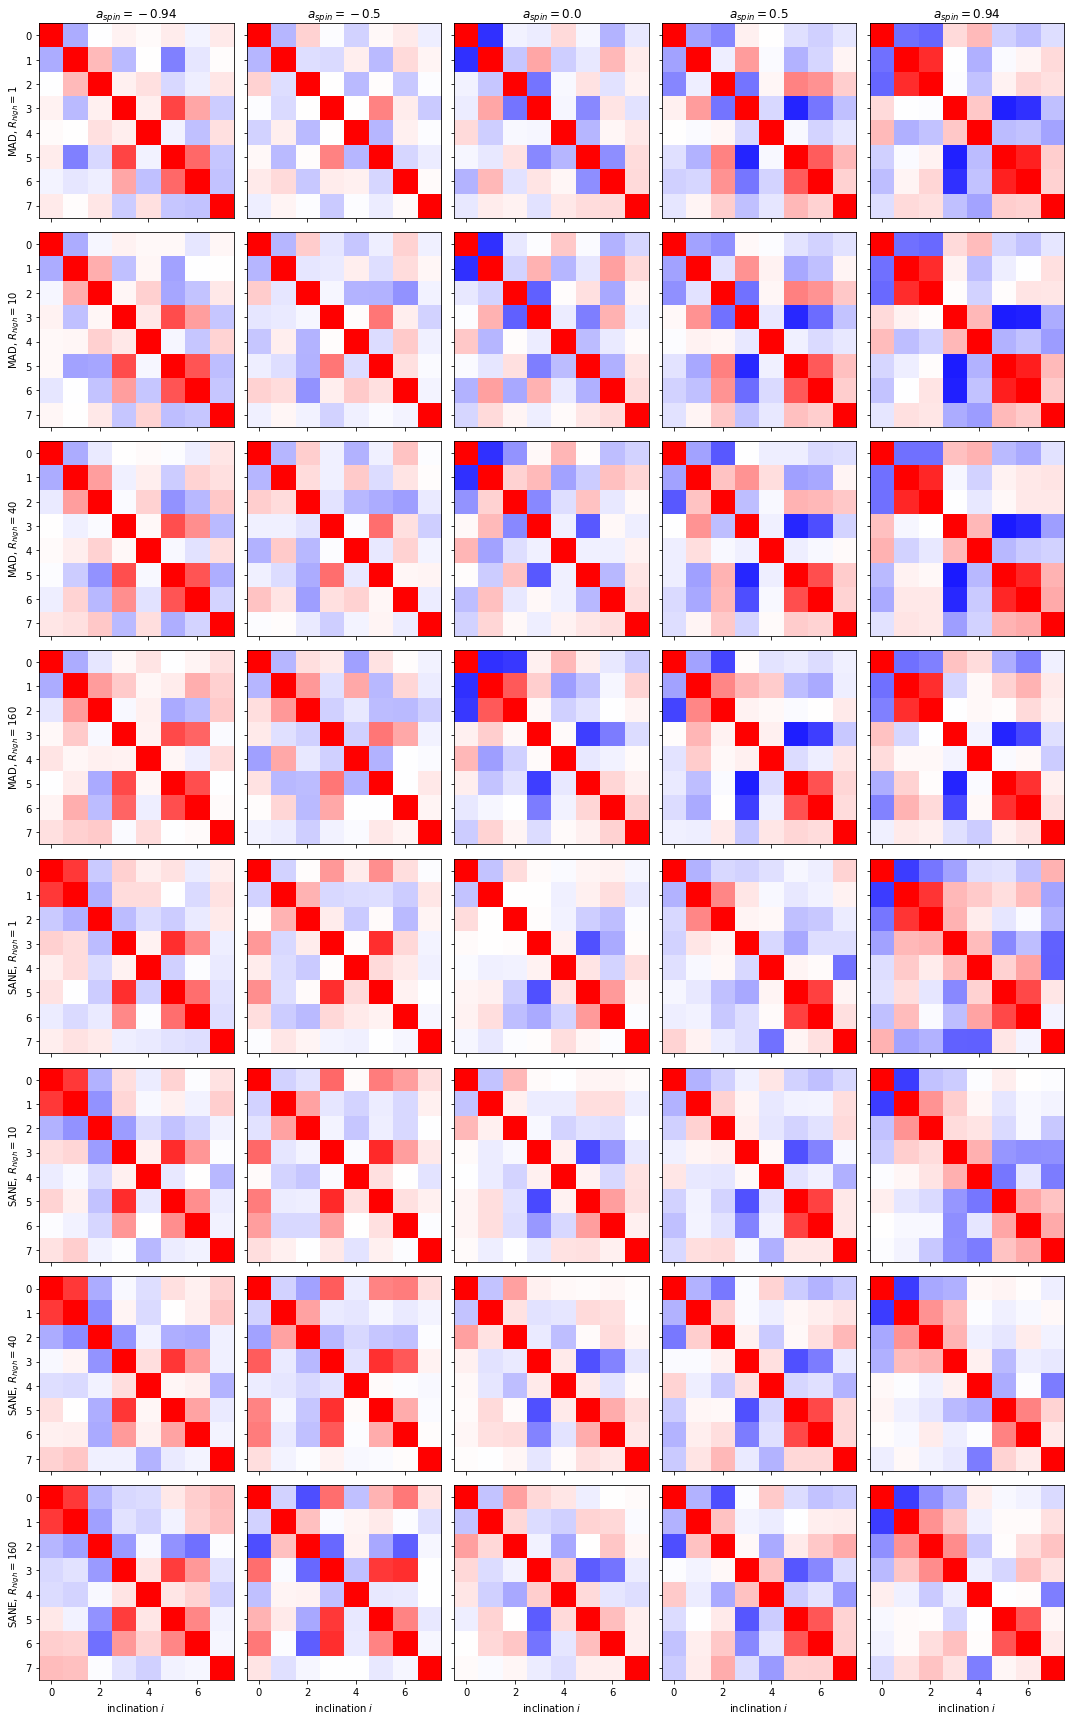

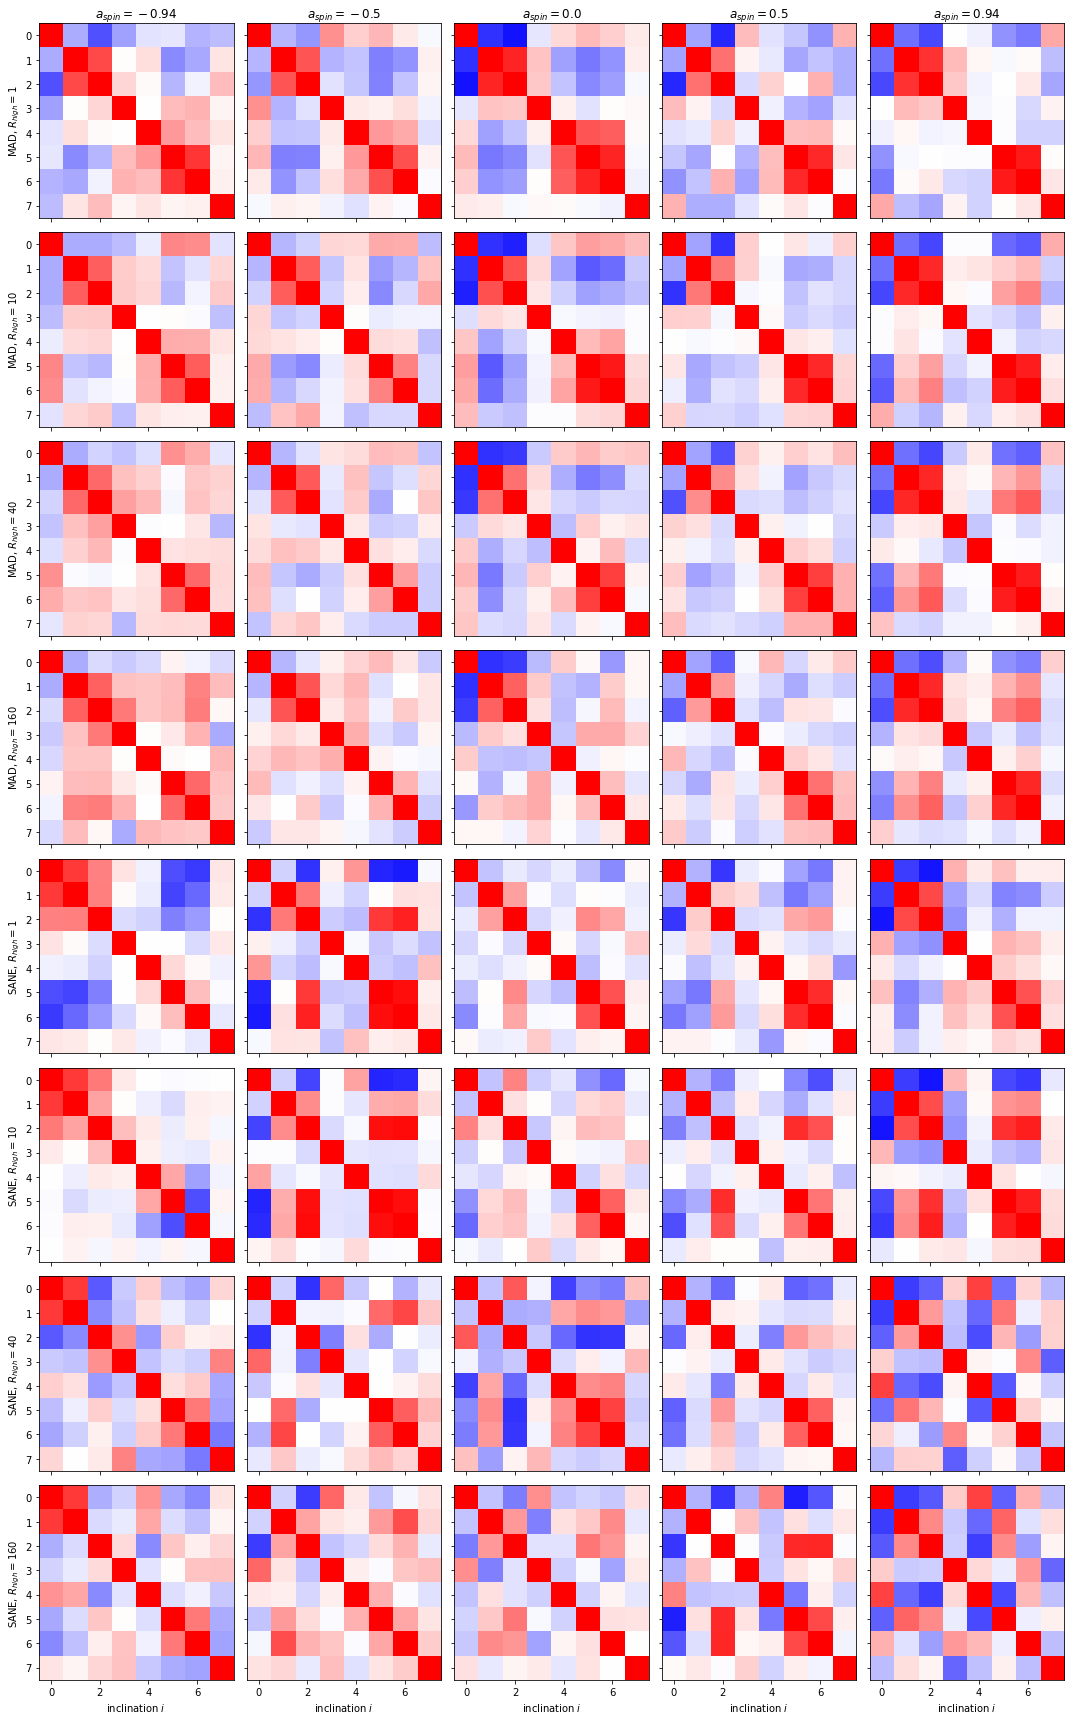

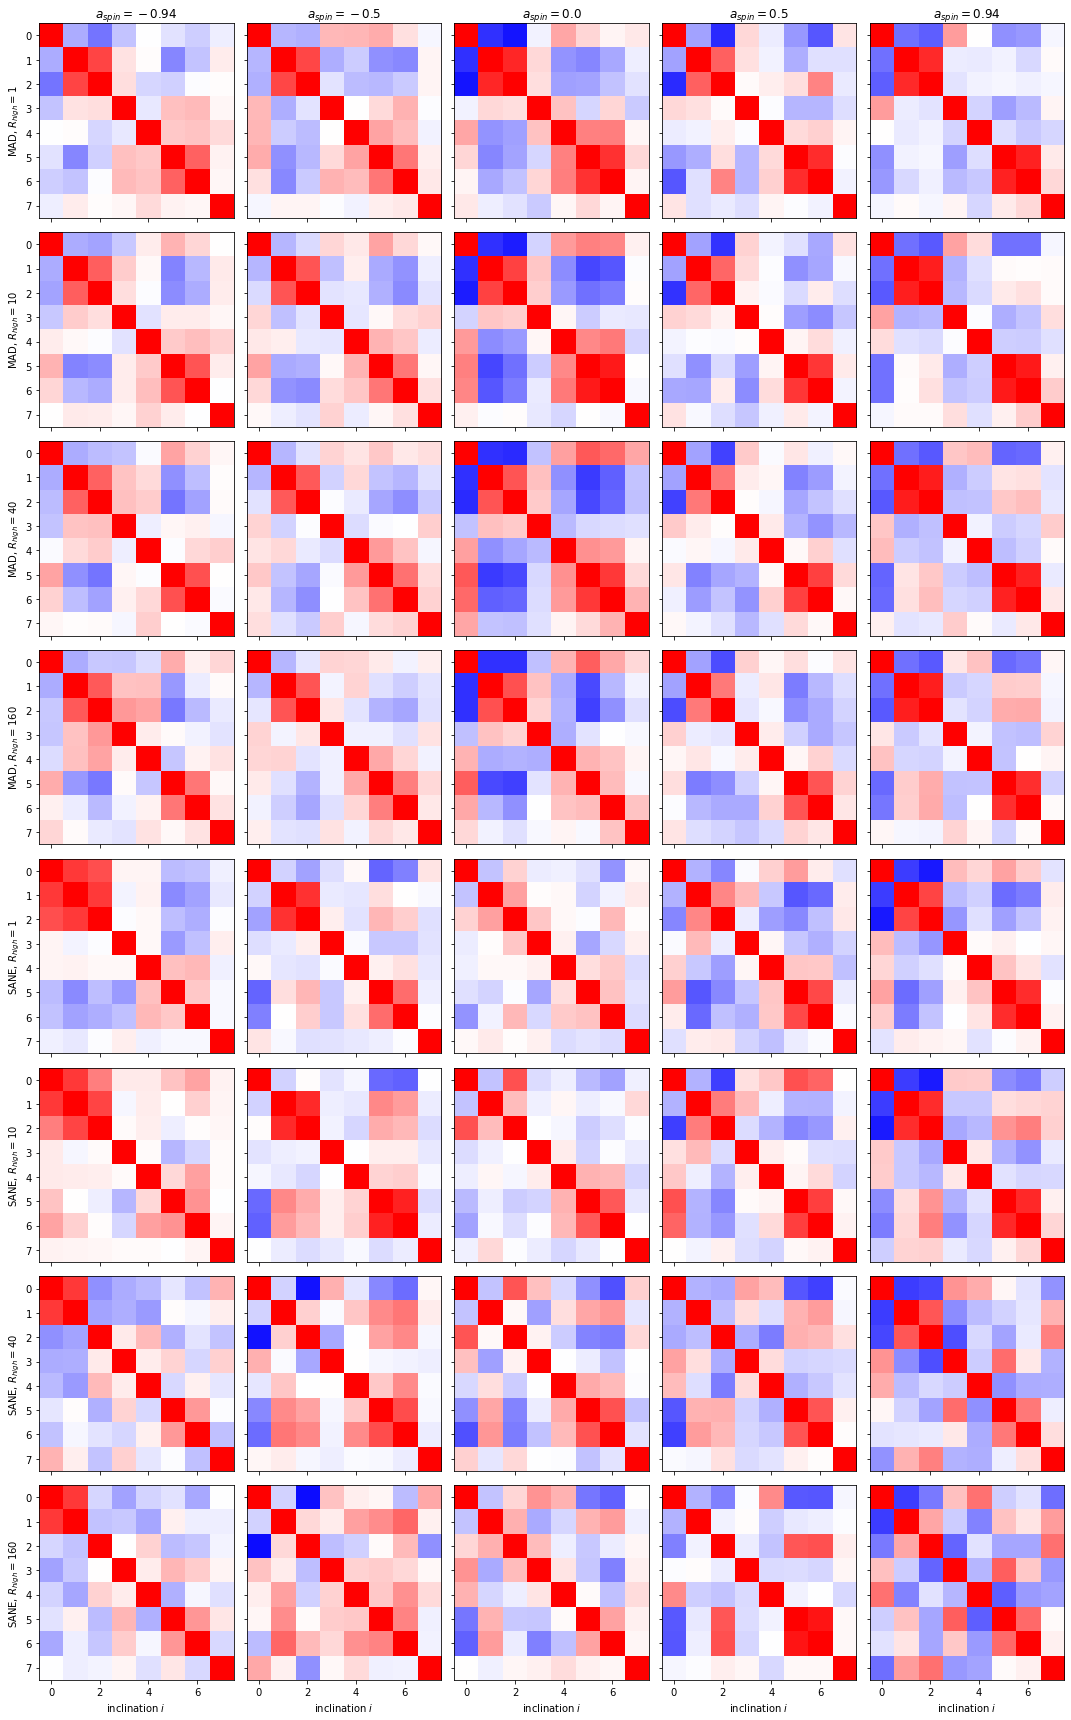

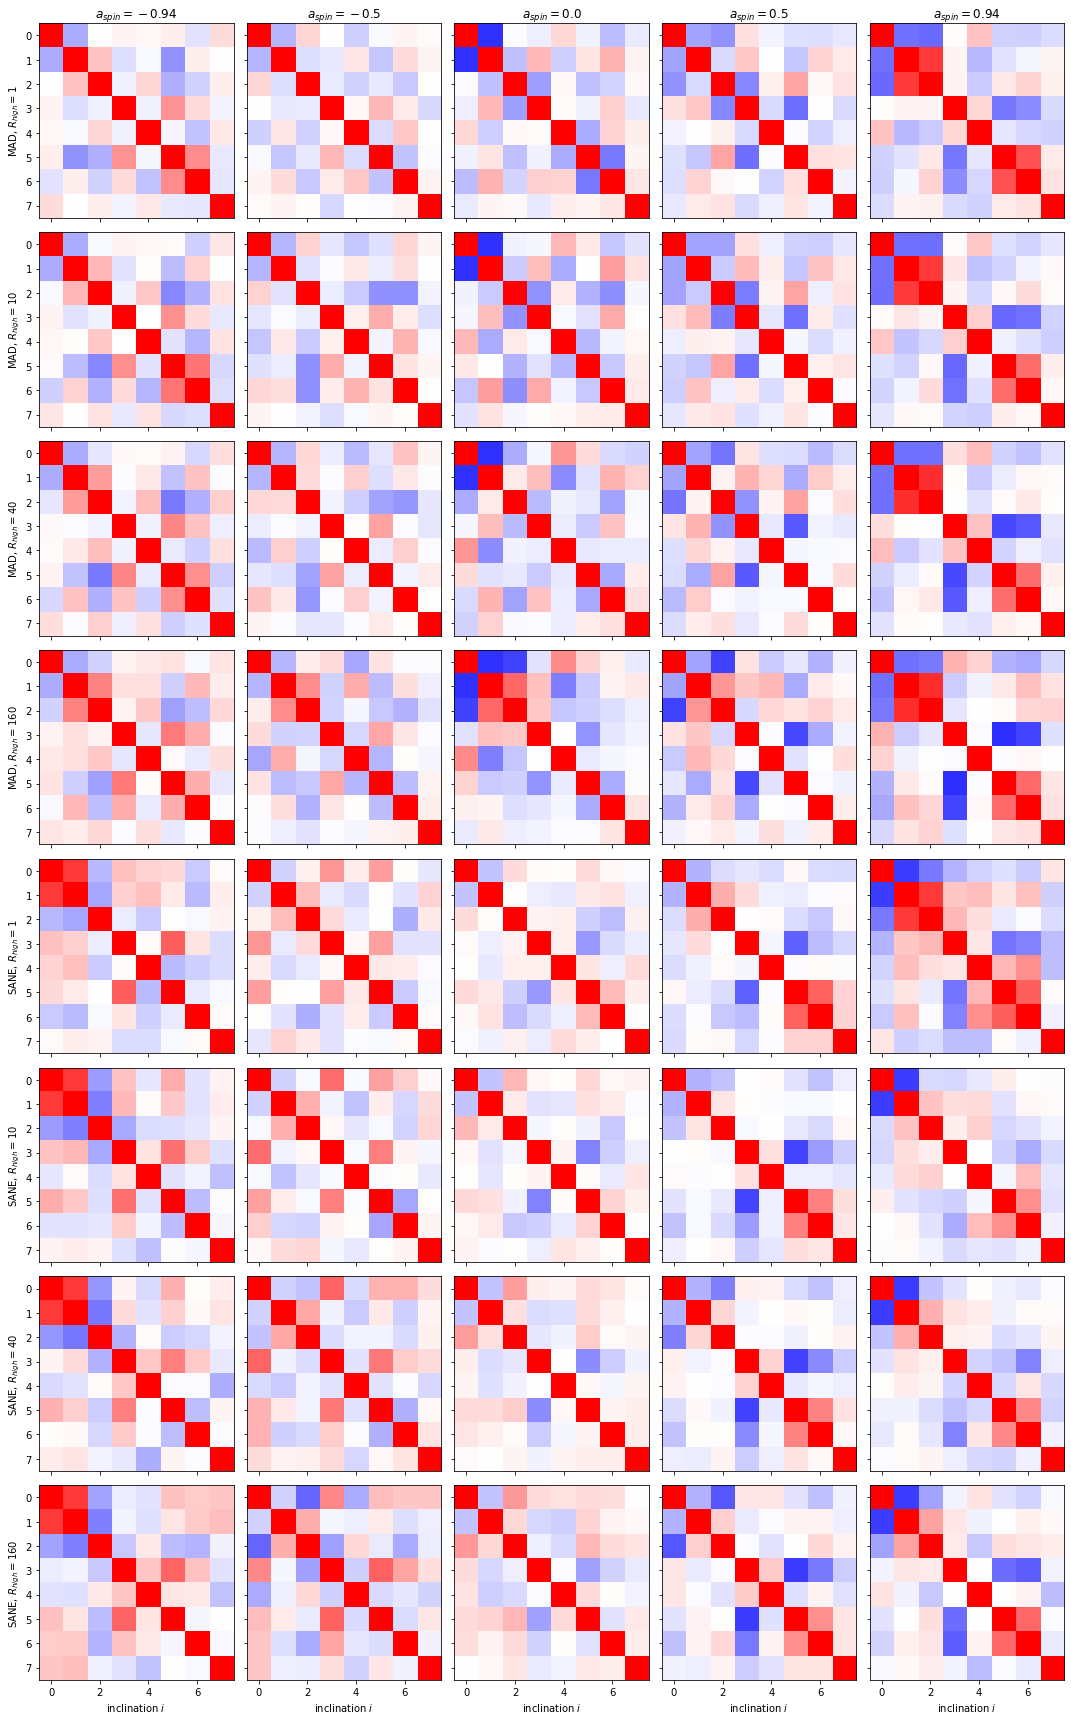

In [4]:
for w in [3, 4, 5]:
    for i in inc:
        for freq in ['86GHz', '230GHz', '2um']:
            print(w, i, freq)

            fig, axes = plt.subplots(8, 5, figsize=(15,24), sharex=True, sharey=True)

            for c, a in enumerate(aspin):
                for r1, m in enumerate(mag):
                    for r2, Rh in enumerate(Rhigh):
                        #print(a, m, Rh)
                        r = r1 * 4 + r2
            
                        sel = pf(freq=freq)(aspin=a)(mag=m)(Rhigh=Rh)(win=w)(inc=i)
                        if len(sel) != 1:
                            print('WARNING: too many matchingn tables')
                        df = pd.read_csv(sel.path.iloc[0], sep='\t')
                        corr = df[cols].corr()
                        axes[r][c].imshow(corr, vmin=-1, vmax=1, cmap='bwr')

                        if r == 0:
                            axes[r][c].set_title(f'$a_{{spin}} = {a}$')
                        elif r == 7:
                            axes[r][c].set_xlabel('inclination $i$')
                        if c == 0:
                            axes[r][c].set_ylabel(f'{"MAD" if m == "M" else "SANE"}, $R_{{high}} = {Rh}$')
            
            fig.tight_layout()
            fig.savefig(f'output/plot/corr_Illinois_thermal_w{w}_i{i}_{freq}.pdf')